# 4.Modeling

### 4.1.Import Libaries

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate,cross_val_score, train_test_split, GridSearchCV, learning_curve
from sklearn.decomposition import PCA
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,accuracy_score, recall_score, precision_score, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import datetime
from sklearn.compose import ColumnTransformer
import time
from datetime import datetime


In [2]:
#pip install xgboost


In [3]:
#pip install catboost


### 4.2.Load Data( Test set and training set )

In [4]:
datafilepath = "../data/interim/train_test_split.pkl"

with open(datafilepath, 'rb') as file:
    X,y,X_train, X_test, y_train, y_test = pickle.load(file)

In [5]:
X_train

CRM_CD  AREA  VICT_AGE  VICT_DESCENT_Encoded  VICT_SEX_Encoded  \
97603      330    15        39                     2                 1   
75762      330     7        48                    18                 0   
27768      310    11        36                    18                 0   
232153     624    19        38                     8                 1   
155507     440    14        58                    13                 0   
...        ...   ...       ...                   ...               ...   
77000      330     8        20                    13                 0   
234480     624    20        25                    18                 0   
117948     440     1        62                    12                 1   
1818       310     1        61                    18                 1   
176591     624     1        15                     2                 1   

        WEEKDAY_OCC_ID  
97603                2  
75762                2  
27768                5  
232153               4  
155507               0  
...                ...  
77000                3  
234480               3  
117948               3  
1818                 6  
176591               4  

[192637 rows x 6 columns]

### Initiation

In [6]:
#Calculate the mean of `y_train`
train_mean = y_train.mean()
train_mean

4.338325451496857

In [7]:
#Calculate the medium of `y_train`
X_defaults_median = X_train.median()
X_defaults_median

CRM_CD                  440.0
AREA                     11.0
VICT_AGE                 42.0
VICT_DESCENT_Encoded     12.0
VICT_SEX_Encoded          1.0
WEEKDAY_OCC_ID            3.0
dtype: float64

##### Impute NaN Data

### 4.3.Models

In [8]:
# Check for NaN values
print("NaN values in X_test:", X_test.isna().sum().sum())

# Replace NaN values with the mean (you can choose other methods)
X_test = X_test.fillna(X_test.mean())

# Check for infinity values
print("Infinity values in X_test:", np.isinf(X_test).sum().sum())

# Replace infinity values
X_test = X_test.replace([np.inf, -np.inf], np.nan).fillna(X_test.mean())

NaN values in X_test: 0
Infinity values in X_test: 0


In [9]:
# Normalize or Scale your data
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)
X_test

array([[ 1.52506607,  1.63428572,  0.411917  , -0.46359988,  0.90929815,
         1.53422267],
       [-0.96528727, -0.81769272,  1.08978718,  1.31784048,  0.90929815,
         0.52164685],
       [ 0.06575074, -0.98115795, -1.51740581, -0.46359988,  0.90929815,
        -0.99721688],
       ...,
       [-0.96528727, -0.1638318 , -1.15239879,  0.24897626,  0.90929815,
         1.02793476],
       [ 0.06575074, -1.30808841, -2.24741985, -1.5324641 ,  0.90929815,
         1.53422267],
       [ 0.06575074,  0.49002911, -1.20454265, -0.46359988,  0.90929815,
         1.02793476]])

## 4.3.Models

Lets try different models. y vlaue - crime counts is continuous and expected a linear relationship between the features and the target.

In [10]:
results = {'Model': [], 'MAE': [], 'MSE': [], 'RMSE': [],'Rsquared': [],'CVScore': []}
predictions = {}

In [11]:
results

{'Model': [], 'MAE': [], 'MSE': [], 'RMSE': [], 'Rsquared': [], 'CVScore': []}

<b>Linear Regression</b>

In [12]:

# Start time
start_time = time.time()
current_time = datetime.now()
print('Started at: ', current_time.strftime("%H:%M:%S"))
print('----------------------------------')


# Best parameters and model

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_model_pred = lr_model.predict(X_test)

# Evaluation
lr_mse = mean_squared_error(y_test, lr_model_pred)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_model_pred)
lr_mae = mean_absolute_error(y_test, lr_model_pred)

lr_cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
# Convert scores to positive values
lr_cv_scores_positive = - lr_cv_scores



print("Mean Squared Error:", lr_mse)
print("Root Mean Squared Error:", lr_rmse)
print("Mean Absolute Error:", lr_mae)
print("R^2 Score:", lr_r2)
print("CV Scores (Mean Squared Error):", lr_cv_scores_positive)
print("Average CV Score:", np.mean(lr_cv_scores_positive))
print("Coefficients:", lr_model.coef_)
print("Intercept:", lr_model.intercept_)




# Calculate elapsed time
print('----------------------------------')
elapsed_time = (time.time() - start_time) / 60
print("Elapsed time: {:.2f} minutes".format(elapsed_time))


Started at:  17:47:32
----------------------------------
Mean Squared Error: 954.7038871952669
Root Mean Squared Error: 30.89828291661637
Mean Absolute Error: 6.690565470092898
R^2 Score: -0.01149664180369836
CV Scores (Mean Squared Error): [1674.00192107 1711.54748637 1720.38508832 1628.73712882 1695.04129488]
Average CV Score: 1685.9425838916309
Coefficients: [ 5.32759181e-03 -2.98637511e-04 -1.71478766e-01  3.32345161e-01
  5.87287359e+00  1.85932802e-02]
Intercept: 2.697270604290747
----------------------------------
Elapsed time: 0.00 minutes


In [13]:

    results['Model'].append('LinearRegression')
    results['MAE'].append(lr_mae)
    results['MSE'].append(lr_mse)
    results['RMSE'].append(lr_rmse)
    results['Rsquared'].append(lr_r2)
    results['CVScore'].append(np.mean(lr_cv_scores_positive))
    predictions['LinearRegression'] = lr_model_pred


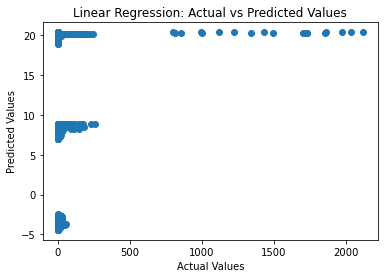

In [14]:
plt.scatter(y_test, lr_model_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted Values')
plt.show()

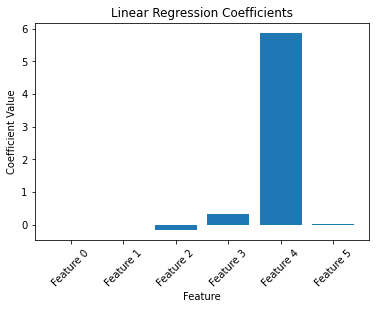

In [15]:
# Get coefficients and corresponding feature names
coefficients = lr_model.coef_
feature_names = [f"Feature {i}" for i in range(len(coefficients))]

# Plotting
plt.bar(range(len(coefficients)), coefficients)
plt.xticks(range(len(coefficients)), feature_names, rotation=45)
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.title('Linear Regression Coefficients')
plt.show()

Radom Forest Regressor

In [18]:
# Start time
start_time = time.time()
current_time = datetime.now()
print('Started at: ', current_time.strftime("%H:%M:%S"))
print('----------------------------------')

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_model_pred = rf_model.predict(X_test)

# Evaluation
rf_mse = mean_squared_error(y_test, rf_model_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_model_pred)
rf_mae = mean_absolute_error(y_test, rf_model_pred)

rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
# Convert scores to positive values
rf_cv_scores_positive = -rf_cv_scores



print("Mean Squared Error:", rf_mse)
print("Root Mean Squared Error:", rf_rmse)
print("Mean Absolute Error:", rf_mae)
print("R^2 Score:", rf_r2)
print("CV Scores (Mean Squared Error):", rf_cv_scores_positive)
print("Average CV Score:", np.mean(rf_cv_scores_positive))
print("Feature Importances:", rf_model.feature_importances_)


# Calculate elapsed time
print('----------------------------------')
elapsed_time = (time.time() - start_time) / 60
print("Elapsed time: {:.2f} minutes".format(elapsed_time))

Started at:  18:05:37
----------------------------------
Mean Squared Error: 888.1622674875413
Root Mean Squared Error: 29.802051397303867
Mean Absolute Error: 3.1140427740863785
R^2 Score: 0.05900335906282894
CV Scores (Mean Squared Error): [10.41216367  8.29795343 20.97387732 16.13715052  9.49756045]
Average CV Score: 13.063741078116129
Feature Importances: [0.39977182 0.09573441 0.04711014 0.42825282 0.0258683  0.00326252]
----------------------------------
Elapsed time: 3.55 minutes


In [19]:
    results['Model'].append('RandomForest')
    results['MAE'].append(rf_mae)
    results['MSE'].append(rf_mse)
    results['RMSE'].append(rf_rmse)
    results['Rsquared'].append(rf_r2)
    results['CVScore'].append(np.mean(rf_cv_scores_positive))
    predictions['RandomForest'] = rf_model_pred


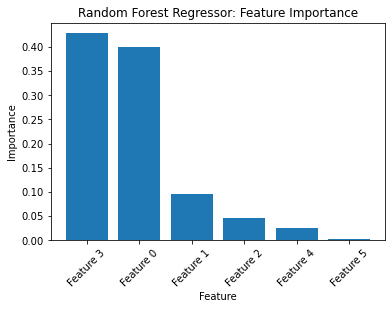

In [20]:
# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Get feature names (if available)
feature_names = [f"Feature {i}" for i in range(len(feature_importances))]

# Sort features based on importance
sorted_indices = np.argsort(feature_importances)[::-1]

# Plotting
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices])
plt.xticks(range(len(feature_importances)), np.array(feature_names)[sorted_indices], rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Regressor: Feature Importance')
plt.show()

Gradient Boosting Machines (GBM): Models like XGBoost, LightGBM, or CatBoost are very popular for their performance in a variety of tasks. They can handle non-linear relationships and interactions between features effectively.

In [21]:
import xgboost as xgb


# Start time
start_time = time.time()
current_time = datetime.now()
print('Started at: ', current_time.strftime("%H:%M:%S"))
print('----------------------------------')

# Define the parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    # Add other parameters as needed
}

xgb_model = xgb.XGBRegressor()
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='neg_mean_squared_error')

xgb_grid_search.fit(X_train, y_train)

print("Best parameters for XGBoost:", xgb_grid_search.best_params_)
best_xgb_model = xgb_grid_search.best_estimator_

# Predictions
xgb_pred = best_xgb_model.predict(X_test)

# Evaluation
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_pred)
xgb_mae = mean_absolute_error(y_test, xgb_pred)

# Cross-Validation Scores
xgb_cv_scores = cross_val_score(best_xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
xgb_cv_scores_positive = -xgb_cv_scores

print("XGBoost Evaluation Metrics")
print("Mean Squared Error:", xgb_mse)
print("Root Mean Squared Error:", xgb_rmse)
print("Mean Absolute Error:", xgb_mae)
print("R^2 Score:", xgb_r2)
print("CV Scores (Mean Squared Error):", xgb_cv_scores_positive)
print("Average CV Score:", np.mean(xgb_cv_scores_positive))



# Calculate elapsed time
print('----------------------------------')
elapsed_time = (time.time() - start_time) / 60
print("Elapsed time: {:.2f} minutes".format(elapsed_time))

Started at:  18:09:11
----------------------------------
Best parameters for XGBoost: {'learning_rate': 0.2, 'n_estimators': 300}
XGBoost Evaluation Metrics
Mean Squared Error: 983.5870866424732
Root Mean Squared Error: 31.36219199358478
Mean Absolute Error: 3.6971506414000577
R^2 Score: -0.042098024742678763
CV Scores (Mean Squared Error): [18.11832003 27.34011811 31.79177787 17.54323639 17.48514144]
Average CV Score: 22.455718770397304
----------------------------------
Elapsed time: 2.64 minutes


In [22]:
    results['Model'].append('XGBoost')
    results['MAE'].append(xgb_mae)
    results['MSE'].append(xgb_mse)
    results['RMSE'].append(xgb_rmse)
    results['Rsquared'].append(xgb_r2)
    results['CVScore'].append(np.mean(xgb_cv_scores_positive))
    predictions['XGBoost'] = xgb_pred

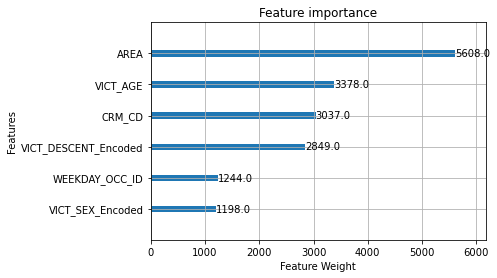

In [23]:
xgb.plot_importance(best_xgb_model, importance_type='weight', xlabel='Feature Weight')
plt.show()

In [24]:
from catboost import CatBoostRegressor, Pool

# Start time
start_time = time.time()
current_time = datetime.now()
print('Started at: ', current_time.strftime("%H:%M:%S"))
print('----------------------------------')

# Define the parameter grid for CatBoost
cat_param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
}


cat_model = CatBoostRegressor()
cat_grid_search = GridSearchCV(cat_model, cat_param_grid, cv=5, scoring='neg_mean_squared_error')
cat_grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best parameters for CatBoost:", cat_grid_search.best_params_)
best_cat_model = cat_grid_search.best_estimator_

# Predictions
cat_pred = best_cat_model.predict(X_test)

pool = Pool(X_train, label=y_train)

# Evaluation
cat_mse = mean_squared_error(y_test, cat_pred)
cat_rmse = np.sqrt(cat_mse)
cat_r2 = r2_score(y_test, cat_pred)
cat_mae = mean_absolute_error(y_test, cat_pred)

# Cross-Validation Scores
cat_cv_scores = cross_val_score(best_cat_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cat_cv_scores_positive = -cat_cv_scores

print("CatBoost Evaluation Metrics")
print("Mean Squared Error:", cat_mse)
print("Root Mean Squared Error:", cat_rmse)
print("Mean Absolute Error:", cat_mae)
print("R^2 Score:", cat_r2)
print("CV Scores (Mean Squared Error):", cat_cv_scores_positive)
print("Average CV Score:", np.mean(cat_cv_scores_positive))






# Calculate elapsed time
print('----------------------------------')
elapsed_time = (time.time() - start_time) / 60
print("Elapsed time: {:.2f} minutes".format(elapsed_time))

Started at:  18:11:49
----------------------------------
0:	learn: 41.0362227	total: 69.8ms	remaining: 1m 9s
1:	learn: 40.6904938	total: 75ms	remaining: 37.4s
2:	learn: 40.3481721	total: 80.1ms	remaining: 26.6s
3:	learn: 40.0096741	total: 85.3ms	remaining: 21.2s
4:	learn: 39.6748184	total: 90.4ms	remaining: 18s
5:	learn: 39.3436914	total: 95.5ms	remaining: 15.8s
6:	learn: 39.0162056	total: 101ms	remaining: 14.4s
7:	learn: 38.6927883	total: 107ms	remaining: 13.2s
8:	learn: 38.3729217	total: 112ms	remaining: 12.3s
9:	learn: 38.0564401	total: 117ms	remaining: 11.6s
10:	learn: 37.7433094	total: 123ms	remaining: 11s
11:	learn: 37.4337054	total: 128ms	remaining: 10.5s
12:	learn: 37.1275886	total: 134ms	remaining: 10.2s
13:	learn: 36.8248834	total: 139ms	remaining: 9.79s
14:	learn: 36.5288471	total: 144ms	remaining: 9.46s
15:	learn: 36.2327083	total: 150ms	remaining: 9.2s
16:	learn: 35.9400480	total: 156ms	remaining: 9.02s
17:	learn: 35.6505999	total: 162ms	remaining: 8.82s
18:	learn: 35.3644

166:	learn: 15.6316527	total: 1.12s	remaining: 5.6s
167:	learn: 15.5848388	total: 1.13s	remaining: 5.59s
168:	learn: 15.5383370	total: 1.14s	remaining: 5.58s
169:	learn: 15.4927362	total: 1.14s	remaining: 5.57s
170:	learn: 15.4391216	total: 1.15s	remaining: 5.57s
171:	learn: 15.3946585	total: 1.15s	remaining: 5.56s
172:	learn: 15.3509149	total: 1.16s	remaining: 5.55s
173:	learn: 15.3078209	total: 1.17s	remaining: 5.54s
174:	learn: 15.2654219	total: 1.17s	remaining: 5.53s
175:	learn: 15.2237084	total: 1.18s	remaining: 5.53s
176:	learn: 15.1815829	total: 1.19s	remaining: 5.52s
177:	learn: 15.1401255	total: 1.19s	remaining: 5.51s
178:	learn: 15.0995213	total: 1.2s	remaining: 5.5s
179:	learn: 15.0554009	total: 1.21s	remaining: 5.49s
180:	learn: 15.0062668	total: 1.21s	remaining: 5.48s
181:	learn: 14.9633633	total: 1.22s	remaining: 5.47s
182:	learn: 14.9241301	total: 1.22s	remaining: 5.46s
183:	learn: 14.8765618	total: 1.23s	remaining: 5.46s
184:	learn: 14.8296413	total: 1.24s	remaining: 5.

323:	learn: 11.9435649	total: 2.11s	remaining: 4.4s
324:	learn: 11.9328762	total: 2.12s	remaining: 4.39s
325:	learn: 11.9177350	total: 2.12s	remaining: 4.39s
326:	learn: 11.9072703	total: 2.13s	remaining: 4.38s
327:	learn: 11.8966815	total: 2.13s	remaining: 4.37s
328:	learn: 11.8863473	total: 2.14s	remaining: 4.37s
329:	learn: 11.8757626	total: 2.15s	remaining: 4.36s
330:	learn: 11.8654929	total: 2.15s	remaining: 4.35s
331:	learn: 11.8551663	total: 2.16s	remaining: 4.34s
332:	learn: 11.8450097	total: 2.17s	remaining: 4.34s
333:	learn: 11.8347935	total: 2.17s	remaining: 4.33s
334:	learn: 11.8248089	total: 2.18s	remaining: 4.32s
335:	learn: 11.8142053	total: 2.18s	remaining: 4.31s
336:	learn: 11.8044019	total: 2.19s	remaining: 4.31s
337:	learn: 11.7942242	total: 2.19s	remaining: 4.3s
338:	learn: 11.7846801	total: 2.2s	remaining: 4.29s
339:	learn: 11.7745913	total: 2.21s	remaining: 4.28s
340:	learn: 11.7644846	total: 2.21s	remaining: 4.28s
341:	learn: 11.7501598	total: 2.22s	remaining: 4.

482:	learn: 11.1207918	total: 3.1s	remaining: 3.31s
483:	learn: 11.1186422	total: 3.1s	remaining: 3.31s
484:	learn: 11.1134178	total: 3.11s	remaining: 3.3s
485:	learn: 11.1103046	total: 3.11s	remaining: 3.29s
486:	learn: 11.1089368	total: 3.12s	remaining: 3.29s
487:	learn: 11.1082259	total: 3.13s	remaining: 3.28s
488:	learn: 11.1046740	total: 3.13s	remaining: 3.27s
489:	learn: 11.1039541	total: 3.14s	remaining: 3.27s
490:	learn: 11.1032460	total: 3.15s	remaining: 3.26s
491:	learn: 11.0992080	total: 3.15s	remaining: 3.26s
492:	learn: 11.0985073	total: 3.16s	remaining: 3.25s
493:	learn: 11.0970710	total: 3.17s	remaining: 3.24s
494:	learn: 11.0957715	total: 3.17s	remaining: 3.24s
495:	learn: 11.0943824	total: 3.18s	remaining: 3.23s
496:	learn: 11.0938025	total: 3.19s	remaining: 3.23s
497:	learn: 11.0931348	total: 3.19s	remaining: 3.22s
498:	learn: 11.0892832	total: 3.2s	remaining: 3.21s
499:	learn: 11.0886336	total: 3.21s	remaining: 3.21s
500:	learn: 11.0879772	total: 3.21s	remaining: 3.2

667:	learn: 10.6332300	total: 4.29s	remaining: 2.13s
668:	learn: 10.6309939	total: 4.3s	remaining: 2.13s
669:	learn: 10.6276577	total: 4.31s	remaining: 2.12s
670:	learn: 10.6264651	total: 4.32s	remaining: 2.12s
671:	learn: 10.6231851	total: 4.32s	remaining: 2.11s
672:	learn: 10.6224447	total: 4.33s	remaining: 2.1s
673:	learn: 10.6218891	total: 4.34s	remaining: 2.1s
674:	learn: 10.6210277	total: 4.34s	remaining: 2.09s
675:	learn: 10.6188462	total: 4.35s	remaining: 2.08s
676:	learn: 10.6170328	total: 4.36s	remaining: 2.08s
677:	learn: 10.6138296	total: 4.36s	remaining: 2.07s
678:	learn: 10.6120204	total: 4.37s	remaining: 2.06s
679:	learn: 10.6083650	total: 4.38s	remaining: 2.06s
680:	learn: 10.6080024	total: 4.38s	remaining: 2.05s
681:	learn: 10.6058199	total: 4.39s	remaining: 2.05s
682:	learn: 10.6025684	total: 4.39s	remaining: 2.04s
683:	learn: 10.6022513	total: 4.4s	remaining: 2.03s
684:	learn: 10.5986993	total: 4.41s	remaining: 2.03s
685:	learn: 10.5982139	total: 4.42s	remaining: 2.0

849:	learn: 10.1929012	total: 5.49s	remaining: 969ms
850:	learn: 10.1859347	total: 5.5s	remaining: 963ms
851:	learn: 10.1846189	total: 5.5s	remaining: 956ms
852:	learn: 10.1843389	total: 5.51s	remaining: 950ms
853:	learn: 10.1829000	total: 5.52s	remaining: 944ms
854:	learn: 10.1826472	total: 5.53s	remaining: 938ms
855:	learn: 10.1823784	total: 5.54s	remaining: 931ms
856:	learn: 10.1792945	total: 5.54s	remaining: 925ms
857:	learn: 10.1776929	total: 5.55s	remaining: 918ms
858:	learn: 10.1757151	total: 5.55s	remaining: 912ms
859:	learn: 10.1728496	total: 5.56s	remaining: 905ms
860:	learn: 10.1714359	total: 5.57s	remaining: 899ms
861:	learn: 10.1707627	total: 5.58s	remaining: 893ms
862:	learn: 10.1705128	total: 5.58s	remaining: 886ms
863:	learn: 10.1693100	total: 5.59s	remaining: 880ms
864:	learn: 10.1624598	total: 5.6s	remaining: 874ms
865:	learn: 10.1622534	total: 5.61s	remaining: 867ms
866:	learn: 10.1613193	total: 5.61s	remaining: 861ms
867:	learn: 10.1608027	total: 5.62s	remaining: 85

18:	learn: 35.2722525	total: 114ms	remaining: 5.91s
19:	learn: 34.9900446	total: 121ms	remaining: 5.91s
20:	learn: 34.7111053	total: 127ms	remaining: 5.93s
21:	learn: 34.4372301	total: 134ms	remaining: 5.95s
22:	learn: 34.1643838	total: 140ms	remaining: 5.96s
23:	learn: 33.8946781	total: 147ms	remaining: 5.96s
24:	learn: 33.6297876	total: 153ms	remaining: 5.95s
25:	learn: 33.3661173	total: 160ms	remaining: 5.98s
26:	learn: 33.1054960	total: 166ms	remaining: 5.99s
27:	learn: 32.8481568	total: 173ms	remaining: 6s
28:	learn: 32.5937676	total: 179ms	remaining: 5.99s
29:	learn: 32.3431752	total: 185ms	remaining: 5.98s
30:	learn: 32.0955336	total: 191ms	remaining: 5.98s
31:	learn: 31.8498132	total: 197ms	remaining: 5.97s
32:	learn: 31.6065643	total: 204ms	remaining: 5.97s
33:	learn: 31.3662073	total: 210ms	remaining: 5.96s
34:	learn: 31.1294817	total: 216ms	remaining: 5.95s
35:	learn: 30.8955765	total: 222ms	remaining: 5.95s
36:	learn: 30.6644657	total: 228ms	remaining: 5.93s
37:	learn: 30.4

193:	learn: 14.8229034	total: 1.3s	remaining: 5.4s
194:	learn: 14.7925968	total: 1.31s	remaining: 5.41s
195:	learn: 14.7625569	total: 1.32s	remaining: 5.41s
196:	learn: 14.7334530	total: 1.33s	remaining: 5.41s
197:	learn: 14.7048750	total: 1.33s	remaining: 5.41s
198:	learn: 14.6756094	total: 1.34s	remaining: 5.41s
199:	learn: 14.6468364	total: 1.35s	remaining: 5.41s
200:	learn: 14.6186055	total: 1.36s	remaining: 5.4s
201:	learn: 14.5903035	total: 1.37s	remaining: 5.4s
202:	learn: 14.5628177	total: 1.37s	remaining: 5.39s
203:	learn: 14.5352363	total: 1.38s	remaining: 5.39s
204:	learn: 14.5082169	total: 1.39s	remaining: 5.39s
205:	learn: 14.4813414	total: 1.4s	remaining: 5.39s
206:	learn: 14.4545931	total: 1.41s	remaining: 5.39s
207:	learn: 14.4283645	total: 1.42s	remaining: 5.39s
208:	learn: 14.4028182	total: 1.42s	remaining: 5.38s
209:	learn: 14.3769302	total: 1.43s	remaining: 5.38s
210:	learn: 14.3516616	total: 1.44s	remaining: 5.38s
211:	learn: 14.3270814	total: 1.45s	remaining: 5.38

360:	learn: 12.1090721	total: 2.49s	remaining: 4.41s
361:	learn: 12.1042311	total: 2.5s	remaining: 4.4s
362:	learn: 12.0965989	total: 2.5s	remaining: 4.39s
363:	learn: 12.0865733	total: 2.51s	remaining: 4.39s
364:	learn: 12.0774621	total: 2.52s	remaining: 4.38s
365:	learn: 12.0699414	total: 2.52s	remaining: 4.37s
366:	learn: 12.0638445	total: 2.53s	remaining: 4.37s
367:	learn: 12.0382421	total: 2.54s	remaining: 4.36s
368:	learn: 12.0330069	total: 2.55s	remaining: 4.35s
369:	learn: 12.0253308	total: 2.55s	remaining: 4.34s
370:	learn: 12.0202390	total: 2.56s	remaining: 4.34s
371:	learn: 12.0125269	total: 2.56s	remaining: 4.33s
372:	learn: 12.0049399	total: 2.57s	remaining: 4.32s
373:	learn: 11.9998930	total: 2.58s	remaining: 4.32s
374:	learn: 11.9923867	total: 2.58s	remaining: 4.31s
375:	learn: 11.9874274	total: 2.59s	remaining: 4.3s
376:	learn: 11.9818182	total: 2.6s	remaining: 4.29s
377:	learn: 11.9772770	total: 2.6s	remaining: 4.29s
378:	learn: 11.9725095	total: 2.61s	remaining: 4.28s

536:	learn: 11.5315761	total: 3.67s	remaining: 3.16s
537:	learn: 11.5299223	total: 3.68s	remaining: 3.16s
538:	learn: 11.5282715	total: 3.68s	remaining: 3.15s
539:	learn: 11.5277592	total: 3.69s	remaining: 3.14s
540:	learn: 11.5272285	total: 3.7s	remaining: 3.14s
541:	learn: 11.5217969	total: 3.71s	remaining: 3.13s
542:	learn: 11.5179600	total: 3.71s	remaining: 3.12s
543:	learn: 11.5173827	total: 3.72s	remaining: 3.12s
544:	learn: 11.5148944	total: 3.72s	remaining: 3.11s
545:	learn: 11.5143323	total: 3.73s	remaining: 3.1s
546:	learn: 11.5125280	total: 3.74s	remaining: 3.1s
547:	learn: 11.5099895	total: 3.74s	remaining: 3.09s
548:	learn: 11.5087580	total: 3.75s	remaining: 3.08s
549:	learn: 11.5072928	total: 3.76s	remaining: 3.07s
550:	learn: 11.5061811	total: 3.77s	remaining: 3.07s
551:	learn: 11.5052178	total: 3.77s	remaining: 3.06s
552:	learn: 11.4975367	total: 3.78s	remaining: 3.05s
553:	learn: 11.4970842	total: 3.79s	remaining: 3.05s
554:	learn: 11.4955296	total: 3.79s	remaining: 3.

721:	learn: 10.8996837	total: 4.86s	remaining: 1.87s
722:	learn: 10.8993280	total: 4.87s	remaining: 1.86s
723:	learn: 10.8967058	total: 4.87s	remaining: 1.86s
724:	learn: 10.8929172	total: 4.88s	remaining: 1.85s
725:	learn: 10.8925625	total: 4.88s	remaining: 1.84s
726:	learn: 10.8887606	total: 4.89s	remaining: 1.84s
727:	learn: 10.8884695	total: 4.9s	remaining: 1.83s
728:	learn: 10.8878332	total: 4.91s	remaining: 1.82s
729:	learn: 10.8836820	total: 4.91s	remaining: 1.82s
730:	learn: 10.8833160	total: 4.92s	remaining: 1.81s
731:	learn: 10.8791388	total: 4.92s	remaining: 1.8s
732:	learn: 10.8773231	total: 4.93s	remaining: 1.79s
733:	learn: 10.8769513	total: 4.93s	remaining: 1.79s
734:	learn: 10.8733405	total: 4.94s	remaining: 1.78s
735:	learn: 10.8713520	total: 4.95s	remaining: 1.77s
736:	learn: 10.8658879	total: 4.95s	remaining: 1.77s
737:	learn: 10.8654935	total: 4.96s	remaining: 1.76s
738:	learn: 10.8591816	total: 4.97s	remaining: 1.75s
739:	learn: 10.8551882	total: 4.97s	remaining: 1

880:	learn: 10.4928252	total: 5.85s	remaining: 790ms
881:	learn: 10.4898537	total: 5.86s	remaining: 784ms
882:	learn: 10.4887968	total: 5.86s	remaining: 777ms
883:	learn: 10.4856351	total: 5.87s	remaining: 770ms
884:	learn: 10.4849345	total: 5.88s	remaining: 764ms
885:	learn: 10.4776361	total: 5.88s	remaining: 757ms
886:	learn: 10.4740328	total: 5.89s	remaining: 751ms
887:	learn: 10.4711189	total: 5.9s	remaining: 744ms
888:	learn: 10.4675855	total: 5.9s	remaining: 737ms
889:	learn: 10.4509931	total: 5.91s	remaining: 731ms
890:	learn: 10.4505484	total: 5.92s	remaining: 724ms
891:	learn: 10.4468040	total: 5.92s	remaining: 717ms
892:	learn: 10.4441292	total: 5.93s	remaining: 711ms
893:	learn: 10.4439609	total: 5.94s	remaining: 704ms
894:	learn: 10.4427021	total: 5.94s	remaining: 697ms
895:	learn: 10.4398255	total: 5.95s	remaining: 691ms
896:	learn: 10.4295623	total: 5.96s	remaining: 684ms
897:	learn: 10.4285034	total: 5.96s	remaining: 677ms
898:	learn: 10.4232749	total: 5.97s	remaining: 6

51:	learn: 27.1557825	total: 332ms	remaining: 6.05s
52:	learn: 26.9587827	total: 340ms	remaining: 6.08s
53:	learn: 26.7644083	total: 347ms	remaining: 6.08s
54:	learn: 26.5721875	total: 354ms	remaining: 6.08s
55:	learn: 26.3822332	total: 361ms	remaining: 6.08s
56:	learn: 26.1945547	total: 368ms	remaining: 6.09s
57:	learn: 26.0135517	total: 375ms	remaining: 6.09s
58:	learn: 25.8347367	total: 382ms	remaining: 6.1s
59:	learn: 25.6534151	total: 389ms	remaining: 6.09s
60:	learn: 25.4787749	total: 396ms	remaining: 6.09s
61:	learn: 25.3062638	total: 402ms	remaining: 6.09s
62:	learn: 25.1311088	total: 409ms	remaining: 6.08s
63:	learn: 24.9582187	total: 416ms	remaining: 6.09s
64:	learn: 24.7874486	total: 423ms	remaining: 6.08s
65:	learn: 24.6192570	total: 430ms	remaining: 6.08s
66:	learn: 24.4565471	total: 436ms	remaining: 6.08s
67:	learn: 24.2958532	total: 444ms	remaining: 6.08s
68:	learn: 24.1334266	total: 451ms	remaining: 6.08s
69:	learn: 23.9765725	total: 457ms	remaining: 6.07s
70:	learn: 23

232:	learn: 13.3742494	total: 1.52s	remaining: 5.02s
233:	learn: 13.3454517	total: 1.53s	remaining: 5.01s
234:	learn: 13.3255254	total: 1.54s	remaining: 5.01s
235:	learn: 13.3086041	total: 1.54s	remaining: 5s
236:	learn: 13.2904666	total: 1.55s	remaining: 5s
237:	learn: 13.2740003	total: 1.56s	remaining: 4.99s
238:	learn: 13.2548744	total: 1.56s	remaining: 4.98s
239:	learn: 13.2305094	total: 1.57s	remaining: 4.98s
240:	learn: 13.2146051	total: 1.58s	remaining: 4.97s
241:	learn: 13.1959882	total: 1.58s	remaining: 4.96s
242:	learn: 13.1792477	total: 1.59s	remaining: 4.95s
243:	learn: 13.1625992	total: 1.59s	remaining: 4.94s
244:	learn: 13.1458530	total: 1.6s	remaining: 4.93s
245:	learn: 13.1279291	total: 1.61s	remaining: 4.93s
246:	learn: 13.1118476	total: 1.61s	remaining: 4.92s
247:	learn: 13.0956975	total: 1.62s	remaining: 4.91s
248:	learn: 13.0808972	total: 1.63s	remaining: 4.9s
249:	learn: 13.0661278	total: 1.63s	remaining: 4.9s
250:	learn: 13.0506169	total: 1.64s	remaining: 4.89s
25

394:	learn: 11.5025036	total: 2.52s	remaining: 3.85s
395:	learn: 11.4998996	total: 2.52s	remaining: 3.85s
396:	learn: 11.4973419	total: 2.53s	remaining: 3.84s
397:	learn: 11.4923350	total: 2.54s	remaining: 3.84s
398:	learn: 11.4876503	total: 2.54s	remaining: 3.83s
399:	learn: 11.4847587	total: 2.55s	remaining: 3.82s
400:	learn: 11.4822820	total: 2.55s	remaining: 3.81s
401:	learn: 11.4794656	total: 2.56s	remaining: 3.81s
402:	learn: 11.4770549	total: 2.57s	remaining: 3.8s
403:	learn: 11.4741849	total: 2.57s	remaining: 3.79s
404:	learn: 11.4718005	total: 2.58s	remaining: 3.79s
405:	learn: 11.4670613	total: 2.58s	remaining: 3.78s
406:	learn: 11.4637242	total: 2.59s	remaining: 3.77s
407:	learn: 11.4608399	total: 2.6s	remaining: 3.77s
408:	learn: 11.4580114	total: 2.6s	remaining: 3.76s
409:	learn: 11.4564619	total: 2.61s	remaining: 3.75s
410:	learn: 11.4548007	total: 2.61s	remaining: 3.75s
411:	learn: 11.4522784	total: 2.62s	remaining: 3.74s
412:	learn: 11.4500018	total: 2.63s	remaining: 3.

551:	learn: 11.2012446	total: 3.51s	remaining: 2.85s
552:	learn: 11.1953485	total: 3.51s	remaining: 2.84s
553:	learn: 11.1948499	total: 3.52s	remaining: 2.83s
554:	learn: 11.1930274	total: 3.53s	remaining: 2.83s
555:	learn: 11.1925343	total: 3.53s	remaining: 2.82s
556:	learn: 11.1915420	total: 3.54s	remaining: 2.81s
557:	learn: 11.1892532	total: 3.54s	remaining: 2.81s
558:	learn: 11.1875765	total: 3.55s	remaining: 2.8s
559:	learn: 11.1871127	total: 3.56s	remaining: 2.79s
560:	learn: 11.1852716	total: 3.56s	remaining: 2.79s
561:	learn: 11.1843111	total: 3.57s	remaining: 2.78s
562:	learn: 11.1815714	total: 3.58s	remaining: 2.78s
563:	learn: 11.1800923	total: 3.58s	remaining: 2.77s
564:	learn: 11.1743307	total: 3.59s	remaining: 2.76s
565:	learn: 11.1738957	total: 3.6s	remaining: 2.76s
566:	learn: 11.1733868	total: 3.6s	remaining: 2.75s
567:	learn: 11.1715657	total: 3.61s	remaining: 2.74s
568:	learn: 11.1700661	total: 3.61s	remaining: 2.74s
569:	learn: 11.1648856	total: 3.62s	remaining: 2.

708:	learn: 10.7235372	total: 4.5s	remaining: 1.85s
709:	learn: 10.7208696	total: 4.5s	remaining: 1.84s
710:	learn: 10.7202091	total: 4.51s	remaining: 1.83s
711:	learn: 10.7185352	total: 4.52s	remaining: 1.83s
712:	learn: 10.7173875	total: 4.53s	remaining: 1.82s
713:	learn: 10.7170250	total: 4.53s	remaining: 1.81s
714:	learn: 10.7159150	total: 4.54s	remaining: 1.81s
715:	learn: 10.7154091	total: 4.54s	remaining: 1.8s
716:	learn: 10.7119667	total: 4.55s	remaining: 1.8s
717:	learn: 10.7021935	total: 4.56s	remaining: 1.79s
718:	learn: 10.7010667	total: 4.56s	remaining: 1.78s
719:	learn: 10.6999959	total: 4.57s	remaining: 1.78s
720:	learn: 10.6986962	total: 4.58s	remaining: 1.77s
721:	learn: 10.6974522	total: 4.58s	remaining: 1.76s
722:	learn: 10.6971012	total: 4.59s	remaining: 1.76s
723:	learn: 10.6922649	total: 4.59s	remaining: 1.75s
724:	learn: 10.6875128	total: 4.6s	remaining: 1.75s
725:	learn: 10.6863518	total: 4.61s	remaining: 1.74s
726:	learn: 10.6840643	total: 4.61s	remaining: 1.73

865:	learn: 10.3651740	total: 5.49s	remaining: 849ms
866:	learn: 10.3632603	total: 5.49s	remaining: 842ms
867:	learn: 10.3628268	total: 5.5s	remaining: 836ms
868:	learn: 10.3614486	total: 5.5s	remaining: 830ms
869:	learn: 10.3611522	total: 5.51s	remaining: 824ms
870:	learn: 10.3608628	total: 5.52s	remaining: 817ms
871:	learn: 10.3586202	total: 5.52s	remaining: 811ms
872:	learn: 10.3545072	total: 5.53s	remaining: 805ms
873:	learn: 10.3531221	total: 5.54s	remaining: 798ms
874:	learn: 10.3529300	total: 5.54s	remaining: 792ms
875:	learn: 10.3527339	total: 5.55s	remaining: 785ms
876:	learn: 10.3508933	total: 5.55s	remaining: 779ms
877:	learn: 10.3500664	total: 5.56s	remaining: 773ms
878:	learn: 10.3377753	total: 5.57s	remaining: 766ms
879:	learn: 10.3363829	total: 5.57s	remaining: 760ms
880:	learn: 10.3342821	total: 5.58s	remaining: 754ms
881:	learn: 10.3281447	total: 5.58s	remaining: 747ms
882:	learn: 10.3266946	total: 5.59s	remaining: 741ms
883:	learn: 10.3240593	total: 5.6s	remaining: 73

49:	learn: 27.9718792	total: 297ms	remaining: 5.65s
50:	learn: 27.7710865	total: 304ms	remaining: 5.65s
51:	learn: 27.5731183	total: 310ms	remaining: 5.65s
52:	learn: 27.3774462	total: 316ms	remaining: 5.65s
53:	learn: 27.1843341	total: 322ms	remaining: 5.65s
54:	learn: 26.9940773	total: 328ms	remaining: 5.64s
55:	learn: 26.8061898	total: 334ms	remaining: 5.63s
56:	learn: 26.6196612	total: 340ms	remaining: 5.63s
57:	learn: 26.4391756	total: 346ms	remaining: 5.63s
58:	learn: 26.2608960	total: 352ms	remaining: 5.62s
59:	learn: 26.0817264	total: 358ms	remaining: 5.61s
60:	learn: 25.9076830	total: 365ms	remaining: 5.61s
61:	learn: 25.7328060	total: 371ms	remaining: 5.61s
62:	learn: 25.5588622	total: 377ms	remaining: 5.61s
63:	learn: 25.3909277	total: 383ms	remaining: 5.6s
64:	learn: 25.2250811	total: 389ms	remaining: 5.59s
65:	learn: 25.0573326	total: 395ms	remaining: 5.59s
66:	learn: 24.8954510	total: 401ms	remaining: 5.58s
67:	learn: 24.7355999	total: 407ms	remaining: 5.58s
68:	learn: 24

210:	learn: 14.1853693	total: 1.28s	remaining: 4.81s
211:	learn: 14.1591305	total: 1.29s	remaining: 4.8s
212:	learn: 14.1344500	total: 1.3s	remaining: 4.8s
213:	learn: 14.1088731	total: 1.3s	remaining: 4.79s
214:	learn: 14.0837224	total: 1.31s	remaining: 4.79s
215:	learn: 14.0602292	total: 1.32s	remaining: 4.78s
216:	learn: 14.0373798	total: 1.32s	remaining: 4.78s
217:	learn: 14.0140991	total: 1.33s	remaining: 4.77s
218:	learn: 13.9915942	total: 1.33s	remaining: 4.76s
219:	learn: 13.9691293	total: 1.34s	remaining: 4.76s
220:	learn: 13.9456575	total: 1.35s	remaining: 4.75s
221:	learn: 13.9239728	total: 1.35s	remaining: 4.75s
222:	learn: 13.9011148	total: 1.36s	remaining: 4.74s
223:	learn: 13.8786400	total: 1.37s	remaining: 4.73s
224:	learn: 13.8576292	total: 1.37s	remaining: 4.73s
225:	learn: 13.8357231	total: 1.38s	remaining: 4.72s
226:	learn: 13.8141851	total: 1.38s	remaining: 4.71s
227:	learn: 13.7930095	total: 1.39s	remaining: 4.71s
228:	learn: 13.7726020	total: 1.4s	remaining: 4.7s

373:	learn: 11.8696752	total: 2.28s	remaining: 3.81s
374:	learn: 11.8628765	total: 2.28s	remaining: 3.81s
375:	learn: 11.8585382	total: 2.29s	remaining: 3.8s
376:	learn: 11.8542739	total: 2.3s	remaining: 3.79s
377:	learn: 11.8502090	total: 2.3s	remaining: 3.79s
378:	learn: 11.8459495	total: 2.31s	remaining: 3.78s
379:	learn: 11.8417088	total: 2.31s	remaining: 3.77s
380:	learn: 11.8375394	total: 2.32s	remaining: 3.77s
381:	learn: 11.8335226	total: 2.33s	remaining: 3.76s
382:	learn: 11.8295390	total: 2.33s	remaining: 3.75s
383:	learn: 11.8256432	total: 2.34s	remaining: 3.75s
384:	learn: 11.8209903	total: 2.34s	remaining: 3.74s
385:	learn: 11.8190647	total: 2.35s	remaining: 3.74s
386:	learn: 11.8010147	total: 2.35s	remaining: 3.73s
387:	learn: 11.7962057	total: 2.36s	remaining: 3.72s
388:	learn: 11.7931949	total: 2.37s	remaining: 3.72s
389:	learn: 11.7904944	total: 2.37s	remaining: 3.71s
390:	learn: 11.7868129	total: 2.38s	remaining: 3.7s
391:	learn: 11.7825639	total: 2.38s	remaining: 3.7

531:	learn: 11.4373724	total: 3.26s	remaining: 2.87s
532:	learn: 11.4307827	total: 3.26s	remaining: 2.86s
533:	learn: 11.4302210	total: 3.27s	remaining: 2.86s
534:	learn: 11.4292593	total: 3.28s	remaining: 2.85s
535:	learn: 11.4221153	total: 3.29s	remaining: 2.85s
536:	learn: 11.4192170	total: 3.29s	remaining: 2.84s
537:	learn: 11.4174164	total: 3.3s	remaining: 2.84s
538:	learn: 11.4156312	total: 3.31s	remaining: 2.83s
539:	learn: 11.4151385	total: 3.32s	remaining: 2.83s
540:	learn: 11.4135256	total: 3.33s	remaining: 2.82s
541:	learn: 11.4129695	total: 3.33s	remaining: 2.82s
542:	learn: 11.4093488	total: 3.34s	remaining: 2.81s
543:	learn: 11.4087750	total: 3.35s	remaining: 2.81s
544:	learn: 11.4068537	total: 3.35s	remaining: 2.8s
545:	learn: 11.4059415	total: 3.36s	remaining: 2.8s
546:	learn: 11.4042081	total: 3.37s	remaining: 2.79s
547:	learn: 11.4012003	total: 3.38s	remaining: 2.78s
548:	learn: 11.3999168	total: 3.38s	remaining: 2.78s
549:	learn: 11.3982966	total: 3.39s	remaining: 2.

702:	learn: 10.8981930	total: 4.45s	remaining: 1.88s
703:	learn: 10.8960398	total: 4.45s	remaining: 1.87s
704:	learn: 10.8948440	total: 4.46s	remaining: 1.86s
705:	learn: 10.8938370	total: 4.46s	remaining: 1.86s
706:	learn: 10.8934228	total: 4.47s	remaining: 1.85s
707:	learn: 10.8872073	total: 4.48s	remaining: 1.85s
708:	learn: 10.8839627	total: 4.48s	remaining: 1.84s
709:	learn: 10.8819029	total: 4.49s	remaining: 1.83s
710:	learn: 10.8812735	total: 4.5s	remaining: 1.83s
711:	learn: 10.8787053	total: 4.5s	remaining: 1.82s
712:	learn: 10.8772921	total: 4.51s	remaining: 1.81s
713:	learn: 10.8769282	total: 4.52s	remaining: 1.81s
714:	learn: 10.8717134	total: 4.52s	remaining: 1.8s
715:	learn: 10.8713667	total: 4.53s	remaining: 1.8s
716:	learn: 10.8652327	total: 4.54s	remaining: 1.79s
717:	learn: 10.8547602	total: 4.54s	remaining: 1.78s
718:	learn: 10.8533626	total: 4.55s	remaining: 1.78s
719:	learn: 10.8490052	total: 4.55s	remaining: 1.77s
720:	learn: 10.8458285	total: 4.56s	remaining: 1.7

860:	learn: 10.4823989	total: 5.44s	remaining: 878ms
861:	learn: 10.4821391	total: 5.45s	remaining: 872ms
862:	learn: 10.4818867	total: 5.45s	remaining: 866ms
863:	learn: 10.4810513	total: 5.46s	remaining: 860ms
864:	learn: 10.4801750	total: 5.47s	remaining: 853ms
865:	learn: 10.4799942	total: 5.47s	remaining: 847ms
866:	learn: 10.4788885	total: 5.48s	remaining: 841ms
867:	learn: 10.4783867	total: 5.49s	remaining: 834ms
868:	learn: 10.4770826	total: 5.49s	remaining: 828ms
869:	learn: 10.4768568	total: 5.5s	remaining: 822ms
870:	learn: 10.4765679	total: 5.5s	remaining: 815ms
871:	learn: 10.4738819	total: 5.51s	remaining: 809ms
872:	learn: 10.4702082	total: 5.52s	remaining: 803ms
873:	learn: 10.4687167	total: 5.52s	remaining: 796ms
874:	learn: 10.4685357	total: 5.53s	remaining: 790ms
875:	learn: 10.4683671	total: 5.54s	remaining: 784ms
876:	learn: 10.4672493	total: 5.54s	remaining: 777ms
877:	learn: 10.4662889	total: 5.55s	remaining: 771ms
878:	learn: 10.4644627	total: 5.55s	remaining: 7

45:	learn: 28.7003238	total: 274ms	remaining: 5.68s
46:	learn: 28.4947221	total: 280ms	remaining: 5.68s
47:	learn: 28.2901415	total: 287ms	remaining: 5.69s
48:	learn: 28.0882308	total: 293ms	remaining: 5.68s
49:	learn: 27.8897615	total: 299ms	remaining: 5.67s
50:	learn: 27.6924555	total: 305ms	remaining: 5.67s
51:	learn: 27.4979199	total: 311ms	remaining: 5.67s
52:	learn: 27.3056809	total: 317ms	remaining: 5.67s
53:	learn: 27.1159662	total: 323ms	remaining: 5.66s
54:	learn: 26.9288247	total: 329ms	remaining: 5.65s
55:	learn: 26.7440346	total: 335ms	remaining: 5.65s
56:	learn: 26.5607360	total: 341ms	remaining: 5.64s
57:	learn: 26.3799399	total: 347ms	remaining: 5.63s
58:	learn: 26.2062335	total: 353ms	remaining: 5.63s
59:	learn: 26.0300241	total: 359ms	remaining: 5.62s
60:	learn: 25.8604919	total: 365ms	remaining: 5.62s
61:	learn: 25.6885139	total: 371ms	remaining: 5.61s
62:	learn: 25.5187390	total: 377ms	remaining: 5.61s
63:	learn: 25.3511459	total: 383ms	remaining: 5.6s
64:	learn: 25

207:	learn: 14.1834254	total: 1.26s	remaining: 4.81s
208:	learn: 14.1555757	total: 1.27s	remaining: 4.8s
209:	learn: 14.1282283	total: 1.27s	remaining: 4.79s
210:	learn: 14.1011215	total: 1.28s	remaining: 4.79s
211:	learn: 14.0725893	total: 1.29s	remaining: 4.79s
212:	learn: 14.0463282	total: 1.29s	remaining: 4.78s
213:	learn: 14.0185816	total: 1.3s	remaining: 4.77s
214:	learn: 13.9845371	total: 1.31s	remaining: 4.77s
215:	learn: 13.9582484	total: 1.31s	remaining: 4.76s
216:	learn: 13.9325920	total: 1.32s	remaining: 4.76s
217:	learn: 13.9060651	total: 1.32s	remaining: 4.75s
218:	learn: 13.8808437	total: 1.33s	remaining: 4.74s
219:	learn: 13.8565814	total: 1.34s	remaining: 4.74s
220:	learn: 13.8310066	total: 1.34s	remaining: 4.73s
221:	learn: 13.8068806	total: 1.35s	remaining: 4.73s
222:	learn: 13.7830582	total: 1.35s	remaining: 4.72s
223:	learn: 13.7607690	total: 1.36s	remaining: 4.71s
224:	learn: 13.7362117	total: 1.37s	remaining: 4.71s
225:	learn: 13.7131686	total: 1.37s	remaining: 4

370:	learn: 11.6642427	total: 2.25s	remaining: 3.82s
371:	learn: 11.6545156	total: 2.26s	remaining: 3.81s
372:	learn: 11.6460671	total: 2.26s	remaining: 3.81s
373:	learn: 11.6399766	total: 2.27s	remaining: 3.8s
374:	learn: 11.6307509	total: 2.28s	remaining: 3.79s
375:	learn: 11.6247293	total: 2.28s	remaining: 3.79s
376:	learn: 11.6188058	total: 2.29s	remaining: 3.78s
377:	learn: 11.6129676	total: 2.29s	remaining: 3.77s
378:	learn: 11.6073516	total: 2.3s	remaining: 3.77s
379:	learn: 11.6019867	total: 2.31s	remaining: 3.76s
380:	learn: 11.5962151	total: 2.31s	remaining: 3.76s
381:	learn: 11.5905947	total: 2.32s	remaining: 3.75s
382:	learn: 11.5850400	total: 2.32s	remaining: 3.74s
383:	learn: 11.5795778	total: 2.33s	remaining: 3.74s
384:	learn: 11.5773913	total: 2.33s	remaining: 3.73s
385:	learn: 11.5720229	total: 2.34s	remaining: 3.72s
386:	learn: 11.5635377	total: 2.35s	remaining: 3.72s
387:	learn: 11.5582501	total: 2.35s	remaining: 3.71s
388:	learn: 11.5560416	total: 2.36s	remaining: 3

526:	learn: 11.1945881	total: 3.23s	remaining: 2.9s
527:	learn: 11.1924890	total: 3.23s	remaining: 2.89s
528:	learn: 11.1917098	total: 3.24s	remaining: 2.89s
529:	learn: 11.1901487	total: 3.25s	remaining: 2.88s
530:	learn: 11.1895923	total: 3.25s	remaining: 2.88s
531:	learn: 11.1884078	total: 3.26s	remaining: 2.87s
532:	learn: 11.1844415	total: 3.27s	remaining: 2.86s
533:	learn: 11.1839597	total: 3.27s	remaining: 2.86s
534:	learn: 11.1828513	total: 3.28s	remaining: 2.85s
535:	learn: 11.1777744	total: 3.29s	remaining: 2.85s
536:	learn: 11.1738838	total: 3.29s	remaining: 2.84s
537:	learn: 11.1718890	total: 3.3s	remaining: 2.83s
538:	learn: 11.1699095	total: 3.31s	remaining: 2.83s
539:	learn: 11.1694347	total: 3.31s	remaining: 2.82s
540:	learn: 11.1689429	total: 3.32s	remaining: 2.82s
541:	learn: 11.1684088	total: 3.33s	remaining: 2.81s
542:	learn: 11.1646420	total: 3.33s	remaining: 2.8s
543:	learn: 11.1641088	total: 3.34s	remaining: 2.8s
544:	learn: 11.1636003	total: 3.35s	remaining: 2.7

685:	learn: 10.7190248	total: 4.22s	remaining: 1.93s
686:	learn: 10.7181165	total: 4.23s	remaining: 1.93s
687:	learn: 10.7161098	total: 4.23s	remaining: 1.92s
688:	learn: 10.7136654	total: 4.24s	remaining: 1.91s
689:	learn: 10.7088488	total: 4.24s	remaining: 1.91s
690:	learn: 10.7070966	total: 4.25s	remaining: 1.9s
691:	learn: 10.7055343	total: 4.26s	remaining: 1.89s
692:	learn: 10.6973808	total: 4.26s	remaining: 1.89s
693:	learn: 10.6951647	total: 4.27s	remaining: 1.88s
694:	learn: 10.6922647	total: 4.28s	remaining: 1.88s
695:	learn: 10.6842962	total: 4.28s	remaining: 1.87s
696:	learn: 10.6822355	total: 4.29s	remaining: 1.86s
697:	learn: 10.6806017	total: 4.29s	remaining: 1.86s
698:	learn: 10.6802613	total: 4.3s	remaining: 1.85s
699:	learn: 10.6720609	total: 4.31s	remaining: 1.85s
700:	learn: 10.6708419	total: 4.32s	remaining: 1.84s
701:	learn: 10.6627793	total: 4.32s	remaining: 1.83s
702:	learn: 10.6573661	total: 4.33s	remaining: 1.83s
703:	learn: 10.6502781	total: 4.33s	remaining: 1

867:	learn: 10.2779413	total: 5.41s	remaining: 823ms
868:	learn: 10.2761485	total: 5.42s	remaining: 817ms
869:	learn: 10.2757834	total: 5.43s	remaining: 811ms
870:	learn: 10.2754974	total: 5.43s	remaining: 805ms
871:	learn: 10.2751586	total: 5.44s	remaining: 799ms
872:	learn: 10.2734620	total: 5.45s	remaining: 792ms
873:	learn: 10.2722418	total: 5.45s	remaining: 786ms
874:	learn: 10.2688522	total: 5.46s	remaining: 780ms
875:	learn: 10.2686301	total: 5.47s	remaining: 774ms
876:	learn: 10.2657216	total: 5.47s	remaining: 768ms
877:	learn: 10.2641155	total: 5.48s	remaining: 762ms
878:	learn: 10.2583424	total: 5.49s	remaining: 755ms
879:	learn: 10.2567688	total: 5.49s	remaining: 749ms
880:	learn: 10.2498520	total: 5.5s	remaining: 743ms
881:	learn: 10.2462715	total: 5.51s	remaining: 737ms
882:	learn: 10.2458816	total: 5.51s	remaining: 730ms
883:	learn: 10.2416946	total: 5.52s	remaining: 724ms
884:	learn: 10.2404306	total: 5.53s	remaining: 718ms
885:	learn: 10.2399215	total: 5.53s	remaining: 

44:	learn: 11.1227605	total: 266ms	remaining: 5.65s
45:	learn: 11.1144628	total: 273ms	remaining: 5.66s
46:	learn: 11.0958691	total: 280ms	remaining: 5.67s
47:	learn: 11.0581597	total: 287ms	remaining: 5.69s
48:	learn: 11.0509946	total: 294ms	remaining: 5.7s
49:	learn: 11.0444107	total: 301ms	remaining: 5.72s
50:	learn: 11.0386291	total: 308ms	remaining: 5.73s
51:	learn: 11.0087342	total: 315ms	remaining: 5.73s
52:	learn: 10.9414061	total: 321ms	remaining: 5.74s
53:	learn: 10.9068000	total: 328ms	remaining: 5.74s
54:	learn: 10.8828801	total: 334ms	remaining: 5.74s
55:	learn: 10.8578104	total: 341ms	remaining: 5.75s
56:	learn: 10.8503073	total: 348ms	remaining: 5.75s
57:	learn: 10.8456996	total: 355ms	remaining: 5.77s
58:	learn: 10.8327502	total: 362ms	remaining: 5.77s
59:	learn: 10.7869181	total: 368ms	remaining: 5.77s
60:	learn: 10.7641134	total: 375ms	remaining: 5.77s
61:	learn: 10.7338339	total: 382ms	remaining: 5.77s
62:	learn: 10.6996578	total: 388ms	remaining: 5.78s
63:	learn: 10

223:	learn: 8.5585766	total: 1.45s	remaining: 5.03s
224:	learn: 8.5350255	total: 1.46s	remaining: 5.03s
225:	learn: 8.5318360	total: 1.47s	remaining: 5.02s
226:	learn: 8.5181623	total: 1.47s	remaining: 5.02s
227:	learn: 8.5147151	total: 1.48s	remaining: 5.01s
228:	learn: 8.5022671	total: 1.49s	remaining: 5.01s
229:	learn: 8.4909467	total: 1.49s	remaining: 5s
230:	learn: 8.4906041	total: 1.5s	remaining: 5s
231:	learn: 8.4823310	total: 1.51s	remaining: 4.99s
232:	learn: 8.4820329	total: 1.51s	remaining: 4.98s
233:	learn: 8.4814231	total: 1.52s	remaining: 4.97s
234:	learn: 8.4808035	total: 1.53s	remaining: 4.97s
235:	learn: 8.4802937	total: 1.53s	remaining: 4.96s
236:	learn: 8.4794889	total: 1.54s	remaining: 4.96s
237:	learn: 8.4229527	total: 1.54s	remaining: 4.95s
238:	learn: 8.4044815	total: 1.55s	remaining: 4.94s
239:	learn: 8.3821596	total: 1.56s	remaining: 4.93s
240:	learn: 8.3797884	total: 1.56s	remaining: 4.93s
241:	learn: 8.3742499	total: 1.57s	remaining: 4.92s
242:	learn: 8.36904

407:	learn: 7.0250923	total: 2.63s	remaining: 3.82s
408:	learn: 7.0249953	total: 2.64s	remaining: 3.81s
409:	learn: 7.0243592	total: 2.64s	remaining: 3.81s
410:	learn: 7.0235811	total: 2.65s	remaining: 3.8s
411:	learn: 7.0213152	total: 2.66s	remaining: 3.79s
412:	learn: 7.0210952	total: 2.66s	remaining: 3.79s
413:	learn: 7.0192106	total: 2.67s	remaining: 3.78s
414:	learn: 7.0184207	total: 2.67s	remaining: 3.77s
415:	learn: 7.0181469	total: 2.68s	remaining: 3.77s
416:	learn: 7.0134024	total: 2.69s	remaining: 3.76s
417:	learn: 7.0074774	total: 2.69s	remaining: 3.75s
418:	learn: 7.0068184	total: 2.7s	remaining: 3.75s
419:	learn: 7.0027661	total: 2.71s	remaining: 3.74s
420:	learn: 7.0003985	total: 2.71s	remaining: 3.73s
421:	learn: 6.9955271	total: 2.72s	remaining: 3.73s
422:	learn: 6.9903064	total: 2.73s	remaining: 3.72s
423:	learn: 6.9819740	total: 2.73s	remaining: 3.71s
424:	learn: 6.9810189	total: 2.74s	remaining: 3.71s
425:	learn: 6.9800016	total: 2.75s	remaining: 3.7s
426:	learn: 6.9

566:	learn: 6.5138315	total: 3.63s	remaining: 2.77s
567:	learn: 6.5126001	total: 3.64s	remaining: 2.77s
568:	learn: 6.5107788	total: 3.64s	remaining: 2.76s
569:	learn: 6.5099794	total: 3.65s	remaining: 2.75s
570:	learn: 6.5070634	total: 3.66s	remaining: 2.75s
571:	learn: 6.5066748	total: 3.66s	remaining: 2.74s
572:	learn: 6.5056493	total: 3.67s	remaining: 2.73s
573:	learn: 6.5046595	total: 3.68s	remaining: 2.73s
574:	learn: 6.5006750	total: 3.68s	remaining: 2.72s
575:	learn: 6.5000771	total: 3.69s	remaining: 2.72s
576:	learn: 6.4999000	total: 3.7s	remaining: 2.71s
577:	learn: 6.4967463	total: 3.7s	remaining: 2.7s
578:	learn: 6.4964856	total: 3.71s	remaining: 2.7s
579:	learn: 6.4953162	total: 3.71s	remaining: 2.69s
580:	learn: 6.4950059	total: 3.72s	remaining: 2.68s
581:	learn: 6.4917709	total: 3.73s	remaining: 2.68s
582:	learn: 6.4887601	total: 3.73s	remaining: 2.67s
583:	learn: 6.4878229	total: 3.74s	remaining: 2.66s
584:	learn: 6.4846907	total: 3.75s	remaining: 2.66s
585:	learn: 6.48

725:	learn: 6.1489262	total: 4.62s	remaining: 1.74s
726:	learn: 6.1481981	total: 4.63s	remaining: 1.74s
727:	learn: 6.1480814	total: 4.63s	remaining: 1.73s
728:	learn: 6.1464382	total: 4.64s	remaining: 1.72s
729:	learn: 6.1342886	total: 4.65s	remaining: 1.72s
730:	learn: 6.1241452	total: 4.65s	remaining: 1.71s
731:	learn: 6.1225830	total: 4.66s	remaining: 1.71s
732:	learn: 6.1195631	total: 4.67s	remaining: 1.7s
733:	learn: 6.1152759	total: 4.67s	remaining: 1.69s
734:	learn: 6.1117773	total: 4.68s	remaining: 1.69s
735:	learn: 6.1069242	total: 4.69s	remaining: 1.68s
736:	learn: 6.1061541	total: 4.69s	remaining: 1.67s
737:	learn: 6.1056705	total: 4.7s	remaining: 1.67s
738:	learn: 6.1046094	total: 4.71s	remaining: 1.66s
739:	learn: 6.1037719	total: 4.71s	remaining: 1.66s
740:	learn: 6.0977721	total: 4.72s	remaining: 1.65s
741:	learn: 6.0973204	total: 4.72s	remaining: 1.64s
742:	learn: 6.0957050	total: 4.73s	remaining: 1.64s
743:	learn: 6.0938407	total: 4.74s	remaining: 1.63s
744:	learn: 6.

914:	learn: 5.7667685	total: 5.81s	remaining: 540ms
915:	learn: 5.7663051	total: 5.82s	remaining: 534ms
916:	learn: 5.7660101	total: 5.83s	remaining: 527ms
917:	learn: 5.7658781	total: 5.83s	remaining: 521ms
918:	learn: 5.7653851	total: 5.84s	remaining: 515ms
919:	learn: 5.7646300	total: 5.85s	remaining: 508ms
920:	learn: 5.7644478	total: 5.85s	remaining: 502ms
921:	learn: 5.7635699	total: 5.86s	remaining: 496ms
922:	learn: 5.7627896	total: 5.87s	remaining: 489ms
923:	learn: 5.7606439	total: 5.87s	remaining: 483ms
924:	learn: 5.7603216	total: 5.88s	remaining: 477ms
925:	learn: 5.7598566	total: 5.88s	remaining: 470ms
926:	learn: 5.7564488	total: 5.89s	remaining: 464ms
927:	learn: 5.7546158	total: 5.9s	remaining: 458ms
928:	learn: 5.7539672	total: 5.9s	remaining: 451ms
929:	learn: 5.7536947	total: 5.91s	remaining: 445ms
930:	learn: 5.7533581	total: 5.92s	remaining: 439ms
931:	learn: 5.7521751	total: 5.92s	remaining: 432ms
932:	learn: 5.7483354	total: 5.93s	remaining: 426ms
933:	learn: 5.

89:	learn: 9.8893553	total: 607ms	remaining: 6.14s
90:	learn: 9.8785792	total: 614ms	remaining: 6.13s
91:	learn: 9.8756793	total: 631ms	remaining: 6.23s
92:	learn: 9.8435683	total: 639ms	remaining: 6.23s
93:	learn: 9.8373472	total: 646ms	remaining: 6.22s
94:	learn: 9.8097395	total: 652ms	remaining: 6.21s
95:	learn: 9.7872964	total: 658ms	remaining: 6.2s
96:	learn: 9.7802539	total: 665ms	remaining: 6.19s
97:	learn: 9.7635502	total: 672ms	remaining: 6.19s
98:	learn: 9.7594673	total: 678ms	remaining: 6.17s
99:	learn: 9.7540702	total: 685ms	remaining: 6.16s
100:	learn: 9.6811711	total: 691ms	remaining: 6.15s
101:	learn: 9.6704115	total: 697ms	remaining: 6.13s
102:	learn: 9.6682781	total: 703ms	remaining: 6.13s
103:	learn: 9.6150286	total: 709ms	remaining: 6.11s
104:	learn: 9.6132376	total: 716ms	remaining: 6.1s
105:	learn: 9.5915428	total: 721ms	remaining: 6.08s
106:	learn: 9.5866185	total: 727ms	remaining: 6.07s
107:	learn: 9.5400957	total: 733ms	remaining: 6.06s
108:	learn: 9.4978801	tot

279:	learn: 7.2453024	total: 1.81s	remaining: 4.65s
280:	learn: 7.2306861	total: 1.81s	remaining: 4.64s
281:	learn: 7.1750609	total: 1.82s	remaining: 4.64s
282:	learn: 7.1562811	total: 1.83s	remaining: 4.63s
283:	learn: 7.1518102	total: 1.83s	remaining: 4.62s
284:	learn: 7.1379227	total: 1.84s	remaining: 4.62s
285:	learn: 7.1369768	total: 1.85s	remaining: 4.61s
286:	learn: 7.1344679	total: 1.85s	remaining: 4.61s
287:	learn: 7.1204527	total: 1.86s	remaining: 4.6s
288:	learn: 7.1190869	total: 1.87s	remaining: 4.6s
289:	learn: 7.1072033	total: 1.87s	remaining: 4.59s
290:	learn: 7.1060033	total: 1.88s	remaining: 4.58s
291:	learn: 7.0951517	total: 1.89s	remaining: 4.58s
292:	learn: 7.0942060	total: 1.9s	remaining: 4.57s
293:	learn: 7.0906403	total: 1.9s	remaining: 4.57s
294:	learn: 7.0893176	total: 1.91s	remaining: 4.56s
295:	learn: 7.0813798	total: 1.92s	remaining: 4.56s
296:	learn: 7.0776614	total: 1.92s	remaining: 4.55s
297:	learn: 7.0652811	total: 1.93s	remaining: 4.55s
298:	learn: 7.05

467:	learn: 6.1021632	total: 3s	remaining: 3.41s
468:	learn: 6.1017319	total: 3s	remaining: 3.4s
469:	learn: 6.1011095	total: 3.01s	remaining: 3.4s
470:	learn: 6.0998321	total: 3.02s	remaining: 3.39s
471:	learn: 6.0990438	total: 3.02s	remaining: 3.38s
472:	learn: 6.0941060	total: 3.03s	remaining: 3.38s
473:	learn: 6.0896784	total: 3.04s	remaining: 3.37s
474:	learn: 6.0841179	total: 3.04s	remaining: 3.36s
475:	learn: 6.0815505	total: 3.05s	remaining: 3.36s
476:	learn: 6.0794491	total: 3.06s	remaining: 3.35s
477:	learn: 6.0783981	total: 3.06s	remaining: 3.34s
478:	learn: 6.0778069	total: 3.07s	remaining: 3.34s
479:	learn: 6.0723982	total: 3.08s	remaining: 3.33s
480:	learn: 6.0688845	total: 3.08s	remaining: 3.32s
481:	learn: 6.0669187	total: 3.09s	remaining: 3.32s
482:	learn: 6.0661547	total: 3.09s	remaining: 3.31s
483:	learn: 6.0368769	total: 3.1s	remaining: 3.31s
484:	learn: 6.0357752	total: 3.11s	remaining: 3.3s
485:	learn: 6.0348891	total: 3.11s	remaining: 3.29s
486:	learn: 6.0342904	

654:	learn: 5.6144030	total: 4.19s	remaining: 2.21s
655:	learn: 5.6100629	total: 4.2s	remaining: 2.2s
656:	learn: 5.6097663	total: 4.2s	remaining: 2.19s
657:	learn: 5.6073219	total: 4.21s	remaining: 2.19s
658:	learn: 5.6068138	total: 4.22s	remaining: 2.18s
659:	learn: 5.6042228	total: 4.22s	remaining: 2.17s
660:	learn: 5.5862903	total: 4.23s	remaining: 2.17s
661:	learn: 5.5858471	total: 4.24s	remaining: 2.16s
662:	learn: 5.5849238	total: 4.24s	remaining: 2.16s
663:	learn: 5.5835697	total: 4.25s	remaining: 2.15s
664:	learn: 5.5827369	total: 4.25s	remaining: 2.14s
665:	learn: 5.5799407	total: 4.26s	remaining: 2.14s
666:	learn: 5.5795367	total: 4.27s	remaining: 2.13s
667:	learn: 5.5754874	total: 4.27s	remaining: 2.12s
668:	learn: 5.5720204	total: 4.28s	remaining: 2.12s
669:	learn: 5.5666684	total: 4.29s	remaining: 2.11s
670:	learn: 5.5620805	total: 4.29s	remaining: 2.1s
671:	learn: 5.5616351	total: 4.3s	remaining: 2.1s
672:	learn: 5.5609316	total: 4.3s	remaining: 2.09s
673:	learn: 5.56034

842:	learn: 5.2197216	total: 5.38s	remaining: 1s
843:	learn: 5.2188587	total: 5.38s	remaining: 995ms
844:	learn: 5.2184795	total: 5.39s	remaining: 989ms
845:	learn: 5.2177127	total: 5.4s	remaining: 983ms
846:	learn: 5.2085644	total: 5.41s	remaining: 976ms
847:	learn: 5.2073525	total: 5.41s	remaining: 970ms
848:	learn: 5.2047339	total: 5.42s	remaining: 964ms
849:	learn: 5.2035541	total: 5.42s	remaining: 957ms
850:	learn: 5.2030944	total: 5.43s	remaining: 951ms
851:	learn: 5.2018932	total: 5.43s	remaining: 944ms
852:	learn: 5.2013638	total: 5.44s	remaining: 938ms
853:	learn: 5.2010168	total: 5.45s	remaining: 931ms
854:	learn: 5.1922600	total: 5.45s	remaining: 925ms
855:	learn: 5.1915368	total: 5.46s	remaining: 919ms
856:	learn: 5.1910569	total: 5.47s	remaining: 912ms
857:	learn: 5.1896762	total: 5.47s	remaining: 906ms
858:	learn: 5.1892622	total: 5.48s	remaining: 899ms
859:	learn: 5.1886361	total: 5.49s	remaining: 893ms
860:	learn: 5.1863418	total: 5.49s	remaining: 887ms
861:	learn: 5.18

25:	learn: 12.7075057	total: 142ms	remaining: 5.32s
26:	learn: 12.5860503	total: 148ms	remaining: 5.32s
27:	learn: 12.4107041	total: 154ms	remaining: 5.35s
28:	learn: 12.3214073	total: 160ms	remaining: 5.36s
29:	learn: 12.2161084	total: 166ms	remaining: 5.36s
30:	learn: 12.1233231	total: 171ms	remaining: 5.35s
31:	learn: 12.0340472	total: 177ms	remaining: 5.35s
32:	learn: 11.8442337	total: 183ms	remaining: 5.35s
33:	learn: 11.7769737	total: 188ms	remaining: 5.33s
34:	learn: 11.6667475	total: 193ms	remaining: 5.32s
35:	learn: 11.6035354	total: 198ms	remaining: 5.31s
36:	learn: 11.5408836	total: 204ms	remaining: 5.3s
37:	learn: 11.5090241	total: 209ms	remaining: 5.29s
38:	learn: 11.4821091	total: 215ms	remaining: 5.29s
39:	learn: 11.4519332	total: 220ms	remaining: 5.29s
40:	learn: 11.4280675	total: 226ms	remaining: 5.28s
41:	learn: 11.4147912	total: 232ms	remaining: 5.3s
42:	learn: 11.3918496	total: 238ms	remaining: 5.3s
43:	learn: 11.3729399	total: 244ms	remaining: 5.3s
44:	learn: 11.35

185:	learn: 8.7792504	total: 1.13s	remaining: 4.96s
186:	learn: 8.7760756	total: 1.14s	remaining: 4.96s
187:	learn: 8.7551364	total: 1.15s	remaining: 4.96s
188:	learn: 8.6739241	total: 1.15s	remaining: 4.95s
189:	learn: 8.6677241	total: 1.16s	remaining: 4.95s
190:	learn: 8.6663267	total: 1.17s	remaining: 4.94s
191:	learn: 8.6658992	total: 1.17s	remaining: 4.93s
192:	learn: 8.6448200	total: 1.18s	remaining: 4.93s
193:	learn: 8.6443473	total: 1.19s	remaining: 4.92s
194:	learn: 8.6426888	total: 1.19s	remaining: 4.92s
195:	learn: 8.6358073	total: 1.2s	remaining: 4.91s
196:	learn: 8.6207385	total: 1.2s	remaining: 4.91s
197:	learn: 8.6200914	total: 1.21s	remaining: 4.9s
198:	learn: 8.6081561	total: 1.22s	remaining: 4.9s
199:	learn: 8.6025295	total: 1.22s	remaining: 4.89s
200:	learn: 8.6013224	total: 1.23s	remaining: 4.88s
201:	learn: 8.5835762	total: 1.23s	remaining: 4.88s
202:	learn: 8.5500532	total: 1.24s	remaining: 4.87s
203:	learn: 8.5476571	total: 1.25s	remaining: 4.86s
204:	learn: 8.54

368:	learn: 7.1162122	total: 2.32s	remaining: 3.97s
369:	learn: 7.1002221	total: 2.33s	remaining: 3.96s
370:	learn: 7.0922797	total: 2.33s	remaining: 3.96s
371:	learn: 7.0788243	total: 2.34s	remaining: 3.95s
372:	learn: 7.0776930	total: 2.35s	remaining: 3.95s
373:	learn: 7.0768896	total: 2.35s	remaining: 3.94s
374:	learn: 7.0702122	total: 2.36s	remaining: 3.94s
375:	learn: 7.0455519	total: 2.37s	remaining: 3.93s
376:	learn: 7.0447322	total: 2.37s	remaining: 3.92s
377:	learn: 7.0431915	total: 2.38s	remaining: 3.92s
378:	learn: 7.0425232	total: 2.39s	remaining: 3.91s
379:	learn: 7.0417525	total: 2.39s	remaining: 3.91s
380:	learn: 7.0415024	total: 2.4s	remaining: 3.9s
381:	learn: 7.0320795	total: 2.41s	remaining: 3.89s
382:	learn: 7.0310380	total: 2.41s	remaining: 3.89s
383:	learn: 7.0299667	total: 2.42s	remaining: 3.88s
384:	learn: 7.0107062	total: 2.43s	remaining: 3.88s
385:	learn: 7.0105407	total: 2.43s	remaining: 3.87s
386:	learn: 7.0103097	total: 2.44s	remaining: 3.87s
387:	learn: 7.

550:	learn: 6.5484799	total: 3.51s	remaining: 2.86s
551:	learn: 6.5422950	total: 3.51s	remaining: 2.85s
552:	learn: 6.5415549	total: 3.52s	remaining: 2.85s
553:	learn: 6.5396283	total: 3.53s	remaining: 2.84s
554:	learn: 6.5348140	total: 3.54s	remaining: 2.83s
555:	learn: 6.5320569	total: 3.54s	remaining: 2.83s
556:	learn: 6.5303147	total: 3.55s	remaining: 2.82s
557:	learn: 6.5297382	total: 3.56s	remaining: 2.82s
558:	learn: 6.5270381	total: 3.56s	remaining: 2.81s
559:	learn: 6.5176530	total: 3.57s	remaining: 2.8s
560:	learn: 6.5122935	total: 3.57s	remaining: 2.8s
561:	learn: 6.5117678	total: 3.58s	remaining: 2.79s
562:	learn: 6.5030041	total: 3.59s	remaining: 2.78s
563:	learn: 6.5024112	total: 3.59s	remaining: 2.78s
564:	learn: 6.4920928	total: 3.6s	remaining: 2.77s
565:	learn: 6.4883647	total: 3.61s	remaining: 2.77s
566:	learn: 6.4838003	total: 3.61s	remaining: 2.76s
567:	learn: 6.4835381	total: 3.62s	remaining: 2.75s
568:	learn: 6.4832739	total: 3.63s	remaining: 2.75s
569:	learn: 6.4

730:	learn: 6.0803219	total: 4.7s	remaining: 1.73s
731:	learn: 6.0769899	total: 4.7s	remaining: 1.72s
732:	learn: 6.0723276	total: 4.71s	remaining: 1.72s
733:	learn: 6.0713782	total: 4.72s	remaining: 1.71s
734:	learn: 6.0705899	total: 4.73s	remaining: 1.7s
735:	learn: 6.0692983	total: 4.73s	remaining: 1.7s
736:	learn: 6.0683575	total: 4.74s	remaining: 1.69s
737:	learn: 6.0664908	total: 4.75s	remaining: 1.69s
738:	learn: 6.0641510	total: 4.75s	remaining: 1.68s
739:	learn: 6.0626461	total: 4.76s	remaining: 1.67s
740:	learn: 6.0618956	total: 4.77s	remaining: 1.67s
741:	learn: 6.0604751	total: 4.77s	remaining: 1.66s
742:	learn: 6.0595998	total: 4.78s	remaining: 1.65s
743:	learn: 6.0579833	total: 4.79s	remaining: 1.65s
744:	learn: 6.0542904	total: 4.79s	remaining: 1.64s
745:	learn: 6.0532674	total: 4.8s	remaining: 1.63s
746:	learn: 6.0511405	total: 4.8s	remaining: 1.63s
747:	learn: 6.0474772	total: 4.81s	remaining: 1.62s
748:	learn: 6.0460011	total: 4.82s	remaining: 1.61s
749:	learn: 6.0451

911:	learn: 5.7845021	total: 5.88s	remaining: 568ms
912:	learn: 5.7836161	total: 5.89s	remaining: 561ms
913:	learn: 5.7832229	total: 5.9s	remaining: 555ms
914:	learn: 5.7830647	total: 5.9s	remaining: 549ms
915:	learn: 5.7822570	total: 5.91s	remaining: 542ms
916:	learn: 5.7789047	total: 5.92s	remaining: 536ms
917:	learn: 5.7789033	total: 5.92s	remaining: 529ms
918:	learn: 5.7789020	total: 5.93s	remaining: 522ms
919:	learn: 5.7789008	total: 5.93s	remaining: 516ms
920:	learn: 5.7788997	total: 5.94s	remaining: 509ms
921:	learn: 5.7788986	total: 5.94s	remaining: 503ms
922:	learn: 5.7787623	total: 5.95s	remaining: 496ms
923:	learn: 5.7787613	total: 5.95s	remaining: 490ms
924:	learn: 5.7787604	total: 5.96s	remaining: 483ms
925:	learn: 5.7787595	total: 5.96s	remaining: 477ms
926:	learn: 5.7787586	total: 5.97s	remaining: 470ms
927:	learn: 5.7787578	total: 5.97s	remaining: 463ms
928:	learn: 5.7784338	total: 5.98s	remaining: 457ms
929:	learn: 5.7783080	total: 5.99s	remaining: 450ms
930:	learn: 5.

95:	learn: 9.9617806	total: 602ms	remaining: 5.67s
96:	learn: 9.9545230	total: 610ms	remaining: 5.68s
97:	learn: 9.9395053	total: 617ms	remaining: 5.68s
98:	learn: 9.9291254	total: 624ms	remaining: 5.67s
99:	learn: 9.9228547	total: 630ms	remaining: 5.67s
100:	learn: 9.8549233	total: 637ms	remaining: 5.67s
101:	learn: 9.8452475	total: 643ms	remaining: 5.67s
102:	learn: 9.8192408	total: 650ms	remaining: 5.66s
103:	learn: 9.7930126	total: 657ms	remaining: 5.66s
104:	learn: 9.7859859	total: 663ms	remaining: 5.65s
105:	learn: 9.7607829	total: 669ms	remaining: 5.64s
106:	learn: 9.7590783	total: 676ms	remaining: 5.64s
107:	learn: 9.7329170	total: 682ms	remaining: 5.63s
108:	learn: 9.6921017	total: 689ms	remaining: 5.63s
109:	learn: 9.6904731	total: 697ms	remaining: 5.64s
110:	learn: 9.6883168	total: 705ms	remaining: 5.64s
111:	learn: 9.6641086	total: 712ms	remaining: 5.64s
112:	learn: 9.6602872	total: 719ms	remaining: 5.64s
113:	learn: 9.6554025	total: 727ms	remaining: 5.65s
114:	learn: 9.646

273:	learn: 8.0510730	total: 1.79s	remaining: 4.74s
274:	learn: 8.0507824	total: 1.79s	remaining: 4.73s
275:	learn: 8.0367108	total: 1.8s	remaining: 4.73s
276:	learn: 8.0350587	total: 1.82s	remaining: 4.74s
277:	learn: 8.0345473	total: 1.83s	remaining: 4.75s
278:	learn: 8.0342474	total: 1.83s	remaining: 4.74s
279:	learn: 8.0264841	total: 1.84s	remaining: 4.73s
280:	learn: 8.0251669	total: 1.85s	remaining: 4.73s
281:	learn: 8.0234041	total: 1.85s	remaining: 4.72s
282:	learn: 8.0153273	total: 1.86s	remaining: 4.71s
283:	learn: 8.0146532	total: 1.87s	remaining: 4.71s
284:	learn: 8.0137609	total: 1.88s	remaining: 4.7s
285:	learn: 8.0097099	total: 1.88s	remaining: 4.7s
286:	learn: 8.0095101	total: 1.89s	remaining: 4.69s
287:	learn: 8.0080197	total: 1.9s	remaining: 4.69s
288:	learn: 8.0078724	total: 1.9s	remaining: 4.69s
289:	learn: 7.9975793	total: 1.91s	remaining: 4.68s
290:	learn: 7.9856279	total: 1.92s	remaining: 4.67s
291:	learn: 7.9722890	total: 1.93s	remaining: 4.67s
292:	learn: 7.968

454:	learn: 6.8528423	total: 3.18s	remaining: 3.8s
455:	learn: 6.8480778	total: 3.18s	remaining: 3.8s
456:	learn: 6.8471623	total: 3.19s	remaining: 3.79s
457:	learn: 6.8382111	total: 3.2s	remaining: 3.79s
458:	learn: 6.8340236	total: 3.21s	remaining: 3.78s
459:	learn: 6.8317540	total: 3.21s	remaining: 3.77s
460:	learn: 6.8310163	total: 3.22s	remaining: 3.76s
461:	learn: 6.8263609	total: 3.23s	remaining: 3.76s
462:	learn: 6.8258947	total: 3.23s	remaining: 3.75s
463:	learn: 6.8245356	total: 3.24s	remaining: 3.75s
464:	learn: 6.8224704	total: 3.25s	remaining: 3.74s
465:	learn: 6.8214932	total: 3.26s	remaining: 3.73s
466:	learn: 6.8168847	total: 3.26s	remaining: 3.73s
467:	learn: 6.8128300	total: 3.27s	remaining: 3.72s
468:	learn: 6.8043603	total: 3.28s	remaining: 3.71s
469:	learn: 6.8039667	total: 3.29s	remaining: 3.71s
470:	learn: 6.7811208	total: 3.29s	remaining: 3.7s
471:	learn: 6.7750427	total: 3.3s	remaining: 3.69s
472:	learn: 6.7679423	total: 3.31s	remaining: 3.69s
473:	learn: 6.759

642:	learn: 6.2955744	total: 4.37s	remaining: 2.43s
643:	learn: 6.2899975	total: 4.38s	remaining: 2.42s
644:	learn: 6.2879239	total: 4.38s	remaining: 2.41s
645:	learn: 6.2862778	total: 4.39s	remaining: 2.4s
646:	learn: 6.2860857	total: 4.39s	remaining: 2.4s
647:	learn: 6.2859060	total: 4.4s	remaining: 2.39s
648:	learn: 6.2857660	total: 4.41s	remaining: 2.38s
649:	learn: 6.2856112	total: 4.41s	remaining: 2.38s
650:	learn: 6.2844396	total: 4.42s	remaining: 2.37s
651:	learn: 6.2830213	total: 4.43s	remaining: 2.36s
652:	learn: 6.2808358	total: 4.43s	remaining: 2.35s
653:	learn: 6.2793670	total: 4.44s	remaining: 2.35s
654:	learn: 6.2636033	total: 4.44s	remaining: 2.34s
655:	learn: 6.2605101	total: 4.45s	remaining: 2.33s
656:	learn: 6.2591749	total: 4.46s	remaining: 2.33s
657:	learn: 6.2561966	total: 4.46s	remaining: 2.32s
658:	learn: 6.2519321	total: 4.47s	remaining: 2.31s
659:	learn: 6.2507143	total: 4.47s	remaining: 2.31s
660:	learn: 6.2494922	total: 4.48s	remaining: 2.3s
661:	learn: 6.23

804:	learn: 5.9273396	total: 5.37s	remaining: 1.3s
805:	learn: 5.9267515	total: 5.37s	remaining: 1.29s
806:	learn: 5.9256367	total: 5.38s	remaining: 1.29s
807:	learn: 5.9150248	total: 5.39s	remaining: 1.28s
808:	learn: 5.9142131	total: 5.39s	remaining: 1.27s
809:	learn: 5.9132378	total: 5.4s	remaining: 1.27s
810:	learn: 5.9101896	total: 5.41s	remaining: 1.26s
811:	learn: 5.9094942	total: 5.41s	remaining: 1.25s
812:	learn: 5.9091784	total: 5.42s	remaining: 1.25s
813:	learn: 5.9087466	total: 5.42s	remaining: 1.24s
814:	learn: 5.9025585	total: 5.43s	remaining: 1.23s
815:	learn: 5.9020880	total: 5.44s	remaining: 1.23s
816:	learn: 5.8849749	total: 5.44s	remaining: 1.22s
817:	learn: 5.8844927	total: 5.45s	remaining: 1.21s
818:	learn: 5.8815054	total: 5.46s	remaining: 1.21s
819:	learn: 5.8805744	total: 5.46s	remaining: 1.2s
820:	learn: 5.8800731	total: 5.47s	remaining: 1.19s
821:	learn: 5.8793328	total: 5.47s	remaining: 1.19s
822:	learn: 5.8763499	total: 5.48s	remaining: 1.18s
823:	learn: 5.8

988:	learn: 5.5867557	total: 6.55s	remaining: 72.8ms
989:	learn: 5.5861946	total: 6.55s	remaining: 66.2ms
990:	learn: 5.5838990	total: 6.56s	remaining: 59.6ms
991:	learn: 5.5834003	total: 6.57s	remaining: 53ms
992:	learn: 5.5828235	total: 6.58s	remaining: 46.4ms
993:	learn: 5.5821496	total: 6.58s	remaining: 39.7ms
994:	learn: 5.5820273	total: 6.59s	remaining: 33.1ms
995:	learn: 5.5810773	total: 6.59s	remaining: 26.5ms
996:	learn: 5.5804876	total: 6.6s	remaining: 19.9ms
997:	learn: 5.5796690	total: 6.61s	remaining: 13.2ms
998:	learn: 5.5792608	total: 6.61s	remaining: 6.62ms
999:	learn: 5.5791928	total: 6.62s	remaining: 0us
0:	learn: 37.8470580	total: 5.37ms	remaining: 5.36s
1:	learn: 34.7506801	total: 10.6ms	remaining: 5.29s
2:	learn: 32.0034162	total: 15.6ms	remaining: 5.2s
3:	learn: 29.5915872	total: 20.8ms	remaining: 5.18s
4:	learn: 27.4325621	total: 26.1ms	remaining: 5.18s
5:	learn: 25.5539875	total: 31ms	remaining: 5.13s
6:	learn: 23.8801366	total: 36.3ms	remaining: 5.15s
7:	learn:

175:	learn: 9.0025678	total: 1.06s	remaining: 4.95s
176:	learn: 9.0005188	total: 1.06s	remaining: 4.95s
177:	learn: 8.9926851	total: 1.07s	remaining: 4.95s
178:	learn: 8.9797809	total: 1.08s	remaining: 4.94s
179:	learn: 8.9782116	total: 1.08s	remaining: 4.94s
180:	learn: 8.9751415	total: 1.09s	remaining: 4.94s
181:	learn: 8.9722803	total: 1.1s	remaining: 4.93s
182:	learn: 8.9647378	total: 1.1s	remaining: 4.93s
183:	learn: 8.9630927	total: 1.11s	remaining: 4.92s
184:	learn: 8.9608649	total: 1.11s	remaining: 4.92s
185:	learn: 8.9479371	total: 1.12s	remaining: 4.91s
186:	learn: 8.8642658	total: 1.13s	remaining: 4.9s
187:	learn: 8.8292400	total: 1.13s	remaining: 4.9s
188:	learn: 8.7962136	total: 1.14s	remaining: 4.89s
189:	learn: 8.7946458	total: 1.15s	remaining: 4.88s
190:	learn: 8.7912393	total: 1.15s	remaining: 4.88s
191:	learn: 8.7771103	total: 1.16s	remaining: 4.87s
192:	learn: 8.7568533	total: 1.16s	remaining: 4.87s
193:	learn: 8.7504051	total: 1.17s	remaining: 4.87s
194:	learn: 8.72

365:	learn: 6.9161350	total: 2.24s	remaining: 3.88s
366:	learn: 6.9083700	total: 2.25s	remaining: 3.87s
367:	learn: 6.9075166	total: 2.25s	remaining: 3.87s
368:	learn: 6.8598495	total: 2.26s	remaining: 3.86s
369:	learn: 6.8594358	total: 2.27s	remaining: 3.86s
370:	learn: 6.8587940	total: 2.27s	remaining: 3.85s
371:	learn: 6.8576526	total: 2.28s	remaining: 3.85s
372:	learn: 6.8569843	total: 2.28s	remaining: 3.84s
373:	learn: 6.8510111	total: 2.29s	remaining: 3.83s
374:	learn: 6.8441755	total: 2.3s	remaining: 3.83s
375:	learn: 6.8424218	total: 2.3s	remaining: 3.82s
376:	learn: 6.8413394	total: 2.31s	remaining: 3.82s
377:	learn: 6.8407424	total: 2.31s	remaining: 3.81s
378:	learn: 6.8350223	total: 2.32s	remaining: 3.8s
379:	learn: 6.8321249	total: 2.33s	remaining: 3.8s
380:	learn: 6.8315462	total: 2.33s	remaining: 3.79s
381:	learn: 6.8267912	total: 2.34s	remaining: 3.79s
382:	learn: 6.8259951	total: 2.35s	remaining: 3.78s
383:	learn: 6.8247825	total: 2.35s	remaining: 3.77s
384:	learn: 6.82

525:	learn: 6.3994340	total: 3.23s	remaining: 2.91s
526:	learn: 6.3982545	total: 3.23s	remaining: 2.9s
527:	learn: 6.3977055	total: 3.24s	remaining: 2.9s
528:	learn: 6.3972733	total: 3.25s	remaining: 2.89s
529:	learn: 6.3959878	total: 3.25s	remaining: 2.89s
530:	learn: 6.3957547	total: 3.26s	remaining: 2.88s
531:	learn: 6.3945956	total: 3.27s	remaining: 2.88s
532:	learn: 6.3794369	total: 3.27s	remaining: 2.87s
533:	learn: 6.3789138	total: 3.28s	remaining: 2.86s
534:	learn: 6.3786773	total: 3.29s	remaining: 2.86s
535:	learn: 6.3783317	total: 3.29s	remaining: 2.85s
536:	learn: 6.3744945	total: 3.3s	remaining: 2.84s
537:	learn: 6.3733107	total: 3.3s	remaining: 2.84s
538:	learn: 6.3721217	total: 3.31s	remaining: 2.83s
539:	learn: 6.3717900	total: 3.32s	remaining: 2.83s
540:	learn: 6.3713328	total: 3.32s	remaining: 2.82s
541:	learn: 6.3710583	total: 3.33s	remaining: 2.81s
542:	learn: 6.3708567	total: 3.33s	remaining: 2.81s
543:	learn: 6.3676296	total: 3.34s	remaining: 2.8s
544:	learn: 6.366

684:	learn: 6.0618188	total: 4.22s	remaining: 1.94s
685:	learn: 6.0614870	total: 4.22s	remaining: 1.93s
686:	learn: 6.0610041	total: 4.23s	remaining: 1.93s
687:	learn: 6.0607234	total: 4.23s	remaining: 1.92s
688:	learn: 6.0606664	total: 4.24s	remaining: 1.91s
689:	learn: 6.0604339	total: 4.25s	remaining: 1.91s
690:	learn: 6.0601648	total: 4.25s	remaining: 1.9s
691:	learn: 6.0597309	total: 4.26s	remaining: 1.9s
692:	learn: 6.0582022	total: 4.27s	remaining: 1.89s
693:	learn: 6.0513708	total: 4.27s	remaining: 1.88s
694:	learn: 6.0508681	total: 4.28s	remaining: 1.88s
695:	learn: 6.0468974	total: 4.28s	remaining: 1.87s
696:	learn: 6.0460460	total: 4.29s	remaining: 1.86s
697:	learn: 6.0457415	total: 4.3s	remaining: 1.86s
698:	learn: 6.0455515	total: 4.3s	remaining: 1.85s
699:	learn: 6.0446543	total: 4.31s	remaining: 1.85s
700:	learn: 6.0443704	total: 4.32s	remaining: 1.84s
701:	learn: 6.0442727	total: 4.32s	remaining: 1.83s
702:	learn: 6.0438500	total: 4.33s	remaining: 1.83s
703:	learn: 6.04

843:	learn: 5.7667801	total: 5.21s	remaining: 962ms
844:	learn: 5.7667009	total: 5.21s	remaining: 956ms
845:	learn: 5.7663772	total: 5.22s	remaining: 950ms
846:	learn: 5.7611352	total: 5.22s	remaining: 944ms
847:	learn: 5.7610086	total: 5.23s	remaining: 938ms
848:	learn: 5.7608197	total: 5.24s	remaining: 932ms
849:	learn: 5.7604549	total: 5.24s	remaining: 926ms
850:	learn: 5.7603421	total: 5.25s	remaining: 919ms
851:	learn: 5.7602513	total: 5.26s	remaining: 913ms
852:	learn: 5.7599705	total: 5.26s	remaining: 907ms
853:	learn: 5.7593530	total: 5.27s	remaining: 901ms
854:	learn: 5.7591972	total: 5.28s	remaining: 895ms
855:	learn: 5.7574496	total: 5.28s	remaining: 888ms
856:	learn: 5.7571968	total: 5.29s	remaining: 882ms
857:	learn: 5.7571214	total: 5.29s	remaining: 876ms
858:	learn: 5.7569595	total: 5.3s	remaining: 870ms
859:	learn: 5.7568379	total: 5.3s	remaining: 864ms
860:	learn: 5.7562098	total: 5.31s	remaining: 858ms
861:	learn: 5.7559823	total: 5.32s	remaining: 851ms
862:	learn: 5.

35:	learn: 10.6633252	total: 202ms	remaining: 5.41s
36:	learn: 10.5995162	total: 207ms	remaining: 5.4s
37:	learn: 10.5833655	total: 213ms	remaining: 5.4s
38:	learn: 10.5259393	total: 220ms	remaining: 5.42s
39:	learn: 10.5204784	total: 226ms	remaining: 5.43s
40:	learn: 10.3919014	total: 232ms	remaining: 5.42s
41:	learn: 10.3036440	total: 238ms	remaining: 5.42s
42:	learn: 10.2927901	total: 243ms	remaining: 5.42s
43:	learn: 10.2740653	total: 250ms	remaining: 5.43s
44:	learn: 10.2501696	total: 256ms	remaining: 5.43s
45:	learn: 10.2349271	total: 262ms	remaining: 5.43s
46:	learn: 10.1358433	total: 268ms	remaining: 5.42s
47:	learn: 10.0872102	total: 273ms	remaining: 5.42s
48:	learn: 10.0451789	total: 279ms	remaining: 5.41s
49:	learn: 10.0418246	total: 285ms	remaining: 5.42s
50:	learn: 10.0309788	total: 291ms	remaining: 5.42s
51:	learn: 10.0119675	total: 298ms	remaining: 5.43s
52:	learn: 9.8841240	total: 304ms	remaining: 5.42s
53:	learn: 9.8605958	total: 309ms	remaining: 5.41s
54:	learn: 9.806

198:	learn: 7.2659121	total: 1.19s	remaining: 4.79s
199:	learn: 7.2652345	total: 1.19s	remaining: 4.78s
200:	learn: 7.2632315	total: 1.2s	remaining: 4.77s
201:	learn: 7.2535761	total: 1.21s	remaining: 4.77s
202:	learn: 7.2491604	total: 1.21s	remaining: 4.76s
203:	learn: 7.2378785	total: 1.22s	remaining: 4.76s
204:	learn: 7.2363309	total: 1.23s	remaining: 4.76s
205:	learn: 7.2190666	total: 1.23s	remaining: 4.75s
206:	learn: 7.2177824	total: 1.24s	remaining: 4.74s
207:	learn: 7.2136253	total: 1.24s	remaining: 4.74s
208:	learn: 7.2104695	total: 1.25s	remaining: 4.73s
209:	learn: 7.2093897	total: 1.26s	remaining: 4.73s
210:	learn: 7.2089100	total: 1.26s	remaining: 4.72s
211:	learn: 7.2083536	total: 1.27s	remaining: 4.72s
212:	learn: 7.2069417	total: 1.27s	remaining: 4.71s
213:	learn: 7.2046984	total: 1.28s	remaining: 4.71s
214:	learn: 7.2011946	total: 1.29s	remaining: 4.7s
215:	learn: 7.1683068	total: 1.29s	remaining: 4.69s
216:	learn: 7.1682877	total: 1.3s	remaining: 4.68s
217:	learn: 7.1

360:	learn: 6.3860256	total: 2.17s	remaining: 3.85s
361:	learn: 6.3856339	total: 2.18s	remaining: 3.84s
362:	learn: 6.3852481	total: 2.19s	remaining: 3.84s
363:	learn: 6.3780924	total: 2.19s	remaining: 3.83s
364:	learn: 6.3729505	total: 2.2s	remaining: 3.83s
365:	learn: 6.3726918	total: 2.21s	remaining: 3.82s
366:	learn: 6.3720254	total: 2.21s	remaining: 3.82s
367:	learn: 6.3686257	total: 2.22s	remaining: 3.81s
368:	learn: 6.3680162	total: 2.23s	remaining: 3.81s
369:	learn: 6.3670971	total: 2.23s	remaining: 3.8s
370:	learn: 6.3630781	total: 2.24s	remaining: 3.79s
371:	learn: 6.3618483	total: 2.24s	remaining: 3.79s
372:	learn: 6.3606926	total: 2.25s	remaining: 3.78s
373:	learn: 6.3579644	total: 2.26s	remaining: 3.78s
374:	learn: 6.3513252	total: 2.26s	remaining: 3.77s
375:	learn: 6.3509271	total: 2.27s	remaining: 3.76s
376:	learn: 6.3504812	total: 2.27s	remaining: 3.76s
377:	learn: 6.3499858	total: 2.28s	remaining: 3.75s
378:	learn: 6.3486624	total: 2.29s	remaining: 3.74s
379:	learn: 6.

525:	learn: 5.8352885	total: 3.16s	remaining: 2.85s
526:	learn: 5.8350386	total: 3.17s	remaining: 2.84s
527:	learn: 5.8325417	total: 3.17s	remaining: 2.84s
528:	learn: 5.8323426	total: 3.18s	remaining: 2.83s
529:	learn: 5.8319171	total: 3.19s	remaining: 2.83s
530:	learn: 5.8308324	total: 3.19s	remaining: 2.82s
531:	learn: 5.8305675	total: 3.2s	remaining: 2.81s
532:	learn: 5.8300849	total: 3.21s	remaining: 2.81s
533:	learn: 5.8292841	total: 3.21s	remaining: 2.8s
534:	learn: 5.8286850	total: 3.22s	remaining: 2.8s
535:	learn: 5.8281907	total: 3.23s	remaining: 2.79s
536:	learn: 5.8257942	total: 3.23s	remaining: 2.79s
537:	learn: 5.8217076	total: 3.24s	remaining: 2.78s
538:	learn: 5.8166002	total: 3.24s	remaining: 2.77s
539:	learn: 5.8132028	total: 3.25s	remaining: 2.77s
540:	learn: 5.8097434	total: 3.25s	remaining: 2.76s
541:	learn: 5.8061564	total: 3.26s	remaining: 2.76s
542:	learn: 5.7939618	total: 3.27s	remaining: 2.75s
543:	learn: 5.7847600	total: 3.27s	remaining: 2.74s
544:	learn: 5.7

693:	learn: 5.4968166	total: 4.15s	remaining: 1.83s
694:	learn: 5.4966154	total: 4.15s	remaining: 1.82s
695:	learn: 5.4964548	total: 4.16s	remaining: 1.82s
696:	learn: 5.4959948	total: 4.17s	remaining: 1.81s
697:	learn: 5.4934975	total: 4.17s	remaining: 1.81s
698:	learn: 5.4845799	total: 4.18s	remaining: 1.8s
699:	learn: 5.4749692	total: 4.19s	remaining: 1.79s
700:	learn: 5.4736715	total: 4.19s	remaining: 1.79s
701:	learn: 5.4707713	total: 4.2s	remaining: 1.78s
702:	learn: 5.4660675	total: 4.21s	remaining: 1.78s
703:	learn: 5.4614265	total: 4.21s	remaining: 1.77s
704:	learn: 5.4577906	total: 4.22s	remaining: 1.76s
705:	learn: 5.4559321	total: 4.23s	remaining: 1.76s
706:	learn: 5.4547251	total: 4.23s	remaining: 1.75s
707:	learn: 5.4482656	total: 4.24s	remaining: 1.75s
708:	learn: 5.4474976	total: 4.24s	remaining: 1.74s
709:	learn: 5.4468226	total: 4.25s	remaining: 1.74s
710:	learn: 5.4442311	total: 4.26s	remaining: 1.73s
711:	learn: 5.4428365	total: 4.26s	remaining: 1.72s
712:	learn: 5.

878:	learn: 5.2272118	total: 5.34s	remaining: 735ms
879:	learn: 5.2272113	total: 5.34s	remaining: 729ms
880:	learn: 5.2270693	total: 5.35s	remaining: 723ms
881:	learn: 5.2268983	total: 5.36s	remaining: 717ms
882:	learn: 5.2268408	total: 5.37s	remaining: 711ms
883:	learn: 5.2267170	total: 5.37s	remaining: 705ms
884:	learn: 5.2265935	total: 5.38s	remaining: 699ms
885:	learn: 5.2262375	total: 5.39s	remaining: 693ms
886:	learn: 5.2245089	total: 5.39s	remaining: 687ms
887:	learn: 5.2244135	total: 5.4s	remaining: 681ms
888:	learn: 5.2234752	total: 5.41s	remaining: 675ms
889:	learn: 5.2158474	total: 5.42s	remaining: 669ms
890:	learn: 5.2157135	total: 5.42s	remaining: 663ms
891:	learn: 5.2148361	total: 5.43s	remaining: 657ms
892:	learn: 5.2147193	total: 5.44s	remaining: 651ms
893:	learn: 5.2145652	total: 5.44s	remaining: 645ms
894:	learn: 5.2139560	total: 5.45s	remaining: 640ms
895:	learn: 5.2132799	total: 5.46s	remaining: 634ms
896:	learn: 5.2111166	total: 5.46s	remaining: 628ms
897:	learn: 5

68:	learn: 9.1868057	total: 400ms	remaining: 5.4s
69:	learn: 9.1611816	total: 406ms	remaining: 5.4s
70:	learn: 9.1121706	total: 413ms	remaining: 5.4s
71:	learn: 9.1016113	total: 420ms	remaining: 5.42s
72:	learn: 9.0827395	total: 427ms	remaining: 5.42s
73:	learn: 9.0795893	total: 433ms	remaining: 5.42s
74:	learn: 9.0615994	total: 439ms	remaining: 5.42s
75:	learn: 8.9991262	total: 446ms	remaining: 5.42s
76:	learn: 8.9934822	total: 452ms	remaining: 5.41s
77:	learn: 8.9908088	total: 458ms	remaining: 5.42s
78:	learn: 8.9824076	total: 465ms	remaining: 5.42s
79:	learn: 8.9759349	total: 472ms	remaining: 5.43s
80:	learn: 8.9672102	total: 478ms	remaining: 5.42s
81:	learn: 8.9639560	total: 484ms	remaining: 5.42s
82:	learn: 8.9567001	total: 490ms	remaining: 5.42s
83:	learn: 8.9079953	total: 496ms	remaining: 5.41s
84:	learn: 8.9063533	total: 502ms	remaining: 5.41s
85:	learn: 8.6947118	total: 509ms	remaining: 5.41s
86:	learn: 8.6876804	total: 515ms	remaining: 5.41s
87:	learn: 8.6508034	total: 521ms	

228:	learn: 6.2880420	total: 1.39s	remaining: 4.67s
229:	learn: 6.2835622	total: 1.39s	remaining: 4.66s
230:	learn: 6.2803348	total: 1.4s	remaining: 4.66s
231:	learn: 6.2696586	total: 1.41s	remaining: 4.65s
232:	learn: 6.2645645	total: 1.41s	remaining: 4.65s
233:	learn: 6.2617987	total: 1.42s	remaining: 4.64s
234:	learn: 6.2513279	total: 1.42s	remaining: 4.64s
235:	learn: 6.2490033	total: 1.43s	remaining: 4.63s
236:	learn: 6.2379491	total: 1.44s	remaining: 4.62s
237:	learn: 6.2321903	total: 1.44s	remaining: 4.62s
238:	learn: 6.2300885	total: 1.45s	remaining: 4.61s
239:	learn: 6.2244577	total: 1.45s	remaining: 4.61s
240:	learn: 6.1737050	total: 1.46s	remaining: 4.6s
241:	learn: 6.1692820	total: 1.47s	remaining: 4.59s
242:	learn: 6.1591528	total: 1.47s	remaining: 4.59s
243:	learn: 6.1523457	total: 1.48s	remaining: 4.58s
244:	learn: 6.1490859	total: 1.49s	remaining: 4.58s
245:	learn: 6.1362914	total: 1.49s	remaining: 4.57s
246:	learn: 6.1253899	total: 1.5s	remaining: 4.57s
247:	learn: 6.1

389:	learn: 5.2863245	total: 2.38s	remaining: 3.72s
390:	learn: 5.2812500	total: 2.38s	remaining: 3.71s
391:	learn: 5.2722544	total: 2.39s	remaining: 3.71s
392:	learn: 5.2354426	total: 2.4s	remaining: 3.7s
393:	learn: 5.2334429	total: 2.4s	remaining: 3.69s
394:	learn: 5.2235902	total: 2.41s	remaining: 3.69s
395:	learn: 5.1881786	total: 2.42s	remaining: 3.68s
396:	learn: 5.1860541	total: 2.42s	remaining: 3.68s
397:	learn: 5.1854838	total: 2.43s	remaining: 3.67s
398:	learn: 5.1830722	total: 2.43s	remaining: 3.67s
399:	learn: 5.1790700	total: 2.44s	remaining: 3.66s
400:	learn: 5.1740410	total: 2.45s	remaining: 3.65s
401:	learn: 5.1719547	total: 2.45s	remaining: 3.65s
402:	learn: 5.1654615	total: 2.46s	remaining: 3.64s
403:	learn: 5.1636092	total: 2.46s	remaining: 3.64s
404:	learn: 5.1612207	total: 2.47s	remaining: 3.63s
405:	learn: 5.1583755	total: 2.48s	remaining: 3.62s
406:	learn: 5.1568053	total: 2.48s	remaining: 3.62s
407:	learn: 5.1546070	total: 2.49s	remaining: 3.61s
408:	learn: 5.1

548:	learn: 4.7240767	total: 3.37s	remaining: 2.77s
549:	learn: 4.7024179	total: 3.38s	remaining: 2.77s
550:	learn: 4.7007550	total: 3.39s	remaining: 2.76s
551:	learn: 4.7001891	total: 3.39s	remaining: 2.75s
552:	learn: 4.6994505	total: 3.4s	remaining: 2.75s
553:	learn: 4.6982363	total: 3.4s	remaining: 2.74s
554:	learn: 4.6980128	total: 3.41s	remaining: 2.73s
555:	learn: 4.6963927	total: 3.42s	remaining: 2.73s
556:	learn: 4.6957684	total: 3.42s	remaining: 2.72s
557:	learn: 4.6954073	total: 3.43s	remaining: 2.72s
558:	learn: 4.6935179	total: 3.44s	remaining: 2.71s
559:	learn: 4.6890166	total: 3.44s	remaining: 2.71s
560:	learn: 4.6881572	total: 3.45s	remaining: 2.7s
561:	learn: 4.6848015	total: 3.46s	remaining: 2.69s
562:	learn: 4.6843189	total: 3.46s	remaining: 2.69s
563:	learn: 4.6830136	total: 3.47s	remaining: 2.68s
564:	learn: 4.6823418	total: 3.47s	remaining: 2.67s
565:	learn: 4.6818086	total: 3.48s	remaining: 2.67s
566:	learn: 4.6629635	total: 3.49s	remaining: 2.66s
567:	learn: 4.6

707:	learn: 4.4310658	total: 4.37s	remaining: 1.8s
708:	learn: 4.4276827	total: 4.37s	remaining: 1.79s
709:	learn: 4.4270527	total: 4.38s	remaining: 1.79s
710:	learn: 4.4265370	total: 4.39s	remaining: 1.78s
711:	learn: 4.4257290	total: 4.39s	remaining: 1.78s
712:	learn: 4.4255018	total: 4.4s	remaining: 1.77s
713:	learn: 4.4246608	total: 4.4s	remaining: 1.76s
714:	learn: 4.4241386	total: 4.41s	remaining: 1.76s
715:	learn: 4.4228183	total: 4.42s	remaining: 1.75s
716:	learn: 4.4222265	total: 4.42s	remaining: 1.75s
717:	learn: 4.4209443	total: 4.43s	remaining: 1.74s
718:	learn: 4.4204234	total: 4.43s	remaining: 1.73s
719:	learn: 4.4187132	total: 4.44s	remaining: 1.73s
720:	learn: 4.4175552	total: 4.45s	remaining: 1.72s
721:	learn: 4.4166850	total: 4.45s	remaining: 1.71s
722:	learn: 4.4147674	total: 4.46s	remaining: 1.71s
723:	learn: 4.4137531	total: 4.47s	remaining: 1.7s
724:	learn: 4.4131733	total: 4.47s	remaining: 1.7s
725:	learn: 4.4122011	total: 4.48s	remaining: 1.69s
726:	learn: 4.411

896:	learn: 4.2271293	total: 5.56s	remaining: 639ms
897:	learn: 4.2177897	total: 5.57s	remaining: 632ms
898:	learn: 4.2168200	total: 5.57s	remaining: 626ms
899:	learn: 4.2160883	total: 5.58s	remaining: 620ms
900:	learn: 4.2130708	total: 5.59s	remaining: 614ms
901:	learn: 4.2108034	total: 5.59s	remaining: 608ms
902:	learn: 4.2058094	total: 5.6s	remaining: 601ms
903:	learn: 4.2026415	total: 5.6s	remaining: 595ms
904:	learn: 4.1986299	total: 5.61s	remaining: 589ms
905:	learn: 4.1970634	total: 5.62s	remaining: 583ms
906:	learn: 4.1953108	total: 5.62s	remaining: 577ms
907:	learn: 4.1932669	total: 5.63s	remaining: 570ms
908:	learn: 4.1858991	total: 5.64s	remaining: 564ms
909:	learn: 4.1847939	total: 5.64s	remaining: 558ms
910:	learn: 4.1755961	total: 5.65s	remaining: 552ms
911:	learn: 4.1749526	total: 5.65s	remaining: 546ms
912:	learn: 4.1744666	total: 5.66s	remaining: 539ms
913:	learn: 4.1736506	total: 5.67s	remaining: 533ms
914:	learn: 4.1732646	total: 5.67s	remaining: 527ms
915:	learn: 4.

82:	learn: 8.7761588	total: 493ms	remaining: 5.44s
83:	learn: 8.7347797	total: 499ms	remaining: 5.44s
84:	learn: 8.5718847	total: 507ms	remaining: 5.45s
85:	learn: 8.5619722	total: 513ms	remaining: 5.45s
86:	learn: 8.5548932	total: 519ms	remaining: 5.45s
87:	learn: 8.5529546	total: 526ms	remaining: 5.45s
88:	learn: 8.5469516	total: 532ms	remaining: 5.45s
89:	learn: 8.5455044	total: 538ms	remaining: 5.44s
90:	learn: 8.5310933	total: 544ms	remaining: 5.44s
91:	learn: 8.4960664	total: 551ms	remaining: 5.43s
92:	learn: 8.4520772	total: 557ms	remaining: 5.43s
93:	learn: 8.4510877	total: 562ms	remaining: 5.42s
94:	learn: 8.4085106	total: 568ms	remaining: 5.41s
95:	learn: 8.4054369	total: 574ms	remaining: 5.41s
96:	learn: 8.4043828	total: 580ms	remaining: 5.4s
97:	learn: 8.4015267	total: 586ms	remaining: 5.39s
98:	learn: 8.3911085	total: 592ms	remaining: 5.39s
99:	learn: 8.3805307	total: 599ms	remaining: 5.39s
100:	learn: 8.3159414	total: 605ms	remaining: 5.38s
101:	learn: 8.3116591	total: 61

245:	learn: 6.3854622	total: 1.48s	remaining: 4.53s
246:	learn: 6.3836504	total: 1.48s	remaining: 4.53s
247:	learn: 6.3808930	total: 1.49s	remaining: 4.52s
248:	learn: 6.3792480	total: 1.5s	remaining: 4.52s
249:	learn: 6.3574047	total: 1.5s	remaining: 4.51s
250:	learn: 6.3541031	total: 1.51s	remaining: 4.51s
251:	learn: 6.3506298	total: 1.52s	remaining: 4.5s
252:	learn: 6.3469612	total: 1.52s	remaining: 4.5s
253:	learn: 6.3177256	total: 1.53s	remaining: 4.49s
254:	learn: 6.2635553	total: 1.53s	remaining: 4.49s
255:	learn: 6.2534465	total: 1.54s	remaining: 4.48s
256:	learn: 6.2508352	total: 1.55s	remaining: 4.47s
257:	learn: 6.2461869	total: 1.55s	remaining: 4.47s
258:	learn: 6.2456348	total: 1.56s	remaining: 4.46s
259:	learn: 6.2428356	total: 1.56s	remaining: 4.45s
260:	learn: 6.2340716	total: 1.57s	remaining: 4.45s
261:	learn: 6.2330602	total: 1.58s	remaining: 4.44s
262:	learn: 6.2307877	total: 1.58s	remaining: 4.44s
263:	learn: 6.2297200	total: 1.59s	remaining: 4.43s
264:	learn: 6.22

407:	learn: 5.6805714	total: 2.47s	remaining: 3.59s
408:	learn: 5.6802429	total: 2.48s	remaining: 3.58s
409:	learn: 5.6797744	total: 2.49s	remaining: 3.58s
410:	learn: 5.6792503	total: 2.49s	remaining: 3.57s
411:	learn: 5.6788543	total: 2.5s	remaining: 3.57s
412:	learn: 5.6760002	total: 2.51s	remaining: 3.56s
413:	learn: 5.6753097	total: 2.51s	remaining: 3.56s
414:	learn: 5.6623212	total: 2.52s	remaining: 3.55s
415:	learn: 5.6618188	total: 2.52s	remaining: 3.54s
416:	learn: 5.6608739	total: 2.53s	remaining: 3.54s
417:	learn: 5.6580354	total: 2.54s	remaining: 3.53s
418:	learn: 5.6464047	total: 2.54s	remaining: 3.53s
419:	learn: 5.6423484	total: 2.55s	remaining: 3.52s
420:	learn: 5.6408964	total: 2.56s	remaining: 3.52s
421:	learn: 5.6401735	total: 2.56s	remaining: 3.51s
422:	learn: 5.6388997	total: 2.57s	remaining: 3.5s
423:	learn: 5.6364806	total: 2.58s	remaining: 3.5s
424:	learn: 5.6272808	total: 2.58s	remaining: 3.49s
425:	learn: 5.6265481	total: 2.59s	remaining: 3.49s
426:	learn: 5.6

569:	learn: 5.3019851	total: 3.47s	remaining: 2.62s
570:	learn: 5.3019836	total: 3.47s	remaining: 2.61s
571:	learn: 5.3019821	total: 3.48s	remaining: 2.6s
572:	learn: 5.3019808	total: 3.48s	remaining: 2.6s
573:	learn: 5.3019797	total: 3.49s	remaining: 2.59s
574:	learn: 5.3016847	total: 3.49s	remaining: 2.58s
575:	learn: 5.3015297	total: 3.5s	remaining: 2.58s
576:	learn: 5.2995654	total: 3.5s	remaining: 2.57s
577:	learn: 5.2991871	total: 3.51s	remaining: 2.56s
578:	learn: 5.2972770	total: 3.52s	remaining: 2.56s
579:	learn: 5.2970569	total: 3.52s	remaining: 2.55s
580:	learn: 5.2967359	total: 3.53s	remaining: 2.54s
581:	learn: 5.2945814	total: 3.54s	remaining: 2.54s
582:	learn: 5.2920245	total: 3.54s	remaining: 2.53s
583:	learn: 5.2917388	total: 3.55s	remaining: 2.53s
584:	learn: 5.2904420	total: 3.55s	remaining: 2.52s
585:	learn: 5.2889166	total: 3.56s	remaining: 2.52s
586:	learn: 5.2842482	total: 3.57s	remaining: 2.51s
587:	learn: 5.2842471	total: 3.57s	remaining: 2.5s
588:	learn: 5.284

730:	learn: 4.9855051	total: 4.46s	remaining: 1.64s
731:	learn: 4.9852559	total: 4.47s	remaining: 1.64s
732:	learn: 4.9849632	total: 4.47s	remaining: 1.63s
733:	learn: 4.9842576	total: 4.48s	remaining: 1.62s
734:	learn: 4.9826360	total: 4.49s	remaining: 1.62s
735:	learn: 4.9823017	total: 4.49s	remaining: 1.61s
736:	learn: 4.9799118	total: 4.5s	remaining: 1.6s
737:	learn: 4.9767152	total: 4.51s	remaining: 1.6s
738:	learn: 4.9765606	total: 4.51s	remaining: 1.59s
739:	learn: 4.9763817	total: 4.52s	remaining: 1.59s
740:	learn: 4.9760450	total: 4.52s	remaining: 1.58s
741:	learn: 4.9757588	total: 4.53s	remaining: 1.57s
742:	learn: 4.9756555	total: 4.54s	remaining: 1.57s
743:	learn: 4.9755097	total: 4.54s	remaining: 1.56s
744:	learn: 4.9754090	total: 4.55s	remaining: 1.56s
745:	learn: 4.9736964	total: 4.55s	remaining: 1.55s
746:	learn: 4.9735827	total: 4.56s	remaining: 1.54s
747:	learn: 4.9725454	total: 4.57s	remaining: 1.54s
748:	learn: 4.9713910	total: 4.57s	remaining: 1.53s
749:	learn: 4.9

892:	learn: 4.8170588	total: 5.46s	remaining: 654ms
893:	learn: 4.8169021	total: 5.46s	remaining: 648ms
894:	learn: 4.8165288	total: 5.47s	remaining: 642ms
895:	learn: 4.8164612	total: 5.47s	remaining: 635ms
896:	learn: 4.8154430	total: 5.48s	remaining: 629ms
897:	learn: 4.8151045	total: 5.49s	remaining: 623ms
898:	learn: 4.8129754	total: 5.49s	remaining: 617ms
899:	learn: 4.7969911	total: 5.5s	remaining: 611ms
900:	learn: 4.7965893	total: 5.5s	remaining: 605ms
901:	learn: 4.7951059	total: 5.51s	remaining: 599ms
902:	learn: 4.7948472	total: 5.52s	remaining: 593ms
903:	learn: 4.7947460	total: 5.52s	remaining: 586ms
904:	learn: 4.7946436	total: 5.53s	remaining: 580ms
905:	learn: 4.7945602	total: 5.54s	remaining: 574ms
906:	learn: 4.7943375	total: 5.54s	remaining: 568ms
907:	learn: 4.7937067	total: 5.55s	remaining: 562ms
908:	learn: 4.7934614	total: 5.55s	remaining: 556ms
909:	learn: 4.7932267	total: 5.56s	remaining: 550ms
910:	learn: 4.7927426	total: 5.57s	remaining: 544ms
911:	learn: 4.

77:	learn: 8.9387903	total: 465ms	remaining: 5.49s
78:	learn: 8.9290589	total: 471ms	remaining: 5.49s
79:	learn: 8.9257955	total: 478ms	remaining: 5.5s
80:	learn: 8.9217380	total: 485ms	remaining: 5.5s
81:	learn: 8.9119242	total: 491ms	remaining: 5.5s
82:	learn: 8.7784618	total: 498ms	remaining: 5.5s
83:	learn: 8.7773380	total: 504ms	remaining: 5.49s
84:	learn: 8.7397352	total: 510ms	remaining: 5.49s
85:	learn: 8.7389509	total: 516ms	remaining: 5.48s
86:	learn: 8.7317967	total: 521ms	remaining: 5.47s
87:	learn: 8.7174119	total: 528ms	remaining: 5.47s
88:	learn: 8.6855309	total: 534ms	remaining: 5.46s
89:	learn: 8.6802925	total: 540ms	remaining: 5.46s
90:	learn: 8.6793787	total: 546ms	remaining: 5.45s
91:	learn: 8.6784757	total: 552ms	remaining: 5.45s
92:	learn: 8.6742000	total: 558ms	remaining: 5.44s
93:	learn: 8.6713454	total: 564ms	remaining: 5.44s
94:	learn: 8.6617169	total: 570ms	remaining: 5.43s
95:	learn: 8.6182030	total: 576ms	remaining: 5.42s
96:	learn: 8.6090807	total: 582ms	r

240:	learn: 6.8982269	total: 1.45s	remaining: 4.58s
241:	learn: 6.8964476	total: 1.46s	remaining: 4.58s
242:	learn: 6.8757694	total: 1.47s	remaining: 4.57s
243:	learn: 6.8630115	total: 1.47s	remaining: 4.57s
244:	learn: 6.8569415	total: 1.48s	remaining: 4.56s
245:	learn: 6.8426201	total: 1.49s	remaining: 4.56s
246:	learn: 6.8410201	total: 1.49s	remaining: 4.55s
247:	learn: 6.8397271	total: 1.5s	remaining: 4.55s
248:	learn: 6.8388618	total: 1.5s	remaining: 4.54s
249:	learn: 6.8350056	total: 1.51s	remaining: 4.53s
250:	learn: 6.8303183	total: 1.52s	remaining: 4.53s
251:	learn: 6.8294124	total: 1.52s	remaining: 4.52s
252:	learn: 6.8176078	total: 1.53s	remaining: 4.51s
253:	learn: 6.8172502	total: 1.53s	remaining: 4.51s
254:	learn: 6.8153265	total: 1.54s	remaining: 4.5s
255:	learn: 6.8051881	total: 1.55s	remaining: 4.5s
256:	learn: 6.8036887	total: 1.55s	remaining: 4.49s
257:	learn: 6.7949046	total: 1.56s	remaining: 4.48s
258:	learn: 6.7935138	total: 1.56s	remaining: 4.48s
259:	learn: 6.79

426:	learn: 5.8768598	total: 3.02s	remaining: 4.05s
427:	learn: 5.8768570	total: 3.02s	remaining: 4.04s
428:	learn: 5.8763571	total: 3.03s	remaining: 4.04s
429:	learn: 5.8760068	total: 3.04s	remaining: 4.03s
430:	learn: 5.8742164	total: 3.04s	remaining: 4.02s
431:	learn: 5.8739403	total: 3.05s	remaining: 4.01s
432:	learn: 5.8726213	total: 3.06s	remaining: 4s
433:	learn: 5.8711260	total: 3.06s	remaining: 3.99s
434:	learn: 5.8707561	total: 3.07s	remaining: 3.98s
435:	learn: 5.8700906	total: 3.07s	remaining: 3.98s
436:	learn: 5.8655284	total: 3.08s	remaining: 3.97s
437:	learn: 5.8582090	total: 3.08s	remaining: 3.96s
438:	learn: 5.8582013	total: 3.09s	remaining: 3.95s
439:	learn: 5.8581943	total: 3.09s	remaining: 3.94s
440:	learn: 5.8581881	total: 3.1s	remaining: 3.93s
441:	learn: 5.8581824	total: 3.1s	remaining: 3.92s
442:	learn: 5.8581773	total: 3.11s	remaining: 3.91s
443:	learn: 5.8581727	total: 3.11s	remaining: 3.9s
444:	learn: 5.8581686	total: 3.12s	remaining: 3.89s
445:	learn: 5.8581

594:	learn: 5.3289319	total: 4.01s	remaining: 2.73s
595:	learn: 5.3287548	total: 4.02s	remaining: 2.73s
596:	learn: 5.3257200	total: 4.03s	remaining: 2.72s
597:	learn: 5.3242020	total: 4.03s	remaining: 2.71s
598:	learn: 5.3235089	total: 4.04s	remaining: 2.7s
599:	learn: 5.3225560	total: 4.05s	remaining: 2.7s
600:	learn: 5.3222577	total: 4.05s	remaining: 2.69s
601:	learn: 5.3217284	total: 4.06s	remaining: 2.68s
602:	learn: 5.3202333	total: 4.06s	remaining: 2.67s
603:	learn: 5.3178199	total: 4.07s	remaining: 2.67s
604:	learn: 5.3142707	total: 4.08s	remaining: 2.66s
605:	learn: 5.3080469	total: 4.08s	remaining: 2.65s
606:	learn: 5.3044715	total: 4.09s	remaining: 2.65s
607:	learn: 5.3016954	total: 4.09s	remaining: 2.64s
608:	learn: 5.2828461	total: 4.1s	remaining: 2.63s
609:	learn: 5.2739975	total: 4.11s	remaining: 2.63s
610:	learn: 5.2709235	total: 4.11s	remaining: 2.62s
611:	learn: 5.2693058	total: 4.12s	remaining: 2.61s
612:	learn: 5.2668589	total: 4.13s	remaining: 2.6s
613:	learn: 5.26

761:	learn: 4.9106324	total: 5s	remaining: 1.56s
762:	learn: 4.9101528	total: 5.01s	remaining: 1.56s
763:	learn: 4.9080428	total: 5.02s	remaining: 1.55s
764:	learn: 4.9069074	total: 5.02s	remaining: 1.54s
765:	learn: 4.9065567	total: 5.03s	remaining: 1.54s
766:	learn: 4.9053182	total: 5.04s	remaining: 1.53s
767:	learn: 4.9047349	total: 5.04s	remaining: 1.52s
768:	learn: 4.9041278	total: 5.05s	remaining: 1.52s
769:	learn: 4.9010997	total: 5.05s	remaining: 1.51s
770:	learn: 4.8986276	total: 5.06s	remaining: 1.5s
771:	learn: 4.8970511	total: 5.07s	remaining: 1.5s
772:	learn: 4.8920016	total: 5.07s	remaining: 1.49s
773:	learn: 4.8898093	total: 5.08s	remaining: 1.48s
774:	learn: 4.8895499	total: 5.08s	remaining: 1.48s
775:	learn: 4.8895491	total: 5.09s	remaining: 1.47s
776:	learn: 4.8891927	total: 5.1s	remaining: 1.46s
777:	learn: 4.8889457	total: 5.1s	remaining: 1.46s
778:	learn: 4.8887595	total: 5.11s	remaining: 1.45s
779:	learn: 4.8886078	total: 5.11s	remaining: 1.44s
780:	learn: 4.88795

922:	learn: 4.6834603	total: 5.99s	remaining: 500ms
923:	learn: 4.6830566	total: 6s	remaining: 494ms
924:	learn: 4.6815982	total: 6.01s	remaining: 487ms
925:	learn: 4.6763807	total: 6.01s	remaining: 481ms
926:	learn: 4.6759349	total: 6.02s	remaining: 474ms
927:	learn: 4.6748898	total: 6.03s	remaining: 468ms
928:	learn: 4.6738340	total: 6.03s	remaining: 461ms
929:	learn: 4.6732030	total: 6.04s	remaining: 455ms
930:	learn: 4.6724246	total: 6.04s	remaining: 448ms
931:	learn: 4.6722409	total: 6.05s	remaining: 442ms
932:	learn: 4.6677466	total: 6.06s	remaining: 435ms
933:	learn: 4.6675977	total: 6.06s	remaining: 429ms
934:	learn: 4.6666517	total: 6.07s	remaining: 422ms
935:	learn: 4.6662466	total: 6.08s	remaining: 416ms
936:	learn: 4.6660398	total: 6.08s	remaining: 409ms
937:	learn: 4.6658229	total: 6.09s	remaining: 403ms
938:	learn: 4.6649023	total: 6.09s	remaining: 396ms
939:	learn: 4.6640962	total: 6.1s	remaining: 389ms
940:	learn: 4.6637185	total: 6.11s	remaining: 383ms
941:	learn: 4.66

110:	learn: 8.2520435	total: 660ms	remaining: 5.29s
111:	learn: 8.2243231	total: 666ms	remaining: 5.28s
112:	learn: 8.2139156	total: 673ms	remaining: 5.28s
113:	learn: 8.1938785	total: 680ms	remaining: 5.28s
114:	learn: 8.1277319	total: 686ms	remaining: 5.28s
115:	learn: 8.0849378	total: 692ms	remaining: 5.27s
116:	learn: 8.0651297	total: 698ms	remaining: 5.27s
117:	learn: 7.8700421	total: 705ms	remaining: 5.27s
118:	learn: 7.8639337	total: 711ms	remaining: 5.26s
119:	learn: 7.8588385	total: 717ms	remaining: 5.26s
120:	learn: 7.8527189	total: 724ms	remaining: 5.26s
121:	learn: 7.8031428	total: 730ms	remaining: 5.25s
122:	learn: 7.7984140	total: 736ms	remaining: 5.25s
123:	learn: 7.7553359	total: 742ms	remaining: 5.24s
124:	learn: 7.7196127	total: 748ms	remaining: 5.24s
125:	learn: 7.7153494	total: 754ms	remaining: 5.23s
126:	learn: 7.7098566	total: 760ms	remaining: 5.22s
127:	learn: 7.7046175	total: 766ms	remaining: 5.22s
128:	learn: 7.7026976	total: 773ms	remaining: 5.22s
129:	learn: 

271:	learn: 6.3718423	total: 1.65s	remaining: 4.42s
272:	learn: 6.3713882	total: 1.66s	remaining: 4.41s
273:	learn: 6.3700205	total: 1.66s	remaining: 4.41s
274:	learn: 6.3693496	total: 1.67s	remaining: 4.4s
275:	learn: 6.3688223	total: 1.68s	remaining: 4.4s
276:	learn: 6.3678956	total: 1.68s	remaining: 4.39s
277:	learn: 6.3671647	total: 1.69s	remaining: 4.39s
278:	learn: 6.3502648	total: 1.7s	remaining: 4.38s
279:	learn: 6.3455668	total: 1.7s	remaining: 4.37s
280:	learn: 6.3442492	total: 1.71s	remaining: 4.37s
281:	learn: 6.3421871	total: 1.71s	remaining: 4.36s
282:	learn: 6.3415697	total: 1.72s	remaining: 4.36s
283:	learn: 6.3399794	total: 1.73s	remaining: 4.35s
284:	learn: 6.3390751	total: 1.73s	remaining: 4.35s
285:	learn: 6.3377841	total: 1.74s	remaining: 4.34s
286:	learn: 6.3284219	total: 1.75s	remaining: 4.34s
287:	learn: 6.3280281	total: 1.75s	remaining: 4.33s
288:	learn: 6.3227983	total: 1.76s	remaining: 4.33s
289:	learn: 6.3214340	total: 1.76s	remaining: 4.32s
290:	learn: 6.32

431:	learn: 5.6650295	total: 2.65s	remaining: 3.48s
432:	learn: 5.6634294	total: 2.65s	remaining: 3.47s
433:	learn: 5.6603583	total: 2.66s	remaining: 3.47s
434:	learn: 5.6597127	total: 2.66s	remaining: 3.46s
435:	learn: 5.6581617	total: 2.67s	remaining: 3.46s
436:	learn: 5.6527469	total: 2.68s	remaining: 3.45s
437:	learn: 5.6514165	total: 2.69s	remaining: 3.44s
438:	learn: 5.6507261	total: 2.69s	remaining: 3.44s
439:	learn: 5.6481057	total: 2.7s	remaining: 3.43s
440:	learn: 5.6379983	total: 2.7s	remaining: 3.43s
441:	learn: 5.6362754	total: 2.71s	remaining: 3.42s
442:	learn: 5.6351007	total: 2.72s	remaining: 3.42s
443:	learn: 5.6180488	total: 2.72s	remaining: 3.41s
444:	learn: 5.6111963	total: 2.73s	remaining: 3.4s
445:	learn: 5.6109735	total: 2.73s	remaining: 3.4s
446:	learn: 5.6021349	total: 2.74s	remaining: 3.39s
447:	learn: 5.6014993	total: 2.75s	remaining: 3.38s
448:	learn: 5.6005872	total: 2.75s	remaining: 3.38s
449:	learn: 5.6001432	total: 2.76s	remaining: 3.37s
450:	learn: 5.59

593:	learn: 5.2469728	total: 3.64s	remaining: 2.49s
594:	learn: 5.2461650	total: 3.65s	remaining: 2.48s
595:	learn: 5.2457365	total: 3.65s	remaining: 2.48s
596:	learn: 5.2450256	total: 3.66s	remaining: 2.47s
597:	learn: 5.2424228	total: 3.67s	remaining: 2.46s
598:	learn: 5.2257806	total: 3.67s	remaining: 2.46s
599:	learn: 5.2255036	total: 3.68s	remaining: 2.45s
600:	learn: 5.2235021	total: 3.69s	remaining: 2.45s
601:	learn: 5.2217453	total: 3.69s	remaining: 2.44s
602:	learn: 5.2213122	total: 3.7s	remaining: 2.43s
603:	learn: 5.2210888	total: 3.7s	remaining: 2.43s
604:	learn: 5.2209150	total: 3.71s	remaining: 2.42s
605:	learn: 5.2207163	total: 3.72s	remaining: 2.42s
606:	learn: 5.2167001	total: 3.72s	remaining: 2.41s
607:	learn: 5.2159162	total: 3.73s	remaining: 2.4s
608:	learn: 5.2155507	total: 3.73s	remaining: 2.4s
609:	learn: 5.2151303	total: 3.74s	remaining: 2.39s
610:	learn: 5.2151289	total: 3.75s	remaining: 2.38s
611:	learn: 5.2151275	total: 3.75s	remaining: 2.38s
612:	learn: 5.21

760:	learn: 4.9432877	total: 4.63s	remaining: 1.45s
761:	learn: 4.9393015	total: 4.63s	remaining: 1.45s
762:	learn: 4.9333667	total: 4.64s	remaining: 1.44s
763:	learn: 4.9307351	total: 4.65s	remaining: 1.44s
764:	learn: 4.9305601	total: 4.65s	remaining: 1.43s
765:	learn: 4.9296889	total: 4.66s	remaining: 1.42s
766:	learn: 4.9295522	total: 4.67s	remaining: 1.42s
767:	learn: 4.9289139	total: 4.67s	remaining: 1.41s
768:	learn: 4.9271006	total: 4.68s	remaining: 1.41s
769:	learn: 4.9254659	total: 4.69s	remaining: 1.4s
770:	learn: 4.9234426	total: 4.7s	remaining: 1.4s
771:	learn: 4.9217498	total: 4.71s	remaining: 1.39s
772:	learn: 4.9210359	total: 4.72s	remaining: 1.39s
773:	learn: 4.9193949	total: 4.72s	remaining: 1.38s
774:	learn: 4.9186293	total: 4.73s	remaining: 1.37s
775:	learn: 4.9178786	total: 4.74s	remaining: 1.37s
776:	learn: 4.9171942	total: 4.75s	remaining: 1.36s
777:	learn: 4.9169869	total: 4.75s	remaining: 1.35s
778:	learn: 4.9163036	total: 4.76s	remaining: 1.35s
779:	learn: 4.9

951:	learn: 4.7408583	total: 5.81s	remaining: 293ms
952:	learn: 4.7408575	total: 5.81s	remaining: 287ms
953:	learn: 4.7408568	total: 5.82s	remaining: 280ms
954:	learn: 4.7408561	total: 5.82s	remaining: 274ms
955:	learn: 4.7408555	total: 5.83s	remaining: 268ms
956:	learn: 4.7408550	total: 5.83s	remaining: 262ms
957:	learn: 4.7406787	total: 5.84s	remaining: 256ms
958:	learn: 4.7406783	total: 5.84s	remaining: 250ms
959:	learn: 4.7406779	total: 5.84s	remaining: 244ms
960:	learn: 4.7406775	total: 5.85s	remaining: 237ms
961:	learn: 4.7406388	total: 5.86s	remaining: 231ms
962:	learn: 4.7406199	total: 5.86s	remaining: 225ms
963:	learn: 4.7404558	total: 5.87s	remaining: 219ms
964:	learn: 4.7392413	total: 5.87s	remaining: 213ms
965:	learn: 4.7386609	total: 5.88s	remaining: 207ms
966:	learn: 4.7385698	total: 5.89s	remaining: 201ms
967:	learn: 4.7373187	total: 5.89s	remaining: 195ms
968:	learn: 4.7361318	total: 5.9s	remaining: 189ms
969:	learn: 4.7360143	total: 5.9s	remaining: 183ms
970:	learn: 4.

115:	learn: 17.3758621	total: 862ms	remaining: 6.57s
116:	learn: 17.2729637	total: 869ms	remaining: 6.56s
117:	learn: 17.1666885	total: 878ms	remaining: 6.56s
118:	learn: 17.0662423	total: 886ms	remaining: 6.56s
119:	learn: 16.9642319	total: 893ms	remaining: 6.55s
120:	learn: 16.8660093	total: 901ms	remaining: 6.54s
121:	learn: 16.7690127	total: 908ms	remaining: 6.54s
122:	learn: 16.6730694	total: 916ms	remaining: 6.53s
123:	learn: 16.5780530	total: 924ms	remaining: 6.53s
124:	learn: 16.4848106	total: 932ms	remaining: 6.52s
125:	learn: 16.3924344	total: 939ms	remaining: 6.51s
126:	learn: 16.2967450	total: 946ms	remaining: 6.5s
127:	learn: 16.2058873	total: 954ms	remaining: 6.5s
128:	learn: 16.1103003	total: 962ms	remaining: 6.5s
129:	learn: 16.0157912	total: 970ms	remaining: 6.49s
130:	learn: 15.9223507	total: 977ms	remaining: 6.48s
131:	learn: 15.8358625	total: 985ms	remaining: 6.47s
132:	learn: 15.7508120	total: 993ms	remaining: 6.47s
133:	learn: 15.6600939	total: 1s	remaining: 6.47s

273:	learn: 9.3853315	total: 2.06s	remaining: 5.45s
274:	learn: 9.3613567	total: 2.06s	remaining: 5.44s
275:	learn: 9.3420392	total: 2.07s	remaining: 5.43s
276:	learn: 9.3230126	total: 2.08s	remaining: 5.43s
277:	learn: 9.3033490	total: 2.09s	remaining: 5.42s
278:	learn: 9.2859405	total: 2.09s	remaining: 5.41s
279:	learn: 9.2655534	total: 2.1s	remaining: 5.4s
280:	learn: 9.2487411	total: 2.11s	remaining: 5.4s
281:	learn: 9.2303002	total: 2.12s	remaining: 5.39s
282:	learn: 9.2138967	total: 2.12s	remaining: 5.38s
283:	learn: 9.1943063	total: 2.13s	remaining: 5.37s
284:	learn: 9.1734867	total: 2.14s	remaining: 5.37s
285:	learn: 9.1529637	total: 2.15s	remaining: 5.36s
286:	learn: 9.1346035	total: 2.15s	remaining: 5.35s
287:	learn: 9.1129726	total: 2.16s	remaining: 5.34s
288:	learn: 9.0929672	total: 2.17s	remaining: 5.34s
289:	learn: 9.0738622	total: 2.18s	remaining: 5.33s
290:	learn: 9.0528789	total: 2.18s	remaining: 5.32s
291:	learn: 9.0325371	total: 2.19s	remaining: 5.32s
292:	learn: 9.0

433:	learn: 7.5873026	total: 3.26s	remaining: 4.25s
434:	learn: 7.5836486	total: 3.27s	remaining: 4.25s
435:	learn: 7.5795395	total: 3.28s	remaining: 4.24s
436:	learn: 7.5762349	total: 3.29s	remaining: 4.23s
437:	learn: 7.5728981	total: 3.29s	remaining: 4.22s
438:	learn: 7.5695121	total: 3.3s	remaining: 4.22s
439:	learn: 7.5660767	total: 3.31s	remaining: 4.21s
440:	learn: 7.5625762	total: 3.32s	remaining: 4.2s
441:	learn: 7.5530702	total: 3.33s	remaining: 4.2s
442:	learn: 7.5496597	total: 3.33s	remaining: 4.19s
443:	learn: 7.5466955	total: 3.34s	remaining: 4.18s
444:	learn: 7.5433734	total: 3.35s	remaining: 4.18s
445:	learn: 7.5390805	total: 3.36s	remaining: 4.17s
446:	learn: 7.5360141	total: 3.36s	remaining: 4.16s
447:	learn: 7.5331722	total: 3.37s	remaining: 4.15s
448:	learn: 7.5301745	total: 3.38s	remaining: 4.15s
449:	learn: 7.5269660	total: 3.39s	remaining: 4.14s
450:	learn: 7.5242393	total: 3.39s	remaining: 4.13s
451:	learn: 7.5197320	total: 3.4s	remaining: 4.12s
452:	learn: 7.51

612:	learn: 7.0948370	total: 4.66s	remaining: 2.94s
613:	learn: 7.0917360	total: 4.67s	remaining: 2.93s
614:	learn: 7.0903459	total: 4.68s	remaining: 2.93s
615:	learn: 7.0844771	total: 4.68s	remaining: 2.92s
616:	learn: 7.0820202	total: 4.69s	remaining: 2.91s
617:	learn: 7.0784006	total: 4.7s	remaining: 2.91s
618:	learn: 7.0765271	total: 4.71s	remaining: 2.9s
619:	learn: 7.0742053	total: 4.72s	remaining: 2.89s
620:	learn: 7.0711514	total: 4.73s	remaining: 2.88s
621:	learn: 7.0651765	total: 4.74s	remaining: 2.88s
622:	learn: 7.0643289	total: 4.75s	remaining: 2.87s
623:	learn: 7.0612679	total: 4.75s	remaining: 2.86s
624:	learn: 7.0590783	total: 4.76s	remaining: 2.86s
625:	learn: 7.0552855	total: 4.77s	remaining: 2.85s
626:	learn: 7.0536396	total: 4.78s	remaining: 2.84s
627:	learn: 7.0527767	total: 4.79s	remaining: 2.84s
628:	learn: 7.0507375	total: 4.8s	remaining: 2.83s
629:	learn: 7.0471223	total: 4.8s	remaining: 2.82s
630:	learn: 7.0421989	total: 4.81s	remaining: 2.81s
631:	learn: 7.03

780:	learn: 6.6770524	total: 6.06s	remaining: 1.7s
781:	learn: 6.6759663	total: 6.07s	remaining: 1.69s
782:	learn: 6.6704892	total: 6.08s	remaining: 1.69s
783:	learn: 6.6692050	total: 6.09s	remaining: 1.68s
784:	learn: 6.6681476	total: 6.1s	remaining: 1.67s
785:	learn: 6.6668777	total: 6.11s	remaining: 1.66s
786:	learn: 6.6629671	total: 6.12s	remaining: 1.66s
787:	learn: 6.6624208	total: 6.13s	remaining: 1.65s
788:	learn: 6.6616466	total: 6.13s	remaining: 1.64s
789:	learn: 6.6607790	total: 6.14s	remaining: 1.63s
790:	learn: 6.6593317	total: 6.15s	remaining: 1.63s
791:	learn: 6.6572538	total: 6.16s	remaining: 1.62s
792:	learn: 6.6553298	total: 6.16s	remaining: 1.61s
793:	learn: 6.6549963	total: 6.17s	remaining: 1.6s
794:	learn: 6.6545204	total: 6.18s	remaining: 1.59s
795:	learn: 6.6537875	total: 6.19s	remaining: 1.59s
796:	learn: 6.6532849	total: 6.2s	remaining: 1.58s
797:	learn: 6.6521302	total: 6.2s	remaining: 1.57s
798:	learn: 6.6497465	total: 6.21s	remaining: 1.56s
799:	learn: 6.645

960:	learn: 6.3316247	total: 7.46s	remaining: 303ms
961:	learn: 6.3293501	total: 7.46s	remaining: 295ms
962:	learn: 6.3283151	total: 7.47s	remaining: 287ms
963:	learn: 6.3274950	total: 7.48s	remaining: 279ms
964:	learn: 6.3265003	total: 7.49s	remaining: 272ms
965:	learn: 6.3256719	total: 7.49s	remaining: 264ms
966:	learn: 6.3230050	total: 7.5s	remaining: 256ms
967:	learn: 6.3226154	total: 7.51s	remaining: 248ms
968:	learn: 6.3206338	total: 7.52s	remaining: 241ms
969:	learn: 6.3180190	total: 7.53s	remaining: 233ms
970:	learn: 6.3172208	total: 7.53s	remaining: 225ms
971:	learn: 6.3147729	total: 7.54s	remaining: 217ms
972:	learn: 6.3142572	total: 7.55s	remaining: 209ms
973:	learn: 6.3116661	total: 7.55s	remaining: 202ms
974:	learn: 6.3091082	total: 7.56s	remaining: 194ms
975:	learn: 6.3068959	total: 7.57s	remaining: 186ms
976:	learn: 6.3057528	total: 7.58s	remaining: 178ms
977:	learn: 6.3016151	total: 7.58s	remaining: 171ms
978:	learn: 6.2976426	total: 7.59s	remaining: 163ms
979:	learn: 6

137:	learn: 15.5031716	total: 1.03s	remaining: 6.44s
138:	learn: 15.4244492	total: 1.04s	remaining: 6.43s
139:	learn: 15.3434189	total: 1.05s	remaining: 6.44s
140:	learn: 15.2633830	total: 1.05s	remaining: 6.43s
141:	learn: 15.1879061	total: 1.06s	remaining: 6.43s
142:	learn: 15.1079626	total: 1.07s	remaining: 6.43s
143:	learn: 15.0358483	total: 1.08s	remaining: 6.42s
144:	learn: 14.9622349	total: 1.09s	remaining: 6.41s
145:	learn: 14.8845980	total: 1.09s	remaining: 6.4s
146:	learn: 14.8151466	total: 1.1s	remaining: 6.39s
147:	learn: 14.7440555	total: 1.11s	remaining: 6.39s
148:	learn: 14.6686944	total: 1.12s	remaining: 6.38s
149:	learn: 14.5990164	total: 1.12s	remaining: 6.37s
150:	learn: 14.5266504	total: 1.13s	remaining: 6.36s
151:	learn: 14.4592408	total: 1.14s	remaining: 6.36s
152:	learn: 14.3884517	total: 1.15s	remaining: 6.35s
153:	learn: 14.3168777	total: 1.16s	remaining: 6.34s
154:	learn: 14.2477649	total: 1.16s	remaining: 6.34s
155:	learn: 14.1794524	total: 1.17s	remaining: 6

296:	learn: 9.2223616	total: 2.23s	remaining: 5.28s
297:	learn: 9.2058647	total: 2.24s	remaining: 5.27s
298:	learn: 9.1914818	total: 2.24s	remaining: 5.26s
299:	learn: 9.1764084	total: 2.25s	remaining: 5.25s
300:	learn: 9.1637046	total: 2.26s	remaining: 5.25s
301:	learn: 9.1417738	total: 2.27s	remaining: 5.24s
302:	learn: 9.1232533	total: 2.27s	remaining: 5.23s
303:	learn: 9.1086329	total: 2.28s	remaining: 5.22s
304:	learn: 9.0953415	total: 2.29s	remaining: 5.22s
305:	learn: 9.0842554	total: 2.3s	remaining: 5.21s
306:	learn: 9.0645033	total: 2.3s	remaining: 5.2s
307:	learn: 9.0502276	total: 2.31s	remaining: 5.19s
308:	learn: 9.0363345	total: 2.32s	remaining: 5.18s
309:	learn: 9.0238995	total: 2.33s	remaining: 5.18s
310:	learn: 9.0114774	total: 2.33s	remaining: 5.17s
311:	learn: 8.9940968	total: 2.34s	remaining: 5.16s
312:	learn: 8.9745773	total: 2.35s	remaining: 5.15s
313:	learn: 8.9594807	total: 2.35s	remaining: 5.14s
314:	learn: 8.9475601	total: 2.36s	remaining: 5.14s
315:	learn: 8.9

455:	learn: 7.6572458	total: 3.44s	remaining: 4.1s
456:	learn: 7.6541045	total: 3.44s	remaining: 4.09s
457:	learn: 7.6515804	total: 3.45s	remaining: 4.09s
458:	learn: 7.6493027	total: 3.46s	remaining: 4.08s
459:	learn: 7.6417942	total: 3.47s	remaining: 4.07s
460:	learn: 7.6387441	total: 3.48s	remaining: 4.07s
461:	learn: 7.6361077	total: 3.48s	remaining: 4.06s
462:	learn: 7.6313629	total: 3.49s	remaining: 4.05s
463:	learn: 7.6287129	total: 3.5s	remaining: 4.04s
464:	learn: 7.6259807	total: 3.51s	remaining: 4.04s
465:	learn: 7.6231837	total: 3.52s	remaining: 4.03s
466:	learn: 7.6206116	total: 3.52s	remaining: 4.02s
467:	learn: 7.6180242	total: 3.53s	remaining: 4.01s
468:	learn: 7.6157388	total: 3.54s	remaining: 4.01s
469:	learn: 7.6130172	total: 3.55s	remaining: 4s
470:	learn: 7.6103221	total: 3.56s	remaining: 3.99s
471:	learn: 7.6078970	total: 3.56s	remaining: 3.99s
472:	learn: 7.6053626	total: 3.57s	remaining: 3.98s
473:	learn: 7.5997310	total: 3.58s	remaining: 3.97s
474:	learn: 7.597

636:	learn: 7.1780129	total: 4.84s	remaining: 2.76s
637:	learn: 7.1757077	total: 4.84s	remaining: 2.75s
638:	learn: 7.1709813	total: 4.85s	remaining: 2.74s
639:	learn: 7.1663228	total: 4.86s	remaining: 2.73s
640:	learn: 7.1621813	total: 4.87s	remaining: 2.73s
641:	learn: 7.1604039	total: 4.88s	remaining: 2.72s
642:	learn: 7.1578314	total: 4.88s	remaining: 2.71s
643:	learn: 7.1558645	total: 4.89s	remaining: 2.7s
644:	learn: 7.1523002	total: 4.9s	remaining: 2.69s
645:	learn: 7.1501319	total: 4.91s	remaining: 2.69s
646:	learn: 7.1478429	total: 4.91s	remaining: 2.68s
647:	learn: 7.1456219	total: 4.92s	remaining: 2.67s
648:	learn: 7.1410041	total: 4.93s	remaining: 2.67s
649:	learn: 7.1356165	total: 4.94s	remaining: 2.66s
650:	learn: 7.1325135	total: 4.95s	remaining: 2.65s
651:	learn: 7.1302561	total: 4.95s	remaining: 2.64s
652:	learn: 7.1285973	total: 4.96s	remaining: 2.63s
653:	learn: 7.1268628	total: 4.97s	remaining: 2.63s
654:	learn: 7.1252512	total: 4.98s	remaining: 2.62s
655:	learn: 7.

818:	learn: 6.7429393	total: 6.24s	remaining: 1.38s
819:	learn: 6.7414239	total: 6.25s	remaining: 1.37s
820:	learn: 6.7359265	total: 6.26s	remaining: 1.36s
821:	learn: 6.7338920	total: 6.26s	remaining: 1.36s
822:	learn: 6.7327363	total: 6.27s	remaining: 1.35s
823:	learn: 6.7313240	total: 6.28s	remaining: 1.34s
824:	learn: 6.7307187	total: 6.29s	remaining: 1.33s
825:	learn: 6.7301760	total: 6.29s	remaining: 1.33s
826:	learn: 6.7247053	total: 6.3s	remaining: 1.32s
827:	learn: 6.7184449	total: 6.31s	remaining: 1.31s
828:	learn: 6.7147534	total: 6.32s	remaining: 1.3s
829:	learn: 6.7085132	total: 6.32s	remaining: 1.29s
830:	learn: 6.7077942	total: 6.33s	remaining: 1.29s
831:	learn: 6.7050411	total: 6.34s	remaining: 1.28s
832:	learn: 6.7036658	total: 6.35s	remaining: 1.27s
833:	learn: 6.7015592	total: 6.36s	remaining: 1.27s
834:	learn: 6.7011579	total: 6.37s	remaining: 1.26s
835:	learn: 6.6999762	total: 6.38s	remaining: 1.25s
836:	learn: 6.6995105	total: 6.39s	remaining: 1.24s
837:	learn: 6.

985:	learn: 6.3502025	total: 7.63s	remaining: 108ms
986:	learn: 6.3494763	total: 7.64s	remaining: 101ms
987:	learn: 6.3483163	total: 7.65s	remaining: 92.9ms
988:	learn: 6.3471626	total: 7.66s	remaining: 85.1ms
989:	learn: 6.3458979	total: 7.66s	remaining: 77.4ms
990:	learn: 6.3448583	total: 7.67s	remaining: 69.7ms
991:	learn: 6.3438212	total: 7.68s	remaining: 61.9ms
992:	learn: 6.3429976	total: 7.68s	remaining: 54.2ms
993:	learn: 6.3396706	total: 7.69s	remaining: 46.4ms
994:	learn: 6.3391988	total: 7.7s	remaining: 38.7ms
995:	learn: 6.3386551	total: 7.71s	remaining: 31ms
996:	learn: 6.3334638	total: 7.71s	remaining: 23.2ms
997:	learn: 6.3321809	total: 7.72s	remaining: 15.5ms
998:	learn: 6.3310419	total: 7.73s	remaining: 7.74ms
999:	learn: 6.3304910	total: 7.74s	remaining: 0us
0:	learn: 40.8884409	total: 6.76ms	remaining: 6.76s
1:	learn: 40.5380228	total: 13.7ms	remaining: 6.83s
2:	learn: 40.1858478	total: 20.3ms	remaining: 6.74s
3:	learn: 39.8422486	total: 26.9ms	remaining: 6.69s
4:	le

160:	learn: 13.6367707	total: 1.22s	remaining: 6.33s
161:	learn: 13.5775126	total: 1.22s	remaining: 6.33s
162:	learn: 13.5113182	total: 1.23s	remaining: 6.33s
163:	learn: 13.4527235	total: 1.24s	remaining: 6.32s
164:	learn: 13.3879958	total: 1.25s	remaining: 6.32s
165:	learn: 13.3240858	total: 1.25s	remaining: 6.31s
166:	learn: 13.2605633	total: 1.26s	remaining: 6.3s
167:	learn: 13.1971186	total: 1.27s	remaining: 6.29s
168:	learn: 13.1418152	total: 1.28s	remaining: 6.29s
169:	learn: 13.0796865	total: 1.29s	remaining: 6.28s
170:	learn: 13.0183542	total: 1.29s	remaining: 6.27s
171:	learn: 12.9652506	total: 1.3s	remaining: 6.27s
172:	learn: 12.9050314	total: 1.31s	remaining: 6.26s
173:	learn: 12.8463891	total: 1.32s	remaining: 6.25s
174:	learn: 12.7945228	total: 1.32s	remaining: 6.24s
175:	learn: 12.7429296	total: 1.33s	remaining: 6.24s
176:	learn: 12.6898324	total: 1.34s	remaining: 6.23s
177:	learn: 12.6385785	total: 1.35s	remaining: 6.22s
178:	learn: 12.5895610	total: 1.35s	remaining: 6

340:	learn: 8.4884309	total: 2.6s	remaining: 5.03s
341:	learn: 8.4746297	total: 2.61s	remaining: 5.02s
342:	learn: 8.4580426	total: 2.62s	remaining: 5.01s
343:	learn: 8.4457807	total: 2.63s	remaining: 5.01s
344:	learn: 8.4324015	total: 2.63s	remaining: 5s
345:	learn: 8.4161009	total: 2.64s	remaining: 5s
346:	learn: 8.4060418	total: 2.65s	remaining: 4.99s
347:	learn: 8.3890038	total: 2.66s	remaining: 4.98s
348:	learn: 8.3805100	total: 2.67s	remaining: 4.98s
349:	learn: 8.3647155	total: 2.68s	remaining: 4.97s
350:	learn: 8.3564264	total: 2.69s	remaining: 4.97s
351:	learn: 8.3477535	total: 2.7s	remaining: 4.96s
352:	learn: 8.3299803	total: 2.71s	remaining: 4.96s
353:	learn: 8.3196009	total: 2.71s	remaining: 4.95s
354:	learn: 8.3020980	total: 2.72s	remaining: 4.95s
355:	learn: 8.2890672	total: 2.73s	remaining: 4.94s
356:	learn: 8.2740243	total: 2.74s	remaining: 4.93s
357:	learn: 8.2661496	total: 2.75s	remaining: 4.93s
358:	learn: 8.2568991	total: 2.75s	remaining: 4.92s
359:	learn: 8.248742

519:	learn: 7.3939679	total: 4.01s	remaining: 3.7s
520:	learn: 7.3906900	total: 4.02s	remaining: 3.69s
521:	learn: 7.3873541	total: 4.03s	remaining: 3.69s
522:	learn: 7.3856660	total: 4.03s	remaining: 3.68s
523:	learn: 7.3838346	total: 4.04s	remaining: 3.67s
524:	learn: 7.3825373	total: 4.05s	remaining: 3.66s
525:	learn: 7.3811824	total: 4.06s	remaining: 3.66s
526:	learn: 7.3769208	total: 4.07s	remaining: 3.65s
527:	learn: 7.3753298	total: 4.07s	remaining: 3.64s
528:	learn: 7.3723008	total: 4.08s	remaining: 3.63s
529:	learn: 7.3709085	total: 4.09s	remaining: 3.63s
530:	learn: 7.3683384	total: 4.1s	remaining: 3.62s
531:	learn: 7.3658827	total: 4.11s	remaining: 3.61s
532:	learn: 7.3640047	total: 4.11s	remaining: 3.6s
533:	learn: 7.3626832	total: 4.12s	remaining: 3.6s
534:	learn: 7.3560293	total: 4.13s	remaining: 3.59s
535:	learn: 7.3543093	total: 4.14s	remaining: 3.58s
536:	learn: 7.3517118	total: 4.14s	remaining: 3.57s
537:	learn: 7.3452893	total: 4.15s	remaining: 3.56s
538:	learn: 7.33

683:	learn: 6.9493170	total: 5.4s	remaining: 2.5s
684:	learn: 6.9480947	total: 5.41s	remaining: 2.49s
685:	learn: 6.9466649	total: 5.42s	remaining: 2.48s
686:	learn: 6.9454342	total: 5.43s	remaining: 2.48s
687:	learn: 6.9413290	total: 5.44s	remaining: 2.47s
688:	learn: 6.9386542	total: 5.45s	remaining: 2.46s
689:	learn: 6.9372253	total: 5.46s	remaining: 2.45s
690:	learn: 6.9353429	total: 5.47s	remaining: 2.44s
691:	learn: 6.9326887	total: 5.48s	remaining: 2.44s
692:	learn: 6.9307420	total: 5.48s	remaining: 2.43s
693:	learn: 6.9299548	total: 5.49s	remaining: 2.42s
694:	learn: 6.9259990	total: 5.5s	remaining: 2.41s
695:	learn: 6.9221343	total: 5.51s	remaining: 2.4s
696:	learn: 6.9205752	total: 5.51s	remaining: 2.4s
697:	learn: 6.9174038	total: 5.52s	remaining: 2.39s
698:	learn: 6.9164142	total: 5.53s	remaining: 2.38s
699:	learn: 6.9146709	total: 5.54s	remaining: 2.37s
700:	learn: 6.9135275	total: 5.55s	remaining: 2.37s
701:	learn: 6.9122503	total: 5.56s	remaining: 2.36s
702:	learn: 6.911

861:	learn: 6.5882254	total: 6.81s	remaining: 1.09s
862:	learn: 6.5848377	total: 6.81s	remaining: 1.08s
863:	learn: 6.5816575	total: 6.82s	remaining: 1.07s
864:	learn: 6.5781718	total: 6.83s	remaining: 1.07s
865:	learn: 6.5776209	total: 6.84s	remaining: 1.06s
866:	learn: 6.5715869	total: 6.85s	remaining: 1.05s
867:	learn: 6.5706763	total: 6.86s	remaining: 1.04s
868:	learn: 6.5699187	total: 6.86s	remaining: 1.03s
869:	learn: 6.5687356	total: 6.87s	remaining: 1.03s
870:	learn: 6.5668686	total: 6.88s	remaining: 1.02s
871:	learn: 6.5621648	total: 6.88s	remaining: 1.01s
872:	learn: 6.5576558	total: 6.89s	remaining: 1s
873:	learn: 6.5563183	total: 6.9s	remaining: 995ms
874:	learn: 6.5554368	total: 6.91s	remaining: 987ms
875:	learn: 6.5548552	total: 6.92s	remaining: 979ms
876:	learn: 6.5534925	total: 6.92s	remaining: 971ms
877:	learn: 6.5521546	total: 6.93s	remaining: 963ms
878:	learn: 6.5510569	total: 6.94s	remaining: 955ms
879:	learn: 6.5485594	total: 6.95s	remaining: 947ms
880:	learn: 6.54

37:	learn: 30.3226918	total: 274ms	remaining: 6.94s
38:	learn: 30.0769232	total: 282ms	remaining: 6.96s
39:	learn: 29.8434095	total: 292ms	remaining: 7.01s
40:	learn: 29.6084732	total: 300ms	remaining: 7.01s
41:	learn: 29.3795686	total: 308ms	remaining: 7.04s
42:	learn: 29.1441617	total: 316ms	remaining: 7.04s
43:	learn: 28.9184904	total: 325ms	remaining: 7.06s
44:	learn: 28.6929130	total: 333ms	remaining: 7.07s
45:	learn: 28.4704846	total: 341ms	remaining: 7.07s
46:	learn: 28.2487727	total: 349ms	remaining: 7.07s
47:	learn: 28.0323152	total: 358ms	remaining: 7.09s
48:	learn: 27.8150514	total: 366ms	remaining: 7.1s
49:	learn: 27.6045741	total: 374ms	remaining: 7.11s
50:	learn: 27.3978417	total: 383ms	remaining: 7.12s
51:	learn: 27.1831437	total: 392ms	remaining: 7.14s
52:	learn: 26.9763303	total: 399ms	remaining: 7.13s
53:	learn: 26.7723735	total: 408ms	remaining: 7.14s
54:	learn: 26.5700914	total: 415ms	remaining: 7.13s
55:	learn: 26.3711166	total: 424ms	remaining: 7.14s
56:	learn: 26

210:	learn: 11.4002948	total: 1.67s	remaining: 6.25s
211:	learn: 11.3584082	total: 1.68s	remaining: 6.25s
212:	learn: 11.3240544	total: 1.69s	remaining: 6.24s
213:	learn: 11.2877622	total: 1.7s	remaining: 6.23s
214:	learn: 11.2500430	total: 1.7s	remaining: 6.22s
215:	learn: 11.2182209	total: 1.71s	remaining: 6.22s
216:	learn: 11.1854485	total: 1.72s	remaining: 6.21s
217:	learn: 11.1451461	total: 1.73s	remaining: 6.2s
218:	learn: 11.1089372	total: 1.74s	remaining: 6.19s
219:	learn: 11.0712324	total: 1.74s	remaining: 6.18s
220:	learn: 11.0301256	total: 1.75s	remaining: 6.17s
221:	learn: 10.9975617	total: 1.76s	remaining: 6.16s
222:	learn: 10.9669075	total: 1.77s	remaining: 6.16s
223:	learn: 10.9295015	total: 1.77s	remaining: 6.15s
224:	learn: 10.8995243	total: 1.78s	remaining: 6.14s
225:	learn: 10.8702472	total: 1.79s	remaining: 6.13s
226:	learn: 10.8419263	total: 1.8s	remaining: 6.12s
227:	learn: 10.8139765	total: 1.8s	remaining: 6.11s
228:	learn: 10.7807482	total: 1.81s	remaining: 6.1s

380:	learn: 8.1010091	total: 3.07s	remaining: 4.99s
381:	learn: 8.0933055	total: 3.08s	remaining: 4.98s
382:	learn: 8.0819805	total: 3.08s	remaining: 4.97s
383:	learn: 8.0708111	total: 3.1s	remaining: 4.96s
384:	learn: 8.0647686	total: 3.1s	remaining: 4.96s
385:	learn: 8.0560704	total: 3.11s	remaining: 4.95s
386:	learn: 8.0486021	total: 3.12s	remaining: 4.94s
387:	learn: 8.0398906	total: 3.13s	remaining: 4.93s
388:	learn: 8.0288284	total: 3.13s	remaining: 4.92s
389:	learn: 8.0216409	total: 3.14s	remaining: 4.92s
390:	learn: 8.0136392	total: 3.15s	remaining: 4.91s
391:	learn: 8.0081515	total: 3.16s	remaining: 4.9s
392:	learn: 8.0024811	total: 3.17s	remaining: 4.89s
393:	learn: 7.9950123	total: 3.17s	remaining: 4.88s
394:	learn: 7.9865583	total: 3.18s	remaining: 4.87s
395:	learn: 7.9781374	total: 3.19s	remaining: 4.86s
396:	learn: 7.9699069	total: 3.2s	remaining: 4.86s
397:	learn: 7.9650326	total: 3.21s	remaining: 4.85s
398:	learn: 7.9591048	total: 3.21s	remaining: 4.84s
399:	learn: 7.95

551:	learn: 7.3922073	total: 4.46s	remaining: 3.62s
552:	learn: 7.3854196	total: 4.47s	remaining: 3.61s
553:	learn: 7.3806954	total: 4.48s	remaining: 3.6s
554:	learn: 7.3755518	total: 4.49s	remaining: 3.6s
555:	learn: 7.3708226	total: 4.5s	remaining: 3.59s
556:	learn: 7.3694328	total: 4.5s	remaining: 3.58s
557:	learn: 7.3659774	total: 4.51s	remaining: 3.57s
558:	learn: 7.3629611	total: 4.52s	remaining: 3.57s
559:	learn: 7.3618820	total: 4.53s	remaining: 3.56s
560:	learn: 7.3599223	total: 4.54s	remaining: 3.55s
561:	learn: 7.3543748	total: 4.54s	remaining: 3.54s
562:	learn: 7.3528027	total: 4.55s	remaining: 3.53s
563:	learn: 7.3500458	total: 4.56s	remaining: 3.53s
564:	learn: 7.3491670	total: 4.57s	remaining: 3.52s
565:	learn: 7.3435827	total: 4.58s	remaining: 3.51s
566:	learn: 7.3389389	total: 4.59s	remaining: 3.5s
567:	learn: 7.3344509	total: 4.59s	remaining: 3.49s
568:	learn: 7.3321338	total: 4.6s	remaining: 3.49s
569:	learn: 7.3277494	total: 4.61s	remaining: 3.48s
570:	learn: 7.3253

724:	learn: 6.9127116	total: 5.85s	remaining: 2.22s
725:	learn: 6.9066483	total: 5.86s	remaining: 2.21s
726:	learn: 6.9050026	total: 5.87s	remaining: 2.2s
727:	learn: 6.9021955	total: 5.88s	remaining: 2.2s
728:	learn: 6.8995883	total: 5.89s	remaining: 2.19s
729:	learn: 6.8985519	total: 5.89s	remaining: 2.18s
730:	learn: 6.8968882	total: 5.9s	remaining: 2.17s
731:	learn: 6.8950488	total: 5.91s	remaining: 2.16s
732:	learn: 6.8935044	total: 5.92s	remaining: 2.16s
733:	learn: 6.8861916	total: 5.93s	remaining: 2.15s
734:	learn: 6.8821821	total: 5.94s	remaining: 2.14s
735:	learn: 6.8768833	total: 5.95s	remaining: 2.13s
736:	learn: 6.8751099	total: 5.95s	remaining: 2.12s
737:	learn: 6.8743547	total: 5.96s	remaining: 2.12s
738:	learn: 6.8707778	total: 5.97s	remaining: 2.11s
739:	learn: 6.8690357	total: 5.98s	remaining: 2.1s
740:	learn: 6.8672995	total: 5.98s	remaining: 2.09s
741:	learn: 6.8633577	total: 5.99s	remaining: 2.08s
742:	learn: 6.8626747	total: 6s	remaining: 2.08s
743:	learn: 6.86092

896:	learn: 6.5382858	total: 7.25s	remaining: 833ms
897:	learn: 6.5374994	total: 7.26s	remaining: 825ms
898:	learn: 6.5362450	total: 7.27s	remaining: 817ms
899:	learn: 6.5334441	total: 7.28s	remaining: 809ms
900:	learn: 6.5287246	total: 7.29s	remaining: 801ms
901:	learn: 6.5248624	total: 7.29s	remaining: 793ms
902:	learn: 6.5244954	total: 7.3s	remaining: 785ms
903:	learn: 6.5236026	total: 7.31s	remaining: 777ms
904:	learn: 6.5203017	total: 7.32s	remaining: 768ms
905:	learn: 6.5197050	total: 7.33s	remaining: 760ms
906:	learn: 6.5114163	total: 7.34s	remaining: 752ms
907:	learn: 6.5054525	total: 7.34s	remaining: 744ms
908:	learn: 6.5038772	total: 7.35s	remaining: 736ms
909:	learn: 6.5023596	total: 7.36s	remaining: 728ms
910:	learn: 6.5007851	total: 7.37s	remaining: 720ms
911:	learn: 6.4976312	total: 7.38s	remaining: 712ms
912:	learn: 6.4968252	total: 7.38s	remaining: 704ms
913:	learn: 6.4942449	total: 7.39s	remaining: 696ms
914:	learn: 6.4896703	total: 7.4s	remaining: 688ms
915:	learn: 6.

63:	learn: 24.6256184	total: 493ms	remaining: 7.21s
64:	learn: 24.4415864	total: 501ms	remaining: 7.21s
65:	learn: 24.2651266	total: 509ms	remaining: 7.21s
66:	learn: 24.0841851	total: 518ms	remaining: 7.21s
67:	learn: 23.9054673	total: 526ms	remaining: 7.21s
68:	learn: 23.7345640	total: 535ms	remaining: 7.22s
69:	learn: 23.5650447	total: 543ms	remaining: 7.21s
70:	learn: 23.3961071	total: 550ms	remaining: 7.2s
71:	learn: 23.2249881	total: 559ms	remaining: 7.2s
72:	learn: 23.0599199	total: 566ms	remaining: 7.19s
73:	learn: 22.8926396	total: 575ms	remaining: 7.19s
74:	learn: 22.7324623	total: 583ms	remaining: 7.19s
75:	learn: 22.5691870	total: 590ms	remaining: 7.18s
76:	learn: 22.4080493	total: 599ms	remaining: 7.18s
77:	learn: 22.2522436	total: 607ms	remaining: 7.17s
78:	learn: 22.0983800	total: 615ms	remaining: 7.17s
79:	learn: 21.9465655	total: 623ms	remaining: 7.16s
80:	learn: 21.7960807	total: 631ms	remaining: 7.16s
81:	learn: 21.6478098	total: 639ms	remaining: 7.15s
82:	learn: 21.

238:	learn: 10.4531441	total: 1.89s	remaining: 6.03s
239:	learn: 10.4282647	total: 1.9s	remaining: 6.02s
240:	learn: 10.3977912	total: 1.91s	remaining: 6.01s
241:	learn: 10.3736193	total: 1.92s	remaining: 6.01s
242:	learn: 10.3445927	total: 1.93s	remaining: 6s
243:	learn: 10.3200479	total: 1.94s	remaining: 6s
244:	learn: 10.2956528	total: 1.94s	remaining: 5.99s
245:	learn: 10.2707338	total: 1.95s	remaining: 5.98s
246:	learn: 10.2427306	total: 1.96s	remaining: 5.97s
247:	learn: 10.2201007	total: 1.97s	remaining: 5.96s
248:	learn: 10.1916662	total: 1.97s	remaining: 5.95s
249:	learn: 10.1694832	total: 1.98s	remaining: 5.95s
250:	learn: 10.1431993	total: 1.99s	remaining: 5.94s
251:	learn: 10.1133153	total: 2s	remaining: 5.93s
252:	learn: 10.0865837	total: 2.01s	remaining: 5.92s
253:	learn: 10.0602693	total: 2.02s	remaining: 5.92s
254:	learn: 10.0360696	total: 2.02s	remaining: 5.91s
255:	learn: 10.0151585	total: 2.03s	remaining: 5.9s
256:	learn: 9.9886234	total: 2.04s	remaining: 5.9s
257:	l

410:	learn: 7.8721762	total: 3.29s	remaining: 4.71s
411:	learn: 7.8665592	total: 3.29s	remaining: 4.7s
412:	learn: 7.8618264	total: 3.3s	remaining: 4.69s
413:	learn: 7.8572862	total: 3.31s	remaining: 4.69s
414:	learn: 7.8536708	total: 3.32s	remaining: 4.68s
415:	learn: 7.8492410	total: 3.33s	remaining: 4.67s
416:	learn: 7.8449859	total: 3.34s	remaining: 4.67s
417:	learn: 7.8405600	total: 3.35s	remaining: 4.66s
418:	learn: 7.8363226	total: 3.35s	remaining: 4.65s
419:	learn: 7.8320375	total: 3.36s	remaining: 4.64s
420:	learn: 7.8279877	total: 3.37s	remaining: 4.64s
421:	learn: 7.8226718	total: 3.38s	remaining: 4.63s
422:	learn: 7.8188555	total: 3.39s	remaining: 4.62s
423:	learn: 7.8097171	total: 3.4s	remaining: 4.61s
424:	learn: 7.7971245	total: 3.4s	remaining: 4.61s
425:	learn: 7.7931760	total: 3.41s	remaining: 4.6s
426:	learn: 7.7807715	total: 3.42s	remaining: 4.59s
427:	learn: 7.7769145	total: 3.43s	remaining: 4.58s
428:	learn: 7.7731166	total: 3.44s	remaining: 4.57s
429:	learn: 7.769

570:	learn: 7.3753291	total: 4.7s	remaining: 3.53s
571:	learn: 7.3727331	total: 4.71s	remaining: 3.52s
572:	learn: 7.3634567	total: 4.72s	remaining: 3.51s
573:	learn: 7.3623472	total: 4.74s	remaining: 3.52s
574:	learn: 7.3591087	total: 4.75s	remaining: 3.51s
575:	learn: 7.3558095	total: 4.76s	remaining: 3.5s
576:	learn: 7.3527804	total: 4.77s	remaining: 3.5s
577:	learn: 7.3511766	total: 4.78s	remaining: 3.49s
578:	learn: 7.3486848	total: 4.79s	remaining: 3.48s
579:	learn: 7.3438268	total: 4.8s	remaining: 3.48s
580:	learn: 7.3421064	total: 4.81s	remaining: 3.47s
581:	learn: 7.3393737	total: 4.82s	remaining: 3.46s
582:	learn: 7.3370960	total: 4.83s	remaining: 3.45s
583:	learn: 7.3330826	total: 4.84s	remaining: 3.45s
584:	learn: 7.3320682	total: 4.85s	remaining: 3.44s
585:	learn: 7.3272814	total: 4.86s	remaining: 3.43s
586:	learn: 7.3242783	total: 4.87s	remaining: 3.42s
587:	learn: 7.3218893	total: 4.88s	remaining: 3.42s
588:	learn: 7.3209396	total: 4.89s	remaining: 3.41s
589:	learn: 7.31

732:	learn: 6.9516866	total: 6.09s	remaining: 2.22s
733:	learn: 6.9500291	total: 6.1s	remaining: 2.21s
734:	learn: 6.9485043	total: 6.11s	remaining: 2.2s
735:	learn: 6.9471321	total: 6.12s	remaining: 2.19s
736:	learn: 6.9433177	total: 6.13s	remaining: 2.19s
737:	learn: 6.9425297	total: 6.14s	remaining: 2.18s
738:	learn: 6.9403611	total: 6.14s	remaining: 2.17s
739:	learn: 6.9390185	total: 6.15s	remaining: 2.16s
740:	learn: 6.9356062	total: 6.16s	remaining: 2.15s
741:	learn: 6.9319851	total: 6.17s	remaining: 2.15s
742:	learn: 6.9313473	total: 6.18s	remaining: 2.14s
743:	learn: 6.9297418	total: 6.19s	remaining: 2.13s
744:	learn: 6.9277365	total: 6.19s	remaining: 2.12s
745:	learn: 6.9264527	total: 6.2s	remaining: 2.11s
746:	learn: 6.9248476	total: 6.21s	remaining: 2.1s
747:	learn: 6.9214982	total: 6.22s	remaining: 2.1s
748:	learn: 6.9177537	total: 6.23s	remaining: 2.09s
749:	learn: 6.9140244	total: 6.23s	remaining: 2.08s
750:	learn: 6.9121804	total: 6.24s	remaining: 2.07s
751:	learn: 6.911

904:	learn: 6.5602421	total: 7.49s	remaining: 786ms
905:	learn: 6.5596543	total: 7.5s	remaining: 778ms
906:	learn: 6.5585077	total: 7.51s	remaining: 770ms
907:	learn: 6.5548523	total: 7.52s	remaining: 762ms
908:	learn: 6.5540693	total: 7.52s	remaining: 753ms
909:	learn: 6.5532315	total: 7.53s	remaining: 745ms
910:	learn: 6.5523972	total: 7.54s	remaining: 736ms
911:	learn: 6.5506306	total: 7.54s	remaining: 728ms
912:	learn: 6.5499141	total: 7.55s	remaining: 720ms
913:	learn: 6.5474478	total: 7.56s	remaining: 711ms
914:	learn: 6.5438618	total: 7.57s	remaining: 703ms
915:	learn: 6.5424623	total: 7.58s	remaining: 695ms
916:	learn: 6.5386826	total: 7.58s	remaining: 686ms
917:	learn: 6.5339020	total: 7.59s	remaining: 678ms
918:	learn: 6.5335659	total: 7.6s	remaining: 670ms
919:	learn: 6.5320418	total: 7.61s	remaining: 661ms
920:	learn: 6.5314811	total: 7.61s	remaining: 653ms
921:	learn: 6.5305321	total: 7.62s	remaining: 645ms
922:	learn: 6.5296019	total: 7.63s	remaining: 637ms
923:	learn: 6.

81:	learn: 6.6200810	total: 609ms	remaining: 6.82s
82:	learn: 6.5851958	total: 617ms	remaining: 6.81s
83:	learn: 6.5659549	total: 624ms	remaining: 6.81s
84:	learn: 6.5119412	total: 633ms	remaining: 6.81s
85:	learn: 6.5047873	total: 641ms	remaining: 6.81s
86:	learn: 6.5011520	total: 649ms	remaining: 6.82s
87:	learn: 6.4926089	total: 657ms	remaining: 6.81s
88:	learn: 6.4795736	total: 665ms	remaining: 6.8s
89:	learn: 6.4720897	total: 673ms	remaining: 6.8s
90:	learn: 6.4620318	total: 681ms	remaining: 6.8s
91:	learn: 6.4564491	total: 688ms	remaining: 6.79s
92:	learn: 6.4449702	total: 695ms	remaining: 6.78s
93:	learn: 6.4193112	total: 702ms	remaining: 6.77s
94:	learn: 6.4057500	total: 711ms	remaining: 6.77s
95:	learn: 6.3910292	total: 718ms	remaining: 6.76s
96:	learn: 6.3602474	total: 726ms	remaining: 6.75s
97:	learn: 6.3388414	total: 733ms	remaining: 6.75s
98:	learn: 6.3126561	total: 741ms	remaining: 6.74s
99:	learn: 6.2875207	total: 748ms	remaining: 6.74s
100:	learn: 6.2782083	total: 756ms

263:	learn: 4.6791960	total: 2s	remaining: 5.59s
264:	learn: 4.6772905	total: 2.01s	remaining: 5.58s
265:	learn: 4.6635912	total: 2.02s	remaining: 5.58s
266:	learn: 4.6569509	total: 2.03s	remaining: 5.57s
267:	learn: 4.6539859	total: 2.04s	remaining: 5.56s
268:	learn: 4.6523017	total: 2.04s	remaining: 5.55s
269:	learn: 4.6394731	total: 2.05s	remaining: 5.55s
270:	learn: 4.6355433	total: 2.06s	remaining: 5.54s
271:	learn: 4.6270772	total: 2.07s	remaining: 5.53s
272:	learn: 4.6227739	total: 2.07s	remaining: 5.52s
273:	learn: 4.6181121	total: 2.08s	remaining: 5.52s
274:	learn: 4.6141771	total: 2.09s	remaining: 5.51s
275:	learn: 4.6121267	total: 2.1s	remaining: 5.5s
276:	learn: 4.6085743	total: 2.1s	remaining: 5.49s
277:	learn: 4.6059285	total: 2.11s	remaining: 5.49s
278:	learn: 4.5979457	total: 2.12s	remaining: 5.48s
279:	learn: 4.5960103	total: 2.13s	remaining: 5.47s
280:	learn: 4.5846532	total: 2.13s	remaining: 5.46s
281:	learn: 4.5831021	total: 2.14s	remaining: 5.45s
282:	learn: 4.5824

445:	learn: 4.0569309	total: 3.39s	remaining: 4.21s
446:	learn: 4.0528588	total: 3.4s	remaining: 4.21s
447:	learn: 4.0514178	total: 3.41s	remaining: 4.2s
448:	learn: 4.0476345	total: 3.42s	remaining: 4.19s
449:	learn: 4.0468565	total: 3.42s	remaining: 4.18s
450:	learn: 4.0445486	total: 3.43s	remaining: 4.18s
451:	learn: 4.0431539	total: 3.44s	remaining: 4.17s
452:	learn: 4.0413263	total: 3.45s	remaining: 4.16s
453:	learn: 4.0399908	total: 3.46s	remaining: 4.16s
454:	learn: 4.0371750	total: 3.46s	remaining: 4.15s
455:	learn: 4.0352282	total: 3.47s	remaining: 4.14s
456:	learn: 4.0342213	total: 3.48s	remaining: 4.13s
457:	learn: 4.0317750	total: 3.48s	remaining: 4.13s
458:	learn: 4.0306567	total: 3.49s	remaining: 4.12s
459:	learn: 4.0294612	total: 3.5s	remaining: 4.11s
460:	learn: 4.0276861	total: 3.51s	remaining: 4.1s
461:	learn: 4.0254012	total: 3.52s	remaining: 4.09s
462:	learn: 4.0231168	total: 3.52s	remaining: 4.08s
463:	learn: 4.0202455	total: 3.53s	remaining: 4.08s
464:	learn: 4.01

625:	learn: 3.6866820	total: 4.78s	remaining: 2.86s
626:	learn: 3.6843488	total: 4.79s	remaining: 2.85s
627:	learn: 3.6831907	total: 4.8s	remaining: 2.84s
628:	learn: 3.6789733	total: 4.8s	remaining: 2.83s
629:	learn: 3.6785492	total: 4.81s	remaining: 2.83s
630:	learn: 3.6772473	total: 4.82s	remaining: 2.82s
631:	learn: 3.6765652	total: 4.83s	remaining: 2.81s
632:	learn: 3.6760724	total: 4.83s	remaining: 2.8s
633:	learn: 3.6730828	total: 4.84s	remaining: 2.8s
634:	learn: 3.6709773	total: 4.85s	remaining: 2.79s
635:	learn: 3.6691538	total: 4.86s	remaining: 2.78s
636:	learn: 3.6683745	total: 4.87s	remaining: 2.77s
637:	learn: 3.6673923	total: 4.87s	remaining: 2.77s
638:	learn: 3.6649599	total: 4.88s	remaining: 2.76s
639:	learn: 3.6640155	total: 4.89s	remaining: 2.75s
640:	learn: 3.6634303	total: 4.9s	remaining: 2.74s
641:	learn: 3.6626372	total: 4.9s	remaining: 2.73s
642:	learn: 3.6614856	total: 4.91s	remaining: 2.73s
643:	learn: 3.6604860	total: 4.92s	remaining: 2.72s
644:	learn: 3.6580

805:	learn: 3.4624567	total: 6.17s	remaining: 1.48s
806:	learn: 3.4606375	total: 6.17s	remaining: 1.48s
807:	learn: 3.4580939	total: 6.18s	remaining: 1.47s
808:	learn: 3.4567554	total: 6.19s	remaining: 1.46s
809:	learn: 3.4560882	total: 6.2s	remaining: 1.45s
810:	learn: 3.4545706	total: 6.21s	remaining: 1.45s
811:	learn: 3.4527793	total: 6.21s	remaining: 1.44s
812:	learn: 3.4519283	total: 6.22s	remaining: 1.43s
813:	learn: 3.4511419	total: 6.23s	remaining: 1.42s
814:	learn: 3.4507393	total: 6.24s	remaining: 1.42s
815:	learn: 3.4500964	total: 6.25s	remaining: 1.41s
816:	learn: 3.4495195	total: 6.25s	remaining: 1.4s
817:	learn: 3.4474978	total: 6.26s	remaining: 1.39s
818:	learn: 3.4454946	total: 6.27s	remaining: 1.39s
819:	learn: 3.4449084	total: 6.28s	remaining: 1.38s
820:	learn: 3.4444593	total: 6.29s	remaining: 1.37s
821:	learn: 3.4440338	total: 6.29s	remaining: 1.36s
822:	learn: 3.4436760	total: 6.3s	remaining: 1.35s
823:	learn: 3.4426199	total: 6.31s	remaining: 1.35s
824:	learn: 3.4

986:	learn: 3.2824609	total: 7.57s	remaining: 99.7ms
987:	learn: 3.2807531	total: 7.58s	remaining: 92ms
988:	learn: 3.2800254	total: 7.58s	remaining: 84.4ms
989:	learn: 3.2796722	total: 7.59s	remaining: 76.7ms
990:	learn: 3.2779096	total: 7.6s	remaining: 69ms
991:	learn: 3.2771543	total: 7.61s	remaining: 61.4ms
992:	learn: 3.2763809	total: 7.62s	remaining: 53.7ms
993:	learn: 3.2755665	total: 7.62s	remaining: 46ms
994:	learn: 3.2745088	total: 7.63s	remaining: 38.4ms
995:	learn: 3.2737987	total: 7.64s	remaining: 30.7ms
996:	learn: 3.2721795	total: 7.65s	remaining: 23ms
997:	learn: 3.2705253	total: 7.65s	remaining: 15.3ms
998:	learn: 3.2693877	total: 7.66s	remaining: 7.67ms
999:	learn: 3.2671662	total: 7.67s	remaining: 0us
0:	learn: 37.6984681	total: 6.1ms	remaining: 6.09s
1:	learn: 34.5495604	total: 12.2ms	remaining: 6.08s
2:	learn: 31.7327029	total: 18.2ms	remaining: 6.06s
3:	learn: 29.2232879	total: 24.3ms	remaining: 6.05s
4:	learn: 26.9767570	total: 30.4ms	remaining: 6.05s
5:	learn: 2

162:	learn: 5.4251345	total: 1.23s	remaining: 6.33s
163:	learn: 5.4205330	total: 1.24s	remaining: 6.32s
164:	learn: 5.4171200	total: 1.25s	remaining: 6.32s
165:	learn: 5.3879711	total: 1.26s	remaining: 6.31s
166:	learn: 5.3630452	total: 1.26s	remaining: 6.3s
167:	learn: 5.3539808	total: 1.27s	remaining: 6.29s
168:	learn: 5.3235435	total: 1.28s	remaining: 6.29s
169:	learn: 5.3149381	total: 1.29s	remaining: 6.28s
170:	learn: 5.3081289	total: 1.29s	remaining: 6.27s
171:	learn: 5.3059576	total: 1.3s	remaining: 6.27s
172:	learn: 5.2977672	total: 1.31s	remaining: 6.26s
173:	learn: 5.2927254	total: 1.32s	remaining: 6.25s
174:	learn: 5.2743012	total: 1.32s	remaining: 6.24s
175:	learn: 5.2657566	total: 1.33s	remaining: 6.23s
176:	learn: 5.2336655	total: 1.34s	remaining: 6.22s
177:	learn: 5.2284540	total: 1.35s	remaining: 6.22s
178:	learn: 5.2213929	total: 1.35s	remaining: 6.21s
179:	learn: 5.2049740	total: 1.36s	remaining: 6.2s
180:	learn: 5.1843712	total: 1.37s	remaining: 6.2s
181:	learn: 5.18

342:	learn: 4.2947384	total: 2.62s	remaining: 5.03s
343:	learn: 4.2872213	total: 2.63s	remaining: 5.02s
344:	learn: 4.2856167	total: 2.64s	remaining: 5.01s
345:	learn: 4.2750211	total: 2.65s	remaining: 5.01s
346:	learn: 4.2708371	total: 2.66s	remaining: 5s
347:	learn: 4.2685629	total: 2.67s	remaining: 5s
348:	learn: 4.2667002	total: 2.67s	remaining: 4.99s
349:	learn: 4.2638704	total: 2.68s	remaining: 4.98s
350:	learn: 4.2613430	total: 2.69s	remaining: 4.97s
351:	learn: 4.2559244	total: 2.7s	remaining: 4.97s
352:	learn: 4.2546088	total: 2.71s	remaining: 4.96s
353:	learn: 4.2481252	total: 2.71s	remaining: 4.95s
354:	learn: 4.2471903	total: 2.72s	remaining: 4.95s
355:	learn: 4.2399551	total: 2.73s	remaining: 4.94s
356:	learn: 4.2389400	total: 2.74s	remaining: 4.93s
357:	learn: 4.2368140	total: 2.74s	remaining: 4.92s
358:	learn: 4.2355819	total: 2.75s	remaining: 4.92s
359:	learn: 4.2346463	total: 2.76s	remaining: 4.91s
360:	learn: 4.2311366	total: 2.77s	remaining: 4.9s
361:	learn: 4.226256

516:	learn: 3.8239850	total: 4.02s	remaining: 3.76s
517:	learn: 3.8218544	total: 4.03s	remaining: 3.75s
518:	learn: 3.8209579	total: 4.04s	remaining: 3.75s
519:	learn: 3.8204342	total: 4.05s	remaining: 3.74s
520:	learn: 3.8192661	total: 4.06s	remaining: 3.74s
521:	learn: 3.8187331	total: 4.07s	remaining: 3.73s
522:	learn: 3.8153477	total: 4.08s	remaining: 3.72s
523:	learn: 3.8126746	total: 4.09s	remaining: 3.72s
524:	learn: 3.8072770	total: 4.1s	remaining: 3.71s
525:	learn: 3.8065098	total: 4.11s	remaining: 3.7s
526:	learn: 3.8059645	total: 4.12s	remaining: 3.69s
527:	learn: 3.8038123	total: 4.13s	remaining: 3.69s
528:	learn: 3.8014979	total: 4.13s	remaining: 3.68s
529:	learn: 3.7968643	total: 4.14s	remaining: 3.67s
530:	learn: 3.7936390	total: 4.15s	remaining: 3.67s
531:	learn: 3.7921049	total: 4.16s	remaining: 3.66s
532:	learn: 3.7909576	total: 4.17s	remaining: 3.65s
533:	learn: 3.7895330	total: 4.18s	remaining: 3.65s
534:	learn: 3.7869282	total: 4.19s	remaining: 3.64s
535:	learn: 3.

689:	learn: 3.5154074	total: 5.43s	remaining: 2.44s
690:	learn: 3.5127831	total: 5.44s	remaining: 2.43s
691:	learn: 3.5117442	total: 5.45s	remaining: 2.42s
692:	learn: 3.5088802	total: 5.45s	remaining: 2.42s
693:	learn: 3.5077082	total: 5.46s	remaining: 2.41s
694:	learn: 3.5049202	total: 5.47s	remaining: 2.4s
695:	learn: 3.5041749	total: 5.48s	remaining: 2.39s
696:	learn: 3.5035222	total: 5.49s	remaining: 2.38s
697:	learn: 3.5008482	total: 5.49s	remaining: 2.38s
698:	learn: 3.4995609	total: 5.5s	remaining: 2.37s
699:	learn: 3.4986395	total: 5.51s	remaining: 2.36s
700:	learn: 3.4979775	total: 5.51s	remaining: 2.35s
701:	learn: 3.4950043	total: 5.52s	remaining: 2.34s
702:	learn: 3.4935926	total: 5.53s	remaining: 2.34s
703:	learn: 3.4927287	total: 5.54s	remaining: 2.33s
704:	learn: 3.4918126	total: 5.54s	remaining: 2.32s
705:	learn: 3.4904868	total: 5.55s	remaining: 2.31s
706:	learn: 3.4902612	total: 5.56s	remaining: 2.3s
707:	learn: 3.4888352	total: 5.57s	remaining: 2.3s
708:	learn: 3.48

870:	learn: 3.2961070	total: 6.82s	remaining: 1.01s
871:	learn: 3.2956666	total: 6.83s	remaining: 1s
872:	learn: 3.2950771	total: 6.84s	remaining: 995ms
873:	learn: 3.2947596	total: 6.85s	remaining: 987ms
874:	learn: 3.2932483	total: 6.86s	remaining: 979ms
875:	learn: 3.2868141	total: 6.86s	remaining: 972ms
876:	learn: 3.2866469	total: 6.87s	remaining: 964ms
877:	learn: 3.2857433	total: 6.88s	remaining: 956ms
878:	learn: 3.2851471	total: 6.89s	remaining: 948ms
879:	learn: 3.2843526	total: 6.89s	remaining: 940ms
880:	learn: 3.2837078	total: 6.9s	remaining: 932ms
881:	learn: 3.2824356	total: 6.91s	remaining: 924ms
882:	learn: 3.2818443	total: 6.92s	remaining: 917ms
883:	learn: 3.2810868	total: 6.92s	remaining: 909ms
884:	learn: 3.2808293	total: 6.93s	remaining: 901ms
885:	learn: 3.2797732	total: 6.94s	remaining: 893ms
886:	learn: 3.2786707	total: 6.95s	remaining: 885ms
887:	learn: 3.2769407	total: 6.96s	remaining: 877ms
888:	learn: 3.2757164	total: 6.96s	remaining: 869ms
889:	learn: 3.27

29:	learn: 9.0038565	total: 208ms	remaining: 6.74s
30:	learn: 8.8057719	total: 216ms	remaining: 6.75s
31:	learn: 8.7087531	total: 223ms	remaining: 6.76s
32:	learn: 8.6122990	total: 231ms	remaining: 6.76s
33:	learn: 8.4957174	total: 238ms	remaining: 6.75s
34:	learn: 8.3749509	total: 245ms	remaining: 6.75s
35:	learn: 8.2727516	total: 252ms	remaining: 6.75s
36:	learn: 8.1557866	total: 260ms	remaining: 6.75s
37:	learn: 8.0574740	total: 267ms	remaining: 6.75s
38:	learn: 7.9900566	total: 273ms	remaining: 6.74s
39:	learn: 7.9330005	total: 280ms	remaining: 6.73s
40:	learn: 7.8135029	total: 288ms	remaining: 6.73s
41:	learn: 7.7650822	total: 295ms	remaining: 6.72s
42:	learn: 7.6855872	total: 302ms	remaining: 6.72s
43:	learn: 7.6427006	total: 310ms	remaining: 6.74s
44:	learn: 7.6119570	total: 318ms	remaining: 6.76s
45:	learn: 7.5808041	total: 327ms	remaining: 6.78s
46:	learn: 7.5624652	total: 335ms	remaining: 6.79s
47:	learn: 7.5301875	total: 343ms	remaining: 6.79s
48:	learn: 7.5113987	total: 351

210:	learn: 4.9998923	total: 1.6s	remaining: 5.98s
211:	learn: 4.9941136	total: 1.61s	remaining: 5.98s
212:	learn: 4.9882446	total: 1.62s	remaining: 5.97s
213:	learn: 4.9853220	total: 1.62s	remaining: 5.97s
214:	learn: 4.9779005	total: 1.63s	remaining: 5.96s
215:	learn: 4.9745227	total: 1.64s	remaining: 5.96s
216:	learn: 4.9700768	total: 1.65s	remaining: 5.95s
217:	learn: 4.9454434	total: 1.66s	remaining: 5.94s
218:	learn: 4.9408178	total: 1.66s	remaining: 5.93s
219:	learn: 4.9171542	total: 1.67s	remaining: 5.92s
220:	learn: 4.9151937	total: 1.68s	remaining: 5.92s
221:	learn: 4.9102163	total: 1.69s	remaining: 5.91s
222:	learn: 4.9064095	total: 1.69s	remaining: 5.9s
223:	learn: 4.9041952	total: 1.7s	remaining: 5.9s
224:	learn: 4.9027756	total: 1.71s	remaining: 5.89s
225:	learn: 4.8823435	total: 1.72s	remaining: 5.88s
226:	learn: 4.8782615	total: 1.72s	remaining: 5.87s
227:	learn: 4.8709901	total: 1.73s	remaining: 5.86s
228:	learn: 4.8670079	total: 1.74s	remaining: 5.86s
229:	learn: 4.86

392:	learn: 4.1136941	total: 3.01s	remaining: 4.64s
393:	learn: 4.1107515	total: 3.01s	remaining: 4.64s
394:	learn: 4.1096831	total: 3.02s	remaining: 4.63s
395:	learn: 4.1085928	total: 3.03s	remaining: 4.62s
396:	learn: 4.1075356	total: 3.04s	remaining: 4.61s
397:	learn: 4.1045649	total: 3.04s	remaining: 4.61s
398:	learn: 4.1023136	total: 3.05s	remaining: 4.6s
399:	learn: 4.0976838	total: 3.06s	remaining: 4.59s
400:	learn: 4.0957717	total: 3.07s	remaining: 4.58s
401:	learn: 4.0890222	total: 3.08s	remaining: 4.58s
402:	learn: 4.0859698	total: 3.08s	remaining: 4.57s
403:	learn: 4.0823771	total: 3.09s	remaining: 4.56s
404:	learn: 4.0814498	total: 3.1s	remaining: 4.55s
405:	learn: 4.0771251	total: 3.11s	remaining: 4.54s
406:	learn: 4.0728299	total: 3.11s	remaining: 4.54s
407:	learn: 4.0717555	total: 3.12s	remaining: 4.53s
408:	learn: 4.0708172	total: 3.13s	remaining: 4.52s
409:	learn: 4.0694127	total: 3.14s	remaining: 4.51s
410:	learn: 4.0685294	total: 3.14s	remaining: 4.51s
411:	learn: 4.

574:	learn: 3.7244453	total: 4.41s	remaining: 3.26s
575:	learn: 3.7224666	total: 4.42s	remaining: 3.25s
576:	learn: 3.7209063	total: 4.43s	remaining: 3.25s
577:	learn: 3.7197086	total: 4.44s	remaining: 3.24s
578:	learn: 3.7186249	total: 4.44s	remaining: 3.23s
579:	learn: 3.7173251	total: 4.45s	remaining: 3.22s
580:	learn: 3.7159175	total: 4.46s	remaining: 3.22s
581:	learn: 3.7128282	total: 4.47s	remaining: 3.21s
582:	learn: 3.7107886	total: 4.47s	remaining: 3.2s
583:	learn: 3.7080586	total: 4.48s	remaining: 3.19s
584:	learn: 3.7071647	total: 4.49s	remaining: 3.19s
585:	learn: 3.7036049	total: 4.5s	remaining: 3.18s
586:	learn: 3.7029849	total: 4.51s	remaining: 3.17s
587:	learn: 3.6992715	total: 4.51s	remaining: 3.16s
588:	learn: 3.6963727	total: 4.52s	remaining: 3.15s
589:	learn: 3.6950864	total: 4.53s	remaining: 3.15s
590:	learn: 3.6941905	total: 4.54s	remaining: 3.14s
591:	learn: 3.6908969	total: 4.54s	remaining: 3.13s
592:	learn: 3.6891366	total: 4.55s	remaining: 3.12s
593:	learn: 3.

756:	learn: 3.4651208	total: 5.81s	remaining: 1.86s
757:	learn: 3.4624135	total: 5.82s	remaining: 1.86s
758:	learn: 3.4590495	total: 5.83s	remaining: 1.85s
759:	learn: 3.4582882	total: 5.83s	remaining: 1.84s
760:	learn: 3.4578186	total: 5.84s	remaining: 1.83s
761:	learn: 3.4572525	total: 5.85s	remaining: 1.83s
762:	learn: 3.4562865	total: 5.86s	remaining: 1.82s
763:	learn: 3.4555884	total: 5.87s	remaining: 1.81s
764:	learn: 3.4551499	total: 5.87s	remaining: 1.8s
765:	learn: 3.4548817	total: 5.88s	remaining: 1.8s
766:	learn: 3.4527840	total: 5.89s	remaining: 1.79s
767:	learn: 3.4522439	total: 5.89s	remaining: 1.78s
768:	learn: 3.4512789	total: 5.9s	remaining: 1.77s
769:	learn: 3.4510417	total: 5.91s	remaining: 1.76s
770:	learn: 3.4508510	total: 5.92s	remaining: 1.76s
771:	learn: 3.4499073	total: 5.92s	remaining: 1.75s
772:	learn: 3.4494418	total: 5.93s	remaining: 1.74s
773:	learn: 3.4484763	total: 5.94s	remaining: 1.73s
774:	learn: 3.4476312	total: 5.95s	remaining: 1.73s
775:	learn: 3.4

939:	learn: 3.2975529	total: 7.21s	remaining: 460ms
940:	learn: 3.2969529	total: 7.22s	remaining: 453ms
941:	learn: 3.2969249	total: 7.23s	remaining: 445ms
942:	learn: 3.2965972	total: 7.24s	remaining: 437ms
943:	learn: 3.2959258	total: 7.24s	remaining: 430ms
944:	learn: 3.2951120	total: 7.25s	remaining: 422ms
945:	learn: 3.2945300	total: 7.26s	remaining: 414ms
946:	learn: 3.2941766	total: 7.27s	remaining: 407ms
947:	learn: 3.2932065	total: 7.27s	remaining: 399ms
948:	learn: 3.2930138	total: 7.28s	remaining: 391ms
949:	learn: 3.2920157	total: 7.29s	remaining: 384ms
950:	learn: 3.2911909	total: 7.3s	remaining: 376ms
951:	learn: 3.2889577	total: 7.3s	remaining: 368ms
952:	learn: 3.2878342	total: 7.31s	remaining: 361ms
953:	learn: 3.2868097	total: 7.32s	remaining: 353ms
954:	learn: 3.2855870	total: 7.33s	remaining: 345ms
955:	learn: 3.2851500	total: 7.33s	remaining: 338ms
956:	learn: 3.2839043	total: 7.34s	remaining: 330ms
957:	learn: 3.2820421	total: 7.35s	remaining: 322ms
958:	learn: 3.

116:	learn: 6.0887852	total: 876ms	remaining: 6.61s
117:	learn: 6.0804837	total: 884ms	remaining: 6.61s
118:	learn: 6.0714211	total: 893ms	remaining: 6.61s
119:	learn: 6.0385526	total: 900ms	remaining: 6.6s
120:	learn: 6.0156553	total: 908ms	remaining: 6.59s
121:	learn: 6.0108928	total: 916ms	remaining: 6.59s
122:	learn: 5.9918086	total: 923ms	remaining: 6.58s
123:	learn: 5.9810254	total: 931ms	remaining: 6.57s
124:	learn: 5.9669662	total: 938ms	remaining: 6.57s
125:	learn: 5.9437360	total: 946ms	remaining: 6.56s
126:	learn: 5.8982048	total: 954ms	remaining: 6.55s
127:	learn: 5.8771484	total: 961ms	remaining: 6.55s
128:	learn: 5.8287553	total: 969ms	remaining: 6.54s
129:	learn: 5.8202679	total: 977ms	remaining: 6.54s
130:	learn: 5.7963562	total: 984ms	remaining: 6.53s
131:	learn: 5.7886124	total: 992ms	remaining: 6.52s
132:	learn: 5.7708026	total: 999ms	remaining: 6.51s
133:	learn: 5.7653719	total: 1.01s	remaining: 6.5s
134:	learn: 5.7491033	total: 1.01s	remaining: 6.5s
135:	learn: 5.7

298:	learn: 4.3261085	total: 2.27s	remaining: 5.32s
299:	learn: 4.3241974	total: 2.28s	remaining: 5.31s
300:	learn: 4.3197046	total: 2.28s	remaining: 5.3s
301:	learn: 4.3105708	total: 2.29s	remaining: 5.3s
302:	learn: 4.3083899	total: 2.31s	remaining: 5.31s
303:	learn: 4.3026788	total: 2.32s	remaining: 5.3s
304:	learn: 4.2991784	total: 2.32s	remaining: 5.3s
305:	learn: 4.2960977	total: 2.33s	remaining: 5.29s
306:	learn: 4.2889751	total: 2.34s	remaining: 5.28s
307:	learn: 4.2845762	total: 2.35s	remaining: 5.28s
308:	learn: 4.2812931	total: 2.36s	remaining: 5.27s
309:	learn: 4.2733063	total: 2.36s	remaining: 5.26s
310:	learn: 4.2698168	total: 2.37s	remaining: 5.25s
311:	learn: 4.2675320	total: 2.38s	remaining: 5.25s
312:	learn: 4.2571542	total: 2.39s	remaining: 5.24s
313:	learn: 4.2480483	total: 2.4s	remaining: 5.23s
314:	learn: 4.2410310	total: 2.4s	remaining: 5.22s
315:	learn: 4.2370998	total: 2.41s	remaining: 5.22s
316:	learn: 4.2320620	total: 2.42s	remaining: 5.21s
317:	learn: 4.2284

477:	learn: 3.7455625	total: 3.67s	remaining: 4.01s
478:	learn: 3.7429601	total: 3.68s	remaining: 4s
479:	learn: 3.7410053	total: 3.69s	remaining: 3.99s
480:	learn: 3.7363149	total: 3.69s	remaining: 3.99s
481:	learn: 3.7352873	total: 3.7s	remaining: 3.98s
482:	learn: 3.7334627	total: 3.71s	remaining: 3.97s
483:	learn: 3.7308875	total: 3.72s	remaining: 3.97s
484:	learn: 3.7295746	total: 3.73s	remaining: 3.96s
485:	learn: 3.7282379	total: 3.74s	remaining: 3.95s
486:	learn: 3.7275958	total: 3.75s	remaining: 3.95s
487:	learn: 3.7266362	total: 3.75s	remaining: 3.94s
488:	learn: 3.7252697	total: 3.76s	remaining: 3.93s
489:	learn: 3.7244765	total: 3.77s	remaining: 3.93s
490:	learn: 3.7225959	total: 3.78s	remaining: 3.92s
491:	learn: 3.7215211	total: 3.79s	remaining: 3.91s
492:	learn: 3.7202734	total: 3.8s	remaining: 3.91s
493:	learn: 3.7191878	total: 3.81s	remaining: 3.9s
494:	learn: 3.7168751	total: 3.82s	remaining: 3.9s
495:	learn: 3.7159299	total: 3.83s	remaining: 3.89s
496:	learn: 3.71467

642:	learn: 3.4853562	total: 5.06s	remaining: 2.81s
643:	learn: 3.4842586	total: 5.06s	remaining: 2.8s
644:	learn: 3.4830855	total: 5.07s	remaining: 2.79s
645:	learn: 3.4820996	total: 5.08s	remaining: 2.78s
646:	learn: 3.4816431	total: 5.09s	remaining: 2.78s
647:	learn: 3.4808798	total: 5.1s	remaining: 2.77s
648:	learn: 3.4787997	total: 5.1s	remaining: 2.76s
649:	learn: 3.4769504	total: 5.11s	remaining: 2.75s
650:	learn: 3.4761315	total: 5.12s	remaining: 2.74s
651:	learn: 3.4747439	total: 5.13s	remaining: 2.74s
652:	learn: 3.4741829	total: 5.13s	remaining: 2.73s
653:	learn: 3.4733181	total: 5.14s	remaining: 2.72s
654:	learn: 3.4722406	total: 5.15s	remaining: 2.71s
655:	learn: 3.4714120	total: 5.16s	remaining: 2.71s
656:	learn: 3.4682959	total: 5.17s	remaining: 2.7s
657:	learn: 3.4676626	total: 5.17s	remaining: 2.69s
658:	learn: 3.4672832	total: 5.18s	remaining: 2.68s
659:	learn: 3.4670029	total: 5.19s	remaining: 2.67s
660:	learn: 3.4660401	total: 5.2s	remaining: 2.66s
661:	learn: 3.463

824:	learn: 3.2695876	total: 6.46s	remaining: 1.37s
825:	learn: 3.2694129	total: 6.47s	remaining: 1.36s
826:	learn: 3.2691542	total: 6.48s	remaining: 1.35s
827:	learn: 3.2687677	total: 6.49s	remaining: 1.35s
828:	learn: 3.2686018	total: 6.49s	remaining: 1.34s
829:	learn: 3.2677706	total: 6.5s	remaining: 1.33s
830:	learn: 3.2654235	total: 6.51s	remaining: 1.32s
831:	learn: 3.2642779	total: 6.52s	remaining: 1.32s
832:	learn: 3.2639808	total: 6.53s	remaining: 1.31s
833:	learn: 3.2634649	total: 6.53s	remaining: 1.3s
834:	learn: 3.2630011	total: 6.54s	remaining: 1.29s
835:	learn: 3.2625971	total: 6.55s	remaining: 1.28s
836:	learn: 3.2621558	total: 6.55s	remaining: 1.28s
837:	learn: 3.2619730	total: 6.56s	remaining: 1.27s
838:	learn: 3.2606730	total: 6.57s	remaining: 1.26s
839:	learn: 3.2582806	total: 6.58s	remaining: 1.25s
840:	learn: 3.2566123	total: 6.59s	remaining: 1.25s
841:	learn: 3.2564099	total: 6.59s	remaining: 1.24s
842:	learn: 3.2557041	total: 6.6s	remaining: 1.23s
843:	learn: 3.2

0:	learn: 37.8094807	total: 7.03ms	remaining: 7.02s
1:	learn: 34.6371359	total: 13.3ms	remaining: 6.65s
2:	learn: 31.7653513	total: 19.4ms	remaining: 6.45s
3:	learn: 29.2426829	total: 26.6ms	remaining: 6.63s
4:	learn: 27.0100861	total: 33.2ms	remaining: 6.61s
5:	learn: 25.0157914	total: 39.5ms	remaining: 6.55s
6:	learn: 23.1448598	total: 46ms	remaining: 6.53s
7:	learn: 21.4848215	total: 52.9ms	remaining: 6.56s
8:	learn: 20.0291373	total: 59.7ms	remaining: 6.58s
9:	learn: 18.7557174	total: 66.9ms	remaining: 6.62s
10:	learn: 17.6091903	total: 73.7ms	remaining: 6.63s
11:	learn: 16.5761180	total: 81.1ms	remaining: 6.68s
12:	learn: 15.6654605	total: 88.5ms	remaining: 6.72s
13:	learn: 14.8586272	total: 95.3ms	remaining: 6.71s
14:	learn: 14.1281382	total: 103ms	remaining: 6.73s
15:	learn: 13.5155292	total: 109ms	remaining: 6.73s
16:	learn: 12.9170917	total: 116ms	remaining: 6.73s
17:	learn: 12.3500770	total: 124ms	remaining: 6.75s
18:	learn: 11.9038613	total: 130ms	remaining: 6.73s
19:	learn:

185:	learn: 5.2342396	total: 1.41s	remaining: 6.17s
186:	learn: 5.2179716	total: 1.42s	remaining: 6.16s
187:	learn: 5.2135507	total: 1.43s	remaining: 6.16s
188:	learn: 5.2068471	total: 1.43s	remaining: 6.15s
189:	learn: 5.2018659	total: 1.44s	remaining: 6.14s
190:	learn: 5.1803660	total: 1.45s	remaining: 6.14s
191:	learn: 5.1692270	total: 1.46s	remaining: 6.13s
192:	learn: 5.1638697	total: 1.46s	remaining: 6.12s
193:	learn: 5.1558008	total: 1.47s	remaining: 6.11s
194:	learn: 5.1341349	total: 1.48s	remaining: 6.1s
195:	learn: 5.1299371	total: 1.49s	remaining: 6.1s
196:	learn: 5.1187155	total: 1.49s	remaining: 6.09s
197:	learn: 5.1158373	total: 1.5s	remaining: 6.08s
198:	learn: 5.1106481	total: 1.51s	remaining: 6.07s
199:	learn: 5.0811629	total: 1.52s	remaining: 6.07s
200:	learn: 5.0767209	total: 1.52s	remaining: 6.06s
201:	learn: 5.0728061	total: 1.53s	remaining: 6.05s
202:	learn: 5.0624814	total: 1.54s	remaining: 6.04s
203:	learn: 5.0607154	total: 1.55s	remaining: 6.04s
204:	learn: 5.0

366:	learn: 4.1926429	total: 2.8s	remaining: 4.83s
367:	learn: 4.1908411	total: 2.81s	remaining: 4.83s
368:	learn: 4.1869161	total: 2.82s	remaining: 4.82s
369:	learn: 4.1858520	total: 2.83s	remaining: 4.81s
370:	learn: 4.1831612	total: 2.83s	remaining: 4.81s
371:	learn: 4.1823544	total: 2.84s	remaining: 4.8s
372:	learn: 4.1804534	total: 2.85s	remaining: 4.79s
373:	learn: 4.1758323	total: 2.86s	remaining: 4.79s
374:	learn: 4.1712616	total: 2.87s	remaining: 4.78s
375:	learn: 4.1652821	total: 2.88s	remaining: 4.77s
376:	learn: 4.1632521	total: 2.88s	remaining: 4.77s
377:	learn: 4.1586511	total: 2.89s	remaining: 4.76s
378:	learn: 4.1509698	total: 2.9s	remaining: 4.75s
379:	learn: 4.1489658	total: 2.91s	remaining: 4.75s
380:	learn: 4.1465586	total: 2.92s	remaining: 4.74s
381:	learn: 4.1451344	total: 2.92s	remaining: 4.73s
382:	learn: 4.1443062	total: 2.93s	remaining: 4.72s
383:	learn: 4.1431533	total: 2.94s	remaining: 4.71s
384:	learn: 4.1379416	total: 2.95s	remaining: 4.71s
385:	learn: 4.1

546:	learn: 3.7077606	total: 4.2s	remaining: 3.48s
547:	learn: 3.7067040	total: 4.21s	remaining: 3.47s
548:	learn: 3.7042608	total: 4.22s	remaining: 3.46s
549:	learn: 3.7012205	total: 4.22s	remaining: 3.46s
550:	learn: 3.7006959	total: 4.23s	remaining: 3.45s
551:	learn: 3.6996789	total: 4.24s	remaining: 3.44s
552:	learn: 3.6985618	total: 4.25s	remaining: 3.43s
553:	learn: 3.6979976	total: 4.26s	remaining: 3.43s
554:	learn: 3.6934894	total: 4.26s	remaining: 3.42s
555:	learn: 3.6927818	total: 4.27s	remaining: 3.41s
556:	learn: 3.6896286	total: 4.28s	remaining: 3.4s
557:	learn: 3.6880753	total: 4.29s	remaining: 3.4s
558:	learn: 3.6872593	total: 4.29s	remaining: 3.39s
559:	learn: 3.6869218	total: 4.3s	remaining: 3.38s
560:	learn: 3.6856955	total: 4.31s	remaining: 3.37s
561:	learn: 3.6846236	total: 4.32s	remaining: 3.36s
562:	learn: 3.6833478	total: 4.32s	remaining: 3.36s
563:	learn: 3.6813671	total: 4.33s	remaining: 3.35s
564:	learn: 3.6800912	total: 4.34s	remaining: 3.34s
565:	learn: 3.67

730:	learn: 3.4711801	total: 5.6s	remaining: 2.06s
731:	learn: 3.4693065	total: 5.61s	remaining: 2.05s
732:	learn: 3.4680892	total: 5.62s	remaining: 2.04s
733:	learn: 3.4661913	total: 5.62s	remaining: 2.04s
734:	learn: 3.4644655	total: 5.63s	remaining: 2.03s
735:	learn: 3.4638340	total: 5.64s	remaining: 2.02s
736:	learn: 3.4609410	total: 5.65s	remaining: 2.02s
737:	learn: 3.4593839	total: 5.66s	remaining: 2.01s
738:	learn: 3.4586148	total: 5.66s	remaining: 2s
739:	learn: 3.4561505	total: 5.67s	remaining: 1.99s
740:	learn: 3.4556651	total: 5.68s	remaining: 1.98s
741:	learn: 3.4535214	total: 5.68s	remaining: 1.98s
742:	learn: 3.4501982	total: 5.69s	remaining: 1.97s
743:	learn: 3.4487801	total: 5.7s	remaining: 1.96s
744:	learn: 3.4466692	total: 5.71s	remaining: 1.95s
745:	learn: 3.4449694	total: 5.71s	remaining: 1.95s
746:	learn: 3.4437550	total: 5.72s	remaining: 1.94s
747:	learn: 3.4415054	total: 5.73s	remaining: 1.93s
748:	learn: 3.4388599	total: 5.74s	remaining: 1.92s
749:	learn: 3.436

912:	learn: 3.2667527	total: 7s	remaining: 667ms
913:	learn: 3.2666280	total: 7.01s	remaining: 660ms
914:	learn: 3.2652872	total: 7.02s	remaining: 652ms
915:	learn: 3.2648380	total: 7.03s	remaining: 645ms
916:	learn: 3.2623054	total: 7.04s	remaining: 637ms
917:	learn: 3.2613957	total: 7.04s	remaining: 629ms
918:	learn: 3.2608263	total: 7.05s	remaining: 622ms
919:	learn: 3.2600014	total: 7.06s	remaining: 614ms
920:	learn: 3.2594234	total: 7.07s	remaining: 606ms
921:	learn: 3.2587435	total: 7.08s	remaining: 599ms
922:	learn: 3.2581613	total: 7.08s	remaining: 591ms
923:	learn: 3.2577311	total: 7.09s	remaining: 583ms
924:	learn: 3.2574151	total: 7.1s	remaining: 575ms
925:	learn: 3.2569483	total: 7.11s	remaining: 568ms
926:	learn: 3.2561460	total: 7.11s	remaining: 560ms
927:	learn: 3.2557780	total: 7.12s	remaining: 552ms
928:	learn: 3.2554375	total: 7.13s	remaining: 545ms
929:	learn: 3.2537858	total: 7.14s	remaining: 537ms
930:	learn: 3.2528884	total: 7.14s	remaining: 529ms
931:	learn: 3.25

87:	learn: 5.2506795	total: 665ms	remaining: 6.89s
88:	learn: 5.2083999	total: 675ms	remaining: 6.91s
89:	learn: 5.1734784	total: 686ms	remaining: 6.94s
90:	learn: 5.1489455	total: 695ms	remaining: 6.95s
91:	learn: 5.1335318	total: 704ms	remaining: 6.95s
92:	learn: 5.1269956	total: 714ms	remaining: 6.96s
93:	learn: 5.1181842	total: 722ms	remaining: 6.96s
94:	learn: 5.1095284	total: 731ms	remaining: 6.97s
95:	learn: 5.0557961	total: 742ms	remaining: 6.99s
96:	learn: 5.0499770	total: 751ms	remaining: 6.99s
97:	learn: 5.0415835	total: 762ms	remaining: 7.01s
98:	learn: 5.0304373	total: 773ms	remaining: 7.03s
99:	learn: 5.0237410	total: 784ms	remaining: 7.06s
100:	learn: 5.0156915	total: 794ms	remaining: 7.07s
101:	learn: 4.9773953	total: 803ms	remaining: 7.07s
102:	learn: 4.9730440	total: 812ms	remaining: 7.07s
103:	learn: 4.9484115	total: 819ms	remaining: 7.06s
104:	learn: 4.9421645	total: 828ms	remaining: 7.06s
105:	learn: 4.9269940	total: 836ms	remaining: 7.05s
106:	learn: 4.9139297	tot

262:	learn: 3.8790362	total: 2.05s	remaining: 5.76s
263:	learn: 3.8761720	total: 2.06s	remaining: 5.75s
264:	learn: 3.8731329	total: 2.07s	remaining: 5.75s
265:	learn: 3.8651450	total: 2.08s	remaining: 5.74s
266:	learn: 3.8598885	total: 2.09s	remaining: 5.74s
267:	learn: 3.8591020	total: 2.1s	remaining: 5.73s
268:	learn: 3.8530747	total: 2.11s	remaining: 5.72s
269:	learn: 3.8476981	total: 2.11s	remaining: 5.72s
270:	learn: 3.8428589	total: 2.12s	remaining: 5.71s
271:	learn: 3.8408968	total: 2.13s	remaining: 5.71s
272:	learn: 3.8341919	total: 2.14s	remaining: 5.7s
273:	learn: 3.8246679	total: 2.15s	remaining: 5.7s
274:	learn: 3.8182727	total: 2.16s	remaining: 5.69s
275:	learn: 3.8182705	total: 2.16s	remaining: 5.67s
276:	learn: 3.8165536	total: 2.17s	remaining: 5.67s
277:	learn: 3.8145767	total: 2.18s	remaining: 5.66s
278:	learn: 3.8137471	total: 2.19s	remaining: 5.65s
279:	learn: 3.8120160	total: 2.19s	remaining: 5.64s
280:	learn: 3.8109240	total: 2.2s	remaining: 5.63s
281:	learn: 3.81

432:	learn: 3.3746615	total: 3.45s	remaining: 4.52s
433:	learn: 3.3727601	total: 3.46s	remaining: 4.51s
434:	learn: 3.3690183	total: 3.47s	remaining: 4.5s
435:	learn: 3.3672844	total: 3.48s	remaining: 4.5s
436:	learn: 3.3663395	total: 3.48s	remaining: 4.49s
437:	learn: 3.3649782	total: 3.49s	remaining: 4.48s
438:	learn: 3.3645296	total: 3.5s	remaining: 4.47s
439:	learn: 3.3639513	total: 3.51s	remaining: 4.46s
440:	learn: 3.3632793	total: 3.52s	remaining: 4.46s
441:	learn: 3.3630185	total: 3.52s	remaining: 4.45s
442:	learn: 3.3601604	total: 3.53s	remaining: 4.44s
443:	learn: 3.3581331	total: 3.54s	remaining: 4.43s
444:	learn: 3.3541700	total: 3.55s	remaining: 4.42s
445:	learn: 3.3535973	total: 3.55s	remaining: 4.41s
446:	learn: 3.3514475	total: 3.56s	remaining: 4.41s
447:	learn: 3.3498826	total: 3.57s	remaining: 4.4s
448:	learn: 3.3483301	total: 3.58s	remaining: 4.39s
449:	learn: 3.3474224	total: 3.59s	remaining: 4.39s
450:	learn: 3.3469594	total: 3.6s	remaining: 4.38s
451:	learn: 3.345

611:	learn: 3.0932360	total: 5.05s	remaining: 3.2s
612:	learn: 3.0929335	total: 5.06s	remaining: 3.19s
613:	learn: 3.0897268	total: 5.07s	remaining: 3.19s
614:	learn: 3.0881813	total: 5.08s	remaining: 3.18s
615:	learn: 3.0870753	total: 5.08s	remaining: 3.17s
616:	learn: 3.0863920	total: 5.09s	remaining: 3.16s
617:	learn: 3.0857409	total: 5.1s	remaining: 3.15s
618:	learn: 3.0850823	total: 5.11s	remaining: 3.14s
619:	learn: 3.0843309	total: 5.12s	remaining: 3.14s
620:	learn: 3.0834170	total: 5.12s	remaining: 3.13s
621:	learn: 3.0806272	total: 5.13s	remaining: 3.12s
622:	learn: 3.0804331	total: 5.14s	remaining: 3.11s
623:	learn: 3.0796140	total: 5.15s	remaining: 3.1s
624:	learn: 3.0779315	total: 5.16s	remaining: 3.09s
625:	learn: 3.0770788	total: 5.17s	remaining: 3.08s
626:	learn: 3.0751332	total: 5.17s	remaining: 3.08s
627:	learn: 3.0735806	total: 5.18s	remaining: 3.07s
628:	learn: 3.0714497	total: 5.19s	remaining: 3.06s
629:	learn: 3.0704582	total: 5.2s	remaining: 3.05s
630:	learn: 3.07

789:	learn: 2.9241019	total: 6.46s	remaining: 1.72s
790:	learn: 2.9232196	total: 6.46s	remaining: 1.71s
791:	learn: 2.9194438	total: 6.47s	remaining: 1.7s
792:	learn: 2.9189714	total: 6.48s	remaining: 1.69s
793:	learn: 2.9186014	total: 6.49s	remaining: 1.68s
794:	learn: 2.9178017	total: 6.5s	remaining: 1.68s
795:	learn: 2.9173503	total: 6.5s	remaining: 1.67s
796:	learn: 2.9145844	total: 6.51s	remaining: 1.66s
797:	learn: 2.9139620	total: 6.52s	remaining: 1.65s
798:	learn: 2.9134189	total: 6.53s	remaining: 1.64s
799:	learn: 2.9131579	total: 6.54s	remaining: 1.63s
800:	learn: 2.9125645	total: 6.54s	remaining: 1.63s
801:	learn: 2.9122800	total: 6.55s	remaining: 1.62s
802:	learn: 2.9118261	total: 6.56s	remaining: 1.61s
803:	learn: 2.9106681	total: 6.57s	remaining: 1.6s
804:	learn: 2.9104736	total: 6.58s	remaining: 1.59s
805:	learn: 2.9100572	total: 6.59s	remaining: 1.58s
806:	learn: 2.9084867	total: 6.59s	remaining: 1.58s
807:	learn: 2.9072302	total: 6.6s	remaining: 1.57s
808:	learn: 2.905

962:	learn: 2.7833475	total: 7.86s	remaining: 302ms
963:	learn: 2.7832753	total: 7.86s	remaining: 294ms
964:	learn: 2.7829154	total: 7.87s	remaining: 285ms
965:	learn: 2.7823692	total: 7.88s	remaining: 277ms
966:	learn: 2.7820283	total: 7.89s	remaining: 269ms
967:	learn: 2.7819818	total: 7.89s	remaining: 261ms
968:	learn: 2.7817328	total: 7.9s	remaining: 253ms
969:	learn: 2.7815202	total: 7.91s	remaining: 245ms
970:	learn: 2.7811294	total: 7.92s	remaining: 237ms
971:	learn: 2.7804416	total: 7.93s	remaining: 228ms
972:	learn: 2.7802566	total: 7.93s	remaining: 220ms
973:	learn: 2.7800329	total: 7.94s	remaining: 212ms
974:	learn: 2.7798774	total: 7.95s	remaining: 204ms
975:	learn: 2.7797254	total: 7.96s	remaining: 196ms
976:	learn: 2.7794111	total: 7.96s	remaining: 188ms
977:	learn: 2.7788391	total: 7.97s	remaining: 179ms
978:	learn: 2.7783578	total: 7.98s	remaining: 171ms
979:	learn: 2.7781328	total: 7.99s	remaining: 163ms
980:	learn: 2.7775501	total: 8s	remaining: 155ms
981:	learn: 2.77

124:	learn: 4.6363916	total: 1.04s	remaining: 7.29s
125:	learn: 4.6272991	total: 1.05s	remaining: 7.29s
126:	learn: 4.6208564	total: 1.06s	remaining: 7.29s
127:	learn: 4.6169330	total: 1.07s	remaining: 7.27s
128:	learn: 4.6051281	total: 1.07s	remaining: 7.26s
129:	learn: 4.5814959	total: 1.08s	remaining: 7.25s
130:	learn: 4.5771882	total: 1.09s	remaining: 7.25s
131:	learn: 4.5507688	total: 1.1s	remaining: 7.23s
132:	learn: 4.5407609	total: 1.11s	remaining: 7.23s
133:	learn: 4.5246325	total: 1.12s	remaining: 7.22s
134:	learn: 4.5198507	total: 1.12s	remaining: 7.2s
135:	learn: 4.5121634	total: 1.13s	remaining: 7.2s
136:	learn: 4.4992313	total: 1.14s	remaining: 7.19s
137:	learn: 4.4884602	total: 1.15s	remaining: 7.17s
138:	learn: 4.4732334	total: 1.16s	remaining: 7.16s
139:	learn: 4.4704299	total: 1.16s	remaining: 7.15s
140:	learn: 4.4609903	total: 1.17s	remaining: 7.14s
141:	learn: 4.4477774	total: 1.18s	remaining: 7.13s
142:	learn: 4.4334959	total: 1.19s	remaining: 7.12s
143:	learn: 4.4

296:	learn: 3.6064067	total: 2.44s	remaining: 5.77s
297:	learn: 3.6048253	total: 2.45s	remaining: 5.76s
298:	learn: 3.5957809	total: 2.46s	remaining: 5.76s
299:	learn: 3.5903334	total: 2.46s	remaining: 5.75s
300:	learn: 3.5892515	total: 2.47s	remaining: 5.74s
301:	learn: 3.5858697	total: 2.48s	remaining: 5.74s
302:	learn: 3.5812011	total: 2.49s	remaining: 5.73s
303:	learn: 3.5751102	total: 2.5s	remaining: 5.72s
304:	learn: 3.5723517	total: 2.5s	remaining: 5.71s
305:	learn: 3.5699753	total: 2.51s	remaining: 5.7s
306:	learn: 3.5671270	total: 2.52s	remaining: 5.69s
307:	learn: 3.5664518	total: 2.53s	remaining: 5.68s
308:	learn: 3.5636896	total: 2.54s	remaining: 5.67s
309:	learn: 3.5626898	total: 2.54s	remaining: 5.67s
310:	learn: 3.5605766	total: 2.55s	remaining: 5.66s
311:	learn: 3.5572558	total: 2.56s	remaining: 5.65s
312:	learn: 3.5520847	total: 2.57s	remaining: 5.64s
313:	learn: 3.5495319	total: 2.58s	remaining: 5.63s
314:	learn: 3.5483562	total: 2.58s	remaining: 5.62s
315:	learn: 3.5

469:	learn: 3.1958346	total: 3.83s	remaining: 4.32s
470:	learn: 3.1940933	total: 3.83s	remaining: 4.31s
471:	learn: 3.1927744	total: 3.84s	remaining: 4.3s
472:	learn: 3.1921495	total: 3.85s	remaining: 4.29s
473:	learn: 3.1908563	total: 3.86s	remaining: 4.29s
474:	learn: 3.1897999	total: 3.87s	remaining: 4.28s
475:	learn: 3.1877906	total: 3.88s	remaining: 4.27s
476:	learn: 3.1852849	total: 3.89s	remaining: 4.26s
477:	learn: 3.1821329	total: 3.89s	remaining: 4.25s
478:	learn: 3.1815508	total: 3.9s	remaining: 4.24s
479:	learn: 3.1803489	total: 3.91s	remaining: 4.24s
480:	learn: 3.1796152	total: 3.92s	remaining: 4.23s
481:	learn: 3.1776996	total: 3.93s	remaining: 4.22s
482:	learn: 3.1759641	total: 3.93s	remaining: 4.21s
483:	learn: 3.1754877	total: 3.94s	remaining: 4.2s
484:	learn: 3.1745828	total: 3.95s	remaining: 4.19s
485:	learn: 3.1737596	total: 3.96s	remaining: 4.19s
486:	learn: 3.1725123	total: 3.97s	remaining: 4.18s
487:	learn: 3.1706725	total: 3.97s	remaining: 4.17s
488:	learn: 3.1

639:	learn: 2.9857412	total: 5.22s	remaining: 2.94s
640:	learn: 2.9829311	total: 5.23s	remaining: 2.93s
641:	learn: 2.9823097	total: 5.24s	remaining: 2.92s
642:	learn: 2.9813086	total: 5.25s	remaining: 2.92s
643:	learn: 2.9803784	total: 5.26s	remaining: 2.91s
644:	learn: 2.9798116	total: 5.27s	remaining: 2.9s
645:	learn: 2.9727672	total: 5.28s	remaining: 2.89s
646:	learn: 2.9721408	total: 5.28s	remaining: 2.88s
647:	learn: 2.9709647	total: 5.29s	remaining: 2.87s
648:	learn: 2.9702368	total: 5.3s	remaining: 2.87s
649:	learn: 2.9696849	total: 5.31s	remaining: 2.86s
650:	learn: 2.9696522	total: 5.31s	remaining: 2.85s
651:	learn: 2.9685561	total: 5.32s	remaining: 2.84s
652:	learn: 2.9631607	total: 5.33s	remaining: 2.83s
653:	learn: 2.9619631	total: 5.34s	remaining: 2.82s
654:	learn: 2.9614857	total: 5.35s	remaining: 2.81s
655:	learn: 2.9612115	total: 5.35s	remaining: 2.81s
656:	learn: 2.9572652	total: 5.36s	remaining: 2.8s
657:	learn: 2.9483741	total: 5.37s	remaining: 2.79s
658:	learn: 2.9

819:	learn: 2.7997710	total: 6.63s	remaining: 1.46s
820:	learn: 2.7992950	total: 6.64s	remaining: 1.45s
821:	learn: 2.7981549	total: 6.64s	remaining: 1.44s
822:	learn: 2.7976460	total: 6.65s	remaining: 1.43s
823:	learn: 2.7969500	total: 6.66s	remaining: 1.42s
824:	learn: 2.7964540	total: 6.67s	remaining: 1.41s
825:	learn: 2.7958577	total: 6.68s	remaining: 1.41s
826:	learn: 2.7957915	total: 6.68s	remaining: 1.4s
827:	learn: 2.7953090	total: 6.69s	remaining: 1.39s
828:	learn: 2.7947293	total: 6.7s	remaining: 1.38s
829:	learn: 2.7939618	total: 6.71s	remaining: 1.37s
830:	learn: 2.7929770	total: 6.71s	remaining: 1.36s
831:	learn: 2.7928359	total: 6.72s	remaining: 1.36s
832:	learn: 2.7921013	total: 6.73s	remaining: 1.35s
833:	learn: 2.7915253	total: 6.74s	remaining: 1.34s
834:	learn: 2.7909494	total: 6.75s	remaining: 1.33s
835:	learn: 2.7900427	total: 6.75s	remaining: 1.32s
836:	learn: 2.7887054	total: 6.76s	remaining: 1.32s
837:	learn: 2.7880889	total: 6.77s	remaining: 1.31s
838:	learn: 2.

0:	learn: 34.1218500	total: 6.89ms	remaining: 6.89s
1:	learn: 28.6077821	total: 13.7ms	remaining: 6.83s
2:	learn: 24.2991724	total: 20.7ms	remaining: 6.88s
3:	learn: 20.9618045	total: 27.3ms	remaining: 6.8s
4:	learn: 18.2434209	total: 34.3ms	remaining: 6.82s
5:	learn: 16.1628621	total: 41ms	remaining: 6.79s
6:	learn: 14.3185870	total: 48.1ms	remaining: 6.82s
7:	learn: 13.0635009	total: 54.8ms	remaining: 6.79s
8:	learn: 12.1604792	total: 62ms	remaining: 6.83s
9:	learn: 11.1220000	total: 69.2ms	remaining: 6.85s
10:	learn: 10.3266825	total: 76.2ms	remaining: 6.85s
11:	learn: 9.7388929	total: 83.1ms	remaining: 6.84s
12:	learn: 9.4036797	total: 90ms	remaining: 6.83s
13:	learn: 8.9686392	total: 96.9ms	remaining: 6.82s
14:	learn: 8.6787126	total: 104ms	remaining: 6.81s
15:	learn: 8.2792337	total: 111ms	remaining: 6.83s
16:	learn: 8.0818473	total: 119ms	remaining: 6.86s
17:	learn: 7.8286663	total: 126ms	remaining: 6.88s
18:	learn: 7.6303588	total: 133ms	remaining: 6.87s
19:	learn: 7.4870295	to

184:	learn: 4.1234481	total: 1.41s	remaining: 6.2s
185:	learn: 4.1211652	total: 1.42s	remaining: 6.2s
186:	learn: 4.1169482	total: 1.42s	remaining: 6.19s
187:	learn: 4.1100583	total: 1.43s	remaining: 6.19s
188:	learn: 4.1084467	total: 1.44s	remaining: 6.18s
189:	learn: 4.1032603	total: 1.45s	remaining: 6.17s
190:	learn: 4.0976977	total: 1.46s	remaining: 6.17s
191:	learn: 4.0952971	total: 1.46s	remaining: 6.16s
192:	learn: 4.0882393	total: 1.47s	remaining: 6.15s
193:	learn: 4.0862613	total: 1.48s	remaining: 6.14s
194:	learn: 4.0808805	total: 1.49s	remaining: 6.14s
195:	learn: 4.0792874	total: 1.49s	remaining: 6.13s
196:	learn: 4.0714465	total: 1.5s	remaining: 6.12s
197:	learn: 4.0692524	total: 1.51s	remaining: 6.11s
198:	learn: 4.0619045	total: 1.52s	remaining: 6.11s
199:	learn: 4.0517522	total: 1.52s	remaining: 6.1s
200:	learn: 4.0497226	total: 1.53s	remaining: 6.09s
201:	learn: 4.0479941	total: 1.54s	remaining: 6.09s
202:	learn: 4.0445268	total: 1.55s	remaining: 6.08s
203:	learn: 4.04

370:	learn: 3.4923313	total: 2.81s	remaining: 4.76s
371:	learn: 3.4895227	total: 2.81s	remaining: 4.75s
372:	learn: 3.4879346	total: 2.82s	remaining: 4.75s
373:	learn: 3.4868695	total: 2.83s	remaining: 4.74s
374:	learn: 3.4861531	total: 2.84s	remaining: 4.73s
375:	learn: 3.4847545	total: 2.85s	remaining: 4.73s
376:	learn: 3.4826316	total: 2.86s	remaining: 4.72s
377:	learn: 3.4826305	total: 2.86s	remaining: 4.71s
378:	learn: 3.4820132	total: 2.87s	remaining: 4.7s
379:	learn: 3.4820122	total: 2.88s	remaining: 4.69s
380:	learn: 3.4820114	total: 2.88s	remaining: 4.68s
381:	learn: 3.4813526	total: 2.89s	remaining: 4.67s
382:	learn: 3.4806753	total: 2.9s	remaining: 4.67s
383:	learn: 3.4799767	total: 2.9s	remaining: 4.66s
384:	learn: 3.4782841	total: 2.91s	remaining: 4.65s
385:	learn: 3.4778747	total: 2.92s	remaining: 4.65s
386:	learn: 3.4774867	total: 2.93s	remaining: 4.64s
387:	learn: 3.4739873	total: 2.94s	remaining: 4.63s
388:	learn: 3.4731671	total: 2.95s	remaining: 4.63s
389:	learn: 3.4

538:	learn: 3.1627633	total: 4.21s	remaining: 3.6s
539:	learn: 3.1613780	total: 4.21s	remaining: 3.59s
540:	learn: 3.1584294	total: 4.22s	remaining: 3.58s
541:	learn: 3.1548750	total: 4.23s	remaining: 3.57s
542:	learn: 3.1540876	total: 4.24s	remaining: 3.57s
543:	learn: 3.1524773	total: 4.25s	remaining: 3.56s
544:	learn: 3.1519530	total: 4.25s	remaining: 3.55s
545:	learn: 3.1510660	total: 4.26s	remaining: 3.54s
546:	learn: 3.1487175	total: 4.27s	remaining: 3.54s
547:	learn: 3.1462095	total: 4.28s	remaining: 3.53s
548:	learn: 3.1439461	total: 4.28s	remaining: 3.52s
549:	learn: 3.1410677	total: 4.29s	remaining: 3.51s
550:	learn: 3.1378758	total: 4.3s	remaining: 3.5s
551:	learn: 3.1353514	total: 4.31s	remaining: 3.5s
552:	learn: 3.1317230	total: 4.32s	remaining: 3.49s
553:	learn: 3.1299938	total: 4.32s	remaining: 3.48s
554:	learn: 3.1280943	total: 4.33s	remaining: 3.47s
555:	learn: 3.1273390	total: 4.34s	remaining: 3.46s
556:	learn: 3.1255734	total: 4.34s	remaining: 3.46s
557:	learn: 3.12

720:	learn: 2.8956482	total: 5.61s	remaining: 2.17s
721:	learn: 2.8942247	total: 5.62s	remaining: 2.16s
722:	learn: 2.8937198	total: 5.63s	remaining: 2.16s
723:	learn: 2.8937196	total: 5.63s	remaining: 2.15s
724:	learn: 2.8932319	total: 5.64s	remaining: 2.14s
725:	learn: 2.8930475	total: 5.65s	remaining: 2.13s
726:	learn: 2.8928788	total: 5.66s	remaining: 2.12s
727:	learn: 2.8920793	total: 5.66s	remaining: 2.12s
728:	learn: 2.8919897	total: 5.67s	remaining: 2.11s
729:	learn: 2.8913736	total: 5.68s	remaining: 2.1s
730:	learn: 2.8912825	total: 5.68s	remaining: 2.09s
731:	learn: 2.8906926	total: 5.69s	remaining: 2.08s
732:	learn: 2.8894525	total: 5.7s	remaining: 2.08s
733:	learn: 2.8887997	total: 5.71s	remaining: 2.07s
734:	learn: 2.8869286	total: 5.71s	remaining: 2.06s
735:	learn: 2.8865385	total: 5.72s	remaining: 2.05s
736:	learn: 2.8864099	total: 5.73s	remaining: 2.04s
737:	learn: 2.8863466	total: 5.74s	remaining: 2.04s
738:	learn: 2.8860692	total: 5.75s	remaining: 2.03s
739:	learn: 2.

903:	learn: 2.7552750	total: 7.02s	remaining: 746ms
904:	learn: 2.7550373	total: 7.03s	remaining: 738ms
905:	learn: 2.7547757	total: 7.04s	remaining: 730ms
906:	learn: 2.7540604	total: 7.05s	remaining: 722ms
907:	learn: 2.7535213	total: 7.05s	remaining: 715ms
908:	learn: 2.7528721	total: 7.06s	remaining: 707ms
909:	learn: 2.7523962	total: 7.07s	remaining: 699ms
910:	learn: 2.7511135	total: 7.08s	remaining: 691ms
911:	learn: 2.7501518	total: 7.08s	remaining: 684ms
912:	learn: 2.7497832	total: 7.09s	remaining: 676ms
913:	learn: 2.7494801	total: 7.1s	remaining: 668ms
914:	learn: 2.7491402	total: 7.11s	remaining: 660ms
915:	learn: 2.7488202	total: 7.11s	remaining: 652ms
916:	learn: 2.7486212	total: 7.12s	remaining: 645ms
917:	learn: 2.7478201	total: 7.13s	remaining: 637ms
918:	learn: 2.7471271	total: 7.14s	remaining: 629ms
919:	learn: 2.7465510	total: 7.14s	remaining: 621ms
920:	learn: 2.7456098	total: 7.15s	remaining: 614ms
921:	learn: 2.7452252	total: 7.16s	remaining: 606ms
922:	learn: 2

81:	learn: 5.3313250	total: 610ms	remaining: 6.83s
82:	learn: 5.2728965	total: 618ms	remaining: 6.82s
83:	learn: 5.2566074	total: 625ms	remaining: 6.82s
84:	learn: 5.2505169	total: 634ms	remaining: 6.82s
85:	learn: 5.1947943	total: 642ms	remaining: 6.83s
86:	learn: 5.1840862	total: 650ms	remaining: 6.82s
87:	learn: 5.1779936	total: 658ms	remaining: 6.82s
88:	learn: 5.1603131	total: 665ms	remaining: 6.8s
89:	learn: 5.1493124	total: 672ms	remaining: 6.79s
90:	learn: 5.1124525	total: 680ms	remaining: 6.79s
91:	learn: 5.1039346	total: 687ms	remaining: 6.78s
92:	learn: 5.0606171	total: 695ms	remaining: 6.78s
93:	learn: 5.0308723	total: 703ms	remaining: 6.77s
94:	learn: 5.0172115	total: 710ms	remaining: 6.76s
95:	learn: 4.9909226	total: 717ms	remaining: 6.75s
96:	learn: 4.9854804	total: 726ms	remaining: 6.76s
97:	learn: 4.9702492	total: 733ms	remaining: 6.75s
98:	learn: 4.9458337	total: 741ms	remaining: 6.74s
99:	learn: 4.9277717	total: 748ms	remaining: 6.73s
100:	learn: 4.9026421	total: 757

264:	learn: 3.6320981	total: 2.02s	remaining: 5.6s
265:	learn: 3.6299003	total: 2.03s	remaining: 5.59s
266:	learn: 3.6272317	total: 2.03s	remaining: 5.58s
267:	learn: 3.6245799	total: 2.04s	remaining: 5.58s
268:	learn: 3.6124919	total: 2.05s	remaining: 5.57s
269:	learn: 3.6105483	total: 2.06s	remaining: 5.56s
270:	learn: 3.6012762	total: 2.06s	remaining: 5.56s
271:	learn: 3.6002076	total: 2.07s	remaining: 5.55s
272:	learn: 3.5975581	total: 2.08s	remaining: 5.54s
273:	learn: 3.5871036	total: 2.09s	remaining: 5.53s
274:	learn: 3.5820292	total: 2.1s	remaining: 5.53s
275:	learn: 3.5791203	total: 2.1s	remaining: 5.52s
276:	learn: 3.5768907	total: 2.11s	remaining: 5.51s
277:	learn: 3.5713674	total: 2.12s	remaining: 5.5s
278:	learn: 3.5695777	total: 2.13s	remaining: 5.5s
279:	learn: 3.5671610	total: 2.13s	remaining: 5.49s
280:	learn: 3.5637299	total: 2.14s	remaining: 5.48s
281:	learn: 3.5574272	total: 2.15s	remaining: 5.47s
282:	learn: 3.5557027	total: 2.16s	remaining: 5.47s
283:	learn: 3.552

446:	learn: 3.1628236	total: 3.42s	remaining: 4.23s
447:	learn: 3.1614735	total: 3.43s	remaining: 4.23s
448:	learn: 3.1610773	total: 3.44s	remaining: 4.22s
449:	learn: 3.1604807	total: 3.45s	remaining: 4.21s
450:	learn: 3.1574035	total: 3.46s	remaining: 4.21s
451:	learn: 3.1545548	total: 3.46s	remaining: 4.2s
452:	learn: 3.1521201	total: 3.47s	remaining: 4.19s
453:	learn: 3.1510121	total: 3.48s	remaining: 4.18s
454:	learn: 3.1484147	total: 3.49s	remaining: 4.18s
455:	learn: 3.1461442	total: 3.5s	remaining: 4.17s
456:	learn: 3.1451117	total: 3.5s	remaining: 4.16s
457:	learn: 3.1446233	total: 3.51s	remaining: 4.16s
458:	learn: 3.1420999	total: 3.52s	remaining: 4.15s
459:	learn: 3.1418215	total: 3.52s	remaining: 4.14s
460:	learn: 3.1408775	total: 3.53s	remaining: 4.13s
461:	learn: 3.1381137	total: 3.54s	remaining: 4.12s
462:	learn: 3.1368424	total: 3.55s	remaining: 4.11s
463:	learn: 3.1363548	total: 3.56s	remaining: 4.11s
464:	learn: 3.1352773	total: 3.56s	remaining: 4.1s
465:	learn: 3.13

627:	learn: 2.9517955	total: 4.83s	remaining: 2.86s
628:	learn: 2.9501039	total: 4.84s	remaining: 2.85s
629:	learn: 2.9488693	total: 4.85s	remaining: 2.85s
630:	learn: 2.9465864	total: 4.86s	remaining: 2.84s
631:	learn: 2.9452009	total: 4.86s	remaining: 2.83s
632:	learn: 2.9447576	total: 4.87s	remaining: 2.82s
633:	learn: 2.9439672	total: 4.88s	remaining: 2.82s
634:	learn: 2.9435660	total: 4.88s	remaining: 2.81s
635:	learn: 2.9433181	total: 4.89s	remaining: 2.8s
636:	learn: 2.9427432	total: 4.9s	remaining: 2.79s
637:	learn: 2.9418560	total: 4.91s	remaining: 2.79s
638:	learn: 2.9412334	total: 4.92s	remaining: 2.78s
639:	learn: 2.9390848	total: 4.92s	remaining: 2.77s
640:	learn: 2.9382534	total: 4.93s	remaining: 2.76s
641:	learn: 2.9380137	total: 4.94s	remaining: 2.75s
642:	learn: 2.9373564	total: 4.95s	remaining: 2.75s
643:	learn: 2.9359799	total: 4.95s	remaining: 2.74s
644:	learn: 2.9355082	total: 4.96s	remaining: 2.73s
645:	learn: 2.9342509	total: 4.97s	remaining: 2.72s
646:	learn: 2.

809:	learn: 2.7956252	total: 6.23s	remaining: 1.46s
810:	learn: 2.7950503	total: 6.24s	remaining: 1.45s
811:	learn: 2.7944708	total: 6.25s	remaining: 1.45s
812:	learn: 2.7943843	total: 6.25s	remaining: 1.44s
813:	learn: 2.7929906	total: 6.26s	remaining: 1.43s
814:	learn: 2.7925374	total: 6.27s	remaining: 1.42s
815:	learn: 2.7923629	total: 6.28s	remaining: 1.42s
816:	learn: 2.7917385	total: 6.28s	remaining: 1.41s
817:	learn: 2.7893738	total: 6.29s	remaining: 1.4s
818:	learn: 2.7877533	total: 6.3s	remaining: 1.39s
819:	learn: 2.7874333	total: 6.31s	remaining: 1.38s
820:	learn: 2.7865552	total: 6.31s	remaining: 1.38s
821:	learn: 2.7861669	total: 6.32s	remaining: 1.37s
822:	learn: 2.7853657	total: 6.33s	remaining: 1.36s
823:	learn: 2.7846684	total: 6.34s	remaining: 1.35s
824:	learn: 2.7842253	total: 6.35s	remaining: 1.35s
825:	learn: 2.7835413	total: 6.35s	remaining: 1.34s
826:	learn: 2.7832554	total: 6.36s	remaining: 1.33s
827:	learn: 2.7816178	total: 6.37s	remaining: 1.32s
828:	learn: 2.

992:	learn: 2.6678816	total: 7.63s	remaining: 53.8ms
993:	learn: 2.6668667	total: 7.63s	remaining: 46.1ms
994:	learn: 2.6661047	total: 7.64s	remaining: 38.4ms
995:	learn: 2.6652113	total: 7.65s	remaining: 30.7ms
996:	learn: 2.6650319	total: 7.66s	remaining: 23ms
997:	learn: 2.6647658	total: 7.67s	remaining: 15.4ms
998:	learn: 2.6645108	total: 7.67s	remaining: 7.68ms
999:	learn: 2.6643579	total: 7.68s	remaining: 0us
0:	learn: 34.3376939	total: 6.98ms	remaining: 6.97s
1:	learn: 28.7790033	total: 13.1ms	remaining: 6.56s
2:	learn: 24.4400449	total: 19.1ms	remaining: 6.35s
3:	learn: 20.9746430	total: 25.4ms	remaining: 6.32s
4:	learn: 18.2837924	total: 31.7ms	remaining: 6.3s
5:	learn: 16.1635899	total: 38.1ms	remaining: 6.31s
6:	learn: 14.4752488	total: 44.3ms	remaining: 6.28s
7:	learn: 13.2443429	total: 50.4ms	remaining: 6.25s
8:	learn: 12.0874048	total: 56.6ms	remaining: 6.24s
9:	learn: 11.3362008	total: 62.7ms	remaining: 6.21s
10:	learn: 10.7753429	total: 69.5ms	remaining: 6.25s
11:	learn

167:	learn: 4.2457259	total: 1.28s	remaining: 6.34s
168:	learn: 4.2428369	total: 1.29s	remaining: 6.34s
169:	learn: 4.2387588	total: 1.3s	remaining: 6.34s
170:	learn: 4.2361718	total: 1.31s	remaining: 6.33s
171:	learn: 4.2339102	total: 1.31s	remaining: 6.33s
172:	learn: 4.2296894	total: 1.32s	remaining: 6.32s
173:	learn: 4.2270236	total: 1.33s	remaining: 6.31s
174:	learn: 4.2238945	total: 1.34s	remaining: 6.3s
175:	learn: 4.2182752	total: 1.34s	remaining: 6.29s
176:	learn: 4.2155394	total: 1.35s	remaining: 6.28s
177:	learn: 4.2139968	total: 1.36s	remaining: 6.28s
178:	learn: 4.2117946	total: 1.37s	remaining: 6.27s
179:	learn: 4.2064176	total: 1.37s	remaining: 6.26s
180:	learn: 4.2039854	total: 1.38s	remaining: 6.25s
181:	learn: 4.2006528	total: 1.39s	remaining: 6.24s
182:	learn: 4.1968329	total: 1.4s	remaining: 6.23s
183:	learn: 4.1925976	total: 1.4s	remaining: 6.22s
184:	learn: 4.1892588	total: 1.41s	remaining: 6.22s
185:	learn: 4.1863948	total: 1.42s	remaining: 6.21s
186:	learn: 4.18

350:	learn: 3.4977883	total: 2.68s	remaining: 4.96s
351:	learn: 3.4962843	total: 2.69s	remaining: 4.95s
352:	learn: 3.4917707	total: 2.7s	remaining: 4.95s
353:	learn: 3.4905947	total: 2.71s	remaining: 4.94s
354:	learn: 3.4883767	total: 2.71s	remaining: 4.93s
355:	learn: 3.4870431	total: 2.72s	remaining: 4.93s
356:	learn: 3.4861263	total: 2.73s	remaining: 4.92s
357:	learn: 3.4838554	total: 2.74s	remaining: 4.91s
358:	learn: 3.4820884	total: 2.75s	remaining: 4.91s
359:	learn: 3.4791969	total: 2.75s	remaining: 4.9s
360:	learn: 3.4771259	total: 2.76s	remaining: 4.89s
361:	learn: 3.4738706	total: 2.77s	remaining: 4.88s
362:	learn: 3.4729190	total: 2.78s	remaining: 4.88s
363:	learn: 3.4710818	total: 2.79s	remaining: 4.87s
364:	learn: 3.4701368	total: 2.79s	remaining: 4.86s
365:	learn: 3.4687052	total: 2.8s	remaining: 4.85s
366:	learn: 3.4660316	total: 2.81s	remaining: 4.84s
367:	learn: 3.4657924	total: 2.82s	remaining: 4.84s
368:	learn: 3.4643936	total: 2.82s	remaining: 4.83s
369:	learn: 3.4

516:	learn: 3.1559509	total: 4.08s	remaining: 3.81s
517:	learn: 3.1535399	total: 4.09s	remaining: 3.81s
518:	learn: 3.1461319	total: 4.1s	remaining: 3.8s
519:	learn: 3.1438480	total: 4.11s	remaining: 3.79s
520:	learn: 3.1430573	total: 4.11s	remaining: 3.78s
521:	learn: 3.1415011	total: 4.12s	remaining: 3.77s
522:	learn: 3.1409314	total: 4.13s	remaining: 3.77s
523:	learn: 3.1401060	total: 4.14s	remaining: 3.76s
524:	learn: 3.1386987	total: 4.14s	remaining: 3.75s
525:	learn: 3.1374303	total: 4.15s	remaining: 3.74s
526:	learn: 3.1360375	total: 4.16s	remaining: 3.73s
527:	learn: 3.1352758	total: 4.17s	remaining: 3.73s
528:	learn: 3.1341839	total: 4.17s	remaining: 3.72s
529:	learn: 3.1328061	total: 4.18s	remaining: 3.71s
530:	learn: 3.1317988	total: 4.19s	remaining: 3.7s
531:	learn: 3.1299318	total: 4.2s	remaining: 3.69s
532:	learn: 3.1275201	total: 4.21s	remaining: 3.69s
533:	learn: 3.1220156	total: 4.21s	remaining: 3.68s
534:	learn: 3.1178856	total: 4.22s	remaining: 3.67s
535:	learn: 3.11

697:	learn: 2.9250643	total: 5.48s	remaining: 2.37s
698:	learn: 2.9235169	total: 5.49s	remaining: 2.36s
699:	learn: 2.9205063	total: 5.5s	remaining: 2.35s
700:	learn: 2.9198285	total: 5.5s	remaining: 2.35s
701:	learn: 2.9195020	total: 5.51s	remaining: 2.34s
702:	learn: 2.9191658	total: 5.52s	remaining: 2.33s
703:	learn: 2.9184504	total: 5.53s	remaining: 2.32s
704:	learn: 2.9171593	total: 5.54s	remaining: 2.32s
705:	learn: 2.9165686	total: 5.54s	remaining: 2.31s
706:	learn: 2.9158321	total: 5.55s	remaining: 2.3s
707:	learn: 2.9129663	total: 5.56s	remaining: 2.29s
708:	learn: 2.9098407	total: 5.57s	remaining: 2.28s
709:	learn: 2.9094047	total: 5.57s	remaining: 2.28s
710:	learn: 2.9089850	total: 5.58s	remaining: 2.27s
711:	learn: 2.9058601	total: 5.59s	remaining: 2.26s
712:	learn: 2.9047953	total: 5.6s	remaining: 2.25s
713:	learn: 2.9040686	total: 5.61s	remaining: 2.25s
714:	learn: 2.9036816	total: 5.61s	remaining: 2.24s
715:	learn: 2.9030959	total: 5.62s	remaining: 2.23s
716:	learn: 2.90

874:	learn: 2.7687191	total: 6.88s	remaining: 984ms
875:	learn: 2.7684744	total: 6.89s	remaining: 976ms
876:	learn: 2.7682114	total: 6.9s	remaining: 968ms
877:	learn: 2.7678579	total: 6.91s	remaining: 960ms
878:	learn: 2.7676649	total: 6.92s	remaining: 952ms
879:	learn: 2.7674075	total: 6.93s	remaining: 945ms
880:	learn: 2.7672481	total: 6.93s	remaining: 937ms
881:	learn: 2.7666780	total: 6.94s	remaining: 929ms
882:	learn: 2.7652410	total: 6.95s	remaining: 921ms
883:	learn: 2.7631900	total: 6.96s	remaining: 913ms
884:	learn: 2.7619917	total: 6.97s	remaining: 905ms
885:	learn: 2.7616607	total: 6.97s	remaining: 898ms
886:	learn: 2.7612836	total: 6.98s	remaining: 890ms
887:	learn: 2.7606639	total: 6.99s	remaining: 882ms
888:	learn: 2.7595781	total: 7s	remaining: 874ms
889:	learn: 2.7579890	total: 7.01s	remaining: 866ms
890:	learn: 2.7570193	total: 7.02s	remaining: 858ms
891:	learn: 2.7562121	total: 7.02s	remaining: 850ms
892:	learn: 2.7559085	total: 7.03s	remaining: 843ms
893:	learn: 2.75

32:	learn: 31.5022167	total: 311ms	remaining: 9.11s
33:	learn: 31.2462311	total: 321ms	remaining: 9.11s
34:	learn: 30.9974320	total: 330ms	remaining: 9.11s
35:	learn: 30.7451748	total: 340ms	remaining: 9.11s
36:	learn: 30.4996626	total: 350ms	remaining: 9.1s
37:	learn: 30.2549541	total: 359ms	remaining: 9.09s
38:	learn: 30.0029078	total: 368ms	remaining: 9.07s
39:	learn: 29.7601446	total: 378ms	remaining: 9.07s
40:	learn: 29.5207928	total: 387ms	remaining: 9.05s
41:	learn: 29.2865908	total: 396ms	remaining: 9.03s
42:	learn: 29.0544626	total: 406ms	remaining: 9.03s
43:	learn: 28.8208898	total: 415ms	remaining: 9.01s
44:	learn: 28.5918609	total: 424ms	remaining: 9s
45:	learn: 28.3659022	total: 433ms	remaining: 8.98s
46:	learn: 28.1405099	total: 443ms	remaining: 8.97s
47:	learn: 27.9186940	total: 452ms	remaining: 8.97s
48:	learn: 27.6980322	total: 462ms	remaining: 8.97s
49:	learn: 27.4790343	total: 471ms	remaining: 8.95s
50:	learn: 27.2626792	total: 480ms	remaining: 8.93s
51:	learn: 27.04

201:	learn: 10.2738281	total: 1.92s	remaining: 7.59s
202:	learn: 10.2300698	total: 1.93s	remaining: 7.59s
203:	learn: 10.1880812	total: 1.94s	remaining: 7.58s
204:	learn: 10.1434130	total: 1.95s	remaining: 7.57s
205:	learn: 10.1003147	total: 1.96s	remaining: 7.56s
206:	learn: 10.0528850	total: 1.97s	remaining: 7.56s
207:	learn: 10.0060176	total: 1.98s	remaining: 7.55s
208:	learn: 9.9641481	total: 1.99s	remaining: 7.54s
209:	learn: 9.9251371	total: 2s	remaining: 7.53s
210:	learn: 9.8795579	total: 2.01s	remaining: 7.52s
211:	learn: 9.8395530	total: 2.02s	remaining: 7.51s
212:	learn: 9.7987278	total: 2.03s	remaining: 7.51s
213:	learn: 9.7608775	total: 2.04s	remaining: 7.5s
214:	learn: 9.7228272	total: 2.05s	remaining: 7.48s
215:	learn: 9.6858941	total: 2.06s	remaining: 7.47s
216:	learn: 9.6462122	total: 2.07s	remaining: 7.46s
217:	learn: 9.6049440	total: 2.08s	remaining: 7.46s
218:	learn: 9.5669591	total: 2.09s	remaining: 7.45s
219:	learn: 9.5300827	total: 2.1s	remaining: 7.44s
220:	learn

371:	learn: 6.5592044	total: 3.54s	remaining: 5.98s
372:	learn: 6.5506751	total: 3.55s	remaining: 5.97s
373:	learn: 6.5434940	total: 3.56s	remaining: 5.96s
374:	learn: 6.5342851	total: 3.57s	remaining: 5.95s
375:	learn: 6.5271550	total: 3.58s	remaining: 5.94s
376:	learn: 6.5189071	total: 3.59s	remaining: 5.93s
377:	learn: 6.5114708	total: 3.6s	remaining: 5.92s
378:	learn: 6.5024530	total: 3.61s	remaining: 5.91s
379:	learn: 6.4943350	total: 3.62s	remaining: 5.9s
380:	learn: 6.4866839	total: 3.63s	remaining: 5.89s
381:	learn: 6.4780112	total: 3.64s	remaining: 5.88s
382:	learn: 6.4701318	total: 3.65s	remaining: 5.88s
383:	learn: 6.4625120	total: 3.66s	remaining: 5.87s
384:	learn: 6.4564404	total: 3.67s	remaining: 5.86s
385:	learn: 6.4477470	total: 3.68s	remaining: 5.85s
386:	learn: 6.4398259	total: 3.69s	remaining: 5.84s
387:	learn: 6.4324132	total: 3.69s	remaining: 5.83s
388:	learn: 6.4249347	total: 3.7s	remaining: 5.82s
389:	learn: 6.4172597	total: 3.71s	remaining: 5.81s
390:	learn: 6.4

535:	learn: 5.7071006	total: 5.16s	remaining: 4.46s
536:	learn: 5.7037689	total: 5.17s	remaining: 4.46s
537:	learn: 5.7009586	total: 5.18s	remaining: 4.45s
538:	learn: 5.6986404	total: 5.19s	remaining: 4.44s
539:	learn: 5.6951679	total: 5.2s	remaining: 4.43s
540:	learn: 5.6932715	total: 5.21s	remaining: 4.42s
541:	learn: 5.6895104	total: 5.22s	remaining: 4.41s
542:	learn: 5.6871587	total: 5.23s	remaining: 4.4s
543:	learn: 5.6846814	total: 5.24s	remaining: 4.39s
544:	learn: 5.6824534	total: 5.25s	remaining: 4.38s
545:	learn: 5.6804312	total: 5.26s	remaining: 4.37s
546:	learn: 5.6759358	total: 5.27s	remaining: 4.36s
547:	learn: 5.6726686	total: 5.28s	remaining: 4.35s
548:	learn: 5.6694715	total: 5.29s	remaining: 4.34s
549:	learn: 5.6675608	total: 5.3s	remaining: 4.33s
550:	learn: 5.6644163	total: 5.31s	remaining: 4.33s
551:	learn: 5.6621272	total: 5.32s	remaining: 4.32s
552:	learn: 5.6595287	total: 5.33s	remaining: 4.3s
553:	learn: 5.6575653	total: 5.34s	remaining: 4.29s
554:	learn: 5.65

700:	learn: 5.3305282	total: 6.77s	remaining: 2.89s
701:	learn: 5.3291191	total: 6.78s	remaining: 2.88s
702:	learn: 5.3279877	total: 6.79s	remaining: 2.87s
703:	learn: 5.3248058	total: 6.8s	remaining: 2.86s
704:	learn: 5.3226044	total: 6.81s	remaining: 2.85s
705:	learn: 5.3210130	total: 6.82s	remaining: 2.84s
706:	learn: 5.3184368	total: 6.83s	remaining: 2.83s
707:	learn: 5.3176123	total: 6.84s	remaining: 2.82s
708:	learn: 5.3126453	total: 6.85s	remaining: 2.81s
709:	learn: 5.3094845	total: 6.86s	remaining: 2.8s
710:	learn: 5.3080844	total: 6.87s	remaining: 2.79s
711:	learn: 5.3056838	total: 6.88s	remaining: 2.78s
712:	learn: 5.3047785	total: 6.89s	remaining: 2.77s
713:	learn: 5.3023793	total: 6.9s	remaining: 2.76s
714:	learn: 5.2993605	total: 6.91s	remaining: 2.75s
715:	learn: 5.2960416	total: 6.92s	remaining: 2.74s
716:	learn: 5.2942417	total: 6.93s	remaining: 2.73s
717:	learn: 5.2934182	total: 6.94s	remaining: 2.72s
718:	learn: 5.2905873	total: 6.95s	remaining: 2.71s
719:	learn: 5.2

863:	learn: 5.0462182	total: 8.38s	remaining: 1.32s
864:	learn: 5.0450459	total: 8.39s	remaining: 1.31s
865:	learn: 5.0433439	total: 8.4s	remaining: 1.3s
866:	learn: 5.0403914	total: 8.41s	remaining: 1.29s
867:	learn: 5.0390276	total: 8.43s	remaining: 1.28s
868:	learn: 5.0365870	total: 8.44s	remaining: 1.27s
869:	learn: 5.0346540	total: 8.45s	remaining: 1.26s
870:	learn: 5.0333935	total: 8.46s	remaining: 1.25s
871:	learn: 5.0317334	total: 8.47s	remaining: 1.24s
872:	learn: 5.0307386	total: 8.48s	remaining: 1.23s
873:	learn: 5.0288259	total: 8.48s	remaining: 1.22s
874:	learn: 5.0271565	total: 8.49s	remaining: 1.21s
875:	learn: 5.0257949	total: 8.5s	remaining: 1.2s
876:	learn: 5.0250077	total: 8.51s	remaining: 1.19s
877:	learn: 5.0234086	total: 8.52s	remaining: 1.18s
878:	learn: 5.0200716	total: 8.53s	remaining: 1.17s
879:	learn: 5.0180114	total: 8.54s	remaining: 1.16s
880:	learn: 5.0159754	total: 8.55s	remaining: 1.15s
881:	learn: 5.0141801	total: 8.56s	remaining: 1.15s
882:	learn: 5.01

23:	learn: 33.8093733	total: 212ms	remaining: 8.61s
24:	learn: 33.5312571	total: 222ms	remaining: 8.64s
25:	learn: 33.2578254	total: 233ms	remaining: 8.71s
26:	learn: 32.9865165	total: 242ms	remaining: 8.73s
27:	learn: 32.7186906	total: 252ms	remaining: 8.74s
28:	learn: 32.4562232	total: 262ms	remaining: 8.77s
29:	learn: 32.1934309	total: 272ms	remaining: 8.79s
30:	learn: 31.9243145	total: 281ms	remaining: 8.78s
31:	learn: 31.6668324	total: 291ms	remaining: 8.79s
32:	learn: 31.4061433	total: 299ms	remaining: 8.75s
33:	learn: 31.1531593	total: 308ms	remaining: 8.76s
34:	learn: 30.9037781	total: 318ms	remaining: 8.76s
35:	learn: 30.6566387	total: 328ms	remaining: 8.79s
36:	learn: 30.4124892	total: 338ms	remaining: 8.79s
37:	learn: 30.1702727	total: 348ms	remaining: 8.8s
38:	learn: 29.9257153	total: 358ms	remaining: 8.81s
39:	learn: 29.6852039	total: 367ms	remaining: 8.81s
40:	learn: 29.4498968	total: 377ms	remaining: 8.81s
41:	learn: 29.2185673	total: 387ms	remaining: 8.82s
42:	learn: 28

193:	learn: 10.9835369	total: 2.04s	remaining: 8.47s
194:	learn: 10.9328799	total: 2.05s	remaining: 8.46s
195:	learn: 10.8808651	total: 2.06s	remaining: 8.45s
196:	learn: 10.8396866	total: 2.07s	remaining: 8.44s
197:	learn: 10.7900318	total: 2.08s	remaining: 8.43s
198:	learn: 10.7420508	total: 2.09s	remaining: 8.41s
199:	learn: 10.6920282	total: 2.1s	remaining: 8.4s
200:	learn: 10.6425912	total: 2.11s	remaining: 8.38s
201:	learn: 10.5974214	total: 2.12s	remaining: 8.37s
202:	learn: 10.5515126	total: 2.13s	remaining: 8.36s
203:	learn: 10.5034559	total: 2.14s	remaining: 8.35s
204:	learn: 10.4582348	total: 2.15s	remaining: 8.33s
205:	learn: 10.4111107	total: 2.16s	remaining: 8.32s
206:	learn: 10.3645448	total: 2.17s	remaining: 8.31s
207:	learn: 10.3246258	total: 2.18s	remaining: 8.29s
208:	learn: 10.2789853	total: 2.19s	remaining: 8.28s
209:	learn: 10.2338889	total: 2.2s	remaining: 8.27s
210:	learn: 10.1912640	total: 2.21s	remaining: 8.26s
211:	learn: 10.1469997	total: 2.22s	remaining: 8.

360:	learn: 6.9186340	total: 3.64s	remaining: 6.45s
361:	learn: 6.9074394	total: 3.65s	remaining: 6.44s
362:	learn: 6.8969370	total: 3.66s	remaining: 6.43s
363:	learn: 6.8832352	total: 3.67s	remaining: 6.42s
364:	learn: 6.8732787	total: 3.68s	remaining: 6.41s
365:	learn: 6.8637474	total: 3.69s	remaining: 6.4s
366:	learn: 6.8536570	total: 3.7s	remaining: 6.39s
367:	learn: 6.8437049	total: 3.71s	remaining: 6.38s
368:	learn: 6.8336241	total: 3.72s	remaining: 6.37s
369:	learn: 6.8262609	total: 3.73s	remaining: 6.36s
370:	learn: 6.8170113	total: 3.74s	remaining: 6.34s
371:	learn: 6.8098158	total: 3.75s	remaining: 6.33s
372:	learn: 6.7993928	total: 3.76s	remaining: 6.32s
373:	learn: 6.7891207	total: 3.77s	remaining: 6.31s
374:	learn: 6.7802802	total: 3.78s	remaining: 6.3s
375:	learn: 6.7675746	total: 3.79s	remaining: 6.29s
376:	learn: 6.7597761	total: 3.8s	remaining: 6.28s
377:	learn: 6.7500524	total: 3.81s	remaining: 6.27s
378:	learn: 6.7413891	total: 3.82s	remaining: 6.26s
379:	learn: 6.73

522:	learn: 5.8986827	total: 5.26s	remaining: 4.8s
523:	learn: 5.8942743	total: 5.27s	remaining: 4.79s
524:	learn: 5.8905201	total: 5.28s	remaining: 4.78s
525:	learn: 5.8879173	total: 5.29s	remaining: 4.77s
526:	learn: 5.8843728	total: 5.3s	remaining: 4.76s
527:	learn: 5.8819111	total: 5.31s	remaining: 4.75s
528:	learn: 5.8786412	total: 5.32s	remaining: 4.74s
529:	learn: 5.8747172	total: 5.33s	remaining: 4.73s
530:	learn: 5.8714427	total: 5.34s	remaining: 4.72s
531:	learn: 5.8690553	total: 5.35s	remaining: 4.71s
532:	learn: 5.8665205	total: 5.36s	remaining: 4.7s
533:	learn: 5.8643805	total: 5.37s	remaining: 4.69s
534:	learn: 5.8613925	total: 5.38s	remaining: 4.68s
535:	learn: 5.8579246	total: 5.39s	remaining: 4.67s
536:	learn: 5.8533785	total: 5.4s	remaining: 4.66s
537:	learn: 5.8503618	total: 5.41s	remaining: 4.65s
538:	learn: 5.8474743	total: 5.42s	remaining: 4.64s
539:	learn: 5.8450435	total: 5.43s	remaining: 4.63s
540:	learn: 5.8414491	total: 5.44s	remaining: 4.62s
541:	learn: 5.83

697:	learn: 5.4584203	total: 7.08s	remaining: 3.06s
698:	learn: 5.4566177	total: 7.09s	remaining: 3.05s
699:	learn: 5.4554916	total: 7.1s	remaining: 3.04s
700:	learn: 5.4518677	total: 7.11s	remaining: 3.03s
701:	learn: 5.4501823	total: 7.12s	remaining: 3.02s
702:	learn: 5.4487432	total: 7.13s	remaining: 3.01s
703:	learn: 5.4474620	total: 7.14s	remaining: 3s
704:	learn: 5.4445947	total: 7.15s	remaining: 2.99s
705:	learn: 5.4429296	total: 7.16s	remaining: 2.98s
706:	learn: 5.4406173	total: 7.17s	remaining: 2.97s
707:	learn: 5.4379743	total: 7.17s	remaining: 2.96s
708:	learn: 5.4370950	total: 7.18s	remaining: 2.95s
709:	learn: 5.4326601	total: 7.19s	remaining: 2.94s
710:	learn: 5.4290485	total: 7.2s	remaining: 2.93s
711:	learn: 5.4276180	total: 7.21s	remaining: 2.92s
712:	learn: 5.4247687	total: 7.22s	remaining: 2.91s
713:	learn: 5.4237432	total: 7.23s	remaining: 2.9s
714:	learn: 5.4205828	total: 7.24s	remaining: 2.89s
715:	learn: 5.4178301	total: 7.25s	remaining: 2.88s
716:	learn: 5.4141

868:	learn: 5.1178895	total: 8.69s	remaining: 1.31s
869:	learn: 5.1166641	total: 8.7s	remaining: 1.3s
870:	learn: 5.1158958	total: 8.71s	remaining: 1.29s
871:	learn: 5.1152605	total: 8.72s	remaining: 1.28s
872:	learn: 5.1130774	total: 8.73s	remaining: 1.27s
873:	learn: 5.1122649	total: 8.74s	remaining: 1.26s
874:	learn: 5.1112469	total: 8.75s	remaining: 1.25s
875:	learn: 5.1101912	total: 8.76s	remaining: 1.24s
876:	learn: 5.1092912	total: 8.77s	remaining: 1.23s
877:	learn: 5.1084430	total: 8.78s	remaining: 1.22s
878:	learn: 5.1066217	total: 8.79s	remaining: 1.21s
879:	learn: 5.1026434	total: 8.8s	remaining: 1.2s
880:	learn: 5.1018629	total: 8.81s	remaining: 1.19s
881:	learn: 5.1000946	total: 8.82s	remaining: 1.18s
882:	learn: 5.0983835	total: 8.83s	remaining: 1.17s
883:	learn: 5.0948474	total: 8.84s	remaining: 1.16s
884:	learn: 5.0928561	total: 8.85s	remaining: 1.15s
885:	learn: 5.0918405	total: 8.85s	remaining: 1.14s
886:	learn: 5.0890517	total: 8.86s	remaining: 1.13s
887:	learn: 5.08

30:	learn: 31.9400823	total: 264ms	remaining: 8.25s
31:	learn: 31.6823977	total: 273ms	remaining: 8.27s
32:	learn: 31.4255288	total: 284ms	remaining: 8.32s
33:	learn: 31.1709534	total: 294ms	remaining: 8.36s
34:	learn: 30.9203246	total: 304ms	remaining: 8.39s
35:	learn: 30.6732459	total: 314ms	remaining: 8.4s
36:	learn: 30.4496440	total: 324ms	remaining: 8.42s
37:	learn: 30.2056463	total: 333ms	remaining: 8.44s
38:	learn: 29.9647022	total: 343ms	remaining: 8.44s
39:	learn: 29.7263595	total: 352ms	remaining: 8.46s
40:	learn: 29.4892779	total: 362ms	remaining: 8.47s
41:	learn: 29.2532694	total: 372ms	remaining: 8.48s
42:	learn: 29.0190957	total: 381ms	remaining: 8.48s
43:	learn: 28.7894980	total: 391ms	remaining: 8.49s
44:	learn: 28.5596793	total: 400ms	remaining: 8.5s
45:	learn: 28.3347100	total: 410ms	remaining: 8.5s
46:	learn: 28.1093429	total: 420ms	remaining: 8.51s
47:	learn: 27.8842280	total: 429ms	remaining: 8.52s
48:	learn: 27.6623230	total: 439ms	remaining: 8.52s
49:	learn: 27.4

205:	learn: 10.2616498	total: 1.88s	remaining: 7.24s
206:	learn: 10.2179712	total: 1.89s	remaining: 7.24s
207:	learn: 10.1741993	total: 1.9s	remaining: 7.23s
208:	learn: 10.1285973	total: 1.91s	remaining: 7.22s
209:	learn: 10.0884300	total: 1.92s	remaining: 7.21s
210:	learn: 10.0435098	total: 1.93s	remaining: 7.21s
211:	learn: 10.0065778	total: 1.94s	remaining: 7.2s
212:	learn: 9.9681575	total: 1.94s	remaining: 7.19s
213:	learn: 9.9279359	total: 1.95s	remaining: 7.17s
214:	learn: 9.8868625	total: 1.96s	remaining: 7.17s
215:	learn: 9.8501898	total: 1.97s	remaining: 7.16s
216:	learn: 9.8077123	total: 1.98s	remaining: 7.15s
217:	learn: 9.7693190	total: 1.99s	remaining: 7.14s
218:	learn: 9.7275205	total: 2s	remaining: 7.13s
219:	learn: 9.6900039	total: 2.01s	remaining: 7.12s
220:	learn: 9.6572450	total: 2.02s	remaining: 7.11s
221:	learn: 9.6226659	total: 2.03s	remaining: 7.1s
222:	learn: 9.5819147	total: 2.04s	remaining: 7.09s
223:	learn: 9.5445456	total: 2.04s	remaining: 7.08s
224:	learn:

381:	learn: 6.6445513	total: 3.5s	remaining: 5.66s
382:	learn: 6.6362019	total: 3.51s	remaining: 5.65s
383:	learn: 6.6266848	total: 3.52s	remaining: 5.64s
384:	learn: 6.6187215	total: 3.53s	remaining: 5.64s
385:	learn: 6.6117645	total: 3.54s	remaining: 5.63s
386:	learn: 6.6045397	total: 3.55s	remaining: 5.62s
387:	learn: 6.5949378	total: 3.56s	remaining: 5.61s
388:	learn: 6.5861420	total: 3.57s	remaining: 5.6s
389:	learn: 6.5783394	total: 3.58s	remaining: 5.59s
390:	learn: 6.5689763	total: 3.58s	remaining: 5.58s
391:	learn: 6.5597519	total: 3.59s	remaining: 5.57s
392:	learn: 6.5526953	total: 3.6s	remaining: 5.56s
393:	learn: 6.5432295	total: 3.61s	remaining: 5.55s
394:	learn: 6.5356824	total: 3.62s	remaining: 5.54s
395:	learn: 6.5264413	total: 3.63s	remaining: 5.54s
396:	learn: 6.5210151	total: 3.64s	remaining: 5.53s
397:	learn: 6.5136788	total: 3.65s	remaining: 5.52s
398:	learn: 6.5064972	total: 3.66s	remaining: 5.51s
399:	learn: 6.5004953	total: 3.67s	remaining: 5.5s
400:	learn: 6.49

552:	learn: 5.7675331	total: 5.11s	remaining: 4.13s
553:	learn: 5.7654242	total: 5.12s	remaining: 4.12s
554:	learn: 5.7637384	total: 5.13s	remaining: 4.11s
555:	learn: 5.7616690	total: 5.14s	remaining: 4.1s
556:	learn: 5.7593203	total: 5.15s	remaining: 4.1s
557:	learn: 5.7566131	total: 5.16s	remaining: 4.09s
558:	learn: 5.7534757	total: 5.17s	remaining: 4.08s
559:	learn: 5.7505542	total: 5.18s	remaining: 4.07s
560:	learn: 5.7477154	total: 5.19s	remaining: 4.06s
561:	learn: 5.7453240	total: 5.2s	remaining: 4.05s
562:	learn: 5.7413995	total: 5.21s	remaining: 4.04s
563:	learn: 5.7391619	total: 5.22s	remaining: 4.03s
564:	learn: 5.7368658	total: 5.22s	remaining: 4.02s
565:	learn: 5.7347082	total: 5.24s	remaining: 4.01s
566:	learn: 5.7325349	total: 5.24s	remaining: 4s
567:	learn: 5.7296696	total: 5.25s	remaining: 4s
568:	learn: 5.7272576	total: 5.26s	remaining: 3.99s
569:	learn: 5.7244055	total: 5.27s	remaining: 3.98s
570:	learn: 5.7218338	total: 5.28s	remaining: 3.97s
571:	learn: 5.7196572

716:	learn: 5.3816443	total: 6.72s	remaining: 2.65s
717:	learn: 5.3805582	total: 6.73s	remaining: 2.64s
718:	learn: 5.3778204	total: 6.74s	remaining: 2.63s
719:	learn: 5.3762519	total: 6.75s	remaining: 2.63s
720:	learn: 5.3734902	total: 6.76s	remaining: 2.62s
721:	learn: 5.3726622	total: 6.78s	remaining: 2.61s
722:	learn: 5.3710477	total: 6.79s	remaining: 2.6s
723:	learn: 5.3687860	total: 6.8s	remaining: 2.59s
724:	learn: 5.3669224	total: 6.81s	remaining: 2.58s
725:	learn: 5.3641883	total: 6.82s	remaining: 2.57s
726:	learn: 5.3606927	total: 6.83s	remaining: 2.56s
727:	learn: 5.3591211	total: 6.84s	remaining: 2.56s
728:	learn: 5.3578717	total: 6.85s	remaining: 2.55s
729:	learn: 5.3568872	total: 6.86s	remaining: 2.54s
730:	learn: 5.3545715	total: 6.87s	remaining: 2.53s
731:	learn: 5.3522786	total: 6.88s	remaining: 2.52s
732:	learn: 5.3512397	total: 6.89s	remaining: 2.51s
733:	learn: 5.3499614	total: 6.9s	remaining: 2.5s
734:	learn: 5.3483954	total: 6.91s	remaining: 2.49s
735:	learn: 5.34

884:	learn: 5.0534240	total: 8.33s	remaining: 1.08s
885:	learn: 5.0506986	total: 8.35s	remaining: 1.07s
886:	learn: 5.0499306	total: 8.35s	remaining: 1.06s
887:	learn: 5.0484815	total: 8.36s	remaining: 1.05s
888:	learn: 5.0469999	total: 8.37s	remaining: 1.04s
889:	learn: 5.0460721	total: 8.38s	remaining: 1.03s
890:	learn: 5.0453963	total: 8.39s	remaining: 1.03s
891:	learn: 5.0443649	total: 8.4s	remaining: 1.02s
892:	learn: 5.0428456	total: 8.41s	remaining: 1.01s
893:	learn: 5.0412452	total: 8.42s	remaining: 998ms
894:	learn: 5.0375000	total: 8.43s	remaining: 989ms
895:	learn: 5.0357867	total: 8.44s	remaining: 979ms
896:	learn: 5.0348867	total: 8.45s	remaining: 970ms
897:	learn: 5.0339477	total: 8.46s	remaining: 961ms
898:	learn: 5.0332032	total: 8.46s	remaining: 951ms
899:	learn: 5.0304976	total: 8.47s	remaining: 942ms
900:	learn: 5.0291937	total: 8.48s	remaining: 932ms
901:	learn: 5.0276262	total: 8.49s	remaining: 923ms
902:	learn: 5.0246202	total: 8.5s	remaining: 913ms
903:	learn: 5.

50:	learn: 27.3778108	total: 459ms	remaining: 8.54s
51:	learn: 27.1617869	total: 468ms	remaining: 8.54s
52:	learn: 26.9497175	total: 478ms	remaining: 8.55s
53:	learn: 26.7389601	total: 488ms	remaining: 8.55s
54:	learn: 26.5328364	total: 498ms	remaining: 8.56s
55:	learn: 26.3253793	total: 507ms	remaining: 8.55s
56:	learn: 26.1160496	total: 516ms	remaining: 8.54s
57:	learn: 25.9119571	total: 525ms	remaining: 8.53s
58:	learn: 25.7084024	total: 534ms	remaining: 8.52s
59:	learn: 25.5065567	total: 544ms	remaining: 8.52s
60:	learn: 25.3041620	total: 552ms	remaining: 8.5s
61:	learn: 25.1085615	total: 561ms	remaining: 8.49s
62:	learn: 24.9140183	total: 570ms	remaining: 8.48s
63:	learn: 24.7205398	total: 579ms	remaining: 8.47s
64:	learn: 24.5315375	total: 589ms	remaining: 8.47s
65:	learn: 24.3411847	total: 598ms	remaining: 8.46s
66:	learn: 24.1551819	total: 607ms	remaining: 8.45s
67:	learn: 23.9711376	total: 616ms	remaining: 8.44s
68:	learn: 23.7895589	total: 625ms	remaining: 8.43s
69:	learn: 23

226:	learn: 9.3782942	total: 2.07s	remaining: 7.05s
227:	learn: 9.3413040	total: 2.08s	remaining: 7.04s
228:	learn: 9.3063545	total: 2.09s	remaining: 7.04s
229:	learn: 9.2717492	total: 2.1s	remaining: 7.03s
230:	learn: 9.2359237	total: 2.11s	remaining: 7.02s
231:	learn: 9.2041604	total: 2.12s	remaining: 7.01s
232:	learn: 9.1733659	total: 2.13s	remaining: 7s
233:	learn: 9.1388154	total: 2.14s	remaining: 6.99s
234:	learn: 9.1040976	total: 2.15s	remaining: 6.98s
235:	learn: 9.0699279	total: 2.15s	remaining: 6.98s
236:	learn: 9.0378819	total: 2.16s	remaining: 6.97s
237:	learn: 9.0096184	total: 2.17s	remaining: 6.95s
238:	learn: 8.9772222	total: 2.18s	remaining: 6.95s
239:	learn: 8.9443960	total: 2.19s	remaining: 6.94s
240:	learn: 8.9151273	total: 2.2s	remaining: 6.92s
241:	learn: 8.8864307	total: 2.21s	remaining: 6.92s
242:	learn: 8.8591537	total: 2.22s	remaining: 6.91s
243:	learn: 8.8272802	total: 2.23s	remaining: 6.9s
244:	learn: 8.7958152	total: 2.24s	remaining: 6.89s
245:	learn: 8.7651

402:	learn: 6.3892743	total: 3.69s	remaining: 5.46s
403:	learn: 6.3809193	total: 3.7s	remaining: 5.46s
404:	learn: 6.3730660	total: 3.71s	remaining: 5.45s
405:	learn: 6.3629056	total: 3.72s	remaining: 5.44s
406:	learn: 6.3544365	total: 3.73s	remaining: 5.43s
407:	learn: 6.3482453	total: 3.74s	remaining: 5.42s
408:	learn: 6.3415629	total: 3.75s	remaining: 5.41s
409:	learn: 6.3335228	total: 3.75s	remaining: 5.4s
410:	learn: 6.3266048	total: 3.77s	remaining: 5.39s
411:	learn: 6.3207874	total: 3.77s	remaining: 5.39s
412:	learn: 6.3147220	total: 3.78s	remaining: 5.38s
413:	learn: 6.3078530	total: 3.79s	remaining: 5.37s
414:	learn: 6.3015560	total: 3.8s	remaining: 5.36s
415:	learn: 6.2947678	total: 3.81s	remaining: 5.35s
416:	learn: 6.2887485	total: 3.82s	remaining: 5.34s
417:	learn: 6.2829887	total: 3.83s	remaining: 5.33s
418:	learn: 6.2772931	total: 3.84s	remaining: 5.32s
419:	learn: 6.2706635	total: 3.85s	remaining: 5.31s
420:	learn: 6.2612524	total: 3.86s	remaining: 5.3s
421:	learn: 6.25

573:	learn: 5.6591939	total: 5.3s	remaining: 3.93s
574:	learn: 5.6546204	total: 5.31s	remaining: 3.92s
575:	learn: 5.6510089	total: 5.32s	remaining: 3.92s
576:	learn: 5.6489889	total: 5.33s	remaining: 3.91s
577:	learn: 5.6449678	total: 5.34s	remaining: 3.9s
578:	learn: 5.6425605	total: 5.35s	remaining: 3.89s
579:	learn: 5.6406004	total: 5.36s	remaining: 3.88s
580:	learn: 5.6380659	total: 5.37s	remaining: 3.87s
581:	learn: 5.6346204	total: 5.38s	remaining: 3.86s
582:	learn: 5.6310967	total: 5.39s	remaining: 3.85s
583:	learn: 5.6292747	total: 5.4s	remaining: 3.84s
584:	learn: 5.6267081	total: 5.41s	remaining: 3.83s
585:	learn: 5.6228405	total: 5.42s	remaining: 3.83s
586:	learn: 5.6211963	total: 5.42s	remaining: 3.82s
587:	learn: 5.6181724	total: 5.43s	remaining: 3.81s
588:	learn: 5.6161094	total: 5.44s	remaining: 3.8s
589:	learn: 5.6135181	total: 5.45s	remaining: 3.79s
590:	learn: 5.6118255	total: 5.46s	remaining: 3.78s
591:	learn: 5.6092327	total: 5.47s	remaining: 3.77s
592:	learn: 5.60

744:	learn: 5.2884481	total: 6.91s	remaining: 2.37s
745:	learn: 5.2870472	total: 6.92s	remaining: 2.36s
746:	learn: 5.2863284	total: 6.94s	remaining: 2.35s
747:	learn: 5.2848794	total: 6.95s	remaining: 2.34s
748:	learn: 5.2823246	total: 6.96s	remaining: 2.33s
749:	learn: 5.2794696	total: 6.97s	remaining: 2.32s
750:	learn: 5.2778508	total: 6.98s	remaining: 2.31s
751:	learn: 5.2763840	total: 6.99s	remaining: 2.31s
752:	learn: 5.2753116	total: 7s	remaining: 2.3s
753:	learn: 5.2742736	total: 7.01s	remaining: 2.29s
754:	learn: 5.2728954	total: 7.02s	remaining: 2.28s
755:	learn: 5.2717851	total: 7.03s	remaining: 2.27s
756:	learn: 5.2698364	total: 7.04s	remaining: 2.26s
757:	learn: 5.2673750	total: 7.05s	remaining: 2.25s
758:	learn: 5.2649206	total: 7.06s	remaining: 2.24s
759:	learn: 5.2630631	total: 7.07s	remaining: 2.23s
760:	learn: 5.2612154	total: 7.07s	remaining: 2.22s
761:	learn: 5.2596596	total: 7.08s	remaining: 2.21s
762:	learn: 5.2580709	total: 7.09s	remaining: 2.2s
763:	learn: 5.256

916:	learn: 4.9624234	total: 8.52s	remaining: 771ms
917:	learn: 4.9608996	total: 8.53s	remaining: 762ms
918:	learn: 4.9580263	total: 8.54s	remaining: 753ms
919:	learn: 4.9565035	total: 8.55s	remaining: 743ms
920:	learn: 4.9549690	total: 8.56s	remaining: 734ms
921:	learn: 4.9529161	total: 8.57s	remaining: 725ms
922:	learn: 4.9521243	total: 8.58s	remaining: 716ms
923:	learn: 4.9499960	total: 8.59s	remaining: 706ms
924:	learn: 4.9481589	total: 8.59s	remaining: 697ms
925:	learn: 4.9463343	total: 8.6s	remaining: 688ms
926:	learn: 4.9454539	total: 8.61s	remaining: 678ms
927:	learn: 4.9428375	total: 8.62s	remaining: 669ms
928:	learn: 4.9412741	total: 8.63s	remaining: 660ms
929:	learn: 4.9393927	total: 8.64s	remaining: 650ms
930:	learn: 4.9381519	total: 8.65s	remaining: 641ms
931:	learn: 4.9368688	total: 8.66s	remaining: 632ms
932:	learn: 4.9353073	total: 8.67s	remaining: 623ms
933:	learn: 4.9340795	total: 8.68s	remaining: 613ms
934:	learn: 4.9326918	total: 8.69s	remaining: 604ms
935:	learn: 4

90:	learn: 20.0377313	total: 812ms	remaining: 8.11s
91:	learn: 19.8944741	total: 822ms	remaining: 8.11s
92:	learn: 19.7509859	total: 832ms	remaining: 8.11s
93:	learn: 19.6089193	total: 841ms	remaining: 8.1s
94:	learn: 19.4702297	total: 850ms	remaining: 8.1s
95:	learn: 19.3330770	total: 859ms	remaining: 8.09s
96:	learn: 19.1957052	total: 868ms	remaining: 8.08s
97:	learn: 19.0613350	total: 877ms	remaining: 8.07s
98:	learn: 18.9279907	total: 886ms	remaining: 8.06s
99:	learn: 18.7956339	total: 895ms	remaining: 8.05s
100:	learn: 18.6661185	total: 904ms	remaining: 8.04s
101:	learn: 18.5352939	total: 913ms	remaining: 8.04s
102:	learn: 18.4042711	total: 921ms	remaining: 8.02s
103:	learn: 18.2765658	total: 930ms	remaining: 8.02s
104:	learn: 18.1506550	total: 939ms	remaining: 8s
105:	learn: 18.0262180	total: 948ms	remaining: 8s
106:	learn: 17.9013556	total: 958ms	remaining: 7.99s
107:	learn: 17.7797009	total: 966ms	remaining: 7.98s
108:	learn: 17.6570445	total: 976ms	remaining: 7.98s
109:	learn:

266:	learn: 8.2561334	total: 2.42s	remaining: 6.66s
267:	learn: 8.2342705	total: 2.44s	remaining: 6.65s
268:	learn: 8.2109835	total: 2.44s	remaining: 6.64s
269:	learn: 8.1877451	total: 2.45s	remaining: 6.64s
270:	learn: 8.1635235	total: 2.46s	remaining: 6.63s
271:	learn: 8.1410716	total: 2.47s	remaining: 6.62s
272:	learn: 8.1161305	total: 2.48s	remaining: 6.61s
273:	learn: 8.0939671	total: 2.49s	remaining: 6.6s
274:	learn: 8.0719520	total: 2.5s	remaining: 6.59s
275:	learn: 8.0501239	total: 2.51s	remaining: 6.58s
276:	learn: 8.0302935	total: 2.52s	remaining: 6.58s
277:	learn: 8.0113427	total: 2.53s	remaining: 6.57s
278:	learn: 7.9916638	total: 2.54s	remaining: 6.55s
279:	learn: 7.9704106	total: 2.54s	remaining: 6.54s
280:	learn: 7.9502678	total: 2.55s	remaining: 6.54s
281:	learn: 7.9286889	total: 2.56s	remaining: 6.53s
282:	learn: 7.9084713	total: 2.57s	remaining: 6.52s
283:	learn: 7.8869571	total: 2.58s	remaining: 6.51s
284:	learn: 7.8685701	total: 2.59s	remaining: 6.5s
285:	learn: 7.8

429:	learn: 6.2692841	total: 4.05s	remaining: 5.37s
430:	learn: 6.2640053	total: 4.06s	remaining: 5.36s
431:	learn: 6.2588046	total: 4.07s	remaining: 5.35s
432:	learn: 6.2529953	total: 4.08s	remaining: 5.34s
433:	learn: 6.2472657	total: 4.09s	remaining: 5.33s
434:	learn: 6.2418228	total: 4.1s	remaining: 5.32s
435:	learn: 6.2344870	total: 4.11s	remaining: 5.31s
436:	learn: 6.2270855	total: 4.12s	remaining: 5.3s
437:	learn: 6.2199675	total: 4.12s	remaining: 5.29s
438:	learn: 6.2152572	total: 4.13s	remaining: 5.28s
439:	learn: 6.2084409	total: 4.14s	remaining: 5.27s
440:	learn: 6.2031125	total: 4.15s	remaining: 5.26s
441:	learn: 6.1976441	total: 4.16s	remaining: 5.25s
442:	learn: 6.1929160	total: 4.17s	remaining: 5.24s
443:	learn: 6.1874744	total: 4.18s	remaining: 5.23s
444:	learn: 6.1817858	total: 4.19s	remaining: 5.22s
445:	learn: 6.1754717	total: 4.2s	remaining: 5.21s
446:	learn: 6.1707538	total: 4.21s	remaining: 5.2s
447:	learn: 6.1659180	total: 4.21s	remaining: 5.19s
448:	learn: 6.16

598:	learn: 5.6516595	total: 5.64s	remaining: 3.77s
599:	learn: 5.6497428	total: 5.65s	remaining: 3.77s
600:	learn: 5.6466561	total: 5.66s	remaining: 3.76s
601:	learn: 5.6448231	total: 5.67s	remaining: 3.75s
602:	learn: 5.6433379	total: 5.68s	remaining: 3.74s
603:	learn: 5.6414986	total: 5.69s	remaining: 3.73s
604:	learn: 5.6399481	total: 5.7s	remaining: 3.72s
605:	learn: 5.6381115	total: 5.71s	remaining: 3.71s
606:	learn: 5.6359608	total: 5.72s	remaining: 3.7s
607:	learn: 5.6336327	total: 5.73s	remaining: 3.69s
608:	learn: 5.6317328	total: 5.74s	remaining: 3.68s
609:	learn: 5.6278587	total: 5.74s	remaining: 3.67s
610:	learn: 5.6257453	total: 5.75s	remaining: 3.66s
611:	learn: 5.6220279	total: 5.76s	remaining: 3.65s
612:	learn: 5.6196371	total: 5.77s	remaining: 3.64s
613:	learn: 5.6174052	total: 5.78s	remaining: 3.63s
614:	learn: 5.6158047	total: 5.79s	remaining: 3.63s
615:	learn: 5.6117069	total: 5.8s	remaining: 3.62s
616:	learn: 5.6100244	total: 5.81s	remaining: 3.61s
617:	learn: 5.6

764:	learn: 5.3071144	total: 7.25s	remaining: 2.23s
765:	learn: 5.3056287	total: 7.26s	remaining: 2.22s
766:	learn: 5.3044578	total: 7.27s	remaining: 2.21s
767:	learn: 5.3021712	total: 7.28s	remaining: 2.2s
768:	learn: 5.2992053	total: 7.29s	remaining: 2.19s
769:	learn: 5.2977480	total: 7.3s	remaining: 2.18s
770:	learn: 5.2940965	total: 7.31s	remaining: 2.17s
771:	learn: 5.2923092	total: 7.32s	remaining: 2.16s
772:	learn: 5.2901980	total: 7.32s	remaining: 2.15s
773:	learn: 5.2885622	total: 7.33s	remaining: 2.14s
774:	learn: 5.2873554	total: 7.34s	remaining: 2.13s
775:	learn: 5.2852528	total: 7.35s	remaining: 2.12s
776:	learn: 5.2813943	total: 7.36s	remaining: 2.11s
777:	learn: 5.2790021	total: 7.37s	remaining: 2.1s
778:	learn: 5.2777783	total: 7.38s	remaining: 2.09s
779:	learn: 5.2761989	total: 7.39s	remaining: 2.08s
780:	learn: 5.2752336	total: 7.4s	remaining: 2.07s
781:	learn: 5.2746811	total: 7.41s	remaining: 2.06s
782:	learn: 5.2739125	total: 7.42s	remaining: 2.06s
783:	learn: 5.27

937:	learn: 4.9944881	total: 8.86s	remaining: 586ms
938:	learn: 4.9926424	total: 8.87s	remaining: 576ms
939:	learn: 4.9916731	total: 8.88s	remaining: 567ms
940:	learn: 4.9899553	total: 8.89s	remaining: 557ms
941:	learn: 4.9888887	total: 8.9s	remaining: 548ms
942:	learn: 4.9866113	total: 8.91s	remaining: 539ms
943:	learn: 4.9842181	total: 8.92s	remaining: 529ms
944:	learn: 4.9821846	total: 8.93s	remaining: 520ms
945:	learn: 4.9803216	total: 8.94s	remaining: 510ms
946:	learn: 4.9771534	total: 8.95s	remaining: 501ms
947:	learn: 4.9750438	total: 8.96s	remaining: 491ms
948:	learn: 4.9730238	total: 8.97s	remaining: 482ms
949:	learn: 4.9717712	total: 8.97s	remaining: 472ms
950:	learn: 4.9700984	total: 8.98s	remaining: 463ms
951:	learn: 4.9689431	total: 8.99s	remaining: 453ms
952:	learn: 4.9660155	total: 9s	remaining: 444ms
953:	learn: 4.9653923	total: 9.01s	remaining: 435ms
954:	learn: 4.9641826	total: 9.02s	remaining: 425ms
955:	learn: 4.9622095	total: 9.03s	remaining: 416ms
956:	learn: 4.95

108:	learn: 4.6321860	total: 1.01s	remaining: 8.22s
109:	learn: 4.6104487	total: 1.01s	remaining: 8.22s
110:	learn: 4.5969934	total: 1.02s	remaining: 8.21s
111:	learn: 4.5870907	total: 1.03s	remaining: 8.21s
112:	learn: 4.5696140	total: 1.04s	remaining: 8.2s
113:	learn: 4.5444014	total: 1.05s	remaining: 8.19s
114:	learn: 4.5326830	total: 1.06s	remaining: 8.18s
115:	learn: 4.5266163	total: 1.07s	remaining: 8.17s
116:	learn: 4.5171085	total: 1.08s	remaining: 8.16s
117:	learn: 4.5042220	total: 1.09s	remaining: 8.14s
118:	learn: 4.4971669	total: 1.1s	remaining: 8.13s
119:	learn: 4.4861934	total: 1.11s	remaining: 8.13s
120:	learn: 4.4805525	total: 1.12s	remaining: 8.12s
121:	learn: 4.4723897	total: 1.13s	remaining: 8.1s
122:	learn: 4.4642382	total: 1.13s	remaining: 8.09s
123:	learn: 4.4484165	total: 1.14s	remaining: 8.08s
124:	learn: 4.4429020	total: 1.15s	remaining: 8.07s
125:	learn: 4.4272434	total: 1.16s	remaining: 8.06s
126:	learn: 4.4166635	total: 1.17s	remaining: 8.06s
127:	learn: 4.4

282:	learn: 3.5154515	total: 2.63s	remaining: 6.66s
283:	learn: 3.5127440	total: 2.64s	remaining: 6.65s
284:	learn: 3.5114475	total: 2.65s	remaining: 6.64s
285:	learn: 3.5095587	total: 2.66s	remaining: 6.63s
286:	learn: 3.5078807	total: 2.67s	remaining: 6.62s
287:	learn: 3.5038913	total: 2.67s	remaining: 6.61s
288:	learn: 3.4982583	total: 2.68s	remaining: 6.6s
289:	learn: 3.4965391	total: 2.69s	remaining: 6.59s
290:	learn: 3.4946090	total: 2.7s	remaining: 6.59s
291:	learn: 3.4930510	total: 2.71s	remaining: 6.58s
292:	learn: 3.4905509	total: 2.72s	remaining: 6.57s
293:	learn: 3.4868564	total: 2.73s	remaining: 6.56s
294:	learn: 3.4851951	total: 2.74s	remaining: 6.54s
295:	learn: 3.4819096	total: 2.75s	remaining: 6.54s
296:	learn: 3.4756488	total: 2.76s	remaining: 6.53s
297:	learn: 3.4720111	total: 2.77s	remaining: 6.52s
298:	learn: 3.4663805	total: 2.77s	remaining: 6.51s
299:	learn: 3.4601996	total: 2.79s	remaining: 6.5s
300:	learn: 3.4574659	total: 2.79s	remaining: 6.49s
301:	learn: 3.4

452:	learn: 3.0225185	total: 4.22s	remaining: 5.1s
453:	learn: 3.0203059	total: 4.23s	remaining: 5.09s
454:	learn: 3.0184275	total: 4.25s	remaining: 5.08s
455:	learn: 3.0163227	total: 4.25s	remaining: 5.08s
456:	learn: 3.0137388	total: 4.26s	remaining: 5.07s
457:	learn: 3.0126014	total: 4.27s	remaining: 5.06s
458:	learn: 3.0121332	total: 4.28s	remaining: 5.05s
459:	learn: 3.0109242	total: 4.29s	remaining: 5.04s
460:	learn: 3.0096095	total: 4.3s	remaining: 5.03s
461:	learn: 3.0079680	total: 4.31s	remaining: 5.02s
462:	learn: 3.0067620	total: 4.32s	remaining: 5.01s
463:	learn: 3.0051824	total: 4.33s	remaining: 5s
464:	learn: 3.0041094	total: 4.34s	remaining: 4.99s
465:	learn: 3.0027368	total: 4.35s	remaining: 4.98s
466:	learn: 3.0011382	total: 4.36s	remaining: 4.97s
467:	learn: 2.9993768	total: 4.37s	remaining: 4.96s
468:	learn: 2.9988496	total: 4.38s	remaining: 4.96s
469:	learn: 2.9971440	total: 4.39s	remaining: 4.95s
470:	learn: 2.9956287	total: 4.4s	remaining: 4.94s
471:	learn: 2.9946

620:	learn: 2.7383073	total: 5.83s	remaining: 3.56s
621:	learn: 2.7343777	total: 5.84s	remaining: 3.55s
622:	learn: 2.7335890	total: 5.85s	remaining: 3.54s
623:	learn: 2.7311394	total: 5.86s	remaining: 3.53s
624:	learn: 2.7278873	total: 5.87s	remaining: 3.52s
625:	learn: 2.7254846	total: 5.88s	remaining: 3.51s
626:	learn: 2.7251180	total: 5.89s	remaining: 3.5s
627:	learn: 2.7220845	total: 5.9s	remaining: 3.49s
628:	learn: 2.7211516	total: 5.91s	remaining: 3.48s
629:	learn: 2.7203413	total: 5.92s	remaining: 3.47s
630:	learn: 2.7183469	total: 5.92s	remaining: 3.46s
631:	learn: 2.7176071	total: 5.93s	remaining: 3.45s
632:	learn: 2.7171608	total: 5.94s	remaining: 3.44s
633:	learn: 2.7153974	total: 5.95s	remaining: 3.44s
634:	learn: 2.7150014	total: 5.96s	remaining: 3.43s
635:	learn: 2.7140243	total: 5.97s	remaining: 3.42s
636:	learn: 2.7127248	total: 5.98s	remaining: 3.41s
637:	learn: 2.7125212	total: 5.99s	remaining: 3.4s
638:	learn: 2.7113300	total: 6s	remaining: 3.39s
639:	learn: 2.7093

789:	learn: 2.5536950	total: 7.43s	remaining: 1.98s
790:	learn: 2.5524918	total: 7.44s	remaining: 1.97s
791:	learn: 2.5520977	total: 7.45s	remaining: 1.96s
792:	learn: 2.5501617	total: 7.46s	remaining: 1.95s
793:	learn: 2.5498317	total: 7.47s	remaining: 1.94s
794:	learn: 2.5493257	total: 7.48s	remaining: 1.93s
795:	learn: 2.5479429	total: 7.49s	remaining: 1.92s
796:	learn: 2.5474638	total: 7.5s	remaining: 1.91s
797:	learn: 2.5472469	total: 7.51s	remaining: 1.9s
798:	learn: 2.5470436	total: 7.51s	remaining: 1.89s
799:	learn: 2.5453934	total: 7.53s	remaining: 1.88s
800:	learn: 2.5450787	total: 7.54s	remaining: 1.87s
801:	learn: 2.5444592	total: 7.54s	remaining: 1.86s
802:	learn: 2.5428446	total: 7.55s	remaining: 1.85s
803:	learn: 2.5416315	total: 7.56s	remaining: 1.84s
804:	learn: 2.5406089	total: 7.57s	remaining: 1.83s
805:	learn: 2.5402429	total: 7.58s	remaining: 1.82s
806:	learn: 2.5399147	total: 7.59s	remaining: 1.81s
807:	learn: 2.5389384	total: 7.6s	remaining: 1.81s
808:	learn: 2.5

957:	learn: 2.4203238	total: 9.02s	remaining: 396ms
958:	learn: 2.4199281	total: 9.03s	remaining: 386ms
959:	learn: 2.4191770	total: 9.04s	remaining: 377ms
960:	learn: 2.4188246	total: 9.05s	remaining: 367ms
961:	learn: 2.4179174	total: 9.06s	remaining: 358ms
962:	learn: 2.4177167	total: 9.07s	remaining: 349ms
963:	learn: 2.4173337	total: 9.08s	remaining: 339ms
964:	learn: 2.4170555	total: 9.09s	remaining: 330ms
965:	learn: 2.4168212	total: 9.1s	remaining: 320ms
966:	learn: 2.4160057	total: 9.11s	remaining: 311ms
967:	learn: 2.4149733	total: 9.12s	remaining: 301ms
968:	learn: 2.4145093	total: 9.13s	remaining: 292ms
969:	learn: 2.4138563	total: 9.14s	remaining: 283ms
970:	learn: 2.4115949	total: 9.15s	remaining: 273ms
971:	learn: 2.4106323	total: 9.16s	remaining: 264ms
972:	learn: 2.4100145	total: 9.17s	remaining: 254ms
973:	learn: 2.4086201	total: 9.18s	remaining: 245ms
974:	learn: 2.4081979	total: 9.19s	remaining: 236ms
975:	learn: 2.4073440	total: 9.2s	remaining: 226ms
976:	learn: 2.

129:	learn: 4.4477550	total: 1.26s	remaining: 8.45s
130:	learn: 4.4301786	total: 1.27s	remaining: 8.44s
131:	learn: 4.4228474	total: 1.28s	remaining: 8.43s
132:	learn: 4.4135218	total: 1.29s	remaining: 8.42s
133:	learn: 4.4074303	total: 1.3s	remaining: 8.41s
134:	learn: 4.3990992	total: 1.31s	remaining: 8.39s
135:	learn: 4.3885706	total: 1.32s	remaining: 8.38s
136:	learn: 4.3840776	total: 1.33s	remaining: 8.36s
137:	learn: 4.3715879	total: 1.34s	remaining: 8.35s
138:	learn: 4.3610589	total: 1.34s	remaining: 8.34s
139:	learn: 4.3538920	total: 1.35s	remaining: 8.33s
140:	learn: 4.3445831	total: 1.36s	remaining: 8.31s
141:	learn: 4.3394665	total: 1.37s	remaining: 8.3s
142:	learn: 4.3312560	total: 1.38s	remaining: 8.29s
143:	learn: 4.3191275	total: 1.39s	remaining: 8.28s
144:	learn: 4.3042540	total: 1.4s	remaining: 8.26s
145:	learn: 4.2982052	total: 1.41s	remaining: 8.25s
146:	learn: 4.2894734	total: 1.42s	remaining: 8.23s
147:	learn: 4.2816109	total: 1.43s	remaining: 8.22s
148:	learn: 4.2

303:	learn: 3.3990300	total: 2.88s	remaining: 6.59s
304:	learn: 3.3925182	total: 2.89s	remaining: 6.58s
305:	learn: 3.3879255	total: 2.9s	remaining: 6.57s
306:	learn: 3.3846815	total: 2.91s	remaining: 6.56s
307:	learn: 3.3824264	total: 2.92s	remaining: 6.55s
308:	learn: 3.3789866	total: 2.92s	remaining: 6.54s
309:	learn: 3.3772193	total: 2.94s	remaining: 6.53s
310:	learn: 3.3748370	total: 2.94s	remaining: 6.52s
311:	learn: 3.3726219	total: 2.95s	remaining: 6.51s
312:	learn: 3.3704683	total: 2.96s	remaining: 6.5s
313:	learn: 3.3675694	total: 2.97s	remaining: 6.49s
314:	learn: 3.3658863	total: 2.98s	remaining: 6.48s
315:	learn: 3.3615433	total: 2.99s	remaining: 6.47s
316:	learn: 3.3584379	total: 3s	remaining: 6.46s
317:	learn: 3.3555487	total: 3.01s	remaining: 6.45s
318:	learn: 3.3544147	total: 3.02s	remaining: 6.44s
319:	learn: 3.3527527	total: 3.03s	remaining: 6.43s
320:	learn: 3.3517311	total: 3.04s	remaining: 6.42s
321:	learn: 3.3488223	total: 3.04s	remaining: 6.41s
322:	learn: 3.339

474:	learn: 2.9644390	total: 4.5s	remaining: 4.97s
475:	learn: 2.9628897	total: 4.51s	remaining: 4.96s
476:	learn: 2.9621391	total: 4.52s	remaining: 4.96s
477:	learn: 2.9604270	total: 4.53s	remaining: 4.95s
478:	learn: 2.9588339	total: 4.54s	remaining: 4.94s
479:	learn: 2.9570624	total: 4.55s	remaining: 4.93s
480:	learn: 2.9540346	total: 4.56s	remaining: 4.92s
481:	learn: 2.9502312	total: 4.57s	remaining: 4.91s
482:	learn: 2.9494803	total: 4.58s	remaining: 4.9s
483:	learn: 2.9476979	total: 4.59s	remaining: 4.89s
484:	learn: 2.9466131	total: 4.59s	remaining: 4.88s
485:	learn: 2.9450174	total: 4.6s	remaining: 4.87s
486:	learn: 2.9410150	total: 4.61s	remaining: 4.86s
487:	learn: 2.9380794	total: 4.62s	remaining: 4.85s
488:	learn: 2.9367541	total: 4.63s	remaining: 4.84s
489:	learn: 2.9348899	total: 4.64s	remaining: 4.83s
490:	learn: 2.9334614	total: 4.65s	remaining: 4.82s
491:	learn: 2.9305768	total: 4.66s	remaining: 4.81s
492:	learn: 2.9278207	total: 4.67s	remaining: 4.8s
493:	learn: 2.92

644:	learn: 2.6892488	total: 6.09s	remaining: 3.35s
645:	learn: 2.6884377	total: 6.1s	remaining: 3.35s
646:	learn: 2.6874936	total: 6.11s	remaining: 3.34s
647:	learn: 2.6865888	total: 6.12s	remaining: 3.33s
648:	learn: 2.6862110	total: 6.13s	remaining: 3.32s
649:	learn: 2.6849745	total: 6.14s	remaining: 3.31s
650:	learn: 2.6826937	total: 6.15s	remaining: 3.3s
651:	learn: 2.6817543	total: 6.16s	remaining: 3.29s
652:	learn: 2.6813551	total: 6.17s	remaining: 3.28s
653:	learn: 2.6808762	total: 6.18s	remaining: 3.27s
654:	learn: 2.6800242	total: 6.19s	remaining: 3.26s
655:	learn: 2.6795382	total: 6.2s	remaining: 3.25s
656:	learn: 2.6789446	total: 6.21s	remaining: 3.24s
657:	learn: 2.6776421	total: 6.22s	remaining: 3.23s
658:	learn: 2.6770469	total: 6.23s	remaining: 3.22s
659:	learn: 2.6755485	total: 6.24s	remaining: 3.21s
660:	learn: 2.6748263	total: 6.25s	remaining: 3.2s
661:	learn: 2.6741335	total: 6.25s	remaining: 3.19s
662:	learn: 2.6734672	total: 6.26s	remaining: 3.18s
663:	learn: 2.67

812:	learn: 2.5179727	total: 7.69s	remaining: 1.77s
813:	learn: 2.5149690	total: 7.7s	remaining: 1.76s
814:	learn: 2.5138825	total: 7.71s	remaining: 1.75s
815:	learn: 2.5132335	total: 7.72s	remaining: 1.74s
816:	learn: 2.5123212	total: 7.73s	remaining: 1.73s
817:	learn: 2.5115159	total: 7.74s	remaining: 1.72s
818:	learn: 2.5113024	total: 7.75s	remaining: 1.71s
819:	learn: 2.5087063	total: 7.76s	remaining: 1.7s
820:	learn: 2.5083514	total: 7.77s	remaining: 1.69s
821:	learn: 2.5060964	total: 7.78s	remaining: 1.69s
822:	learn: 2.5049152	total: 7.79s	remaining: 1.68s
823:	learn: 2.5037169	total: 7.8s	remaining: 1.67s
824:	learn: 2.5034469	total: 7.81s	remaining: 1.66s
825:	learn: 2.5025312	total: 7.82s	remaining: 1.65s
826:	learn: 2.5021245	total: 7.83s	remaining: 1.64s
827:	learn: 2.5017448	total: 7.84s	remaining: 1.63s
828:	learn: 2.4998723	total: 7.85s	remaining: 1.62s
829:	learn: 2.4993834	total: 7.86s	remaining: 1.61s
830:	learn: 2.4981597	total: 7.87s	remaining: 1.6s
831:	learn: 2.49

981:	learn: 2.3820793	total: 9.29s	remaining: 170ms
982:	learn: 2.3817861	total: 9.3s	remaining: 161ms
983:	learn: 2.3806094	total: 9.31s	remaining: 151ms
984:	learn: 2.3801651	total: 9.32s	remaining: 142ms
985:	learn: 2.3794014	total: 9.33s	remaining: 133ms
986:	learn: 2.3791365	total: 9.34s	remaining: 123ms
987:	learn: 2.3788318	total: 9.35s	remaining: 114ms
988:	learn: 2.3776211	total: 9.36s	remaining: 104ms
989:	learn: 2.3773220	total: 9.37s	remaining: 94.7ms
990:	learn: 2.3767868	total: 9.38s	remaining: 85.2ms
991:	learn: 2.3764692	total: 9.39s	remaining: 75.7ms
992:	learn: 2.3761344	total: 9.4s	remaining: 66.3ms
993:	learn: 2.3755687	total: 9.41s	remaining: 56.8ms
994:	learn: 2.3748548	total: 9.42s	remaining: 47.3ms
995:	learn: 2.3734084	total: 9.43s	remaining: 37.9ms
996:	learn: 2.3722207	total: 9.44s	remaining: 28.4ms
997:	learn: 2.3719172	total: 9.45s	remaining: 18.9ms
998:	learn: 2.3716502	total: 9.46s	remaining: 9.46ms
999:	learn: 2.3708685	total: 9.46s	remaining: 0us
0:	lea

153:	learn: 4.2089708	total: 1.43s	remaining: 7.85s
154:	learn: 4.1989319	total: 1.44s	remaining: 7.84s
155:	learn: 4.1910943	total: 1.45s	remaining: 7.84s
156:	learn: 4.1833292	total: 1.46s	remaining: 7.83s
157:	learn: 4.1778634	total: 1.47s	remaining: 7.82s
158:	learn: 4.1612477	total: 1.48s	remaining: 7.81s
159:	learn: 4.1565556	total: 1.49s	remaining: 7.8s
160:	learn: 4.1532861	total: 1.5s	remaining: 7.79s
161:	learn: 4.1435070	total: 1.5s	remaining: 7.78s
162:	learn: 4.1391530	total: 1.51s	remaining: 7.77s
163:	learn: 4.1323711	total: 1.52s	remaining: 7.76s
164:	learn: 4.1286823	total: 1.53s	remaining: 7.75s
165:	learn: 4.1246812	total: 1.54s	remaining: 7.75s
166:	learn: 4.1129614	total: 1.55s	remaining: 7.74s
167:	learn: 4.1006686	total: 1.56s	remaining: 7.73s
168:	learn: 4.0970565	total: 1.57s	remaining: 7.71s
169:	learn: 4.0942828	total: 1.58s	remaining: 7.7s
170:	learn: 4.0888685	total: 1.59s	remaining: 7.7s
171:	learn: 4.0795447	total: 1.6s	remaining: 7.68s
172:	learn: 4.0733

326:	learn: 3.3442381	total: 3.05s	remaining: 6.27s
327:	learn: 3.3427296	total: 3.06s	remaining: 6.27s
328:	learn: 3.3388990	total: 3.07s	remaining: 6.26s
329:	learn: 3.3370349	total: 3.08s	remaining: 6.25s
330:	learn: 3.3340990	total: 3.09s	remaining: 6.24s
331:	learn: 3.3280479	total: 3.1s	remaining: 6.23s
332:	learn: 3.3266005	total: 3.11s	remaining: 6.22s
333:	learn: 3.3253482	total: 3.12s	remaining: 6.21s
334:	learn: 3.3228010	total: 3.13s	remaining: 6.2s
335:	learn: 3.3215887	total: 3.13s	remaining: 6.2s
336:	learn: 3.3172065	total: 3.14s	remaining: 6.19s
337:	learn: 3.3164067	total: 3.15s	remaining: 6.18s
338:	learn: 3.3128286	total: 3.16s	remaining: 6.17s
339:	learn: 3.3114849	total: 3.17s	remaining: 6.16s
340:	learn: 3.3104121	total: 3.18s	remaining: 6.15s
341:	learn: 3.3087350	total: 3.19s	remaining: 6.14s
342:	learn: 3.3075658	total: 3.2s	remaining: 6.13s
343:	learn: 3.3062147	total: 3.21s	remaining: 6.12s
344:	learn: 3.3042751	total: 3.22s	remaining: 6.11s
345:	learn: 3.30

493:	learn: 2.9429274	total: 4.64s	remaining: 4.75s
494:	learn: 2.9410854	total: 4.65s	remaining: 4.74s
495:	learn: 2.9401114	total: 4.66s	remaining: 4.73s
496:	learn: 2.9380262	total: 4.67s	remaining: 4.72s
497:	learn: 2.9372730	total: 4.68s	remaining: 4.71s
498:	learn: 2.9336327	total: 4.69s	remaining: 4.71s
499:	learn: 2.9326731	total: 4.7s	remaining: 4.7s
500:	learn: 2.9311065	total: 4.7s	remaining: 4.69s
501:	learn: 2.9305757	total: 4.71s	remaining: 4.68s
502:	learn: 2.9275185	total: 4.72s	remaining: 4.67s
503:	learn: 2.9267038	total: 4.73s	remaining: 4.66s
504:	learn: 2.9257719	total: 4.74s	remaining: 4.65s
505:	learn: 2.9252028	total: 4.75s	remaining: 4.64s
506:	learn: 2.9242323	total: 4.76s	remaining: 4.63s
507:	learn: 2.9225765	total: 4.77s	remaining: 4.62s
508:	learn: 2.9220725	total: 4.78s	remaining: 4.61s
509:	learn: 2.9196323	total: 4.79s	remaining: 4.6s
510:	learn: 2.9188764	total: 4.8s	remaining: 4.59s
511:	learn: 2.9183838	total: 4.81s	remaining: 4.58s
512:	learn: 2.917

666:	learn: 2.6939206	total: 6.45s	remaining: 3.22s
667:	learn: 2.6919332	total: 6.46s	remaining: 3.21s
668:	learn: 2.6913004	total: 6.47s	remaining: 3.2s
669:	learn: 2.6910043	total: 6.49s	remaining: 3.19s
670:	learn: 2.6903350	total: 6.5s	remaining: 3.19s
671:	learn: 2.6899266	total: 6.51s	remaining: 3.18s
672:	learn: 2.6896645	total: 6.52s	remaining: 3.17s
673:	learn: 2.6886003	total: 6.53s	remaining: 3.16s
674:	learn: 2.6872560	total: 6.54s	remaining: 3.15s
675:	learn: 2.6865990	total: 6.55s	remaining: 3.14s
676:	learn: 2.6857511	total: 6.57s	remaining: 3.13s
677:	learn: 2.6846075	total: 6.58s	remaining: 3.12s
678:	learn: 2.6836480	total: 6.59s	remaining: 3.11s
679:	learn: 2.6823552	total: 6.6s	remaining: 3.1s
680:	learn: 2.6812629	total: 6.61s	remaining: 3.1s
681:	learn: 2.6805127	total: 6.62s	remaining: 3.09s
682:	learn: 2.6792705	total: 6.63s	remaining: 3.08s
683:	learn: 2.6786703	total: 6.64s	remaining: 3.07s
684:	learn: 2.6783675	total: 6.66s	remaining: 3.06s
685:	learn: 2.677

830:	learn: 2.5300274	total: 8.05s	remaining: 1.64s
831:	learn: 2.5278551	total: 8.06s	remaining: 1.63s
832:	learn: 2.5256955	total: 8.07s	remaining: 1.62s
833:	learn: 2.5233258	total: 8.09s	remaining: 1.61s
834:	learn: 2.5231515	total: 8.1s	remaining: 1.6s
835:	learn: 2.5219251	total: 8.1s	remaining: 1.59s
836:	learn: 2.5198413	total: 8.11s	remaining: 1.58s
837:	learn: 2.5180108	total: 8.12s	remaining: 1.57s
838:	learn: 2.5176837	total: 8.13s	remaining: 1.56s
839:	learn: 2.5170158	total: 8.14s	remaining: 1.55s
840:	learn: 2.5165890	total: 8.15s	remaining: 1.54s
841:	learn: 2.5161287	total: 8.16s	remaining: 1.53s
842:	learn: 2.5143022	total: 8.17s	remaining: 1.52s
843:	learn: 2.5137535	total: 8.18s	remaining: 1.51s
844:	learn: 2.5129846	total: 8.19s	remaining: 1.5s
845:	learn: 2.5123817	total: 8.2s	remaining: 1.49s
846:	learn: 2.5119833	total: 8.2s	remaining: 1.48s
847:	learn: 2.5112721	total: 8.21s	remaining: 1.47s
848:	learn: 2.5105187	total: 8.22s	remaining: 1.46s
849:	learn: 2.5096

0:	learn: 38.0111867	total: 7.87ms	remaining: 7.86s
1:	learn: 34.8617081	total: 15.7ms	remaining: 7.84s
2:	learn: 32.1081831	total: 23.5ms	remaining: 7.81s
3:	learn: 29.5134067	total: 31.1ms	remaining: 7.73s
4:	learn: 27.1553040	total: 38.5ms	remaining: 7.67s
5:	learn: 25.0541590	total: 46.1ms	remaining: 7.64s
6:	learn: 23.1273141	total: 53.9ms	remaining: 7.64s
7:	learn: 21.3557049	total: 61.2ms	remaining: 7.59s
8:	learn: 19.8107304	total: 69.2ms	remaining: 7.61s
9:	learn: 18.4271396	total: 76.8ms	remaining: 7.6s
10:	learn: 17.1394592	total: 84.3ms	remaining: 7.58s
11:	learn: 15.9757124	total: 92.7ms	remaining: 7.63s
12:	learn: 14.9483408	total: 100ms	remaining: 7.6s
13:	learn: 14.0031715	total: 108ms	remaining: 7.62s
14:	learn: 13.1947586	total: 116ms	remaining: 7.64s
15:	learn: 12.4729527	total: 125ms	remaining: 7.67s
16:	learn: 11.7820738	total: 134ms	remaining: 7.75s
17:	learn: 11.1883171	total: 143ms	remaining: 7.8s
18:	learn: 10.6449232	total: 152ms	remaining: 7.83s
19:	learn: 10

171:	learn: 3.9718182	total: 1.62s	remaining: 7.8s
172:	learn: 3.9591811	total: 1.63s	remaining: 7.79s
173:	learn: 3.9494632	total: 1.64s	remaining: 7.79s
174:	learn: 3.9383731	total: 1.65s	remaining: 7.78s
175:	learn: 3.9321758	total: 1.66s	remaining: 7.77s
176:	learn: 3.9288866	total: 1.67s	remaining: 7.75s
177:	learn: 3.9184126	total: 1.68s	remaining: 7.75s
178:	learn: 3.9098785	total: 1.69s	remaining: 7.73s
179:	learn: 3.9041978	total: 1.7s	remaining: 7.72s
180:	learn: 3.8963813	total: 1.71s	remaining: 7.71s
181:	learn: 3.8936190	total: 1.71s	remaining: 7.7s
182:	learn: 3.8879004	total: 1.72s	remaining: 7.7s
183:	learn: 3.8813054	total: 1.73s	remaining: 7.68s
184:	learn: 3.8747319	total: 1.74s	remaining: 7.67s
185:	learn: 3.8652430	total: 1.75s	remaining: 7.66s
186:	learn: 3.8582940	total: 1.76s	remaining: 7.65s
187:	learn: 3.8528033	total: 1.77s	remaining: 7.64s
188:	learn: 3.8482768	total: 1.78s	remaining: 7.63s
189:	learn: 3.8400152	total: 1.79s	remaining: 7.62s
190:	learn: 3.83

339:	learn: 3.2212136	total: 3.23s	remaining: 6.28s
340:	learn: 3.2187238	total: 3.24s	remaining: 6.27s
341:	learn: 3.2162482	total: 3.25s	remaining: 6.26s
342:	learn: 3.2097324	total: 3.26s	remaining: 6.25s
343:	learn: 3.2047630	total: 3.27s	remaining: 6.24s
344:	learn: 3.2022653	total: 3.28s	remaining: 6.23s
345:	learn: 3.2003188	total: 3.29s	remaining: 6.22s
346:	learn: 3.1981348	total: 3.3s	remaining: 6.21s
347:	learn: 3.1964283	total: 3.31s	remaining: 6.21s
348:	learn: 3.1926291	total: 3.32s	remaining: 6.2s
349:	learn: 3.1917426	total: 3.33s	remaining: 6.18s
350:	learn: 3.1892354	total: 3.34s	remaining: 6.17s
351:	learn: 3.1875769	total: 3.35s	remaining: 6.17s
352:	learn: 3.1826605	total: 3.36s	remaining: 6.16s
353:	learn: 3.1784408	total: 3.37s	remaining: 6.15s
354:	learn: 3.1762263	total: 3.38s	remaining: 6.14s
355:	learn: 3.1727369	total: 3.39s	remaining: 6.13s
356:	learn: 3.1690642	total: 3.4s	remaining: 6.12s
357:	learn: 3.1676029	total: 3.41s	remaining: 6.11s
358:	learn: 3.1

500:	learn: 2.8756827	total: 4.82s	remaining: 4.8s
501:	learn: 2.8704490	total: 4.83s	remaining: 4.79s
502:	learn: 2.8695525	total: 4.84s	remaining: 4.79s
503:	learn: 2.8675309	total: 4.85s	remaining: 4.78s
504:	learn: 2.8660770	total: 4.86s	remaining: 4.77s
505:	learn: 2.8652418	total: 4.87s	remaining: 4.76s
506:	learn: 2.8623929	total: 4.88s	remaining: 4.75s
507:	learn: 2.8614173	total: 4.89s	remaining: 4.74s
508:	learn: 2.8602058	total: 4.9s	remaining: 4.73s
509:	learn: 2.8590493	total: 4.91s	remaining: 4.72s
510:	learn: 2.8568795	total: 4.92s	remaining: 4.71s
511:	learn: 2.8552910	total: 4.93s	remaining: 4.7s
512:	learn: 2.8527863	total: 4.94s	remaining: 4.69s
513:	learn: 2.8508787	total: 4.95s	remaining: 4.68s
514:	learn: 2.8497946	total: 4.96s	remaining: 4.67s
515:	learn: 2.8493519	total: 4.97s	remaining: 4.66s
516:	learn: 2.8486128	total: 4.98s	remaining: 4.65s
517:	learn: 2.8460098	total: 4.99s	remaining: 4.64s
518:	learn: 2.8432610	total: 4.99s	remaining: 4.63s
519:	learn: 2.8

664:	learn: 2.6541973	total: 6.43s	remaining: 3.24s
665:	learn: 2.6535904	total: 6.44s	remaining: 3.23s
666:	learn: 2.6524474	total: 6.45s	remaining: 3.22s
667:	learn: 2.6516936	total: 6.46s	remaining: 3.21s
668:	learn: 2.6511987	total: 6.47s	remaining: 3.2s
669:	learn: 2.6507571	total: 6.49s	remaining: 3.19s
670:	learn: 2.6500850	total: 6.49s	remaining: 3.18s
671:	learn: 2.6496238	total: 6.5s	remaining: 3.17s
672:	learn: 2.6486767	total: 6.51s	remaining: 3.16s
673:	learn: 2.6463575	total: 6.52s	remaining: 3.15s
674:	learn: 2.6430060	total: 6.53s	remaining: 3.15s
675:	learn: 2.6425488	total: 6.54s	remaining: 3.13s
676:	learn: 2.6422745	total: 6.55s	remaining: 3.13s
677:	learn: 2.6420792	total: 6.56s	remaining: 3.12s
678:	learn: 2.6412812	total: 6.57s	remaining: 3.1s
679:	learn: 2.6407708	total: 6.58s	remaining: 3.1s
680:	learn: 2.6391932	total: 6.59s	remaining: 3.08s
681:	learn: 2.6377416	total: 6.6s	remaining: 3.08s
682:	learn: 2.6373122	total: 6.61s	remaining: 3.07s
683:	learn: 2.636

832:	learn: 2.5018114	total: 8.03s	remaining: 1.61s
833:	learn: 2.5013041	total: 8.04s	remaining: 1.6s
834:	learn: 2.5004642	total: 8.05s	remaining: 1.59s
835:	learn: 2.4981245	total: 8.06s	remaining: 1.58s
836:	learn: 2.4977599	total: 8.07s	remaining: 1.57s
837:	learn: 2.4971996	total: 8.08s	remaining: 1.56s
838:	learn: 2.4965607	total: 8.09s	remaining: 1.55s
839:	learn: 2.4960504	total: 8.1s	remaining: 1.54s
840:	learn: 2.4957088	total: 8.11s	remaining: 1.53s
841:	learn: 2.4952899	total: 8.12s	remaining: 1.52s
842:	learn: 2.4945386	total: 8.13s	remaining: 1.51s
843:	learn: 2.4929326	total: 8.14s	remaining: 1.5s
844:	learn: 2.4924293	total: 8.15s	remaining: 1.49s
845:	learn: 2.4917887	total: 8.16s	remaining: 1.48s
846:	learn: 2.4909731	total: 8.17s	remaining: 1.48s
847:	learn: 2.4904785	total: 8.18s	remaining: 1.47s
848:	learn: 2.4882357	total: 8.19s	remaining: 1.46s
849:	learn: 2.4879839	total: 8.19s	remaining: 1.45s
850:	learn: 2.4856840	total: 8.2s	remaining: 1.44s
851:	learn: 2.48

0:	learn: 37.8433141	total: 8.08ms	remaining: 8.07s
1:	learn: 34.5893534	total: 15.9ms	remaining: 7.94s
2:	learn: 31.6894224	total: 22.3ms	remaining: 7.42s
3:	learn: 29.1132742	total: 28.2ms	remaining: 7.03s
4:	learn: 26.8782794	total: 35.8ms	remaining: 7.13s
5:	learn: 24.8272834	total: 43.5ms	remaining: 7.2s
6:	learn: 22.9672235	total: 51.4ms	remaining: 7.3s
7:	learn: 21.2708993	total: 59.3ms	remaining: 7.36s
8:	learn: 19.7242931	total: 66.9ms	remaining: 7.37s
9:	learn: 18.3581472	total: 74.6ms	remaining: 7.38s
10:	learn: 17.0774465	total: 82.5ms	remaining: 7.42s
11:	learn: 15.9448563	total: 90.2ms	remaining: 7.43s
12:	learn: 14.9165865	total: 99.2ms	remaining: 7.53s
13:	learn: 14.0006926	total: 108ms	remaining: 7.62s
14:	learn: 13.1830678	total: 117ms	remaining: 7.68s
15:	learn: 12.4755101	total: 126ms	remaining: 7.72s
16:	learn: 11.8081274	total: 134ms	remaining: 7.77s
17:	learn: 11.2237961	total: 143ms	remaining: 7.82s
18:	learn: 10.6907749	total: 152ms	remaining: 7.85s
19:	learn: 

171:	learn: 4.1021488	total: 1.6s	remaining: 7.69s
172:	learn: 4.0954247	total: 1.61s	remaining: 7.68s
173:	learn: 4.0902776	total: 1.62s	remaining: 7.68s
174:	learn: 4.0852266	total: 1.63s	remaining: 7.67s
175:	learn: 4.0752589	total: 1.64s	remaining: 7.66s
176:	learn: 4.0706927	total: 1.65s	remaining: 7.65s
177:	learn: 4.0600544	total: 1.66s	remaining: 7.64s
178:	learn: 4.0553160	total: 1.67s	remaining: 7.64s
179:	learn: 4.0489916	total: 1.67s	remaining: 7.63s
180:	learn: 4.0433508	total: 1.68s	remaining: 7.61s
181:	learn: 4.0402165	total: 1.69s	remaining: 7.61s
182:	learn: 4.0336458	total: 1.7s	remaining: 7.6s
183:	learn: 4.0307030	total: 1.71s	remaining: 7.59s
184:	learn: 4.0256204	total: 1.72s	remaining: 7.57s
185:	learn: 4.0222457	total: 1.73s	remaining: 7.57s
186:	learn: 4.0103342	total: 1.74s	remaining: 7.56s
187:	learn: 4.0030038	total: 1.75s	remaining: 7.55s
188:	learn: 3.9942928	total: 1.76s	remaining: 7.54s
189:	learn: 3.9910958	total: 1.77s	remaining: 7.53s
190:	learn: 3.9

351:	learn: 3.3157591	total: 3.4s	remaining: 6.26s
352:	learn: 3.3110191	total: 3.41s	remaining: 6.25s
353:	learn: 3.3049176	total: 3.42s	remaining: 6.24s
354:	learn: 3.3039039	total: 3.43s	remaining: 6.23s
355:	learn: 3.3017898	total: 3.44s	remaining: 6.22s
356:	learn: 3.2998407	total: 3.45s	remaining: 6.21s
357:	learn: 3.2947820	total: 3.46s	remaining: 6.2s
358:	learn: 3.2933737	total: 3.47s	remaining: 6.19s
359:	learn: 3.2920786	total: 3.48s	remaining: 6.18s
360:	learn: 3.2909249	total: 3.48s	remaining: 6.17s
361:	learn: 3.2884929	total: 3.5s	remaining: 6.16s
362:	learn: 3.2846637	total: 3.5s	remaining: 6.15s
363:	learn: 3.2824003	total: 3.51s	remaining: 6.14s
364:	learn: 3.2804745	total: 3.52s	remaining: 6.13s
365:	learn: 3.2785038	total: 3.53s	remaining: 6.12s
366:	learn: 3.2765506	total: 3.54s	remaining: 6.11s
367:	learn: 3.2744669	total: 3.55s	remaining: 6.1s
368:	learn: 3.2730671	total: 3.56s	remaining: 6.08s
369:	learn: 3.2717621	total: 3.57s	remaining: 6.08s
370:	learn: 3.266

520:	learn: 2.9078851	total: 5s	remaining: 4.59s
521:	learn: 2.9053470	total: 5s	remaining: 4.58s
522:	learn: 2.9029648	total: 5.01s	remaining: 4.57s
523:	learn: 2.9019040	total: 5.03s	remaining: 4.57s
524:	learn: 2.8997071	total: 5.04s	remaining: 4.55s
525:	learn: 2.8980597	total: 5.04s	remaining: 4.54s
526:	learn: 2.8961255	total: 5.05s	remaining: 4.54s
527:	learn: 2.8951188	total: 5.06s	remaining: 4.53s
528:	learn: 2.8913891	total: 5.07s	remaining: 4.51s
529:	learn: 2.8893146	total: 5.08s	remaining: 4.51s
530:	learn: 2.8880201	total: 5.09s	remaining: 4.5s
531:	learn: 2.8848020	total: 5.1s	remaining: 4.49s
532:	learn: 2.8832844	total: 5.11s	remaining: 4.48s
533:	learn: 2.8822042	total: 5.12s	remaining: 4.47s
534:	learn: 2.8804936	total: 5.13s	remaining: 4.46s
535:	learn: 2.8784526	total: 5.14s	remaining: 4.45s
536:	learn: 2.8765020	total: 5.15s	remaining: 4.44s
537:	learn: 2.8761206	total: 5.16s	remaining: 4.43s
538:	learn: 2.8751780	total: 5.17s	remaining: 4.42s
539:	learn: 2.874473

690:	learn: 2.6695271	total: 6.59s	remaining: 2.95s
691:	learn: 2.6686307	total: 6.6s	remaining: 2.94s
692:	learn: 2.6666733	total: 6.61s	remaining: 2.93s
693:	learn: 2.6650307	total: 6.62s	remaining: 2.92s
694:	learn: 2.6643547	total: 6.63s	remaining: 2.91s
695:	learn: 2.6633099	total: 6.64s	remaining: 2.9s
696:	learn: 2.6621285	total: 6.65s	remaining: 2.89s
697:	learn: 2.6599632	total: 6.66s	remaining: 2.88s
698:	learn: 2.6579226	total: 6.67s	remaining: 2.87s
699:	learn: 2.6570743	total: 6.68s	remaining: 2.86s
700:	learn: 2.6558366	total: 6.69s	remaining: 2.85s
701:	learn: 2.6543326	total: 6.7s	remaining: 2.84s
702:	learn: 2.6535936	total: 6.71s	remaining: 2.83s
703:	learn: 2.6527743	total: 6.71s	remaining: 2.82s
704:	learn: 2.6520617	total: 6.72s	remaining: 2.81s
705:	learn: 2.6513016	total: 6.73s	remaining: 2.8s
706:	learn: 2.6502575	total: 6.74s	remaining: 2.79s
707:	learn: 2.6494568	total: 6.75s	remaining: 2.78s
708:	learn: 2.6484260	total: 6.76s	remaining: 2.77s
709:	learn: 2.64

859:	learn: 2.4927144	total: 8.17s	remaining: 1.33s
860:	learn: 2.4918619	total: 8.18s	remaining: 1.32s
861:	learn: 2.4913501	total: 8.19s	remaining: 1.31s
862:	learn: 2.4906994	total: 8.2s	remaining: 1.3s
863:	learn: 2.4897948	total: 8.21s	remaining: 1.29s
864:	learn: 2.4891200	total: 8.22s	remaining: 1.28s
865:	learn: 2.4887109	total: 8.23s	remaining: 1.27s
866:	learn: 2.4869042	total: 8.24s	remaining: 1.26s
867:	learn: 2.4864704	total: 8.25s	remaining: 1.25s
868:	learn: 2.4858980	total: 8.26s	remaining: 1.24s
869:	learn: 2.4843846	total: 8.27s	remaining: 1.24s
870:	learn: 2.4835651	total: 8.28s	remaining: 1.23s
871:	learn: 2.4826858	total: 8.29s	remaining: 1.22s
872:	learn: 2.4816454	total: 8.29s	remaining: 1.21s
873:	learn: 2.4810984	total: 8.3s	remaining: 1.2s
874:	learn: 2.4802724	total: 8.31s	remaining: 1.19s
875:	learn: 2.4799367	total: 8.32s	remaining: 1.18s
876:	learn: 2.4795592	total: 8.33s	remaining: 1.17s
877:	learn: 2.4791750	total: 8.34s	remaining: 1.16s
878:	learn: 2.47

25:	learn: 5.6414082	total: 217ms	remaining: 8.14s
26:	learn: 5.5708474	total: 227ms	remaining: 8.18s
27:	learn: 5.5350387	total: 238ms	remaining: 8.24s
28:	learn: 5.4920139	total: 247ms	remaining: 8.27s
29:	learn: 5.4236238	total: 257ms	remaining: 8.29s
30:	learn: 5.4001253	total: 267ms	remaining: 8.33s
31:	learn: 5.3643190	total: 276ms	remaining: 8.36s
32:	learn: 5.3370854	total: 286ms	remaining: 8.39s
33:	learn: 5.3171001	total: 296ms	remaining: 8.4s
34:	learn: 5.2477996	total: 306ms	remaining: 8.43s
35:	learn: 5.1926027	total: 316ms	remaining: 8.46s
36:	learn: 5.1571792	total: 326ms	remaining: 8.49s
37:	learn: 5.1380629	total: 336ms	remaining: 8.5s
38:	learn: 5.1131448	total: 345ms	remaining: 8.51s
39:	learn: 5.0927907	total: 355ms	remaining: 8.53s
40:	learn: 5.0383604	total: 365ms	remaining: 8.54s
41:	learn: 5.0121915	total: 375ms	remaining: 8.54s
42:	learn: 4.9671637	total: 384ms	remaining: 8.54s
43:	learn: 4.9543083	total: 392ms	remaining: 8.53s
44:	learn: 4.9125569	total: 402ms

196:	learn: 3.1415894	total: 1.82s	remaining: 7.43s
197:	learn: 3.1378085	total: 1.83s	remaining: 7.42s
198:	learn: 3.1346045	total: 1.84s	remaining: 7.42s
199:	learn: 3.1293799	total: 1.85s	remaining: 7.41s
200:	learn: 3.1268307	total: 1.86s	remaining: 7.4s
201:	learn: 3.1229872	total: 1.87s	remaining: 7.39s
202:	learn: 3.1198772	total: 1.88s	remaining: 7.38s
203:	learn: 3.1047756	total: 1.89s	remaining: 7.38s
204:	learn: 3.0957681	total: 1.9s	remaining: 7.37s
205:	learn: 3.0887165	total: 1.91s	remaining: 7.36s
206:	learn: 3.0829982	total: 1.92s	remaining: 7.35s
207:	learn: 3.0760639	total: 1.93s	remaining: 7.34s
208:	learn: 3.0719433	total: 1.94s	remaining: 7.33s
209:	learn: 3.0697152	total: 1.95s	remaining: 7.32s
210:	learn: 3.0625682	total: 1.96s	remaining: 7.31s
211:	learn: 3.0600456	total: 1.97s	remaining: 7.3s
212:	learn: 3.0583011	total: 1.97s	remaining: 7.3s
213:	learn: 3.0490116	total: 1.98s	remaining: 7.29s
214:	learn: 3.0464312	total: 1.99s	remaining: 7.28s
215:	learn: 3.03

367:	learn: 2.6136750	total: 3.43s	remaining: 5.89s
368:	learn: 2.6110919	total: 3.44s	remaining: 5.88s
369:	learn: 2.6100172	total: 3.45s	remaining: 5.87s
370:	learn: 2.6084163	total: 3.46s	remaining: 5.86s
371:	learn: 2.6048373	total: 3.47s	remaining: 5.85s
372:	learn: 2.6041991	total: 3.48s	remaining: 5.84s
373:	learn: 2.6030877	total: 3.49s	remaining: 5.84s
374:	learn: 2.6018100	total: 3.5s	remaining: 5.83s
375:	learn: 2.5998847	total: 3.5s	remaining: 5.82s
376:	learn: 2.5988604	total: 3.51s	remaining: 5.81s
377:	learn: 2.5974853	total: 3.52s	remaining: 5.8s
378:	learn: 2.5968931	total: 3.53s	remaining: 5.79s
379:	learn: 2.5951065	total: 3.54s	remaining: 5.78s
380:	learn: 2.5935348	total: 3.55s	remaining: 5.77s
381:	learn: 2.5924022	total: 3.56s	remaining: 5.76s
382:	learn: 2.5917276	total: 3.57s	remaining: 5.75s
383:	learn: 2.5891110	total: 3.58s	remaining: 5.74s
384:	learn: 2.5878827	total: 3.59s	remaining: 5.73s
385:	learn: 2.5868729	total: 3.6s	remaining: 5.72s
386:	learn: 2.58

536:	learn: 2.3481173	total: 5.02s	remaining: 4.33s
537:	learn: 2.3455578	total: 5.03s	remaining: 4.32s
538:	learn: 2.3425709	total: 5.04s	remaining: 4.31s
539:	learn: 2.3417747	total: 5.05s	remaining: 4.3s
540:	learn: 2.3397724	total: 5.06s	remaining: 4.3s
541:	learn: 2.3388189	total: 5.07s	remaining: 4.29s
542:	learn: 2.3368653	total: 5.08s	remaining: 4.28s
543:	learn: 2.3362777	total: 5.09s	remaining: 4.27s
544:	learn: 2.3346837	total: 5.1s	remaining: 4.26s
545:	learn: 2.3343467	total: 5.11s	remaining: 4.25s
546:	learn: 2.3340138	total: 5.12s	remaining: 4.24s
547:	learn: 2.3330128	total: 5.13s	remaining: 4.23s
548:	learn: 2.3318993	total: 5.14s	remaining: 4.22s
549:	learn: 2.3314586	total: 5.15s	remaining: 4.21s
550:	learn: 2.3303692	total: 5.16s	remaining: 4.2s
551:	learn: 2.3298187	total: 5.17s	remaining: 4.19s
552:	learn: 2.3294707	total: 5.17s	remaining: 4.18s
553:	learn: 2.3290364	total: 5.18s	remaining: 4.17s
554:	learn: 2.3279601	total: 5.19s	remaining: 4.16s
555:	learn: 2.32

702:	learn: 2.2113829	total: 6.63s	remaining: 2.8s
703:	learn: 2.2099297	total: 6.64s	remaining: 2.79s
704:	learn: 2.2089810	total: 6.65s	remaining: 2.78s
705:	learn: 2.2077821	total: 6.66s	remaining: 2.77s
706:	learn: 2.2074383	total: 6.67s	remaining: 2.76s
707:	learn: 2.2072195	total: 6.68s	remaining: 2.75s
708:	learn: 2.2061363	total: 6.69s	remaining: 2.74s
709:	learn: 2.2059445	total: 6.7s	remaining: 2.73s
710:	learn: 2.2057597	total: 6.71s	remaining: 2.73s
711:	learn: 2.2048611	total: 6.71s	remaining: 2.72s
712:	learn: 2.2044193	total: 6.72s	remaining: 2.71s
713:	learn: 2.2035948	total: 6.73s	remaining: 2.7s
714:	learn: 2.2028309	total: 6.74s	remaining: 2.69s
715:	learn: 2.2024824	total: 6.75s	remaining: 2.68s
716:	learn: 2.2015498	total: 6.76s	remaining: 2.67s
717:	learn: 2.1999696	total: 6.77s	remaining: 2.66s
718:	learn: 2.1996489	total: 6.78s	remaining: 2.65s
719:	learn: 2.1989444	total: 6.79s	remaining: 2.64s
720:	learn: 2.1985812	total: 6.8s	remaining: 2.63s
721:	learn: 2.19

862:	learn: 2.1076288	total: 8.24s	remaining: 1.31s
863:	learn: 2.1071248	total: 8.26s	remaining: 1.3s
864:	learn: 2.1066151	total: 8.27s	remaining: 1.29s
865:	learn: 2.1041809	total: 8.28s	remaining: 1.28s
866:	learn: 2.1038125	total: 8.29s	remaining: 1.27s
867:	learn: 2.1031561	total: 8.3s	remaining: 1.26s
868:	learn: 2.1027221	total: 8.31s	remaining: 1.25s
869:	learn: 2.1021054	total: 8.32s	remaining: 1.24s
870:	learn: 2.1018282	total: 8.34s	remaining: 1.23s
871:	learn: 2.1015077	total: 8.35s	remaining: 1.23s
872:	learn: 2.1011352	total: 8.36s	remaining: 1.22s
873:	learn: 2.1003339	total: 8.38s	remaining: 1.21s
874:	learn: 2.0996489	total: 8.39s	remaining: 1.2s
875:	learn: 2.0995087	total: 8.4s	remaining: 1.19s
876:	learn: 2.0991900	total: 8.42s	remaining: 1.18s
877:	learn: 2.0988879	total: 8.43s	remaining: 1.17s
878:	learn: 2.0982098	total: 8.44s	remaining: 1.16s
879:	learn: 2.0974461	total: 8.45s	remaining: 1.15s
880:	learn: 2.0970296	total: 8.46s	remaining: 1.14s
881:	learn: 2.09

31:	learn: 5.5450509	total: 289ms	remaining: 8.73s
32:	learn: 5.4867154	total: 301ms	remaining: 8.81s
33:	learn: 5.4567073	total: 313ms	remaining: 8.88s
34:	learn: 5.4405053	total: 324ms	remaining: 8.92s
35:	learn: 5.4100571	total: 335ms	remaining: 8.96s
36:	learn: 5.3398432	total: 346ms	remaining: 9.01s
37:	learn: 5.3035698	total: 357ms	remaining: 9.04s
38:	learn: 5.2499847	total: 368ms	remaining: 9.07s
39:	learn: 5.1450248	total: 379ms	remaining: 9.1s
40:	learn: 5.1262628	total: 391ms	remaining: 9.14s
41:	learn: 5.1031265	total: 402ms	remaining: 9.17s
42:	learn: 5.0753405	total: 413ms	remaining: 9.19s
43:	learn: 5.0450129	total: 424ms	remaining: 9.2s
44:	learn: 4.9949739	total: 433ms	remaining: 9.19s
45:	learn: 4.9843458	total: 443ms	remaining: 9.19s
46:	learn: 4.9714091	total: 452ms	remaining: 9.17s
47:	learn: 4.9412261	total: 462ms	remaining: 9.17s
48:	learn: 4.9065612	total: 472ms	remaining: 9.16s
49:	learn: 4.8814322	total: 482ms	remaining: 9.17s
50:	learn: 4.8523369	total: 493ms

195:	learn: 3.1130411	total: 1.91s	remaining: 7.82s
196:	learn: 3.1088803	total: 1.92s	remaining: 7.81s
197:	learn: 3.1045046	total: 1.93s	remaining: 7.8s
198:	learn: 3.1020309	total: 1.94s	remaining: 7.79s
199:	learn: 3.1004684	total: 1.95s	remaining: 7.78s
200:	learn: 3.0983957	total: 1.96s	remaining: 7.77s
201:	learn: 3.0962979	total: 1.97s	remaining: 7.76s
202:	learn: 3.0885605	total: 1.98s	remaining: 7.75s
203:	learn: 3.0860085	total: 1.98s	remaining: 7.74s
204:	learn: 3.0758998	total: 1.99s	remaining: 7.73s
205:	learn: 3.0714068	total: 2s	remaining: 7.72s
206:	learn: 3.0618454	total: 2.01s	remaining: 7.71s
207:	learn: 3.0499965	total: 2.02s	remaining: 7.7s
208:	learn: 3.0480664	total: 2.03s	remaining: 7.69s
209:	learn: 3.0463382	total: 2.04s	remaining: 7.67s
210:	learn: 3.0436152	total: 2.05s	remaining: 7.66s
211:	learn: 3.0374934	total: 2.06s	remaining: 7.65s
212:	learn: 3.0347026	total: 2.07s	remaining: 7.64s
213:	learn: 3.0324004	total: 2.08s	remaining: 7.63s
214:	learn: 3.027

357:	learn: 2.6095108	total: 3.52s	remaining: 6.32s
358:	learn: 2.6072478	total: 3.54s	remaining: 6.31s
359:	learn: 2.6058749	total: 3.55s	remaining: 6.3s
360:	learn: 2.6019743	total: 3.56s	remaining: 6.3s
361:	learn: 2.6010036	total: 3.57s	remaining: 6.29s
362:	learn: 2.6001390	total: 3.58s	remaining: 6.28s
363:	learn: 2.5954124	total: 3.59s	remaining: 6.26s
364:	learn: 2.5946268	total: 3.6s	remaining: 6.26s
365:	learn: 2.5940006	total: 3.61s	remaining: 6.25s
366:	learn: 2.5925539	total: 3.62s	remaining: 6.24s
367:	learn: 2.5919900	total: 3.63s	remaining: 6.23s
368:	learn: 2.5899864	total: 3.63s	remaining: 6.22s
369:	learn: 2.5880357	total: 3.65s	remaining: 6.21s
370:	learn: 2.5868145	total: 3.65s	remaining: 6.2s
371:	learn: 2.5856159	total: 3.66s	remaining: 6.19s
372:	learn: 2.5837601	total: 3.67s	remaining: 6.18s
373:	learn: 2.5819968	total: 3.69s	remaining: 6.17s
374:	learn: 2.5815137	total: 3.69s	remaining: 6.16s
375:	learn: 2.5800025	total: 3.7s	remaining: 6.15s
376:	learn: 2.578

520:	learn: 2.3457393	total: 5.13s	remaining: 4.72s
521:	learn: 2.3446326	total: 5.14s	remaining: 4.71s
522:	learn: 2.3436224	total: 5.15s	remaining: 4.7s
523:	learn: 2.3424359	total: 5.16s	remaining: 4.69s
524:	learn: 2.3418579	total: 5.17s	remaining: 4.68s
525:	learn: 2.3411072	total: 5.18s	remaining: 4.67s
526:	learn: 2.3395001	total: 5.19s	remaining: 4.66s
527:	learn: 2.3373071	total: 5.2s	remaining: 4.65s
528:	learn: 2.3363520	total: 5.21s	remaining: 4.64s
529:	learn: 2.3352814	total: 5.22s	remaining: 4.63s
530:	learn: 2.3346051	total: 5.23s	remaining: 4.62s
531:	learn: 2.3340252	total: 5.24s	remaining: 4.61s
532:	learn: 2.3335316	total: 5.25s	remaining: 4.6s
533:	learn: 2.3313283	total: 5.26s	remaining: 4.59s
534:	learn: 2.3300079	total: 5.27s	remaining: 4.58s
535:	learn: 2.3273195	total: 5.28s	remaining: 4.57s
536:	learn: 2.3253760	total: 5.29s	remaining: 4.56s
537:	learn: 2.3248617	total: 5.3s	remaining: 4.55s
538:	learn: 2.3227458	total: 5.31s	remaining: 4.54s
539:	learn: 2.32

684:	learn: 2.1931131	total: 6.74s	remaining: 3.1s
685:	learn: 2.1924352	total: 6.75s	remaining: 3.09s
686:	learn: 2.1919935	total: 6.76s	remaining: 3.08s
687:	learn: 2.1917003	total: 6.77s	remaining: 3.07s
688:	learn: 2.1910799	total: 6.78s	remaining: 3.06s
689:	learn: 2.1908865	total: 6.79s	remaining: 3.05s
690:	learn: 2.1902672	total: 6.8s	remaining: 3.04s
691:	learn: 2.1901395	total: 6.81s	remaining: 3.03s
692:	learn: 2.1896663	total: 6.82s	remaining: 3.02s
693:	learn: 2.1892996	total: 6.83s	remaining: 3.01s
694:	learn: 2.1883768	total: 6.84s	remaining: 3s
695:	learn: 2.1879155	total: 6.85s	remaining: 2.99s
696:	learn: 2.1874296	total: 6.86s	remaining: 2.98s
697:	learn: 2.1868947	total: 6.87s	remaining: 2.97s
698:	learn: 2.1863226	total: 6.88s	remaining: 2.96s
699:	learn: 2.1860539	total: 6.89s	remaining: 2.95s
700:	learn: 2.1857939	total: 6.89s	remaining: 2.94s
701:	learn: 2.1853648	total: 6.9s	remaining: 2.93s
702:	learn: 2.1845226	total: 6.91s	remaining: 2.92s
703:	learn: 2.1838

852:	learn: 2.0936197	total: 8.33s	remaining: 1.44s
853:	learn: 2.0930378	total: 8.34s	remaining: 1.43s
854:	learn: 2.0926605	total: 8.35s	remaining: 1.42s
855:	learn: 2.0921861	total: 8.36s	remaining: 1.41s
856:	learn: 2.0918341	total: 8.37s	remaining: 1.4s
857:	learn: 2.0912975	total: 8.38s	remaining: 1.39s
858:	learn: 2.0906381	total: 8.39s	remaining: 1.38s
859:	learn: 2.0903792	total: 8.4s	remaining: 1.37s
860:	learn: 2.0890443	total: 8.41s	remaining: 1.36s
861:	learn: 2.0886181	total: 8.42s	remaining: 1.35s
862:	learn: 2.0884111	total: 8.43s	remaining: 1.34s
863:	learn: 2.0881350	total: 8.44s	remaining: 1.33s
864:	learn: 2.0875630	total: 8.45s	remaining: 1.32s
865:	learn: 2.0870732	total: 8.46s	remaining: 1.31s
866:	learn: 2.0869087	total: 8.47s	remaining: 1.3s
867:	learn: 2.0862420	total: 8.48s	remaining: 1.29s
868:	learn: 2.0860941	total: 8.48s	remaining: 1.28s
869:	learn: 2.0858970	total: 8.49s	remaining: 1.27s
870:	learn: 2.0849600	total: 8.5s	remaining: 1.26s
871:	learn: 2.08

24:	learn: 5.8545039	total: 209ms	remaining: 8.15s
25:	learn: 5.7877268	total: 219ms	remaining: 8.19s
26:	learn: 5.7404782	total: 228ms	remaining: 8.23s
27:	learn: 5.7032504	total: 238ms	remaining: 8.25s
28:	learn: 5.6339906	total: 247ms	remaining: 8.26s
29:	learn: 5.5626490	total: 257ms	remaining: 8.31s
30:	learn: 5.5225472	total: 267ms	remaining: 8.36s
31:	learn: 5.4732527	total: 277ms	remaining: 8.38s
32:	learn: 5.4516657	total: 287ms	remaining: 8.4s
33:	learn: 5.4085151	total: 297ms	remaining: 8.43s
34:	learn: 5.3778655	total: 306ms	remaining: 8.44s
35:	learn: 5.3498319	total: 316ms	remaining: 8.47s
36:	learn: 5.3190744	total: 325ms	remaining: 8.46s
37:	learn: 5.2966607	total: 335ms	remaining: 8.48s
38:	learn: 5.2549673	total: 344ms	remaining: 8.48s
39:	learn: 5.2059839	total: 354ms	remaining: 8.49s
40:	learn: 5.1599244	total: 364ms	remaining: 8.5s
41:	learn: 5.1478431	total: 373ms	remaining: 8.5s
42:	learn: 5.0894015	total: 383ms	remaining: 8.51s
43:	learn: 5.0628019	total: 392ms	

195:	learn: 3.1990258	total: 1.81s	remaining: 7.44s
196:	learn: 3.1884130	total: 1.82s	remaining: 7.43s
197:	learn: 3.1816139	total: 1.83s	remaining: 7.43s
198:	learn: 3.1722200	total: 1.84s	remaining: 7.43s
199:	learn: 3.1645969	total: 1.85s	remaining: 7.42s
200:	learn: 3.1591953	total: 1.86s	remaining: 7.41s
201:	learn: 3.1549642	total: 1.87s	remaining: 7.4s
202:	learn: 3.1529692	total: 1.88s	remaining: 7.39s
203:	learn: 3.1508480	total: 1.89s	remaining: 7.38s
204:	learn: 3.1382697	total: 1.9s	remaining: 7.37s
205:	learn: 3.1339650	total: 1.91s	remaining: 7.36s
206:	learn: 3.1308295	total: 1.92s	remaining: 7.35s
207:	learn: 3.1177367	total: 1.93s	remaining: 7.34s
208:	learn: 3.1144464	total: 1.94s	remaining: 7.33s
209:	learn: 3.1118619	total: 1.95s	remaining: 7.32s
210:	learn: 3.1043581	total: 1.96s	remaining: 7.31s
211:	learn: 3.0971548	total: 1.96s	remaining: 7.3s
212:	learn: 3.0950918	total: 1.97s	remaining: 7.29s
213:	learn: 3.0888822	total: 1.98s	remaining: 7.28s
214:	learn: 3.0

364:	learn: 2.6106612	total: 3.41s	remaining: 5.93s
365:	learn: 2.6083096	total: 3.42s	remaining: 5.92s
366:	learn: 2.6075461	total: 3.43s	remaining: 5.91s
367:	learn: 2.6065152	total: 3.44s	remaining: 5.9s
368:	learn: 2.5992904	total: 3.45s	remaining: 5.89s
369:	learn: 2.5954673	total: 3.46s	remaining: 5.88s
370:	learn: 2.5945513	total: 3.46s	remaining: 5.87s
371:	learn: 2.5927571	total: 3.47s	remaining: 5.87s
372:	learn: 2.5908425	total: 3.48s	remaining: 5.86s
373:	learn: 2.5897361	total: 3.49s	remaining: 5.85s
374:	learn: 2.5869796	total: 3.5s	remaining: 5.84s
375:	learn: 2.5860129	total: 3.51s	remaining: 5.83s
376:	learn: 2.5855656	total: 3.52s	remaining: 5.82s
377:	learn: 2.5836960	total: 3.53s	remaining: 5.81s
378:	learn: 2.5813633	total: 3.54s	remaining: 5.8s
379:	learn: 2.5764780	total: 3.55s	remaining: 5.79s
380:	learn: 2.5739860	total: 3.56s	remaining: 5.78s
381:	learn: 2.5735018	total: 3.57s	remaining: 5.77s
382:	learn: 2.5690011	total: 3.58s	remaining: 5.76s
383:	learn: 2.5

540:	learn: 2.3565782	total: 5.22s	remaining: 4.43s
541:	learn: 2.3551939	total: 5.23s	remaining: 4.42s
542:	learn: 2.3544765	total: 5.24s	remaining: 4.41s
543:	learn: 2.3508351	total: 5.25s	remaining: 4.4s
544:	learn: 2.3499206	total: 5.26s	remaining: 4.39s
545:	learn: 2.3480558	total: 5.27s	remaining: 4.38s
546:	learn: 2.3472630	total: 5.28s	remaining: 4.37s
547:	learn: 2.3467054	total: 5.29s	remaining: 4.36s
548:	learn: 2.3463150	total: 5.3s	remaining: 4.35s
549:	learn: 2.3454487	total: 5.3s	remaining: 4.34s
550:	learn: 2.3421454	total: 5.32s	remaining: 4.33s
551:	learn: 2.3410464	total: 5.33s	remaining: 4.32s
552:	learn: 2.3403746	total: 5.33s	remaining: 4.31s
553:	learn: 2.3396634	total: 5.34s	remaining: 4.3s
554:	learn: 2.3389492	total: 5.35s	remaining: 4.29s
555:	learn: 2.3380914	total: 5.36s	remaining: 4.28s
556:	learn: 2.3372169	total: 5.37s	remaining: 4.27s
557:	learn: 2.3367204	total: 5.38s	remaining: 4.26s
558:	learn: 2.3338854	total: 5.39s	remaining: 4.25s
559:	learn: 2.33

709:	learn: 2.1864616	total: 6.81s	remaining: 2.78s
710:	learn: 2.1861093	total: 6.82s	remaining: 2.77s
711:	learn: 2.1858049	total: 6.83s	remaining: 2.76s
712:	learn: 2.1855981	total: 6.84s	remaining: 2.75s
713:	learn: 2.1854138	total: 6.85s	remaining: 2.74s
714:	learn: 2.1852378	total: 6.86s	remaining: 2.73s
715:	learn: 2.1850786	total: 6.87s	remaining: 2.72s
716:	learn: 2.1841691	total: 6.88s	remaining: 2.71s
717:	learn: 2.1837237	total: 6.89s	remaining: 2.71s
718:	learn: 2.1832990	total: 6.9s	remaining: 2.69s
719:	learn: 2.1824486	total: 6.91s	remaining: 2.69s
720:	learn: 2.1819153	total: 6.92s	remaining: 2.68s
721:	learn: 2.1814786	total: 6.92s	remaining: 2.67s
722:	learn: 2.1803130	total: 6.93s	remaining: 2.66s
723:	learn: 2.1796040	total: 6.94s	remaining: 2.65s
724:	learn: 2.1791607	total: 6.95s	remaining: 2.64s
725:	learn: 2.1788424	total: 6.96s	remaining: 2.63s
726:	learn: 2.1784976	total: 6.97s	remaining: 2.62s
727:	learn: 2.1781587	total: 6.98s	remaining: 2.61s
728:	learn: 2

878:	learn: 2.0832790	total: 8.41s	remaining: 1.16s
879:	learn: 2.0829020	total: 8.42s	remaining: 1.15s
880:	learn: 2.0826399	total: 8.43s	remaining: 1.14s
881:	learn: 2.0823914	total: 8.44s	remaining: 1.13s
882:	learn: 2.0821024	total: 8.45s	remaining: 1.12s
883:	learn: 2.0818055	total: 8.46s	remaining: 1.11s
884:	learn: 2.0816141	total: 8.47s	remaining: 1.1s
885:	learn: 2.0806359	total: 8.48s	remaining: 1.09s
886:	learn: 2.0803714	total: 8.48s	remaining: 1.08s
887:	learn: 2.0799383	total: 8.49s	remaining: 1.07s
888:	learn: 2.0793092	total: 8.5s	remaining: 1.06s
889:	learn: 2.0787172	total: 8.51s	remaining: 1.05s
890:	learn: 2.0783165	total: 8.52s	remaining: 1.04s
891:	learn: 2.0780112	total: 8.53s	remaining: 1.03s
892:	learn: 2.0776695	total: 8.54s	remaining: 1.02s
893:	learn: 2.0769739	total: 8.55s	remaining: 1.01s
894:	learn: 2.0765101	total: 8.56s	remaining: 1s
895:	learn: 2.0763601	total: 8.57s	remaining: 995ms
896:	learn: 2.0758237	total: 8.58s	remaining: 985ms
897:	learn: 2.075

45:	learn: 4.8245282	total: 409ms	remaining: 8.48s
46:	learn: 4.7872660	total: 417ms	remaining: 8.46s
47:	learn: 4.7706603	total: 427ms	remaining: 8.48s
48:	learn: 4.7447793	total: 437ms	remaining: 8.49s
49:	learn: 4.7015541	total: 448ms	remaining: 8.5s
50:	learn: 4.6782631	total: 457ms	remaining: 8.51s
51:	learn: 4.6596889	total: 467ms	remaining: 8.51s
52:	learn: 4.6402069	total: 477ms	remaining: 8.52s
53:	learn: 4.5978208	total: 486ms	remaining: 8.51s
54:	learn: 4.5733021	total: 494ms	remaining: 8.49s
55:	learn: 4.5629165	total: 503ms	remaining: 8.49s
56:	learn: 4.5190493	total: 513ms	remaining: 8.49s
57:	learn: 4.5065823	total: 523ms	remaining: 8.49s
58:	learn: 4.4860801	total: 531ms	remaining: 8.47s
59:	learn: 4.4560633	total: 540ms	remaining: 8.46s
60:	learn: 4.4328875	total: 549ms	remaining: 8.45s
61:	learn: 4.4145470	total: 558ms	remaining: 8.45s
62:	learn: 4.3875680	total: 567ms	remaining: 8.44s
63:	learn: 4.3699002	total: 577ms	remaining: 8.44s
64:	learn: 4.3372563	total: 586m

216:	learn: 2.9978586	total: 2.01s	remaining: 7.26s
217:	learn: 2.9957186	total: 2.02s	remaining: 7.25s
218:	learn: 2.9911769	total: 2.03s	remaining: 7.24s
219:	learn: 2.9891763	total: 2.04s	remaining: 7.23s
220:	learn: 2.9753580	total: 2.05s	remaining: 7.22s
221:	learn: 2.9648777	total: 2.06s	remaining: 7.21s
222:	learn: 2.9613642	total: 2.07s	remaining: 7.21s
223:	learn: 2.9555494	total: 2.08s	remaining: 7.2s
224:	learn: 2.9475372	total: 2.09s	remaining: 7.19s
225:	learn: 2.9441491	total: 2.1s	remaining: 7.18s
226:	learn: 2.9423582	total: 2.11s	remaining: 7.17s
227:	learn: 2.9404740	total: 2.11s	remaining: 7.16s
228:	learn: 2.9380780	total: 2.12s	remaining: 7.15s
229:	learn: 2.9361180	total: 2.13s	remaining: 7.14s
230:	learn: 2.9338061	total: 2.14s	remaining: 7.13s
231:	learn: 2.9313437	total: 2.15s	remaining: 7.13s
232:	learn: 2.9280725	total: 2.16s	remaining: 7.11s
233:	learn: 2.9253016	total: 2.17s	remaining: 7.1s
234:	learn: 2.9224543	total: 2.18s	remaining: 7.09s
235:	learn: 2.9

386:	learn: 2.5241040	total: 3.61s	remaining: 5.71s
387:	learn: 2.5229890	total: 3.62s	remaining: 5.71s
388:	learn: 2.5213335	total: 3.63s	remaining: 5.7s
389:	learn: 2.5207033	total: 3.64s	remaining: 5.69s
390:	learn: 2.5160144	total: 3.65s	remaining: 5.68s
391:	learn: 2.5130378	total: 3.66s	remaining: 5.67s
392:	learn: 2.5120200	total: 3.67s	remaining: 5.66s
393:	learn: 2.5108809	total: 3.67s	remaining: 5.65s
394:	learn: 2.5101582	total: 3.68s	remaining: 5.64s
395:	learn: 2.5090177	total: 3.69s	remaining: 5.63s
396:	learn: 2.5068446	total: 3.7s	remaining: 5.62s
397:	learn: 2.5021674	total: 3.71s	remaining: 5.62s
398:	learn: 2.4993711	total: 3.72s	remaining: 5.61s
399:	learn: 2.4989213	total: 3.73s	remaining: 5.6s
400:	learn: 2.4977828	total: 3.74s	remaining: 5.59s
401:	learn: 2.4957979	total: 3.75s	remaining: 5.58s
402:	learn: 2.4950744	total: 3.76s	remaining: 5.57s
403:	learn: 2.4936871	total: 3.77s	remaining: 5.56s
404:	learn: 2.4912437	total: 3.78s	remaining: 5.55s
405:	learn: 2.4

554:	learn: 2.2845396	total: 5.2s	remaining: 4.17s
555:	learn: 2.2838861	total: 5.21s	remaining: 4.16s
556:	learn: 2.2832524	total: 5.22s	remaining: 4.15s
557:	learn: 2.2814285	total: 5.23s	remaining: 4.14s
558:	learn: 2.2802360	total: 5.24s	remaining: 4.13s
559:	learn: 2.2791552	total: 5.25s	remaining: 4.13s
560:	learn: 2.2728896	total: 5.26s	remaining: 4.12s
561:	learn: 2.2715809	total: 5.27s	remaining: 4.11s
562:	learn: 2.2709675	total: 5.28s	remaining: 4.1s
563:	learn: 2.2695507	total: 5.29s	remaining: 4.09s
564:	learn: 2.2689319	total: 5.3s	remaining: 4.08s
565:	learn: 2.2684669	total: 5.3s	remaining: 4.07s
566:	learn: 2.2677310	total: 5.31s	remaining: 4.06s
567:	learn: 2.2670005	total: 5.32s	remaining: 4.05s
568:	learn: 2.2658607	total: 5.33s	remaining: 4.04s
569:	learn: 2.2654989	total: 5.34s	remaining: 4.03s
570:	learn: 2.2646254	total: 5.35s	remaining: 4.02s
571:	learn: 2.2636771	total: 5.36s	remaining: 4.01s
572:	learn: 2.2624892	total: 5.37s	remaining: 4s
573:	learn: 2.26168

721:	learn: 2.1482107	total: 7s	remaining: 2.69s
722:	learn: 2.1481482	total: 7.01s	remaining: 2.68s
723:	learn: 2.1470694	total: 7.02s	remaining: 2.67s
724:	learn: 2.1465144	total: 7.03s	remaining: 2.67s
725:	learn: 2.1457832	total: 7.04s	remaining: 2.65s
726:	learn: 2.1453840	total: 7.04s	remaining: 2.65s
727:	learn: 2.1450702	total: 7.05s	remaining: 2.63s
728:	learn: 2.1446334	total: 7.06s	remaining: 2.63s
729:	learn: 2.1441913	total: 7.07s	remaining: 2.62s
730:	learn: 2.1416114	total: 7.08s	remaining: 2.61s
731:	learn: 2.1412906	total: 7.09s	remaining: 2.6s
732:	learn: 2.1397411	total: 7.1s	remaining: 2.59s
733:	learn: 2.1393443	total: 7.11s	remaining: 2.58s
734:	learn: 2.1388212	total: 7.12s	remaining: 2.57s
735:	learn: 2.1380877	total: 7.13s	remaining: 2.56s
736:	learn: 2.1379185	total: 7.14s	remaining: 2.55s
737:	learn: 2.1373306	total: 7.15s	remaining: 2.54s
738:	learn: 2.1366925	total: 7.16s	remaining: 2.53s
739:	learn: 2.1356011	total: 7.17s	remaining: 2.52s
740:	learn: 2.134

886:	learn: 2.0499711	total: 8.61s	remaining: 1.1s
887:	learn: 2.0495573	total: 8.62s	remaining: 1.09s
888:	learn: 2.0486802	total: 8.63s	remaining: 1.08s
889:	learn: 2.0485054	total: 8.64s	remaining: 1.07s
890:	learn: 2.0479587	total: 8.65s	remaining: 1.06s
891:	learn: 2.0477106	total: 8.66s	remaining: 1.05s
892:	learn: 2.0454012	total: 8.67s	remaining: 1.04s
893:	learn: 2.0448256	total: 8.68s	remaining: 1.03s
894:	learn: 2.0446252	total: 8.69s	remaining: 1.02s
895:	learn: 2.0444140	total: 8.7s	remaining: 1.01s
896:	learn: 2.0439721	total: 8.71s	remaining: 1000ms
897:	learn: 2.0430690	total: 8.72s	remaining: 990ms
898:	learn: 2.0425846	total: 8.72s	remaining: 980ms
899:	learn: 2.0423974	total: 8.73s	remaining: 971ms
900:	learn: 2.0420540	total: 8.74s	remaining: 961ms
901:	learn: 2.0415850	total: 8.75s	remaining: 951ms
902:	learn: 2.0409459	total: 8.76s	remaining: 941ms
903:	learn: 2.0406241	total: 8.77s	remaining: 932ms
904:	learn: 2.0403217	total: 8.78s	remaining: 922ms
905:	learn: 2

60:	learn: 4.5748678	total: 632ms	remaining: 9.73s
61:	learn: 4.5372214	total: 645ms	remaining: 9.75s
62:	learn: 4.5139370	total: 657ms	remaining: 9.78s
63:	learn: 4.4933870	total: 671ms	remaining: 9.81s
64:	learn: 4.4784822	total: 682ms	remaining: 9.82s
65:	learn: 4.4499487	total: 694ms	remaining: 9.81s
66:	learn: 4.4382905	total: 704ms	remaining: 9.81s
67:	learn: 4.4220069	total: 715ms	remaining: 9.8s
68:	learn: 4.3977205	total: 726ms	remaining: 9.79s
69:	learn: 4.3902468	total: 736ms	remaining: 9.78s
70:	learn: 4.3835197	total: 747ms	remaining: 9.78s
71:	learn: 4.3522910	total: 758ms	remaining: 9.77s
72:	learn: 4.3378554	total: 769ms	remaining: 9.76s
73:	learn: 4.2989662	total: 779ms	remaining: 9.75s
74:	learn: 4.2769940	total: 789ms	remaining: 9.73s
75:	learn: 4.2605380	total: 800ms	remaining: 9.73s
76:	learn: 4.2437104	total: 811ms	remaining: 9.72s
77:	learn: 4.2307683	total: 821ms	remaining: 9.7s
78:	learn: 4.2215557	total: 832ms	remaining: 9.7s
79:	learn: 4.1911183	total: 844ms	

225:	learn: 3.0317667	total: 2.25s	remaining: 7.71s
226:	learn: 3.0296024	total: 2.26s	remaining: 7.7s
227:	learn: 3.0267532	total: 2.27s	remaining: 7.69s
228:	learn: 3.0182979	total: 2.28s	remaining: 7.68s
229:	learn: 3.0140032	total: 2.29s	remaining: 7.67s
230:	learn: 3.0115938	total: 2.3s	remaining: 7.66s
231:	learn: 3.0066907	total: 2.31s	remaining: 7.65s
232:	learn: 3.0042293	total: 2.32s	remaining: 7.63s
233:	learn: 2.9972600	total: 2.33s	remaining: 7.62s
234:	learn: 2.9931632	total: 2.34s	remaining: 7.61s
235:	learn: 2.9903054	total: 2.35s	remaining: 7.6s
236:	learn: 2.9873382	total: 2.36s	remaining: 7.59s
237:	learn: 2.9854080	total: 2.37s	remaining: 7.58s
238:	learn: 2.9816416	total: 2.38s	remaining: 7.56s
239:	learn: 2.9803354	total: 2.38s	remaining: 7.55s
240:	learn: 2.9793829	total: 2.39s	remaining: 7.54s
241:	learn: 2.9743539	total: 2.4s	remaining: 7.53s
242:	learn: 2.9711425	total: 2.41s	remaining: 7.51s
243:	learn: 2.9696798	total: 2.42s	remaining: 7.5s
244:	learn: 2.968

395:	learn: 2.5505068	total: 3.85s	remaining: 5.87s
396:	learn: 2.5474192	total: 3.86s	remaining: 5.86s
397:	learn: 2.5429556	total: 3.87s	remaining: 5.86s
398:	learn: 2.5416349	total: 3.88s	remaining: 5.84s
399:	learn: 2.5403862	total: 3.89s	remaining: 5.83s
400:	learn: 2.5385561	total: 3.9s	remaining: 5.83s
401:	learn: 2.5376026	total: 3.91s	remaining: 5.82s
402:	learn: 2.5364076	total: 3.92s	remaining: 5.8s
403:	learn: 2.5355266	total: 3.93s	remaining: 5.79s
404:	learn: 2.5344303	total: 3.94s	remaining: 5.78s
405:	learn: 2.5339044	total: 3.95s	remaining: 5.77s
406:	learn: 2.5330378	total: 3.96s	remaining: 5.76s
407:	learn: 2.5324485	total: 3.96s	remaining: 5.75s
408:	learn: 2.5316157	total: 3.97s	remaining: 5.74s
409:	learn: 2.5309459	total: 3.98s	remaining: 5.73s
410:	learn: 2.5297189	total: 3.99s	remaining: 5.72s
411:	learn: 2.5291929	total: 4s	remaining: 5.71s
412:	learn: 2.5283090	total: 4.01s	remaining: 5.7s
413:	learn: 2.5265161	total: 4.02s	remaining: 5.69s
414:	learn: 2.5255

564:	learn: 2.3162387	total: 5.45s	remaining: 4.2s
565:	learn: 2.3157348	total: 5.46s	remaining: 4.18s
566:	learn: 2.3153443	total: 5.47s	remaining: 4.18s
567:	learn: 2.3142882	total: 5.48s	remaining: 4.17s
568:	learn: 2.3135787	total: 5.49s	remaining: 4.16s
569:	learn: 2.3127987	total: 5.5s	remaining: 4.15s
570:	learn: 2.3107430	total: 5.51s	remaining: 4.14s
571:	learn: 2.3093822	total: 5.52s	remaining: 4.13s
572:	learn: 2.3089096	total: 5.53s	remaining: 4.12s
573:	learn: 2.3083556	total: 5.54s	remaining: 4.11s
574:	learn: 2.3079448	total: 5.54s	remaining: 4.1s
575:	learn: 2.3066276	total: 5.55s	remaining: 4.09s
576:	learn: 2.3058629	total: 5.56s	remaining: 4.08s
577:	learn: 2.3055674	total: 5.57s	remaining: 4.07s
578:	learn: 2.3043801	total: 5.58s	remaining: 4.06s
579:	learn: 2.3038037	total: 5.59s	remaining: 4.05s
580:	learn: 2.3027523	total: 5.6s	remaining: 4.04s
581:	learn: 2.3010061	total: 5.61s	remaining: 4.03s
582:	learn: 2.3008018	total: 5.62s	remaining: 4.02s
583:	learn: 2.29

734:	learn: 2.1764189	total: 7.04s	remaining: 2.54s
735:	learn: 2.1761929	total: 7.05s	remaining: 2.53s
736:	learn: 2.1759596	total: 7.06s	remaining: 2.52s
737:	learn: 2.1756076	total: 7.07s	remaining: 2.51s
738:	learn: 2.1752887	total: 7.08s	remaining: 2.5s
739:	learn: 2.1747937	total: 7.09s	remaining: 2.49s
740:	learn: 2.1744467	total: 7.1s	remaining: 2.48s
741:	learn: 2.1742121	total: 7.11s	remaining: 2.47s
742:	learn: 2.1736498	total: 7.12s	remaining: 2.46s
743:	learn: 2.1731148	total: 7.12s	remaining: 2.45s
744:	learn: 2.1728170	total: 7.13s	remaining: 2.44s
745:	learn: 2.1719672	total: 7.14s	remaining: 2.43s
746:	learn: 2.1714409	total: 7.15s	remaining: 2.42s
747:	learn: 2.1708043	total: 7.16s	remaining: 2.41s
748:	learn: 2.1702701	total: 7.17s	remaining: 2.4s
749:	learn: 2.1687440	total: 7.18s	remaining: 2.39s
750:	learn: 2.1685558	total: 7.19s	remaining: 2.38s
751:	learn: 2.1681431	total: 7.2s	remaining: 2.37s
752:	learn: 2.1674601	total: 7.21s	remaining: 2.36s
753:	learn: 2.16

906:	learn: 2.0843340	total: 8.65s	remaining: 887ms
907:	learn: 2.0840182	total: 8.66s	remaining: 878ms
908:	learn: 2.0838156	total: 8.67s	remaining: 868ms
909:	learn: 2.0835940	total: 8.68s	remaining: 858ms
910:	learn: 2.0831044	total: 8.69s	remaining: 849ms
911:	learn: 2.0829352	total: 8.7s	remaining: 839ms
912:	learn: 2.0827812	total: 8.71s	remaining: 830ms
913:	learn: 2.0826730	total: 8.72s	remaining: 820ms
914:	learn: 2.0821606	total: 8.73s	remaining: 811ms
915:	learn: 2.0817228	total: 8.73s	remaining: 801ms
916:	learn: 2.0814895	total: 8.74s	remaining: 791ms
917:	learn: 2.0807512	total: 8.75s	remaining: 782ms
918:	learn: 2.0804571	total: 8.76s	remaining: 772ms
919:	learn: 2.0802167	total: 8.77s	remaining: 763ms
920:	learn: 2.0800535	total: 8.78s	remaining: 753ms
921:	learn: 2.0798087	total: 8.79s	remaining: 744ms
922:	learn: 2.0793113	total: 8.8s	remaining: 734ms
923:	learn: 2.0788469	total: 8.81s	remaining: 725ms
924:	learn: 2.0782834	total: 8.82s	remaining: 715ms
925:	learn: 2.

80:	learn: 4.1113164	total: 881ms	remaining: 9.99s
81:	learn: 4.0989914	total: 892ms	remaining: 9.98s
82:	learn: 4.0909537	total: 904ms	remaining: 9.98s
83:	learn: 4.0757288	total: 915ms	remaining: 9.98s
84:	learn: 4.0675971	total: 926ms	remaining: 9.97s
85:	learn: 4.0486273	total: 938ms	remaining: 9.97s
86:	learn: 4.0400013	total: 948ms	remaining: 9.95s
87:	learn: 4.0319516	total: 959ms	remaining: 9.94s
88:	learn: 4.0061816	total: 970ms	remaining: 9.93s
89:	learn: 3.9996327	total: 981ms	remaining: 9.92s
90:	learn: 3.9738577	total: 991ms	remaining: 9.9s
91:	learn: 3.9649552	total: 1s	remaining: 9.9s
92:	learn: 3.9578461	total: 1.01s	remaining: 9.89s
93:	learn: 3.9431034	total: 1.02s	remaining: 9.87s
94:	learn: 3.9318361	total: 1.03s	remaining: 9.85s
95:	learn: 3.9186992	total: 1.04s	remaining: 9.85s
96:	learn: 3.8979452	total: 1.06s	remaining: 9.84s
97:	learn: 3.8907842	total: 1.07s	remaining: 9.83s
98:	learn: 3.8840015	total: 1.08s	remaining: 9.82s
99:	learn: 3.8769159	total: 1.09s	re

242:	learn: 2.9298289	total: 2.69s	remaining: 8.38s
243:	learn: 2.9253881	total: 2.7s	remaining: 8.37s
244:	learn: 2.9211114	total: 2.71s	remaining: 8.37s
245:	learn: 2.9189875	total: 2.73s	remaining: 8.36s
246:	learn: 2.9111857	total: 2.74s	remaining: 8.35s
247:	learn: 2.9076274	total: 2.75s	remaining: 8.34s
248:	learn: 2.9042282	total: 2.76s	remaining: 8.33s
249:	learn: 2.9017272	total: 2.77s	remaining: 8.31s
250:	learn: 2.8999187	total: 2.78s	remaining: 8.3s
251:	learn: 2.8963247	total: 2.79s	remaining: 8.29s
252:	learn: 2.8945304	total: 2.8s	remaining: 8.28s
253:	learn: 2.8928224	total: 2.81s	remaining: 8.27s
254:	learn: 2.8916703	total: 2.83s	remaining: 8.25s
255:	learn: 2.8904703	total: 2.83s	remaining: 8.24s
256:	learn: 2.8887795	total: 2.85s	remaining: 8.23s
257:	learn: 2.8870468	total: 2.86s	remaining: 8.22s
258:	learn: 2.8858500	total: 2.87s	remaining: 8.21s
259:	learn: 2.8798588	total: 2.88s	remaining: 8.2s
260:	learn: 2.8754689	total: 2.89s	remaining: 8.19s
261:	learn: 2.87

404:	learn: 2.5319378	total: 4.5s	remaining: 6.61s
405:	learn: 2.5304974	total: 4.51s	remaining: 6.6s
406:	learn: 2.5290233	total: 4.52s	remaining: 6.59s
407:	learn: 2.5274026	total: 4.53s	remaining: 6.58s
408:	learn: 2.5262563	total: 4.54s	remaining: 6.57s
409:	learn: 2.5252450	total: 4.56s	remaining: 6.56s
410:	learn: 2.5233631	total: 4.57s	remaining: 6.54s
411:	learn: 2.5216197	total: 4.58s	remaining: 6.54s
412:	learn: 2.5183923	total: 4.59s	remaining: 6.52s
413:	learn: 2.5175288	total: 4.6s	remaining: 6.51s
414:	learn: 2.5169497	total: 4.61s	remaining: 6.5s
415:	learn: 2.5156144	total: 4.62s	remaining: 6.49s
416:	learn: 2.5115104	total: 4.63s	remaining: 6.48s
417:	learn: 2.5049496	total: 4.65s	remaining: 6.47s
418:	learn: 2.5035129	total: 4.66s	remaining: 6.46s
419:	learn: 2.5009303	total: 4.67s	remaining: 6.45s
420:	learn: 2.4987416	total: 4.68s	remaining: 6.44s
421:	learn: 2.4966689	total: 4.69s	remaining: 6.42s
422:	learn: 2.4956030	total: 4.7s	remaining: 6.41s
423:	learn: 2.493

567:	learn: 2.3170666	total: 6.33s	remaining: 4.81s
568:	learn: 2.3164223	total: 6.34s	remaining: 4.8s
569:	learn: 2.3158265	total: 6.35s	remaining: 4.79s
570:	learn: 2.3151473	total: 6.36s	remaining: 4.78s
571:	learn: 2.3146705	total: 6.38s	remaining: 4.77s
572:	learn: 2.3144365	total: 6.39s	remaining: 4.76s
573:	learn: 2.3139913	total: 6.4s	remaining: 4.75s
574:	learn: 2.3135490	total: 6.41s	remaining: 4.74s
575:	learn: 2.3124520	total: 6.42s	remaining: 4.73s
576:	learn: 2.3114153	total: 6.44s	remaining: 4.72s
577:	learn: 2.3108080	total: 6.45s	remaining: 4.71s
578:	learn: 2.3100394	total: 6.46s	remaining: 4.7s
579:	learn: 2.3090478	total: 6.48s	remaining: 4.69s
580:	learn: 2.3083178	total: 6.49s	remaining: 4.68s
581:	learn: 2.3075486	total: 6.5s	remaining: 4.67s
582:	learn: 2.3070712	total: 6.52s	remaining: 4.66s
583:	learn: 2.3067860	total: 6.53s	remaining: 4.65s
584:	learn: 2.3056663	total: 6.54s	remaining: 4.64s
585:	learn: 2.3053159	total: 6.56s	remaining: 4.63s
586:	learn: 2.30

737:	learn: 2.1978072	total: 8.35s	remaining: 2.96s
738:	learn: 2.1976573	total: 8.36s	remaining: 2.95s
739:	learn: 2.1962495	total: 8.37s	remaining: 2.94s
740:	learn: 2.1949293	total: 8.38s	remaining: 2.93s
741:	learn: 2.1947558	total: 8.4s	remaining: 2.92s
742:	learn: 2.1939332	total: 8.41s	remaining: 2.91s
743:	learn: 2.1937053	total: 8.42s	remaining: 2.9s
744:	learn: 2.1933531	total: 8.43s	remaining: 2.88s
745:	learn: 2.1925976	total: 8.44s	remaining: 2.87s
746:	learn: 2.1924621	total: 8.45s	remaining: 2.86s
747:	learn: 2.1919401	total: 8.46s	remaining: 2.85s
748:	learn: 2.1908723	total: 8.47s	remaining: 2.84s
749:	learn: 2.1900957	total: 8.48s	remaining: 2.83s
750:	learn: 2.1896912	total: 8.5s	remaining: 2.82s
751:	learn: 2.1890052	total: 8.51s	remaining: 2.81s
752:	learn: 2.1887303	total: 8.52s	remaining: 2.79s
753:	learn: 2.1882121	total: 8.53s	remaining: 2.78s
754:	learn: 2.1877034	total: 8.54s	remaining: 2.77s
755:	learn: 2.1866139	total: 8.55s	remaining: 2.76s
756:	learn: 2.1

901:	learn: 2.1090451	total: 10.2s	remaining: 1.1s
902:	learn: 2.1087909	total: 10.2s	remaining: 1.09s
903:	learn: 2.1081813	total: 10.2s	remaining: 1.08s
904:	learn: 2.1077633	total: 10.2s	remaining: 1.07s
905:	learn: 2.1073596	total: 10.2s	remaining: 1.06s
906:	learn: 2.1071671	total: 10.2s	remaining: 1.05s
907:	learn: 2.1070093	total: 10.2s	remaining: 1.04s
908:	learn: 2.1053328	total: 10.2s	remaining: 1.02s
909:	learn: 2.1050267	total: 10.3s	remaining: 1.01s
910:	learn: 2.1039888	total: 10.3s	remaining: 1s
911:	learn: 2.1034288	total: 10.3s	remaining: 992ms
912:	learn: 2.1028848	total: 10.3s	remaining: 980ms
913:	learn: 2.1027758	total: 10.3s	remaining: 969ms
914:	learn: 2.1021040	total: 10.3s	remaining: 958ms
915:	learn: 2.1019290	total: 10.3s	remaining: 946ms
916:	learn: 2.1014043	total: 10.3s	remaining: 935ms
917:	learn: 2.1008091	total: 10.3s	remaining: 924ms
918:	learn: 2.1003694	total: 10.4s	remaining: 912ms
919:	learn: 2.0998574	total: 10.4s	remaining: 901ms
920:	learn: 2.09

68:	learn: 4.2812955	total: 625ms	remaining: 8.43s
69:	learn: 4.2628553	total: 634ms	remaining: 8.42s
70:	learn: 4.2327141	total: 645ms	remaining: 8.44s
71:	learn: 4.2139629	total: 655ms	remaining: 8.45s
72:	learn: 4.1995628	total: 665ms	remaining: 8.44s
73:	learn: 4.1863776	total: 673ms	remaining: 8.43s
74:	learn: 4.1752763	total: 682ms	remaining: 8.41s
75:	learn: 4.1585803	total: 691ms	remaining: 8.4s
76:	learn: 4.1480229	total: 700ms	remaining: 8.39s
77:	learn: 4.1399142	total: 709ms	remaining: 8.38s
78:	learn: 4.1272844	total: 718ms	remaining: 8.37s
79:	learn: 4.1111538	total: 728ms	remaining: 8.37s
80:	learn: 4.0983109	total: 737ms	remaining: 8.36s
81:	learn: 4.0781337	total: 746ms	remaining: 8.35s
82:	learn: 4.0706456	total: 756ms	remaining: 8.35s
83:	learn: 4.0624930	total: 765ms	remaining: 8.34s
84:	learn: 4.0532370	total: 773ms	remaining: 8.32s
85:	learn: 4.0404202	total: 783ms	remaining: 8.32s
86:	learn: 4.0237811	total: 791ms	remaining: 8.3s
87:	learn: 4.0015847	total: 801ms

237:	learn: 2.9584809	total: 2.21s	remaining: 7.08s
238:	learn: 2.9539367	total: 2.22s	remaining: 7.07s
239:	learn: 2.9509576	total: 2.23s	remaining: 7.07s
240:	learn: 2.9497099	total: 2.24s	remaining: 7.06s
241:	learn: 2.9485366	total: 2.25s	remaining: 7.05s
242:	learn: 2.9460319	total: 2.26s	remaining: 7.04s
243:	learn: 2.9428806	total: 2.27s	remaining: 7.03s
244:	learn: 2.9423340	total: 2.28s	remaining: 7.02s
245:	learn: 2.9422383	total: 2.28s	remaining: 7s
246:	learn: 2.9395982	total: 2.29s	remaining: 6.99s
247:	learn: 2.9388402	total: 2.3s	remaining: 6.98s
248:	learn: 2.9372309	total: 2.31s	remaining: 6.97s
249:	learn: 2.9347316	total: 2.32s	remaining: 6.96s
250:	learn: 2.9312722	total: 2.33s	remaining: 6.96s
251:	learn: 2.9296708	total: 2.34s	remaining: 6.95s
252:	learn: 2.9251304	total: 2.35s	remaining: 6.94s
253:	learn: 2.9227527	total: 2.36s	remaining: 6.93s
254:	learn: 2.9208425	total: 2.37s	remaining: 6.92s
255:	learn: 2.9197334	total: 2.38s	remaining: 6.91s
256:	learn: 2.91

408:	learn: 2.5393345	total: 3.81s	remaining: 5.51s
409:	learn: 2.5381170	total: 3.82s	remaining: 5.5s
410:	learn: 2.5360088	total: 3.83s	remaining: 5.49s
411:	learn: 2.5356657	total: 3.84s	remaining: 5.48s
412:	learn: 2.5351660	total: 3.85s	remaining: 5.47s
413:	learn: 2.5341425	total: 3.86s	remaining: 5.46s
414:	learn: 2.5317437	total: 3.87s	remaining: 5.46s
415:	learn: 2.5310703	total: 3.88s	remaining: 5.45s
416:	learn: 2.5300645	total: 3.89s	remaining: 5.44s
417:	learn: 2.5271300	total: 3.9s	remaining: 5.43s
418:	learn: 2.5265156	total: 3.91s	remaining: 5.42s
419:	learn: 2.5251672	total: 3.92s	remaining: 5.41s
420:	learn: 2.5233284	total: 3.93s	remaining: 5.4s
421:	learn: 2.5165538	total: 3.94s	remaining: 5.39s
422:	learn: 2.5147613	total: 3.95s	remaining: 5.38s
423:	learn: 2.5118128	total: 3.95s	remaining: 5.37s
424:	learn: 2.5095842	total: 3.96s	remaining: 5.36s
425:	learn: 2.5063801	total: 3.97s	remaining: 5.35s
426:	learn: 2.5054049	total: 3.98s	remaining: 5.34s
427:	learn: 2.5

576:	learn: 2.3007917	total: 5.4s	remaining: 3.96s
577:	learn: 2.3002459	total: 5.41s	remaining: 3.95s
578:	learn: 2.2994947	total: 5.42s	remaining: 3.94s
579:	learn: 2.2985563	total: 5.43s	remaining: 3.93s
580:	learn: 2.2977030	total: 5.44s	remaining: 3.92s
581:	learn: 2.2961112	total: 5.45s	remaining: 3.92s
582:	learn: 2.2952170	total: 5.46s	remaining: 3.9s
583:	learn: 2.2948180	total: 5.47s	remaining: 3.9s
584:	learn: 2.2941941	total: 5.48s	remaining: 3.89s
585:	learn: 2.2925742	total: 5.49s	remaining: 3.88s
586:	learn: 2.2868897	total: 5.5s	remaining: 3.87s
587:	learn: 2.2858007	total: 5.51s	remaining: 3.86s
588:	learn: 2.2849962	total: 5.52s	remaining: 3.85s
589:	learn: 2.2840154	total: 5.53s	remaining: 3.84s
590:	learn: 2.2815551	total: 5.53s	remaining: 3.83s
591:	learn: 2.2810910	total: 5.54s	remaining: 3.82s
592:	learn: 2.2803744	total: 5.55s	remaining: 3.81s
593:	learn: 2.2772441	total: 5.56s	remaining: 3.8s
594:	learn: 2.2767154	total: 5.57s	remaining: 3.79s
595:	learn: 2.275

749:	learn: 2.1764348	total: 7s	remaining: 2.33s
750:	learn: 2.1753096	total: 7.01s	remaining: 2.32s
751:	learn: 2.1740187	total: 7.02s	remaining: 2.31s
752:	learn: 2.1736003	total: 7.03s	remaining: 2.31s
753:	learn: 2.1731501	total: 7.04s	remaining: 2.3s
754:	learn: 2.1725660	total: 7.05s	remaining: 2.29s
755:	learn: 2.1699171	total: 7.06s	remaining: 2.28s
756:	learn: 2.1692679	total: 7.07s	remaining: 2.27s
757:	learn: 2.1689520	total: 7.08s	remaining: 2.26s
758:	learn: 2.1684614	total: 7.09s	remaining: 2.25s
759:	learn: 2.1678576	total: 7.1s	remaining: 2.24s
760:	learn: 2.1675346	total: 7.11s	remaining: 2.23s
761:	learn: 2.1671404	total: 7.12s	remaining: 2.22s
762:	learn: 2.1662451	total: 7.13s	remaining: 2.21s
763:	learn: 2.1659490	total: 7.13s	remaining: 2.2s
764:	learn: 2.1648901	total: 7.14s	remaining: 2.19s
765:	learn: 2.1640101	total: 7.15s	remaining: 2.19s
766:	learn: 2.1635807	total: 7.16s	remaining: 2.18s
767:	learn: 2.1633466	total: 7.17s	remaining: 2.17s
768:	learn: 2.1630

915:	learn: 2.0796919	total: 8.62s	remaining: 790ms
916:	learn: 2.0787886	total: 8.63s	remaining: 781ms
917:	learn: 2.0782961	total: 8.64s	remaining: 772ms
918:	learn: 2.0775630	total: 8.65s	remaining: 762ms
919:	learn: 2.0772603	total: 8.66s	remaining: 753ms
920:	learn: 2.0763427	total: 8.67s	remaining: 744ms
921:	learn: 2.0759864	total: 8.68s	remaining: 734ms
922:	learn: 2.0750711	total: 8.69s	remaining: 725ms
923:	learn: 2.0747397	total: 8.7s	remaining: 716ms
924:	learn: 2.0740767	total: 8.71s	remaining: 706ms
925:	learn: 2.0738376	total: 8.72s	remaining: 697ms
926:	learn: 2.0735352	total: 8.73s	remaining: 687ms
927:	learn: 2.0725503	total: 8.74s	remaining: 678ms
928:	learn: 2.0723843	total: 8.75s	remaining: 669ms
929:	learn: 2.0722065	total: 8.76s	remaining: 659ms
930:	learn: 2.0712807	total: 8.77s	remaining: 650ms
931:	learn: 2.0702228	total: 8.78s	remaining: 641ms
932:	learn: 2.0699000	total: 8.79s	remaining: 631ms
933:	learn: 2.0691952	total: 8.8s	remaining: 622ms
934:	learn: 2.

90:	learn: 3.9890243	total: 880ms	remaining: 8.79s
91:	learn: 3.9683322	total: 889ms	remaining: 8.78s
92:	learn: 3.9506148	total: 899ms	remaining: 8.77s
93:	learn: 3.9423784	total: 909ms	remaining: 8.76s
94:	learn: 3.9325252	total: 919ms	remaining: 8.75s
95:	learn: 3.9249665	total: 929ms	remaining: 8.74s
96:	learn: 3.9028609	total: 938ms	remaining: 8.73s
97:	learn: 3.8821611	total: 947ms	remaining: 8.71s
98:	learn: 3.8694387	total: 956ms	remaining: 8.7s
99:	learn: 3.8636289	total: 965ms	remaining: 8.68s
100:	learn: 3.8597955	total: 974ms	remaining: 8.66s
101:	learn: 3.8464076	total: 982ms	remaining: 8.65s
102:	learn: 3.8352869	total: 991ms	remaining: 8.63s
103:	learn: 3.8183867	total: 1s	remaining: 8.62s
104:	learn: 3.8107271	total: 1.01s	remaining: 8.61s
105:	learn: 3.7979645	total: 1.02s	remaining: 8.6s
106:	learn: 3.7916638	total: 1.03s	remaining: 8.58s
107:	learn: 3.7732266	total: 1.04s	remaining: 8.58s
108:	learn: 3.7558722	total: 1.05s	remaining: 8.57s
109:	learn: 3.7503089	total

261:	learn: 2.8409748	total: 2.69s	remaining: 7.57s
262:	learn: 2.8391648	total: 2.7s	remaining: 7.56s
263:	learn: 2.8351914	total: 2.71s	remaining: 7.55s
264:	learn: 2.8324030	total: 2.72s	remaining: 7.54s
265:	learn: 2.8267657	total: 2.73s	remaining: 7.53s
266:	learn: 2.8227462	total: 2.74s	remaining: 7.52s
267:	learn: 2.8211348	total: 2.75s	remaining: 7.51s
268:	learn: 2.8162785	total: 2.76s	remaining: 7.5s
269:	learn: 2.8118042	total: 2.77s	remaining: 7.49s
270:	learn: 2.8099542	total: 2.78s	remaining: 7.47s
271:	learn: 2.8079270	total: 2.79s	remaining: 7.46s
272:	learn: 2.8037280	total: 2.8s	remaining: 7.45s
273:	learn: 2.8007431	total: 2.81s	remaining: 7.44s
274:	learn: 2.7973768	total: 2.82s	remaining: 7.42s
275:	learn: 2.7958443	total: 2.83s	remaining: 7.41s
276:	learn: 2.7915660	total: 2.83s	remaining: 7.4s
277:	learn: 2.7885457	total: 2.84s	remaining: 7.38s
278:	learn: 2.7867651	total: 2.85s	remaining: 7.37s
279:	learn: 2.7858842	total: 2.86s	remaining: 7.36s
280:	learn: 2.78

424:	learn: 2.4764532	total: 4.31s	remaining: 5.83s
425:	learn: 2.4744974	total: 4.32s	remaining: 5.82s
426:	learn: 2.4716172	total: 4.33s	remaining: 5.81s
427:	learn: 2.4712062	total: 4.34s	remaining: 5.8s
428:	learn: 2.4691541	total: 4.35s	remaining: 5.79s
429:	learn: 2.4683284	total: 4.36s	remaining: 5.78s
430:	learn: 2.4679289	total: 4.37s	remaining: 5.77s
431:	learn: 2.4663822	total: 4.38s	remaining: 5.76s
432:	learn: 2.4636234	total: 4.39s	remaining: 5.75s
433:	learn: 2.4622077	total: 4.4s	remaining: 5.74s
434:	learn: 2.4614515	total: 4.41s	remaining: 5.73s
435:	learn: 2.4576679	total: 4.42s	remaining: 5.72s
436:	learn: 2.4557965	total: 4.43s	remaining: 5.71s
437:	learn: 2.4549381	total: 4.44s	remaining: 5.7s
438:	learn: 2.4539932	total: 4.45s	remaining: 5.68s
439:	learn: 2.4531771	total: 4.46s	remaining: 5.67s
440:	learn: 2.4501758	total: 4.47s	remaining: 5.66s
441:	learn: 2.4468677	total: 4.48s	remaining: 5.65s
442:	learn: 2.4460738	total: 4.49s	remaining: 5.64s
443:	learn: 2.4

589:	learn: 2.2794614	total: 5.92s	remaining: 4.12s
590:	learn: 2.2790841	total: 5.93s	remaining: 4.11s
591:	learn: 2.2783921	total: 5.94s	remaining: 4.09s
592:	learn: 2.2770180	total: 5.95s	remaining: 4.08s
593:	learn: 2.2751685	total: 5.96s	remaining: 4.08s
594:	learn: 2.2731870	total: 5.97s	remaining: 4.07s
595:	learn: 2.2725348	total: 5.98s	remaining: 4.06s
596:	learn: 2.2723443	total: 5.99s	remaining: 4.05s
597:	learn: 2.2720735	total: 6s	remaining: 4.04s
598:	learn: 2.2707058	total: 6.01s	remaining: 4.03s
599:	learn: 2.2706012	total: 6.02s	remaining: 4.02s
600:	learn: 2.2676041	total: 6.03s	remaining: 4.01s
601:	learn: 2.2647271	total: 6.04s	remaining: 4s
602:	learn: 2.2640719	total: 6.05s	remaining: 3.99s
603:	learn: 2.2636166	total: 6.06s	remaining: 3.98s
604:	learn: 2.2628644	total: 6.07s	remaining: 3.96s
605:	learn: 2.2617923	total: 6.08s	remaining: 3.95s
606:	learn: 2.2605855	total: 6.09s	remaining: 3.94s
607:	learn: 2.2602760	total: 6.1s	remaining: 3.93s
608:	learn: 2.25984

767:	learn: 2.1367677	total: 7.73s	remaining: 2.33s
768:	learn: 2.1364156	total: 7.74s	remaining: 2.32s
769:	learn: 2.1358072	total: 7.75s	remaining: 2.31s
770:	learn: 2.1355969	total: 7.76s	remaining: 2.3s
771:	learn: 2.1353251	total: 7.77s	remaining: 2.29s
772:	learn: 2.1344754	total: 7.78s	remaining: 2.28s
773:	learn: 2.1341208	total: 7.79s	remaining: 2.27s
774:	learn: 2.1339400	total: 7.8s	remaining: 2.26s
775:	learn: 2.1330811	total: 7.81s	remaining: 2.25s
776:	learn: 2.1323794	total: 7.82s	remaining: 2.24s
777:	learn: 2.1322455	total: 7.83s	remaining: 2.23s
778:	learn: 2.1318436	total: 7.84s	remaining: 2.22s
779:	learn: 2.1311874	total: 7.85s	remaining: 2.21s
780:	learn: 2.1307454	total: 7.86s	remaining: 2.2s
781:	learn: 2.1302642	total: 7.87s	remaining: 2.19s
782:	learn: 2.1298992	total: 7.88s	remaining: 2.18s
783:	learn: 2.1294529	total: 7.89s	remaining: 2.17s
784:	learn: 2.1288103	total: 7.9s	remaining: 2.16s
785:	learn: 2.1285506	total: 7.91s	remaining: 2.15s
786:	learn: 2.12

930:	learn: 2.0545154	total: 9.34s	remaining: 692ms
931:	learn: 2.0543178	total: 9.35s	remaining: 682ms
932:	learn: 2.0531913	total: 9.36s	remaining: 672ms
933:	learn: 2.0530387	total: 9.37s	remaining: 662ms
934:	learn: 2.0529167	total: 9.38s	remaining: 652ms
935:	learn: 2.0527119	total: 9.39s	remaining: 642ms
936:	learn: 2.0522145	total: 9.4s	remaining: 632ms
937:	learn: 2.0518043	total: 9.41s	remaining: 622ms
938:	learn: 2.0513826	total: 9.42s	remaining: 612ms
939:	learn: 2.0510524	total: 9.43s	remaining: 602ms
940:	learn: 2.0501428	total: 9.44s	remaining: 592ms
941:	learn: 2.0498124	total: 9.45s	remaining: 582ms
942:	learn: 2.0494044	total: 9.46s	remaining: 572ms
943:	learn: 2.0492254	total: 9.47s	remaining: 562ms
944:	learn: 2.0490650	total: 9.48s	remaining: 552ms
945:	learn: 2.0487740	total: 9.49s	remaining: 542ms
946:	learn: 2.0485797	total: 9.5s	remaining: 532ms
947:	learn: 2.0482005	total: 9.51s	remaining: 521ms
948:	learn: 2.0473543	total: 9.52s	remaining: 511ms
949:	learn: 2.

108:	learn: 3.8115654	total: 1.05s	remaining: 8.55s
109:	learn: 3.8035891	total: 1.06s	remaining: 8.54s
110:	learn: 3.7921602	total: 1.07s	remaining: 8.54s
111:	learn: 3.7808114	total: 1.07s	remaining: 8.53s
112:	learn: 3.7726237	total: 1.08s	remaining: 8.52s
113:	learn: 3.7579118	total: 1.09s	remaining: 8.5s
114:	learn: 3.7487397	total: 1.1s	remaining: 8.49s
115:	learn: 3.7395571	total: 1.11s	remaining: 8.48s
116:	learn: 3.7320831	total: 1.12s	remaining: 8.47s
117:	learn: 3.7064394	total: 1.13s	remaining: 8.46s
118:	learn: 3.7025855	total: 1.14s	remaining: 8.45s
119:	learn: 3.6961827	total: 1.15s	remaining: 8.43s
120:	learn: 3.6916214	total: 1.16s	remaining: 8.42s
121:	learn: 3.6743259	total: 1.17s	remaining: 8.41s
122:	learn: 3.6677641	total: 1.18s	remaining: 8.4s
123:	learn: 3.6597745	total: 1.19s	remaining: 8.38s
124:	learn: 3.6562235	total: 1.2s	remaining: 8.37s
125:	learn: 3.6452837	total: 1.21s	remaining: 8.36s
126:	learn: 3.6374618	total: 1.21s	remaining: 8.35s
127:	learn: 3.63

278:	learn: 2.8258237	total: 2.64s	remaining: 6.83s
279:	learn: 2.8221117	total: 2.65s	remaining: 6.83s
280:	learn: 2.8184143	total: 2.66s	remaining: 6.82s
281:	learn: 2.8150247	total: 2.67s	remaining: 6.81s
282:	learn: 2.8119934	total: 2.68s	remaining: 6.8s
283:	learn: 2.8085765	total: 2.69s	remaining: 6.79s
284:	learn: 2.8067443	total: 2.7s	remaining: 6.78s
285:	learn: 2.8030086	total: 2.71s	remaining: 6.77s
286:	learn: 2.8014388	total: 2.72s	remaining: 6.76s
287:	learn: 2.8003423	total: 2.73s	remaining: 6.75s
288:	learn: 2.7985063	total: 2.74s	remaining: 6.74s
289:	learn: 2.7964730	total: 2.75s	remaining: 6.73s
290:	learn: 2.7954982	total: 2.76s	remaining: 6.72s
291:	learn: 2.7946888	total: 2.77s	remaining: 6.71s
292:	learn: 2.7933900	total: 2.78s	remaining: 6.7s
293:	learn: 2.7888030	total: 2.79s	remaining: 6.69s
294:	learn: 2.7834643	total: 2.8s	remaining: 6.68s
295:	learn: 2.7788040	total: 2.81s	remaining: 6.67s
296:	learn: 2.7752856	total: 2.81s	remaining: 6.66s
297:	learn: 2.77

450:	learn: 2.4687867	total: 4.25s	remaining: 5.17s
451:	learn: 2.4674324	total: 4.25s	remaining: 5.16s
452:	learn: 2.4662961	total: 4.26s	remaining: 5.15s
453:	learn: 2.4650247	total: 4.28s	remaining: 5.14s
454:	learn: 2.4620658	total: 4.29s	remaining: 5.13s
455:	learn: 2.4608602	total: 4.29s	remaining: 5.12s
456:	learn: 2.4599413	total: 4.3s	remaining: 5.12s
457:	learn: 2.4587771	total: 4.31s	remaining: 5.11s
458:	learn: 2.4569831	total: 4.32s	remaining: 5.09s
459:	learn: 2.4561724	total: 4.33s	remaining: 5.09s
460:	learn: 2.4544481	total: 4.34s	remaining: 5.08s
461:	learn: 2.4528809	total: 4.35s	remaining: 5.07s
462:	learn: 2.4517544	total: 4.36s	remaining: 5.06s
463:	learn: 2.4508174	total: 4.37s	remaining: 5.05s
464:	learn: 2.4495647	total: 4.38s	remaining: 5.04s
465:	learn: 2.4480544	total: 4.39s	remaining: 5.03s
466:	learn: 2.4475309	total: 4.4s	remaining: 5.02s
467:	learn: 2.4447750	total: 4.41s	remaining: 5.01s
468:	learn: 2.4433986	total: 4.42s	remaining: 5s
469:	learn: 2.441

620:	learn: 2.2738484	total: 5.85s	remaining: 3.57s
621:	learn: 2.2702170	total: 5.86s	remaining: 3.56s
622:	learn: 2.2699166	total: 5.87s	remaining: 3.55s
623:	learn: 2.2691958	total: 5.88s	remaining: 3.54s
624:	learn: 2.2656381	total: 5.89s	remaining: 3.53s
625:	learn: 2.2640219	total: 5.9s	remaining: 3.52s
626:	learn: 2.2636523	total: 5.91s	remaining: 3.51s
627:	learn: 2.2629285	total: 5.92s	remaining: 3.5s
628:	learn: 2.2613264	total: 5.92s	remaining: 3.5s
629:	learn: 2.2605970	total: 5.93s	remaining: 3.48s
630:	learn: 2.2599017	total: 5.94s	remaining: 3.48s
631:	learn: 2.2595944	total: 5.95s	remaining: 3.47s
632:	learn: 2.2588800	total: 5.96s	remaining: 3.46s
633:	learn: 2.2574853	total: 5.97s	remaining: 3.45s
634:	learn: 2.2572854	total: 5.98s	remaining: 3.44s
635:	learn: 2.2563507	total: 5.99s	remaining: 3.43s
636:	learn: 2.2562029	total: 6s	remaining: 3.42s
637:	learn: 2.2556510	total: 6.01s	remaining: 3.41s
638:	learn: 2.2544753	total: 6.02s	remaining: 3.4s
639:	learn: 2.25368

798:	learn: 2.1262686	total: 7.65s	remaining: 1.93s
799:	learn: 2.1257196	total: 7.66s	remaining: 1.92s
800:	learn: 2.1237583	total: 7.67s	remaining: 1.91s
801:	learn: 2.1235476	total: 7.68s	remaining: 1.9s
802:	learn: 2.1232699	total: 7.69s	remaining: 1.89s
803:	learn: 2.1230814	total: 7.7s	remaining: 1.88s
804:	learn: 2.1220838	total: 7.71s	remaining: 1.87s
805:	learn: 2.1215721	total: 7.72s	remaining: 1.86s
806:	learn: 2.1212907	total: 7.73s	remaining: 1.85s
807:	learn: 2.1207144	total: 7.74s	remaining: 1.84s
808:	learn: 2.1202524	total: 7.75s	remaining: 1.83s
809:	learn: 2.1199580	total: 7.76s	remaining: 1.82s
810:	learn: 2.1190651	total: 7.77s	remaining: 1.81s
811:	learn: 2.1188415	total: 7.78s	remaining: 1.8s
812:	learn: 2.1186747	total: 7.79s	remaining: 1.79s
813:	learn: 2.1175993	total: 7.79s	remaining: 1.78s
814:	learn: 2.1173367	total: 7.8s	remaining: 1.77s
815:	learn: 2.1167174	total: 7.81s	remaining: 1.76s
816:	learn: 2.1165063	total: 7.82s	remaining: 1.75s
817:	learn: 2.11

968:	learn: 2.0453975	total: 9.25s	remaining: 296ms
969:	learn: 2.0448039	total: 9.26s	remaining: 287ms
970:	learn: 2.0446152	total: 9.27s	remaining: 277ms
971:	learn: 2.0444305	total: 9.28s	remaining: 267ms
972:	learn: 2.0441332	total: 9.29s	remaining: 258ms
973:	learn: 2.0434824	total: 9.3s	remaining: 248ms
974:	learn: 2.0433503	total: 9.31s	remaining: 239ms
975:	learn: 2.0429061	total: 9.32s	remaining: 229ms
976:	learn: 2.0419153	total: 9.33s	remaining: 220ms
977:	learn: 2.0416302	total: 9.34s	remaining: 210ms
978:	learn: 2.0412846	total: 9.35s	remaining: 201ms
979:	learn: 2.0402816	total: 9.36s	remaining: 191ms
980:	learn: 2.0399826	total: 9.37s	remaining: 181ms
981:	learn: 2.0397378	total: 9.38s	remaining: 172ms
982:	learn: 2.0395707	total: 9.39s	remaining: 162ms
983:	learn: 2.0392816	total: 9.4s	remaining: 153ms
984:	learn: 2.0388698	total: 9.41s	remaining: 143ms
985:	learn: 2.0383622	total: 9.42s	remaining: 134ms
986:	learn: 2.0380088	total: 9.43s	remaining: 124ms
987:	learn: 2.

130:	learn: 3.5099172	total: 1.21s	remaining: 7.99s
131:	learn: 3.5040441	total: 1.21s	remaining: 7.99s
132:	learn: 3.4961776	total: 1.22s	remaining: 7.98s
133:	learn: 3.4908609	total: 1.23s	remaining: 7.97s
134:	learn: 3.4801485	total: 1.24s	remaining: 7.96s
135:	learn: 3.4769257	total: 1.25s	remaining: 7.96s
136:	learn: 3.4717322	total: 1.26s	remaining: 7.95s
137:	learn: 3.4598035	total: 1.27s	remaining: 7.95s
138:	learn: 3.4509540	total: 1.28s	remaining: 7.93s
139:	learn: 3.4426012	total: 1.29s	remaining: 7.92s
140:	learn: 3.4343688	total: 1.3s	remaining: 7.92s
141:	learn: 3.4312519	total: 1.31s	remaining: 7.91s
142:	learn: 3.4166894	total: 1.32s	remaining: 7.9s
143:	learn: 3.4108988	total: 1.33s	remaining: 7.89s
144:	learn: 3.4042913	total: 1.34s	remaining: 7.88s
145:	learn: 3.3998666	total: 1.34s	remaining: 7.87s
146:	learn: 3.3875056	total: 1.35s	remaining: 7.86s
147:	learn: 3.3806899	total: 1.36s	remaining: 7.85s
148:	learn: 3.3768993	total: 1.37s	remaining: 7.84s
149:	learn: 3.

300:	learn: 2.7192246	total: 2.8s	remaining: 6.5s
301:	learn: 2.7178776	total: 2.81s	remaining: 6.49s
302:	learn: 2.7146889	total: 2.82s	remaining: 6.49s
303:	learn: 2.7139810	total: 2.83s	remaining: 6.48s
304:	learn: 2.7117170	total: 2.84s	remaining: 6.47s
305:	learn: 2.7089904	total: 2.85s	remaining: 6.46s
306:	learn: 2.7015528	total: 2.86s	remaining: 6.46s
307:	learn: 2.6994951	total: 2.87s	remaining: 6.45s
308:	learn: 2.6960812	total: 2.88s	remaining: 6.44s
309:	learn: 2.6950797	total: 2.89s	remaining: 6.43s
310:	learn: 2.6939499	total: 2.9s	remaining: 6.42s
311:	learn: 2.6923700	total: 2.91s	remaining: 6.41s
312:	learn: 2.6905960	total: 2.92s	remaining: 6.4s
313:	learn: 2.6881204	total: 2.92s	remaining: 6.39s
314:	learn: 2.6868877	total: 2.93s	remaining: 6.38s
315:	learn: 2.6859580	total: 2.94s	remaining: 6.37s
316:	learn: 2.6806811	total: 2.95s	remaining: 6.36s
317:	learn: 2.6787434	total: 2.96s	remaining: 6.35s
318:	learn: 2.6772099	total: 2.97s	remaining: 6.34s
319:	learn: 2.67

468:	learn: 2.3967058	total: 4.39s	remaining: 4.97s
469:	learn: 2.3951924	total: 4.4s	remaining: 4.96s
470:	learn: 2.3938008	total: 4.41s	remaining: 4.95s
471:	learn: 2.3882999	total: 4.42s	remaining: 4.94s
472:	learn: 2.3873199	total: 4.43s	remaining: 4.93s
473:	learn: 2.3863855	total: 4.44s	remaining: 4.92s
474:	learn: 2.3855918	total: 4.45s	remaining: 4.92s
475:	learn: 2.3846435	total: 4.46s	remaining: 4.91s
476:	learn: 2.3837584	total: 4.47s	remaining: 4.9s
477:	learn: 2.3822306	total: 4.48s	remaining: 4.89s
478:	learn: 2.3797734	total: 4.49s	remaining: 4.88s
479:	learn: 2.3788133	total: 4.5s	remaining: 4.87s
480:	learn: 2.3777887	total: 4.5s	remaining: 4.86s
481:	learn: 2.3747663	total: 4.51s	remaining: 4.85s
482:	learn: 2.3736038	total: 4.52s	remaining: 4.84s
483:	learn: 2.3708619	total: 4.53s	remaining: 4.83s
484:	learn: 2.3701275	total: 4.54s	remaining: 4.82s
485:	learn: 2.3686130	total: 4.55s	remaining: 4.81s
486:	learn: 2.3674987	total: 4.56s	remaining: 4.8s
487:	learn: 2.365

637:	learn: 2.2066605	total: 5.99s	remaining: 3.4s
638:	learn: 2.2061754	total: 6s	remaining: 3.39s
639:	learn: 2.2059788	total: 6.01s	remaining: 3.38s
640:	learn: 2.2056710	total: 6.02s	remaining: 3.37s
641:	learn: 2.2056709	total: 6.02s	remaining: 3.36s
642:	learn: 2.2055702	total: 6.03s	remaining: 3.35s
643:	learn: 2.2054919	total: 6.04s	remaining: 3.34s
644:	learn: 2.2045138	total: 6.05s	remaining: 3.33s
645:	learn: 2.2033871	total: 6.06s	remaining: 3.32s
646:	learn: 2.2033870	total: 6.06s	remaining: 3.31s
647:	learn: 2.2031833	total: 6.07s	remaining: 3.3s
648:	learn: 2.2026915	total: 6.08s	remaining: 3.29s
649:	learn: 2.2005081	total: 6.09s	remaining: 3.28s
650:	learn: 2.2004303	total: 6.1s	remaining: 3.27s
651:	learn: 2.2000410	total: 6.11s	remaining: 3.26s
652:	learn: 2.1992899	total: 6.12s	remaining: 3.25s
653:	learn: 2.1990603	total: 6.13s	remaining: 3.24s
654:	learn: 2.1989590	total: 6.14s	remaining: 3.23s
655:	learn: 2.1968545	total: 6.15s	remaining: 3.22s
656:	learn: 2.1965

808:	learn: 2.0903940	total: 7.59s	remaining: 1.79s
809:	learn: 2.0901452	total: 7.6s	remaining: 1.78s
810:	learn: 2.0896465	total: 7.61s	remaining: 1.77s
811:	learn: 2.0879222	total: 7.62s	remaining: 1.76s
812:	learn: 2.0874748	total: 7.63s	remaining: 1.75s
813:	learn: 2.0871635	total: 7.64s	remaining: 1.75s
814:	learn: 2.0865421	total: 7.65s	remaining: 1.74s
815:	learn: 2.0861087	total: 7.66s	remaining: 1.73s
816:	learn: 2.0856131	total: 7.67s	remaining: 1.72s
817:	learn: 2.0852206	total: 7.68s	remaining: 1.71s
818:	learn: 2.0845890	total: 7.69s	remaining: 1.7s
819:	learn: 2.0839399	total: 7.7s	remaining: 1.69s
820:	learn: 2.0838195	total: 7.71s	remaining: 1.68s
821:	learn: 2.0832601	total: 7.71s	remaining: 1.67s
822:	learn: 2.0831000	total: 7.72s	remaining: 1.66s
823:	learn: 2.0821784	total: 7.73s	remaining: 1.65s
824:	learn: 2.0815819	total: 7.74s	remaining: 1.64s
825:	learn: 2.0804490	total: 7.75s	remaining: 1.63s
826:	learn: 2.0797919	total: 7.76s	remaining: 1.62s
827:	learn: 2.0

977:	learn: 2.0138137	total: 9.19s	remaining: 207ms
978:	learn: 2.0133634	total: 9.19s	remaining: 197ms
979:	learn: 2.0131166	total: 9.2s	remaining: 188ms
980:	learn: 2.0127564	total: 9.21s	remaining: 178ms
981:	learn: 2.0120093	total: 9.22s	remaining: 169ms
982:	learn: 2.0117375	total: 9.23s	remaining: 160ms
983:	learn: 2.0115964	total: 9.24s	remaining: 150ms
984:	learn: 2.0114220	total: 9.25s	remaining: 141ms
985:	learn: 2.0083208	total: 9.26s	remaining: 132ms
986:	learn: 2.0079940	total: 9.27s	remaining: 122ms
987:	learn: 2.0071379	total: 9.28s	remaining: 113ms
988:	learn: 2.0067359	total: 9.29s	remaining: 103ms
989:	learn: 2.0066642	total: 9.3s	remaining: 93.9ms
990:	learn: 2.0062139	total: 9.31s	remaining: 84.5ms
991:	learn: 2.0059618	total: 9.32s	remaining: 75.2ms
992:	learn: 2.0056869	total: 9.33s	remaining: 65.8ms
993:	learn: 2.0047547	total: 9.34s	remaining: 56.4ms
994:	learn: 2.0045804	total: 9.35s	remaining: 47ms
995:	learn: 2.0043066	total: 9.36s	remaining: 37.6ms
996:	lear

138:	learn: 3.5149410	total: 1.32s	remaining: 8.2s
139:	learn: 3.5109907	total: 1.33s	remaining: 8.19s
140:	learn: 3.5024361	total: 1.34s	remaining: 8.19s
141:	learn: 3.4986529	total: 1.35s	remaining: 8.18s
142:	learn: 3.4918131	total: 1.36s	remaining: 8.17s
143:	learn: 3.4844872	total: 1.37s	remaining: 8.16s
144:	learn: 3.4820233	total: 1.38s	remaining: 8.15s
145:	learn: 3.4701297	total: 1.39s	remaining: 8.14s
146:	learn: 3.4573874	total: 1.4s	remaining: 8.13s
147:	learn: 3.4499902	total: 1.41s	remaining: 8.12s
148:	learn: 3.4457843	total: 1.42s	remaining: 8.11s
149:	learn: 3.4292986	total: 1.43s	remaining: 8.09s
150:	learn: 3.4055055	total: 1.44s	remaining: 8.09s
151:	learn: 3.4020355	total: 1.45s	remaining: 8.07s
152:	learn: 3.3988774	total: 1.46s	remaining: 8.06s
153:	learn: 3.3900124	total: 1.47s	remaining: 8.05s
154:	learn: 3.3835407	total: 1.47s	remaining: 8.04s
155:	learn: 3.3789345	total: 1.48s	remaining: 8.03s
156:	learn: 3.3763539	total: 1.49s	remaining: 8.02s
157:	learn: 3.

308:	learn: 2.7641423	total: 2.92s	remaining: 6.53s
309:	learn: 2.7631408	total: 2.93s	remaining: 6.51s
310:	learn: 2.7608699	total: 2.94s	remaining: 6.51s
311:	learn: 2.7603041	total: 2.95s	remaining: 6.5s
312:	learn: 2.7598341	total: 2.96s	remaining: 6.49s
313:	learn: 2.7542347	total: 2.97s	remaining: 6.48s
314:	learn: 2.7485063	total: 2.98s	remaining: 6.47s
315:	learn: 2.7460348	total: 2.98s	remaining: 6.46s
316:	learn: 2.7414356	total: 3s	remaining: 6.45s
317:	learn: 2.7397728	total: 3s	remaining: 6.44s
318:	learn: 2.7363799	total: 3.01s	remaining: 6.43s
319:	learn: 2.7341254	total: 3.02s	remaining: 6.42s
320:	learn: 2.7318980	total: 3.03s	remaining: 6.41s
321:	learn: 2.7212917	total: 3.04s	remaining: 6.41s
322:	learn: 2.7182148	total: 3.05s	remaining: 6.39s
323:	learn: 2.7166805	total: 3.06s	remaining: 6.39s
324:	learn: 2.7149911	total: 3.07s	remaining: 6.38s
325:	learn: 2.7144431	total: 3.08s	remaining: 6.37s
326:	learn: 2.7104335	total: 3.09s	remaining: 6.36s
327:	learn: 2.70604

467:	learn: 2.4448792	total: 4.53s	remaining: 5.16s
468:	learn: 2.4441044	total: 4.54s	remaining: 5.14s
469:	learn: 2.4433954	total: 4.55s	remaining: 5.13s
470:	learn: 2.4415854	total: 4.56s	remaining: 5.13s
471:	learn: 2.4398304	total: 4.57s	remaining: 5.12s
472:	learn: 2.4391171	total: 4.58s	remaining: 5.11s
473:	learn: 2.4381373	total: 4.59s	remaining: 5.1s
474:	learn: 2.4366242	total: 4.6s	remaining: 5.09s
475:	learn: 2.4362455	total: 4.61s	remaining: 5.08s
476:	learn: 2.4319198	total: 4.62s	remaining: 5.07s
477:	learn: 2.4313062	total: 4.63s	remaining: 5.06s
478:	learn: 2.4303677	total: 4.64s	remaining: 5.05s
479:	learn: 2.4292693	total: 4.65s	remaining: 5.04s
480:	learn: 2.4286451	total: 4.66s	remaining: 5.03s
481:	learn: 2.4281257	total: 4.67s	remaining: 5.01s
482:	learn: 2.4259175	total: 4.68s	remaining: 5s
483:	learn: 2.4249106	total: 4.69s	remaining: 5s
484:	learn: 2.4243028	total: 4.69s	remaining: 4.98s
485:	learn: 2.4174654	total: 4.7s	remaining: 4.97s
486:	learn: 2.4145739

638:	learn: 2.2535404	total: 6.15s	remaining: 3.47s
639:	learn: 2.2532700	total: 6.16s	remaining: 3.46s
640:	learn: 2.2532564	total: 6.17s	remaining: 3.45s
641:	learn: 2.2530708	total: 6.17s	remaining: 3.44s
642:	learn: 2.2501861	total: 6.18s	remaining: 3.43s
643:	learn: 2.2497861	total: 6.19s	remaining: 3.42s
644:	learn: 2.2481057	total: 6.2s	remaining: 3.41s
645:	learn: 2.2474368	total: 6.21s	remaining: 3.4s
646:	learn: 2.2469827	total: 6.22s	remaining: 3.39s
647:	learn: 2.2467275	total: 6.23s	remaining: 3.38s
648:	learn: 2.2460868	total: 6.24s	remaining: 3.37s
649:	learn: 2.2456992	total: 6.25s	remaining: 3.36s
650:	learn: 2.2435722	total: 6.26s	remaining: 3.35s
651:	learn: 2.2419173	total: 6.27s	remaining: 3.34s
652:	learn: 2.2413600	total: 6.28s	remaining: 3.33s
653:	learn: 2.2406380	total: 6.29s	remaining: 3.33s
654:	learn: 2.2399748	total: 6.29s	remaining: 3.31s
655:	learn: 2.2397963	total: 6.3s	remaining: 3.31s
656:	learn: 2.2373092	total: 6.31s	remaining: 3.29s
657:	learn: 2.2

809:	learn: 2.1387527	total: 7.76s	remaining: 1.82s
810:	learn: 2.1377521	total: 7.77s	remaining: 1.81s
811:	learn: 2.1372631	total: 7.79s	remaining: 1.8s
812:	learn: 2.1368378	total: 7.79s	remaining: 1.79s
813:	learn: 2.1363869	total: 7.8s	remaining: 1.78s
814:	learn: 2.1361967	total: 7.82s	remaining: 1.77s
815:	learn: 2.1359739	total: 7.82s	remaining: 1.76s
816:	learn: 2.1356089	total: 7.83s	remaining: 1.75s
817:	learn: 2.1346256	total: 7.84s	remaining: 1.74s
818:	learn: 2.1338463	total: 7.85s	remaining: 1.74s
819:	learn: 2.1334991	total: 7.86s	remaining: 1.73s
820:	learn: 2.1326884	total: 7.87s	remaining: 1.72s
821:	learn: 2.1324294	total: 7.88s	remaining: 1.71s
822:	learn: 2.1317328	total: 7.89s	remaining: 1.7s
823:	learn: 2.1309638	total: 7.9s	remaining: 1.69s
824:	learn: 2.1307082	total: 7.91s	remaining: 1.68s
825:	learn: 2.1302304	total: 7.92s	remaining: 1.67s
826:	learn: 2.1298528	total: 7.93s	remaining: 1.66s
827:	learn: 2.1293018	total: 7.93s	remaining: 1.65s
828:	learn: 2.12

980:	learn: 2.0543040	total: 9.37s	remaining: 181ms
981:	learn: 2.0541302	total: 9.38s	remaining: 172ms
982:	learn: 2.0540320	total: 9.39s	remaining: 162ms
983:	learn: 2.0536641	total: 9.4s	remaining: 153ms
984:	learn: 2.0534470	total: 9.41s	remaining: 143ms
985:	learn: 2.0529541	total: 9.42s	remaining: 134ms
986:	learn: 2.0516559	total: 9.43s	remaining: 124ms
987:	learn: 2.0515632	total: 9.43s	remaining: 115ms
988:	learn: 2.0511587	total: 9.44s	remaining: 105ms
989:	learn: 2.0507967	total: 9.45s	remaining: 95.5ms
990:	learn: 2.0505973	total: 9.46s	remaining: 85.9ms
991:	learn: 2.0503417	total: 9.47s	remaining: 76.4ms
992:	learn: 2.0500921	total: 9.48s	remaining: 66.8ms
993:	learn: 2.0495015	total: 9.49s	remaining: 57.3ms
994:	learn: 2.0485395	total: 9.5s	remaining: 47.7ms
995:	learn: 2.0481042	total: 9.51s	remaining: 38.2ms
996:	learn: 2.0474937	total: 9.52s	remaining: 28.6ms
997:	learn: 2.0469846	total: 9.53s	remaining: 19.1ms
998:	learn: 2.0460197	total: 9.54s	remaining: 9.55ms
999:

In [25]:
    results['Model'].append('CatBoost')
    results['MAE'].append(cat_mae)
    results['MSE'].append(cat_mse)
    results['RMSE'].append(cat_rmse)
    results['Rsquared'].append(cat_r2)
    results['CVScore'].append(np.mean(xgb_cv_scores_positive))
    predictions['CatBoost'] = cat_pred

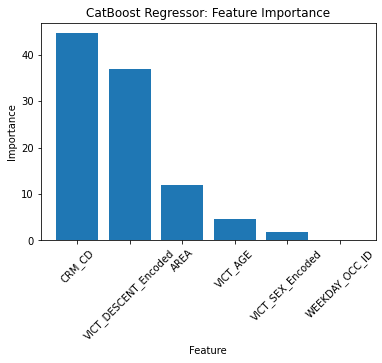

In [26]:
# Get feature importance
feature_importance = best_cat_model.get_feature_importance(prettified=True, type='PredictionValuesChange')

# Plotting feature importance
feature_names = feature_importance['Feature Id']
importance_values = feature_importance['Importances']
plt.bar(range(len(feature_names)), importance_values)
plt.xticks(range(len(feature_names)), feature_names, rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('CatBoost Regressor: Feature Importance')
plt.show()

Desicion-Tree Regressor

In [27]:

from sklearn.tree import DecisionTreeRegressor



start_time = time.time()
current_time = datetime.now()
print('Started at:', current_time.strftime("%H:%M:%S"))
print('----------------------------------')

# Define the parameter grid for Decision Tree
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],

}


dt_model = DecisionTreeRegressor()


dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=5, scoring='neg_mean_squared_error')
dt_grid_search.fit(X_train, y_train)

# Extract the best parameters and model
best_params = dt_grid_search.best_params_
best_dt_model = dt_grid_search.best_estimator_

# Predictions
dt_pred = best_dt_model.predict(X_test)

# Evaluation
dt_mse = mean_squared_error(y_test, dt_pred)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_pred)
dt_mae = mean_absolute_error(y_test, dt_pred)

# Cross-Validation Scores
dt_cv_scores = cross_val_score(best_dt_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
dt_cv_scores_positive = -dt_cv_scores

# Print results
print("Best parameters for Decision Tree:", best_params)
print("Decision Tree Evaluation Metrics:")
print("Mean Squared Error:", dt_mse)
print("Root Mean Squared Error:", dt_rmse)
print("Mean Absolute Error:", dt_mae)
print("R^2 Score:", dt_r2)
print("CV Scores (Mean Squared Error):", dt_cv_scores_positive)
print("Average CV Score:", np.mean(dt_cv_scores_positive))

# Calculate elapsed time
print('----------------------------------')
elapsed_time = (time.time() - start_time) / 60
print("Elapsed time: {:.2f} minutes".format(elapsed_time))


Started at: 18:19:00
----------------------------------
Best parameters for Decision Tree: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}
Decision Tree Evaluation Metrics:
Mean Squared Error: 887.5342169619786
Root Mean Squared Error: 29.79151249872988
Mean Absolute Error: 3.2126730343300114
R^2 Score: 0.059668770617144484
CV Scores (Mean Squared Error): [10.7785715  10.65377855 11.14892383 13.46453169  9.5638209 ]
Average CV Score: 11.121925295019544
----------------------------------
Elapsed time: 1.25 minutes


In [28]:
results['Model'].append('DecisionTree')
results['MAE'].append(dt_mae)
results['MSE'].append(dt_mse)
results['RMSE'].append(dt_rmse)
results['Rsquared'].append(dt_r2)
results['CVScore'].append(np.mean(dt_cv_scores_positive))
predictions['DecisionTree'] = dt_pred

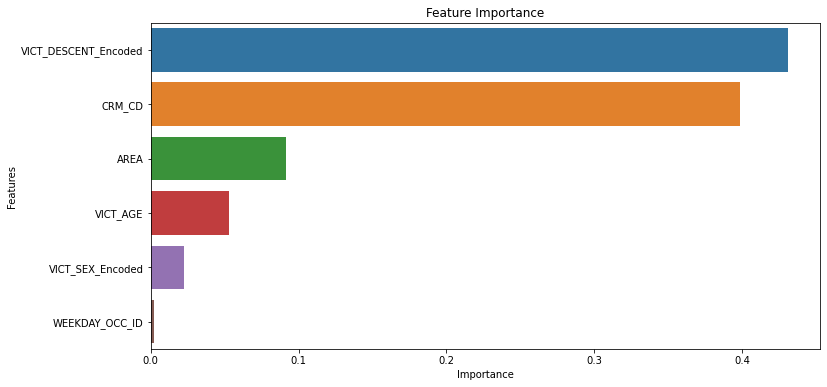

In [29]:
# Visualize Feature Importance
feature_importance = best_dt_model.feature_importances_
feature_names = X_train.columns  # Adjust this based on your feature names

# Sort feature importances in descending order
indices = np.argsort(feature_importance)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance[indices], y=feature_names[indices])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

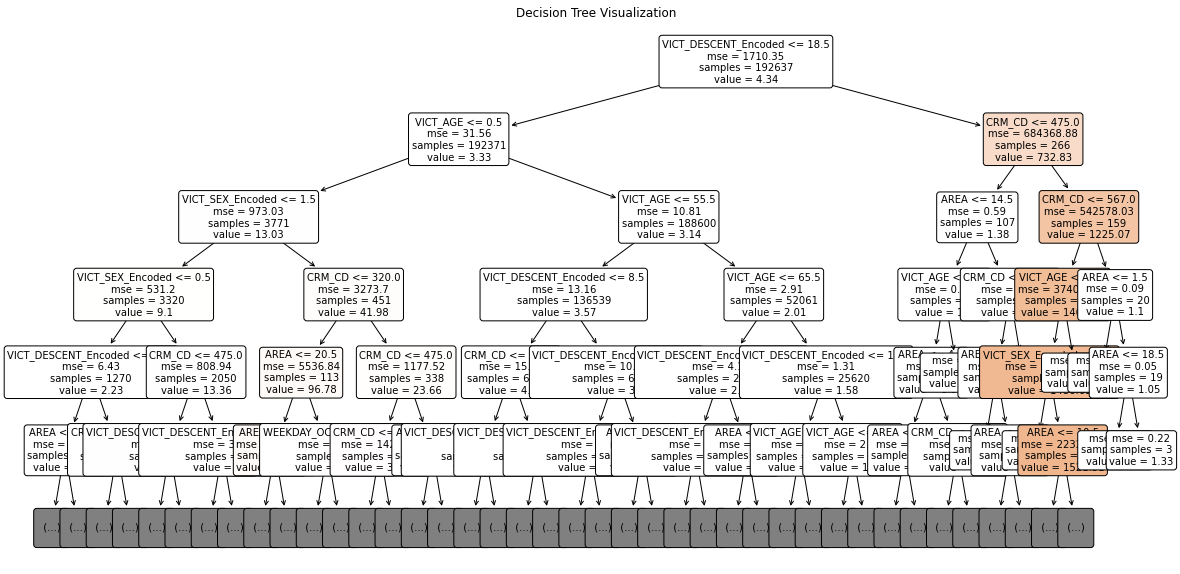

In [30]:
from sklearn.tree import plot_tree

# Visualize Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(best_dt_model, feature_names=X_train.columns, filled=True, rounded=True, fontsize=10, precision=2,max_depth=5)
plt.title('Decision Tree Visualization')
plt.show()

### 4.4.Comparison on the models

In [31]:
results

{'Model': ['LinearRegression',
  'RandomForest',
  'XGBoost',
  'CatBoost',
  'DecisionTree'],
 'MAE': [6.690565470092898,
  3.1140427740863785,
  3.6971506414000577,
  6.142462781107662,
  3.2126730343300114],
 'MSE': [954.7038871952669,
  888.1622674875413,
  983.5870866424732,
  978.1554658246604,
  887.5342169619786],
 'RMSE': [30.89828291661637,
  29.802051397303867,
  31.36219199358478,
  31.27547706789875,
  29.79151249872988],
 'Rsquared': [-0.01149664180369836,
  0.05900335906282894,
  -0.042098024742678763,
  -0.03634329147882975,
  0.059668770617144484],
 'CVScore': [1685.9425838916309,
  13.063741078116129,
  22.455718770397304,
  22.455718770397304,
  11.121925295019544]}

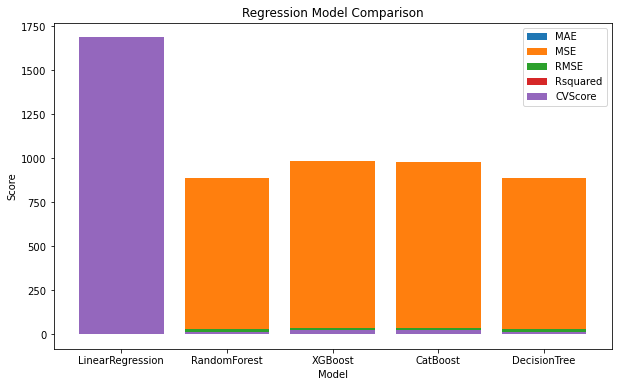

In [32]:
# Visualizations
# 1. Bar chart of model scores
plt.figure(figsize=(10, 6))
plt.bar(results['Model'], results['MAE'], label='MAE')
plt.bar(results['Model'], results['MSE'], label='MSE')
plt.bar(results['Model'], results['RMSE'], label='RMSE')
plt.bar(results['Model'], results['Rsquared'], label='Rsquared')
plt.bar(results['Model'], results['CVScore'], label='CVScore')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Regression Model Comparison')
plt.legend()
plt.show()

<b>
 <ul>
     <li>Linear Regression has high errors (MAE, MSE, RMSE) and a negative R-squared, suggesting poor performance. </li>
 <li>Random Forest shows relatively low errors and the highest R-squared, indicating good performance.</li>
 <li>XGBoost has moderate errors and a negative R-squared, indicating average to below-average performance.</li>
 <li>CatBoost shows high errors and a negative R-squared, similar to Linear Regression.</li>
 <li>Decision Tree has moderate errors and the highest R-squared (similar to Random Forest), suggesting good performance.</li>
 </ul>
Overall, the Random Forest and Decision Tree models seem to perform the best. Random Forest has the lowest MAE and the highest R-squared, indicating it might be the most accurate and consistent. However, Decision Tree also shows strong performance with a slightly lower RMSE and the same R-squared as Random Forest.
<br/>
The final choice might depend on specific project requirements, such as interpretability (where Decision Trees might have an advantage) or handling large datasets and overfitting (where Random Forest might perform better). </b>

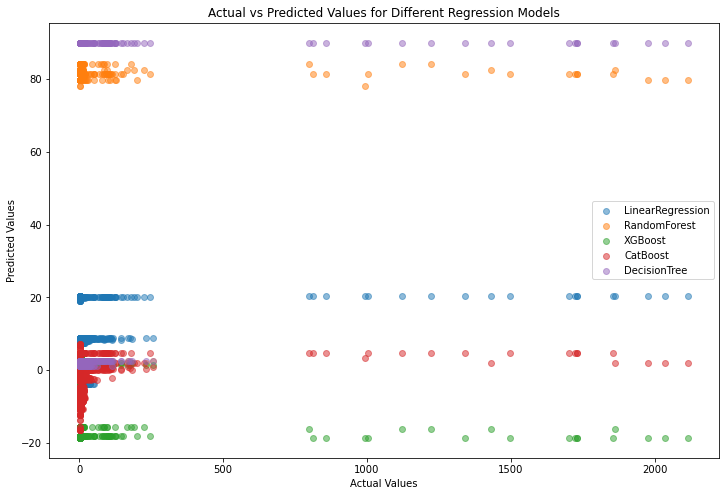

In [35]:
# 2. Scatter plot of actual vs predicted values for each model
plt.figure(figsize=(12, 8))
for name, y_pred in predictions.items():
    plt.scatter(y_test, y_pred, label=name, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Different Regression Models')
plt.legend()
plt.show()


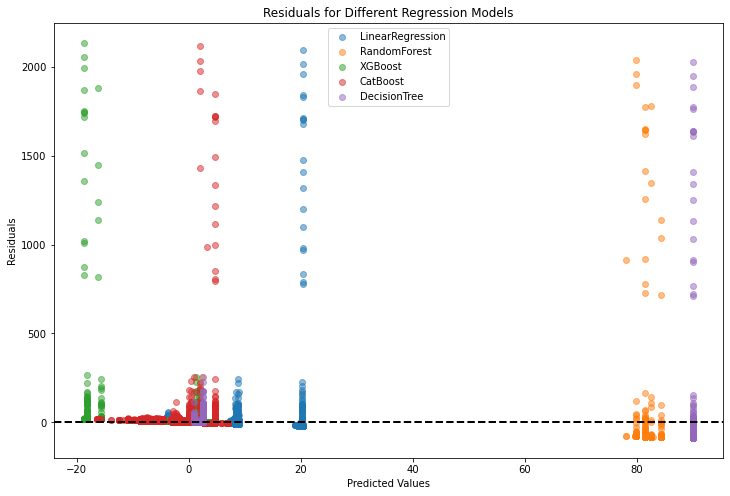

In [36]:
# 3. Residual plot for each model
plt.figure(figsize=(12, 8))
for name, y_pred in predictions.items():
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals, label=name, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals for Different Regression Models')
plt.legend()
plt.show()

## 4.5.Final Model

<b>Model Validation</b>

Plotting learning curves, which is a great way to check for overfitting or underfitting.

In [38]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 20)):

    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(10, 10))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        model, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, return_times=True, scoring='neg_mean_absolute_error'
    )
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    axes.legend(loc="best")

    return plt


/Users/thantthiri/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


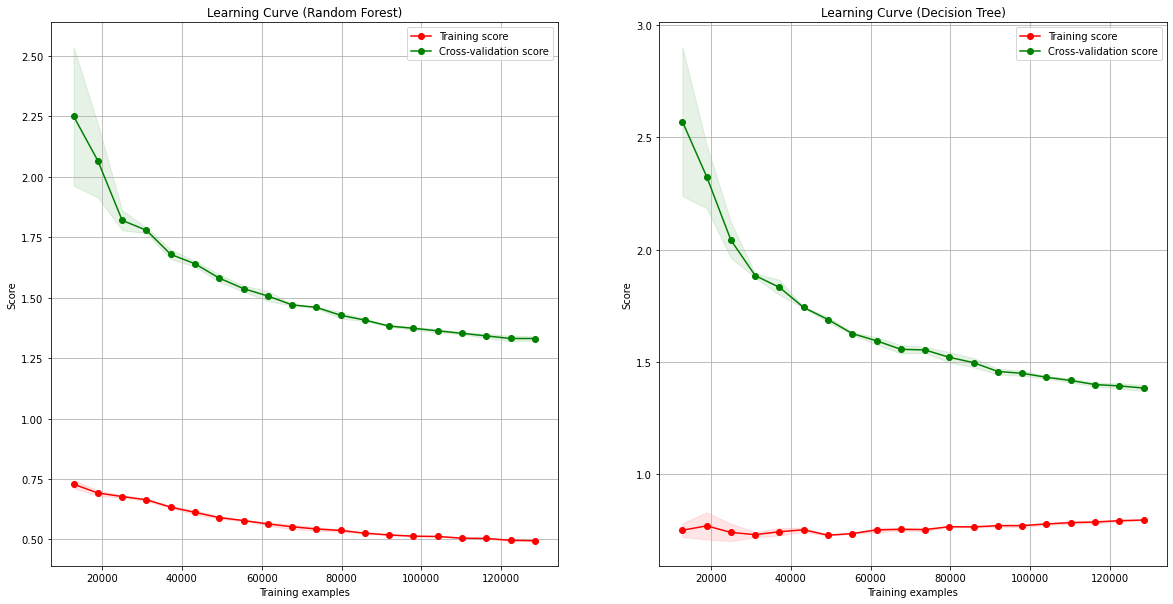

In [39]:
# Plotting learning curves for both models
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

plot_learning_curve(rf_model, "Learning Curve (Random Forest)", X_train, y_train, axes=axes[0], cv=3, n_jobs=-1)
plot_learning_curve(best_dt_model, "Learning Curve (Decision Tree)", X_train, y_train, axes=axes[1], cv=3, n_jobs=-1)

plt.show()

On the Random Forest Learning curve plot (left) ,The gap between the training and cross-validation scores is narrowing but remains relatively constant in the latter part of the curve. </br>
The Decision Tree Learning curve plot (right) has a very high training score initially, suggesting potential overfitting. However, as more data is used for training, the training score decreases, and the cross-validation score increases, closing the gap between them.</br>
Based on the information visible, <b>Decision tree model</b> is considered better because the cross-validation score is improving significantly with more data, and the gap between the training and validation scores is narrowing, suggesting that the model is benefiting from additional data and is likely generalizing well.

## 4.5.Final Model  

Fit Final Model with Decision Tree

In [50]:
final_model = DecisionTreeRegressor(**best_params)
final_model.version = '1.0'
final_model.pandas_version = pd.__version__
final_model.numpy_version = np.__version__
final_model.sklearn_version = sklearn_version
final_model.X_columns = [col for col in X_train.columns]
final_model.build_datetime = datetime.now
final_model.fit(np.vstack((X_train, X_test)), np.concatenate((y_train, y_test)))

DecisionTreeRegressor(max_depth=20, min_samples_split=5)

In [51]:
final_pred = final_model.predict(scaler.fit_transform(X))

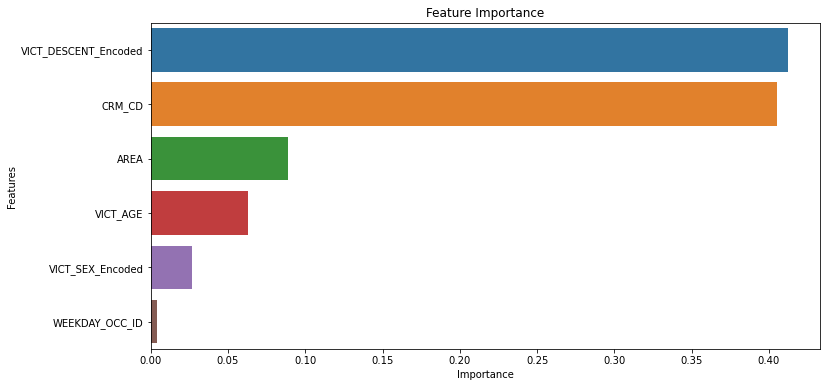

In [116]:
feature_importance = final_model.feature_importances_
feature_names = X.columns  # Adjust this based on your feature names

# Sort feature importances in descending order
indices = np.argsort(feature_importance)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance[indices], y=feature_names[indices])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [53]:
df_pred =X.copy()
df_pred['CRIME_Predicted'] = final_pred
df_pred['CRIME_Total'] = y

In [54]:
df_pred['CRIME_Total_Diff'] = df_pred['CRIME_Predicted'] - df_pred['CRIME_Total']
df_pred['CRIME_Total_Diff_Percentage'] = (df_pred['CRIME_Total_Diff'] / df_pred['CRIME_Total']) * 100

In [56]:
df_pred

CRM_CD  AREA  VICT_AGE  VICT_DESCENT_Encoded  VICT_SEX_Encoded  \
175815     510    12         0                    19                 2   
175814     510    12         0                    19                 2   
175816     510    12         0                    19                 2   
175926     510    13         0                    19                 2   
175810     510    12         0                    19                 2   
...        ...   ...       ...                   ...               ...   
114727     330    21        77                    18                 0   
114726     330    21        77                    18                 0   
114725     330    21        77                    18                 0   
114724     330    21        77                    12                 1   
240796     624    21        99                    13                 1   

        WEEKDAY_OCC_ID  CRIME_Predicted  CRIME_Total  CRIME_Total_Diff  \
175815               5      1921.000000         2765       -844.000000   
175814               4      1921.000000         2689       -768.000000   
175816               6      1047.000000         2562      -1515.000000   
175926               5      1921.000000         2527       -606.000000   
175810               0      1663.250000         2525       -861.750000   
...                ...              ...          ...               ...   
114727               2         1.343499            1          0.343499   
114726               1         1.343499            1          0.343499   
114725               0         1.343499            1          0.343499   
114724               0         1.013158            1          0.013158   
240796               2         1.018692            1          0.018692   

        CRIME_Total_Diff_Percentage  
175815                   -30.524412  
175814                   -28.560803  
175816                   -59.133489  
175926                   -23.981005  
175810                   -34.128713  
...                             ...  
114727                    34.349920  
114726                    34.349920  
114725                    34.349920  
114724                     1.315789  
240796                     1.869159  

[240797 rows x 10 columns]

Save Model file

In [57]:
import pickle

save_modelfilepath = "../models/final_model_2.pkl"
with open(save_modelfilepath, 'wb') as file:
    pickle.dump([final_model], file)
    
preddata_filepath = "../data/processed/pred_raw_2.csv"
df_pred.to_csv(preddata_filepath, index=False) 

## 4.6 Analysis on model prediction data

<b>Predicting Accurancy</b>

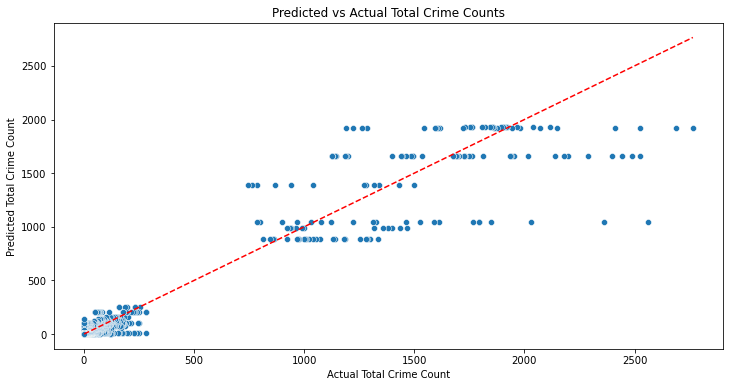

{'Mean Absolute Error (MAE)': 1.5895362858729367,
 'Mean Squared Error (MSE)': 112.05387367012905,
 'Root Mean Squared Error (RMSE)': 10.585550229918567}

In [74]:
# Comparing Predicted and Actual Total Crime Counts

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting Predicted vs Actual Total Crime Counts
sns.scatterplot(x='CRIME_Total', y='CRIME_Predicted', data= df_pred, ax=ax)
ax.plot([df_pred['CRIME_Total'].min(), df_pred['CRIME_Total'].max()], 
        [df_pred['CRIME_Total'].min(), df_pred['CRIME_Total'].max()], 
        'r--') # Diagonal line for perfect prediction

ax.set_title('Predicted vs Actual Total Crime Counts')
ax.set_xlabel('Actual Total Crime Count')
ax.set_ylabel('Predicted Total Crime Count')
plt.show()

# Basic statistics
prediction_accuracy = {
    "Mean Absolute Error (MAE)": (df_pred['CRIME_Total'] - df_pred['CRIME_Predicted']).abs().mean(),
    "Mean Squared Error (MSE)": ((df_pred['CRIME_Total'] - df_pred['CRIME_Predicted']) ** 2).mean(),
    "Root Mean Squared Error (RMSE)": (((df_pred['CRIME_Total'] - df_pred['CRIME_Predicted']) ** 2).mean())**0.5
}

prediction_accuracy

<b>Data suggests that the predictions reasonably close to the actual values, though there is room for improvement. The RMSE indicates that on average, the prediction deviates from the actual count by crimes about RMSE 10.59 .</b>


<b>Mapping Category Value on Feature columns</b>

In [65]:
filepath = "../data/interim/top5_crime_pre.csv"
df_top5_crime = pd.read_csv(filepath)
df_top5_crime.head(3)

TIME_OCC  AREA AREA_NAME  CRM_CD               CRM_CD_DESC  VICT_AGE  \
0      2005     1   Central     330     BURGLARY FROM VEHICLE        46   
1      1445     1   Central     624  BATTERY - SIMPLE ASSAULT        38   
2      1630     1   Central     330     BURGLARY FROM VEHICLE        25   

  VICT_SEX            VICT_DESCENT  latitude  longitude  ...  \
0        M  Hispanic/Latin/Mexican   34.0389  -118.2643  ...   
1        F                   Black   34.0640  -118.2375  ...   
2        F                   White   34.0454  -118.2360  ...   

   VICT_DESCENT_nan_sc  WEEKDAY_OCC_Friday_sc  WEEKDAY_OCC_Monday_sc  \
0            -0.527651              -0.429537              -0.401668   
1            -0.527651              -0.429537              -0.401668   
2            -0.527651               2.328087              -0.401668   

   WEEKDAY_OCC_Saturday_sc WEEKDAY_OCC_Sunday_sc  WEEKDAY_OCC_Thursday_sc  \
0                -0.413561             -0.395942                 2.455598   
1                -0.413561             -0.395942                 2.455598   
2                -0.413561             -0.395942                -0.407233   

  WEEKDAY_OCC_Tuesday_sc  WEEKDAY_OCC_Wednesday_sc  TIME_OCC_TYPE_AM_sc  \
0              -0.402462                  -0.40697            -0.362775   
1              -0.402462                  -0.40697            -0.362775   
2              -0.402462                  -0.40697            -0.362775   

   TIME_OCC_TYPE_PM_sc  
0             0.362775  
1             0.362775  
2             0.362775  

[3 rows x 148 columns]

In [63]:
df_area = df_top5_crime[['AREA', 'AREA_NAME']].drop_duplicates()
df_pred = pd.merge(df_pred, df_area, on='AREA', how='left')

CRM_CD  AREA  VICT_AGE  VICT_DESCENT_Encoded  VICT_SEX_Encoded  \
0          510    12         0                    19                 2   
1          510    12         0                    19                 2   
2          510    12         0                    19                 2   
3          510    13         0                    19                 2   
4          510    12         0                    19                 2   
...        ...   ...       ...                   ...               ...   
240792     330    21        77                    18                 0   
240793     330    21        77                    18                 0   
240794     330    21        77                    18                 0   
240795     330    21        77                    12                 1   
240796     624    21        99                    13                 1   

        WEEKDAY_OCC_ID  CRIME_Predicted  CRIME_Total  CRIME_Total_Diff  \
0                    5      1921.000000         2765       -844.000000   
1                    4      1921.000000         2689       -768.000000   
2                    6      1047.000000         2562      -1515.000000   
3                    5      1921.000000         2527       -606.000000   
4                    0      1663.250000         2525       -861.750000   
...                ...              ...          ...               ...   
240792               2         1.343499            1          0.343499   
240793               1         1.343499            1          0.343499   
240794               0         1.343499            1          0.343499   
240795               0         1.013158            1          0.013158   
240796               2         1.018692            1          0.018692   

        CRIME_Total_Diff_Percentage    AREA_NAME  
0                        -30.524412  77th Street  
1                        -28.560803  77th Street  
2                        -59.133489  77th Street  
3                        -23.981005       Newton  
4                        -34.128713  77th Street  
...                             ...          ...  
240792                    34.349920      Topanga  
240793                    34.349920      Topanga  
240794                    34.349920      Topanga  
240795                     1.315789      Topanga  
240796                     1.869159      Topanga  

[240797 rows x 11 columns]

In [66]:
df_CRM = df_top5_crime[['CRM_CD', 'CRM_CD_DESC']].drop_duplicates()
df_pred = pd.merge(df_pred, df_CRM, on='CRM_CD', how='left')
df_pred

CRM_CD  AREA  VICT_AGE  VICT_DESCENT_Encoded  VICT_SEX_Encoded  \
0          510    12         0                    19                 2   
1          510    12         0                    19                 2   
2          510    12         0                    19                 2   
3          510    13         0                    19                 2   
4          510    12         0                    19                 2   
...        ...   ...       ...                   ...               ...   
240792     330    21        77                    18                 0   
240793     330    21        77                    18                 0   
240794     330    21        77                    18                 0   
240795     330    21        77                    12                 1   
240796     624    21        99                    13                 1   

        WEEKDAY_OCC_ID  CRIME_Predicted  CRIME_Total  CRIME_Total_Diff  \
0                    5      1921.000000         2765       -844.000000   
1                    4      1921.000000         2689       -768.000000   
2                    6      1047.000000         2562      -1515.000000   
3                    5      1921.000000         2527       -606.000000   
4                    0      1663.250000         2525       -861.750000   
...                ...              ...          ...               ...   
240792               2         1.343499            1          0.343499   
240793               1         1.343499            1          0.343499   
240794               0         1.343499            1          0.343499   
240795               0         1.013158            1          0.013158   
240796               2         1.018692            1          0.018692   

        CRIME_Total_Diff_Percentage    AREA_NAME               CRM_CD_DESC  
0                        -30.524412  77th Street          VEHICLE - STOLEN  
1                        -28.560803  77th Street          VEHICLE - STOLEN  
2                        -59.133489  77th Street          VEHICLE - STOLEN  
3                        -23.981005       Newton          VEHICLE - STOLEN  
4                        -34.128713  77th Street          VEHICLE - STOLEN  
...                             ...          ...                       ...  
240792                    34.349920      Topanga     BURGLARY FROM VEHICLE  
240793                    34.349920      Topanga     BURGLARY FROM VEHICLE  
240794                    34.349920      Topanga     BURGLARY FROM VEHICLE  
240795                     1.315789      Topanga     BURGLARY FROM VEHICLE  
240796                     1.869159      Topanga  BATTERY - SIMPLE ASSAULT  

[240797 rows x 12 columns]

In [67]:
df_w = df_top5_crime[['WEEKDAY_OCC_ID', 'WEEKDAY_OCC']].drop_duplicates()
df_pred = pd.merge(df_pred, df_w, on='WEEKDAY_OCC_ID', how='left')
df_pred

CRM_CD  AREA  VICT_AGE  VICT_DESCENT_Encoded  VICT_SEX_Encoded  \
0          510    12         0                    19                 2   
1          510    12         0                    19                 2   
2          510    12         0                    19                 2   
3          510    13         0                    19                 2   
4          510    12         0                    19                 2   
...        ...   ...       ...                   ...               ...   
240792     330    21        77                    18                 0   
240793     330    21        77                    18                 0   
240794     330    21        77                    18                 0   
240795     330    21        77                    12                 1   
240796     624    21        99                    13                 1   

        WEEKDAY_OCC_ID  CRIME_Predicted  CRIME_Total  CRIME_Total_Diff  \
0                    5      1921.000000         2765       -844.000000   
1                    4      1921.000000         2689       -768.000000   
2                    6      1047.000000         2562      -1515.000000   
3                    5      1921.000000         2527       -606.000000   
4                    0      1663.250000         2525       -861.750000   
...                ...              ...          ...               ...   
240792               2         1.343499            1          0.343499   
240793               1         1.343499            1          0.343499   
240794               0         1.343499            1          0.343499   
240795               0         1.013158            1          0.013158   
240796               2         1.018692            1          0.018692   

        CRIME_Total_Diff_Percentage    AREA_NAME               CRM_CD_DESC  \
0                        -30.524412  77th Street          VEHICLE - STOLEN   
1                        -28.560803  77th Street          VEHICLE - STOLEN   
2                        -59.133489  77th Street          VEHICLE - STOLEN   
3                        -23.981005       Newton          VEHICLE - STOLEN   
4                        -34.128713  77th Street          VEHICLE - STOLEN   
...                             ...          ...                       ...   
240792                    34.349920      Topanga     BURGLARY FROM VEHICLE   
240793                    34.349920      Topanga     BURGLARY FROM VEHICLE   
240794                    34.349920      Topanga     BURGLARY FROM VEHICLE   
240795                     1.315789      Topanga     BURGLARY FROM VEHICLE   
240796                     1.869159      Topanga  BATTERY - SIMPLE ASSAULT   

       WEEKDAY_OCC  
0         Saturday  
1           Friday  
2           Sunday  
3         Saturday  
4           Monday  
...            ...  
240792   Wednesday  
240793     Tuesday  
240794      Monday  
240795      Monday  
240796   Wednesday  

[240797 rows x 13 columns]

In [68]:
df_d = df_top5_crime[['VICT_DESCENT_Encoded', 'VICT_DESCENT']].drop_duplicates()
df_pred = pd.merge(df_pred, df_d, on='VICT_DESCENT_Encoded', how='left')
df_pred

CRM_CD  AREA  VICT_AGE  VICT_DESCENT_Encoded  VICT_SEX_Encoded  \
0          510    12         0                    19                 2   
1          510    12         0                    19                 2   
2          510    12         0                    19                 2   
3          510    13         0                    19                 2   
4          510    12         0                    19                 2   
...        ...   ...       ...                   ...               ...   
240792     330    21        77                    18                 0   
240793     330    21        77                    18                 0   
240794     330    21        77                    18                 0   
240795     330    21        77                    12                 1   
240796     624    21        99                    13                 1   

        WEEKDAY_OCC_ID  CRIME_Predicted  CRIME_Total  CRIME_Total_Diff  \
0                    5      1921.000000         2765       -844.000000   
1                    4      1921.000000         2689       -768.000000   
2                    6      1047.000000         2562      -1515.000000   
3                    5      1921.000000         2527       -606.000000   
4                    0      1663.250000         2525       -861.750000   
...                ...              ...          ...               ...   
240792               2         1.343499            1          0.343499   
240793               1         1.343499            1          0.343499   
240794               0         1.343499            1          0.343499   
240795               0         1.013158            1          0.013158   
240796               2         1.018692            1          0.018692   

        CRIME_Total_Diff_Percentage    AREA_NAME               CRM_CD_DESC  \
0                        -30.524412  77th Street          VEHICLE - STOLEN   
1                        -28.560803  77th Street          VEHICLE - STOLEN   
2                        -59.133489  77th Street          VEHICLE - STOLEN   
3                        -23.981005       Newton          VEHICLE - STOLEN   
4                        -34.128713  77th Street          VEHICLE - STOLEN   
...                             ...          ...                       ...   
240792                    34.349920      Topanga     BURGLARY FROM VEHICLE   
240793                    34.349920      Topanga     BURGLARY FROM VEHICLE   
240794                    34.349920      Topanga     BURGLARY FROM VEHICLE   
240795                     1.315789      Topanga     BURGLARY FROM VEHICLE   
240796                     1.869159      Topanga  BATTERY - SIMPLE ASSAULT   

       WEEKDAY_OCC VICT_DESCENT  
0         Saturday          NaN  
1           Friday          NaN  
2           Sunday          NaN  
3         Saturday          NaN  
4           Monday          NaN  
...            ...          ...  
240792   Wednesday        White  
240793     Tuesday        White  
240794      Monday        White  
240795      Monday        Other  
240796   Wednesday  Other Asian  

[240797 rows x 14 columns]

In [69]:
df_s = df_top5_crime[['VICT_SEX_Encoded', 'VICT_SEX']].drop_duplicates()
df_pred = pd.merge(df_pred, df_s, on='VICT_SEX_Encoded', how='left')
df_pred

CRM_CD  AREA  VICT_AGE  VICT_DESCENT_Encoded  VICT_SEX_Encoded  \
0          510    12         0                    19                 2   
1          510    12         0                    19                 2   
2          510    12         0                    19                 2   
3          510    13         0                    19                 2   
4          510    12         0                    19                 2   
...        ...   ...       ...                   ...               ...   
240792     330    21        77                    18                 0   
240793     330    21        77                    18                 0   
240794     330    21        77                    18                 0   
240795     330    21        77                    12                 1   
240796     624    21        99                    13                 1   

        WEEKDAY_OCC_ID  CRIME_Predicted  CRIME_Total  CRIME_Total_Diff  \
0                    5      1921.000000         2765       -844.000000   
1                    4      1921.000000         2689       -768.000000   
2                    6      1047.000000         2562      -1515.000000   
3                    5      1921.000000         2527       -606.000000   
4                    0      1663.250000         2525       -861.750000   
...                ...              ...          ...               ...   
240792               2         1.343499            1          0.343499   
240793               1         1.343499            1          0.343499   
240794               0         1.343499            1          0.343499   
240795               0         1.013158            1          0.013158   
240796               2         1.018692            1          0.018692   

        CRIME_Total_Diff_Percentage    AREA_NAME               CRM_CD_DESC  \
0                        -30.524412  77th Street          VEHICLE - STOLEN   
1                        -28.560803  77th Street          VEHICLE - STOLEN   
2                        -59.133489  77th Street          VEHICLE - STOLEN   
3                        -23.981005       Newton          VEHICLE - STOLEN   
4                        -34.128713  77th Street          VEHICLE - STOLEN   
...                             ...          ...                       ...   
240792                    34.349920      Topanga     BURGLARY FROM VEHICLE   
240793                    34.349920      Topanga     BURGLARY FROM VEHICLE   
240794                    34.349920      Topanga     BURGLARY FROM VEHICLE   
240795                     1.315789      Topanga     BURGLARY FROM VEHICLE   
240796                     1.869159      Topanga  BATTERY - SIMPLE ASSAULT   

       WEEKDAY_OCC VICT_DESCENT VICT_SEX  
0         Saturday          NaN  Unknown  
1           Friday          NaN  Unknown  
2           Sunday          NaN  Unknown  
3         Saturday          NaN  Unknown  
4           Monday          NaN  Unknown  
...            ...          ...      ...  
240792   Wednesday        White        F  
240793     Tuesday        White        F  
240794      Monday        White        F  
240795      Monday        Other        M  
240796   Wednesday  Other Asian        M  

[240797 rows x 15 columns]

In [70]:
data_filepath = "../data/processed/pred_full_2.csv"
df_pred.to_csv(data_filepath, index=False) 

<b> How Accurate Are the Predictions for Different Crime Types? </b>

In [174]:
grouped_by_crime_type = df_pred.groupby('CRM_CD_DESC').agg({'CRIME_Total': 'sum', 'CRIME_Predicted': 'sum'}).reset_index()
top_crime_types_only = grouped_by_crime_type.sort_values(by='CRIME_Total', ascending=False)


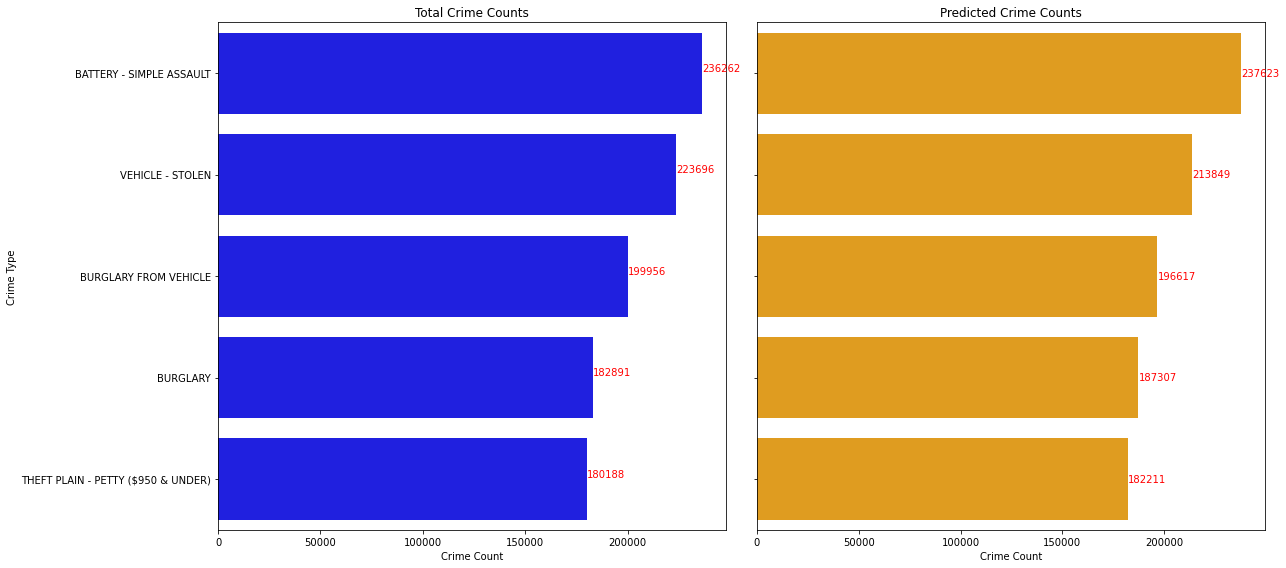

In [114]:
top_crime_types_parallel = top_crime_types_only.set_index('CRM_CD_DESC')

# Creating a figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8), sharey=True)

# Plotting Total Crime Counts
sns.barplot(x=top_crime_types_parallel['CRIME_Total'], y=top_crime_types_parallel.index, ax=axes[0], color='blue')
axes[0].set_title('Total Crime Counts')
axes[0].set_xlabel('Crime Count')
axes[0].set_ylabel('Crime Type')
for p in axes[0].patches:
    axes[0].text(p.get_width(), p.get_y() + p.get_height() / 2, 
                 int(p.get_width()), 
                 fontsize=10, 
                 ha = 'left', va = 'bottom' ,color='red')

# Plotting Predicted Crime Counts
sns.barplot(x=top_crime_types_parallel['CRIME_Predicted'], y=top_crime_types_parallel.index, ax=axes[1], color='orange')
axes[1].set_title('Predicted Crime Counts')
axes[1].set_xlabel('Crime Count')
axes[1].set_ylabel('')
for p in axes[1].patches:
    axes[1].text(p.get_width(), p.get_y() + p.get_height() / 2, 
                 int(p.get_width()), 
                 fontsize=10, 
                 va='center',color='red')

# Adjust layout
plt.tight_layout()
plt.show()

In [138]:
df_cd =df_pred.groupby(['CRM_CD_DESC']).agg({'CRIME_Total': 'mean', 'CRIME_Predicted': 'mean'}).reset_index()
df_cd

CRM_CD_DESC  CRIME_Total  CRIME_Predicted
0            BATTERY - SIMPLE ASSAULT     3.668437         3.689583
1                            BURGLARY     3.183093         3.259960
2               BURGLARY FROM VEHICLE     3.487990         3.429762
3  THEFT PLAIN - PETTY ($950 & UNDER)     2.977133         3.010574
4                    VEHICLE - STOLEN   206.171429       197.096126

/var/folders/pk/m2_8c77j2zx4w04mcryfb0z00000gn/T/ipykernel_4277/3438927577.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_cd['CRM_CD_DESC'], rotation=90)


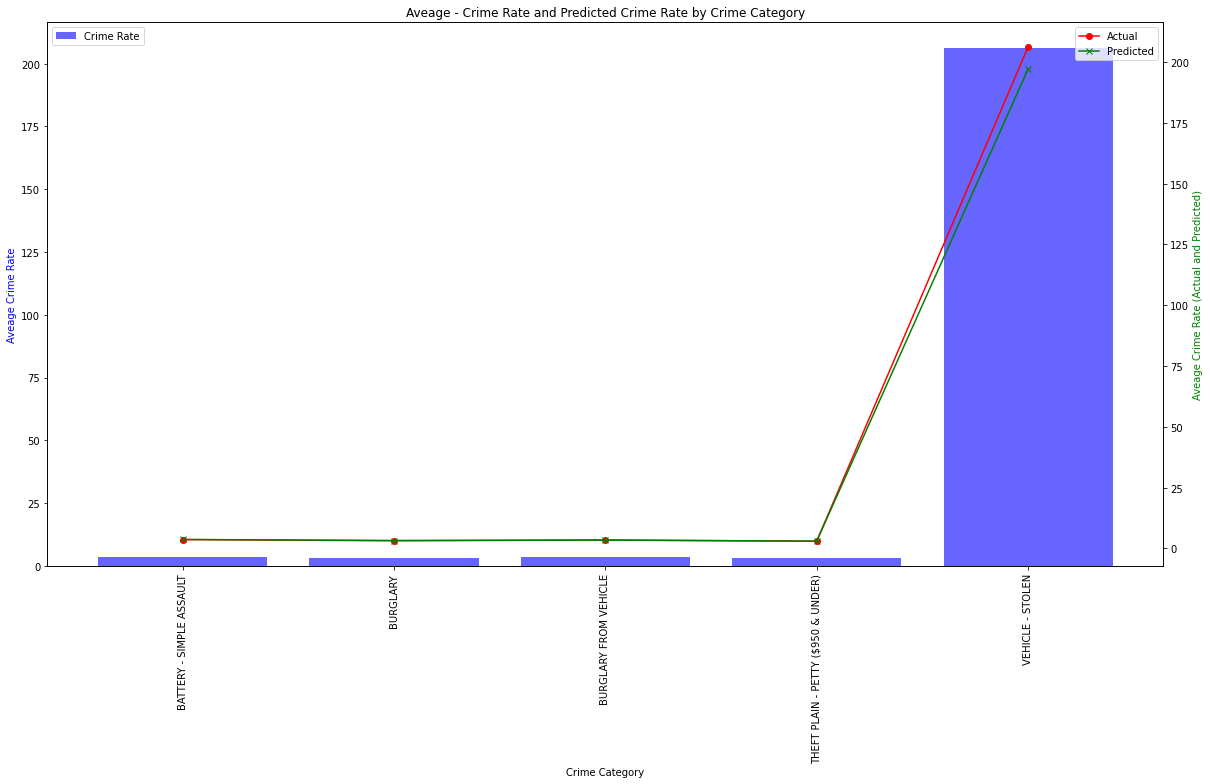

In [140]:
# Plotting
fig, ax1 = plt.subplots(figsize=(20, 10))

# Bar plot for victim_age
ax1.bar(df_cd['CRM_CD_DESC'], df_cd['CRIME_Total'], color='b', alpha=0.6, label='Crime Rate')

# Line plot for crime_count and predicted_crimecount
ax2 = ax1.twinx()
ax2.plot(df_cd['CRM_CD_DESC'], df_cd['CRIME_Total'], color='r', marker='o', label='Actual')
ax2.plot(df_cd['CRM_CD_DESC'], df_cd['CRIME_Predicted'], color='g', marker='x', label='Predicted')

# Labels and titles
ax1.set_xlabel('Crime Category')
ax1.set_ylabel('Aveage Crime Rate', color='b')
ax1.set_xticklabels(df_cd['CRM_CD_DESC'], rotation=90)
ax2.set_ylabel('Aveage Crime Rate (Actual and Predicted)', color='g')
plt.title('Aveage - Crime Rate and Predicted Crime Rate by Crime Category')


# Legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.show()

BATTERY - SIMPLE ASSAULT: The predicted average crime rate for simple assault is slightly higher than the actual average. <br/>

BURGLARY: The predicted average crime rate for burglary is slightly higher than the actual average.<br/>

BURGLARY FROM VEHICLE: The predicted average crime rate is slightly lower than the actual average.<br/>

THEFT PLAIN - PETTY ($950 & UNDER): The predicted average crime rate for petty theft is slightly higher than the actual average.<br/>

VEHICLE - STOLEN: The predicted average crime rate for vehicle theft is significantly lower than the actual average, with the actual rate being over 200 and the predicted rate being just under 200.

<b> How Does the Model's Accuracy Vary Across Different Descent Groups? </b>

In [132]:
df_vd =df_pred.groupby(['VICT_DESCENT']).agg({'CRIME_Total': 'mean', 'CRIME_Predicted': 'mean'}).reset_index()
df_vd

VICT_DESCENT  CRIME_Total  CRIME_Predicted
0   American Indian/Alaskan Native     1.078846         2.081483
1                     Asian Indian     1.009950         1.679430
2                            Black     2.943617         2.901533
3                        Cambodian     1.038462         1.347218
4                          Chinese     1.101080         1.384068
5                         Filipino     1.055901         1.299366
6                        Guamanian     1.000000         2.976101
7                         Hawaiian     1.010753         1.563297
8           Hispanic/Latin/Mexican     4.265110         4.267246
9                         Japanese     1.021552         1.198010
10                          Korean     1.411942         1.509233
11                         Laotian     1.000000         1.218284
12                           Other     2.251009         2.278034
13                     Other Asian     1.377886         1.429503
14                Pacific Islander     1.000000         1.117473
15                          Samoan     1.000000         1.157797
16                         Unknown     8.204051         8.108943
17                      Vietnamese     1.030030         1.175410
18                           White     3.946891         4.004282

/var/folders/pk/m2_8c77j2zx4w04mcryfb0z00000gn/T/ipykernel_4277/1358587927.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_vd['VICT_DESCENT'], rotation=90)


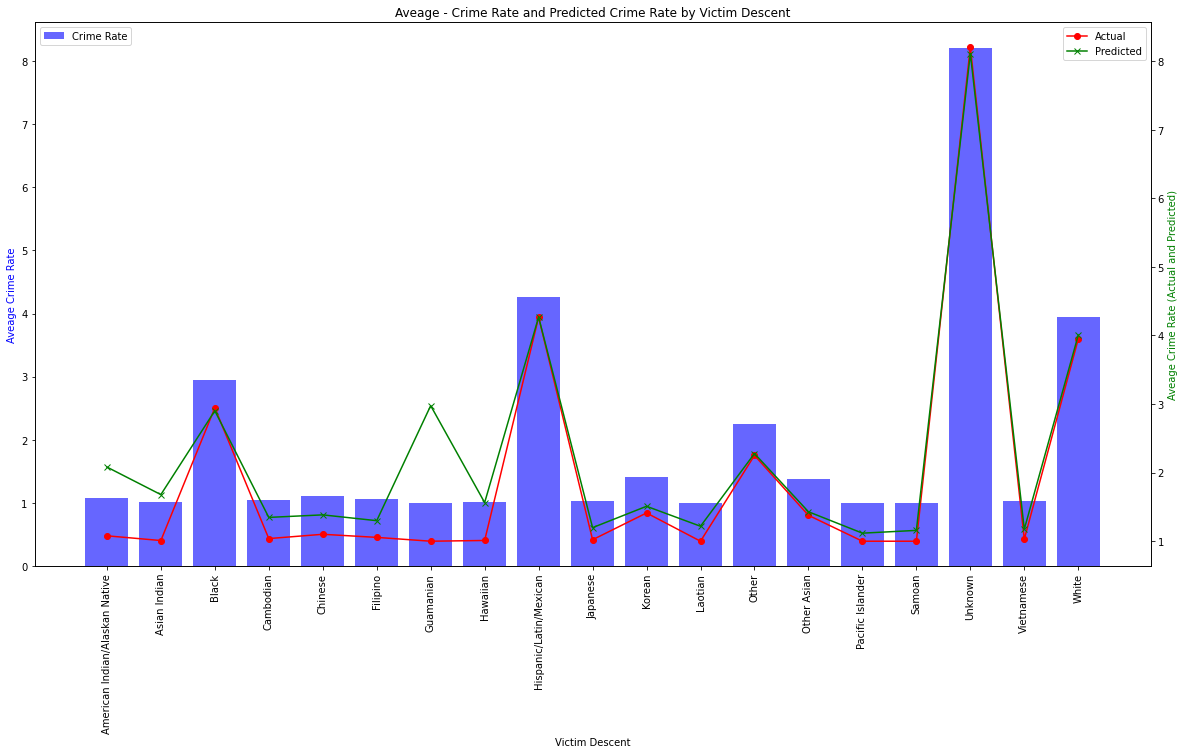

In [136]:

# Plotting
fig, ax1 = plt.subplots(figsize=(20, 10))

# Bar plot for victim_age
ax1.bar(df_vd['VICT_DESCENT'], df_vd['CRIME_Total'], color='b', alpha=0.6, label='Crime Rate')

# Line plot for crime_count and predicted_crimecount
ax2 = ax1.twinx()
ax2.plot(df_vd['VICT_DESCENT'], df_vd['CRIME_Total'], color='r', marker='o', label='Actual')
ax2.plot(df_vd['VICT_DESCENT'], df_vd['CRIME_Predicted'], color='g', marker='x', label='Predicted')

# Labels and titles
ax1.set_xlabel('Victim Descent')
ax1.set_ylabel('Aveage Crime Rate', color='b')
ax1.set_xticklabels(df_vd['VICT_DESCENT'], rotation=90)
ax2.set_ylabel('Aveage Crime Rate (Actual and Predicted)', color='g')
plt.title('Aveage - Crime Rate and Predicted Crime Rate by Victim Descent')


# Legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.show()



American Indian/Alaskan Native: The predicted crime rate is approximately 92.94% higher than the actual rate.<br/>
Asian Indian: The predicted crime rate is approximately 66.29% higher than the actual rate.<br/>
Black: The actual crime rate is approximately 1.43% higher than predicted.<br/>
Cambodian: The predicted crime rate is approximately 29.73% higher than the actual rate.<br/>
Chinese: The predicted crime rate is approximately 25.70% higher than the actual rate.<br/>
Filipino: The predicted crime rate is approximately 23.06% higher than the actual rate.<br/>
Guamanian: The predicted crime rate is approximately 197.61% higher than the actual rate.<br/>
Hawaiian: The predicted crime rate is approximately 54.67% higher than the actual rate.<br/>
Hispanic/Latin/Mexican: The actual and predicted crime rates are nearly identical, with a negligible difference of 0.05%.<br/>
Japanese: The predicted crime rate is approximately 17.27% higher than the actual rate.<br/>
Korean: The predicted crime rate is approximately 6.89% higher than the actual rate.<br/>
Laotian: The predicted crime rate is approximately 21.83% higher than the actual rate.<br/>
Other: The predicted crime rate is approximately 1.20% higher than the actual rate.<br/>
Other Asian: The predicted crime rate is approximately 3.75% higher than the actual rate.<br/>
Pacific Islander: The predicted crime rate is approximately 11.75% higher than the actual rate.<br/>
Samoan: The predicted crime rate is approximately 15.78% higher than the actual rate.<br/>
Unknown: The actual crime rate is approximately 1.16% higher than predicted.<br/>
Vietnamese: The predicted crime rate is approximately 14.11% higher than the actual rate.<br/>
White: The predicted crime rate is approximately 1.45% higher than the actual rate.<br/>

<b>
<p> "American Indian/Alaskan Native" and "Guamanian" have predicted rates much higher than the actual rates.
The descent group labeled "Unknown" has the highest actual average crime rate by a significant margin, and the prediction is slightly lower than the actual rate. Several groups such as "Cambodian," "Hawaiian," and "Laotian" have both actual and predicted crime rates close to 1, which suggests lower crime rates relative to other groups.</p></b>

<b>What Are the Differences Between Actual and Predicted Crime Rates by Area? </b>

In [142]:
df_a =df_pred.groupby(['AREA_NAME']).agg({'CRIME_Total': 'mean', 'CRIME_Predicted': 'mean'}).reset_index()
df_a

AREA_NAME  CRIME_Total  CRIME_Predicted
0   77th Street     6.516974         6.083587
1       Central     4.239504         4.486891
2    Devonshire     3.574739         3.705311
3      Foothill     3.745363         4.055266
4        Harbor     4.095382         4.110776
5    Hollenbeck     5.296242         5.067783
6     Hollywood     4.451460         4.429050
7       Mission     4.447434         4.114701
8   N Hollywood     4.642875         4.566059
9        Newton     5.525866         5.281661
10    Northeast     4.261313         4.322973
11      Olympic     3.310128         3.004329
12      Pacific     4.566696         4.436029
13      Rampart     3.740542         3.827745
14    Southeast     5.394267         5.267439
15    Southwest     4.925481         4.993618
16      Topanga     3.302930         3.494208
17     Van Nuys     3.907156         3.642807
18      West LA     3.702912         3.485474
19  West Valley     3.645735         4.170703
20     Wilshire     3.476999         3.570825

/var/folders/pk/m2_8c77j2zx4w04mcryfb0z00000gn/T/ipykernel_4277/1199644893.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_a['AREA_NAME'], rotation=90)


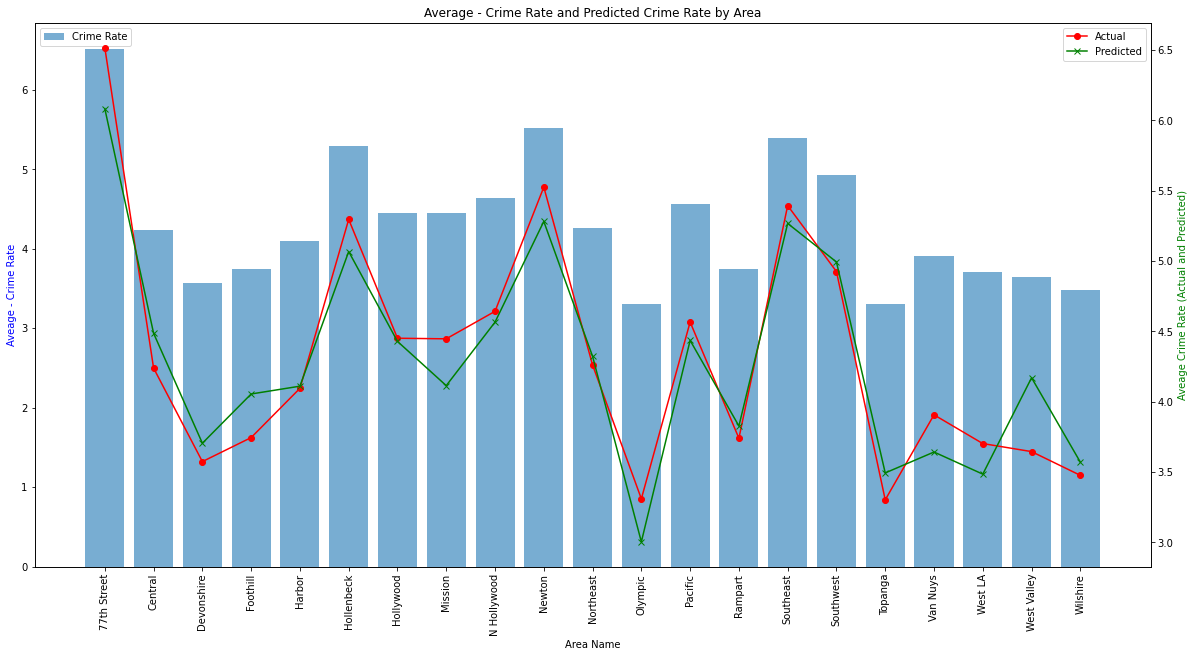

In [145]:
# Plotting
fig, ax1 = plt.subplots(figsize=(20, 10))

# Bar plot for victim_age
ax1.bar(df_a['AREA_NAME'], df_a['CRIME_Total'],  alpha=0.6, label='Crime Rate')

# Line plot for crime_count and predicted_crimecount
ax2 = ax1.twinx()
ax2.plot(df_a['AREA_NAME'], df_a['CRIME_Total'], color='r', marker='o', label='Actual')
ax2.plot(df_a['AREA_NAME'], df_a['CRIME_Predicted'], color='g', marker='x', label='Predicted')

# Labels and titles
ax1.set_xlabel('Area Name')
ax1.set_ylabel('Aveage - Crime Rate', color='b')
ax1.set_xticklabels(df_a['AREA_NAME'], rotation=90)
ax2.set_ylabel('Aveage Crime Rate (Actual and Predicted)', color='g')
plt.title('Average - Crime Rate and Predicted Crime Rate by Area')


# Legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.show()

<b> The differences between the actual and predicted average crime rates by area suggests the following: 
<br/>
77th Street: The actual crime rate is approximately 6.65% higher than predicted.<br/>
Central: The predicted crime rate is approximately 5.84% higher than actual.<br/>
Foothill: The predicted crime rate is approximately 8.27% higher than actual.<br/>
Harbor: The predicted crime rate is approximately 0.38% higher than actual.<br/>
Hollenbeck: The actual crime rate is approximately 4.31% higher than predicted.<br/>
Hollywood: The actual crime rate is approximately 0.50% higher than predicted.<br/>
Mission: The actual crime rate is approximately 7.48% higher than predicted.<br/>
N Hollywood: The actual crime rate is approximately 1.65% higher than predicted.<br/>
Newton: The actual crime rate is approximately 4.42% higher than predicted.<br/>
Northeast: The predicted crime rate is approximately 1.45% higher than actual.<br/>
Olympic: The actual crime rate is approximately 9.24% higher than predicted.<br/>
Pacific: The actual crime rate is approximately 2.86% higher than predicted.<br/>
Rampart: The predicted crime rate is approximately 2.33% higher than actual.<br/>
Southeast: The actual crime rate is approximately 2.35% higher than predicted.<br/>
Southwest: The predicted crime rate is approximately 1.38% higher than actual.<br/>
Topanga: The predicted crime rate is approximately 5.79% higher than actual.<br/>
Van Nuys: The actual crime rate is approximately 6.77% higher than predicted.<br/>
West LA: The actual crime rate is approximately 5.87% higher than predicted.<br/>
West Valley: The predicted crime rate is approximately 14.40% higher than actual.<br/>
Wilshire: The predicted crime rate is approximately 2.70% higher than actual. </b>

In [163]:
df_cde =df_pred.groupby(['CRM_CD_DESC','VICT_DESCENT']).agg({'CRIME_Total': 'mean', 'CRIME_Predicted': 'mean'}).reset_index()

df_cde

CRM_CD_DESC                    VICT_DESCENT  CRIME_Total  \
0   BATTERY - SIMPLE ASSAULT  American Indian/Alaskan Native     1.030769   
1   BATTERY - SIMPLE ASSAULT                    Asian Indian     1.000000   
2   BATTERY - SIMPLE ASSAULT                           Black     3.962348   
3   BATTERY - SIMPLE ASSAULT                       Cambodian     1.000000   
4   BATTERY - SIMPLE ASSAULT                         Chinese     1.000000   
..                       ...                             ...          ...   
76          VEHICLE - STOLEN          Hispanic/Latin/Mexican     1.176000   
77          VEHICLE - STOLEN                           Other     1.279720   
78          VEHICLE - STOLEN                     Other Asian     1.000000   
79          VEHICLE - STOLEN                         Unknown     1.663551   
80          VEHICLE - STOLEN                           White     1.079470   

    CRIME_Predicted  
0          4.260261  
1          3.669030  
2          3.886005  
3          1.578947  
4          3.308052  
..              ...  
76         2.174930  
77         1.810152  
78         1.619932  
79         1.840343  
80         3.362564  

[81 rows x 4 columns]

/var/folders/pk/m2_8c77j2zx4w04mcryfb0z00000gn/T/ipykernel_4277/3822890982.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_cde['VICT_DESCENT'], rotation=90)


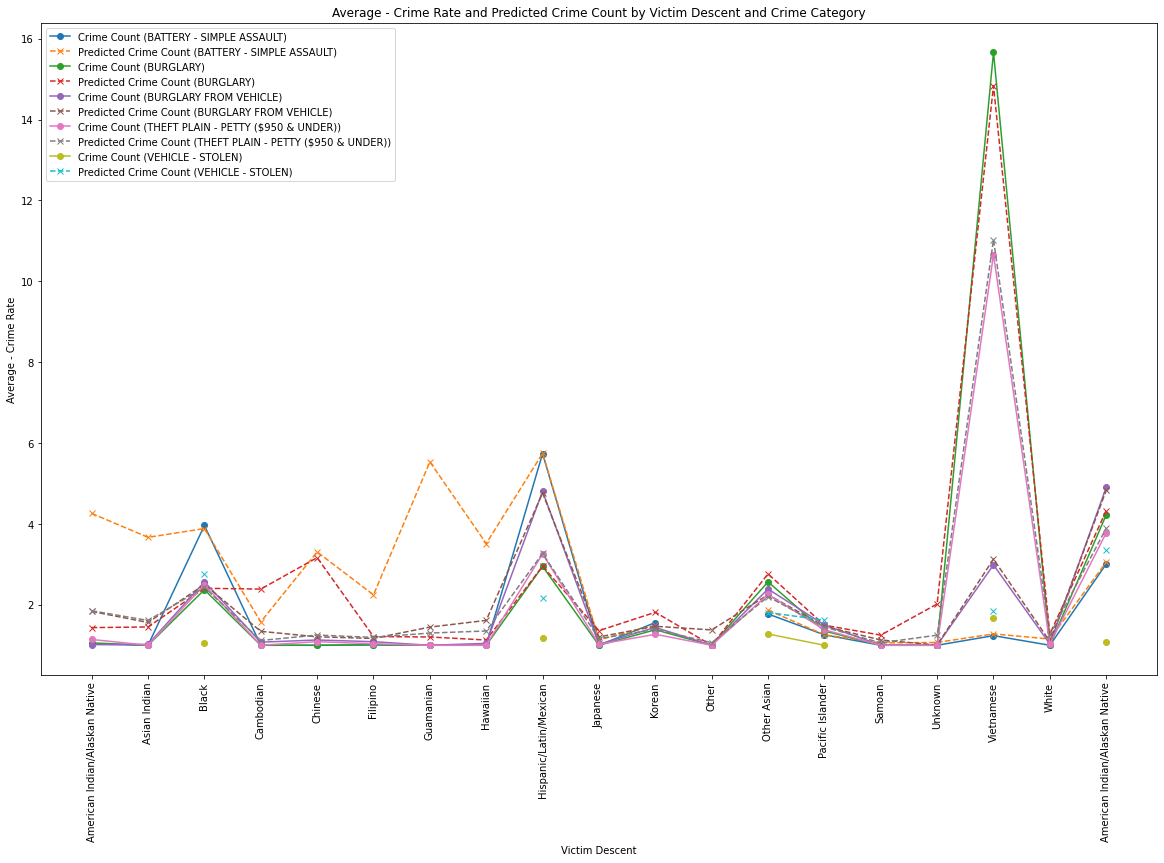

In [166]:

# Pivot the dataframe for better visualization
pivot_df = df_cde.pivot(index='VICT_DESCENT', columns='CRM_CD_DESC', values=['CRIME_Total', 'CRIME_Predicted'])

# Plotting
fig, ax = plt.subplots(figsize=(20, 12))

# Line plots for crime_count and predicted_crimecount in different crime areas
for area in pivot_df.columns.levels[1]:
    ax.plot(pivot_df['CRIME_Total'][area], marker='o', label=f'Crime Count ({area})')
    ax.plot(pivot_df['CRIME_Predicted'][area], marker='x', linestyle='--', label=f'Predicted Crime Count ({area})')

# Labels and titles
ax.set_xlabel('Victim Descent')
ax.set_xticklabels(df_cde['VICT_DESCENT'], rotation=90)
ax.set_ylabel('Average - Crime Rate')
plt.title('Average - Crime Rate and Predicted Crime Count by Victim Descent and Crime Category')

# Legends
ax.legend()

# Show plot
plt.show()

<b> The data suggests that for some categories, the predicted crime count is closely following the actual crime count, indicating that the prediction model may be quite accurate for those categories. For instance, there's a peak in predicted vehicle theft that corresponds to an actual increase in vehicle theft crimes. The predicted rate for theft (petty - $950 & under) seems to be underestimating the actual count at certain point. <br/>

The predicted data suggested: <br/>
American Indian/Alaskan Native: Most likely associated with Battery - Simple Assault.  </br>
Asian Indian: Most likely associated with Battery - Simple Assault. </br>
Black: Most likely associated with Battery - Simple Assault. </br>
Cambodian: Most likely associated with Burglary. </br>
Chinese: Most likely associated with Battery - Simple Assault. </br>
Filipino: Most likely associated with Battery - Simple Assault. </br>
Guamanian: Most likely associated with Battery - Simple Assault. </br>
Hawaiian: Most likely associated with Battery - Simple Assault. </br>
Hispanic/Latin/Mexican: Most likely associated with Battery - Simple Assault. </br>
Japanese: Most likely associated with Burglary. </br>
Korean: Most likely associated with Burglary. </br>
Laotian: Most likely associated with Burglary From Vehicle. </br>
Other: Most likely associated with Burglary. </br>
Other Asian: Most likely associated with Vehicle - Stolen. </br>
Pacific Islander: Most likely associated with Burglary. </br>
Samoan: Most likely associated with Burglary. </br>
Unknown: Most likely associated with Burglary. </br>
Vietnamese: Most likely associated with Burglary. </br>
White: Most likely associated with Burglary From Vehicle.

In [ ]:
# Pivot the table for better visualization of the relationship between victim descent and crime type
pivot_table = df_cde.pivot_table(index='VICT_DESCENT', columns='CRM_CD_DESC', values='CRIME_Predicted')

# Plotting a heatmap for better visualization of the correlation
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, cmap='viridis')
plt.title('Heatmap of Predicted Crime Values by Victim Descent and Crime Type')
plt.ylabel('Victim Descent')
plt.xlabel('Crime Type')
plt.show()

<b> Victims of "Unknown" descent are most likely to be associated with "Burglary", with a predicted value of approximately 14.84. </br>
Victims of "Hispanic/Latin/Mexican" descent are most likely to be associated with "Battery - Simple Assault", with a predicted value of approximately 5.75.</b>

<b>How Well Does the Model Predict Crime Rates Based on the Day of the Week? </b>

In [167]:
df_wd =df_pred.groupby(['WEEKDAY_OCC']).agg({'CRIME_Total': 'mean', 'CRIME_Predicted': 'mean'}).reset_index()
df_wd

WEEKDAY_OCC  CRIME_Total  CRIME_Predicted
0      Friday     4.431420         4.228988
1      Monday     4.166706         4.287705
2    Saturday     4.370148         4.326336
3      Sunday     4.266896         4.112046
4    Thursday     4.183865         4.202523
5     Tuesday     4.140352         4.227108
6   Wednesday     4.173716         4.192722

/var/folders/pk/m2_8c77j2zx4w04mcryfb0z00000gn/T/ipykernel_4277/1683449468.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_wd['WEEKDAY_OCC'], rotation=90)


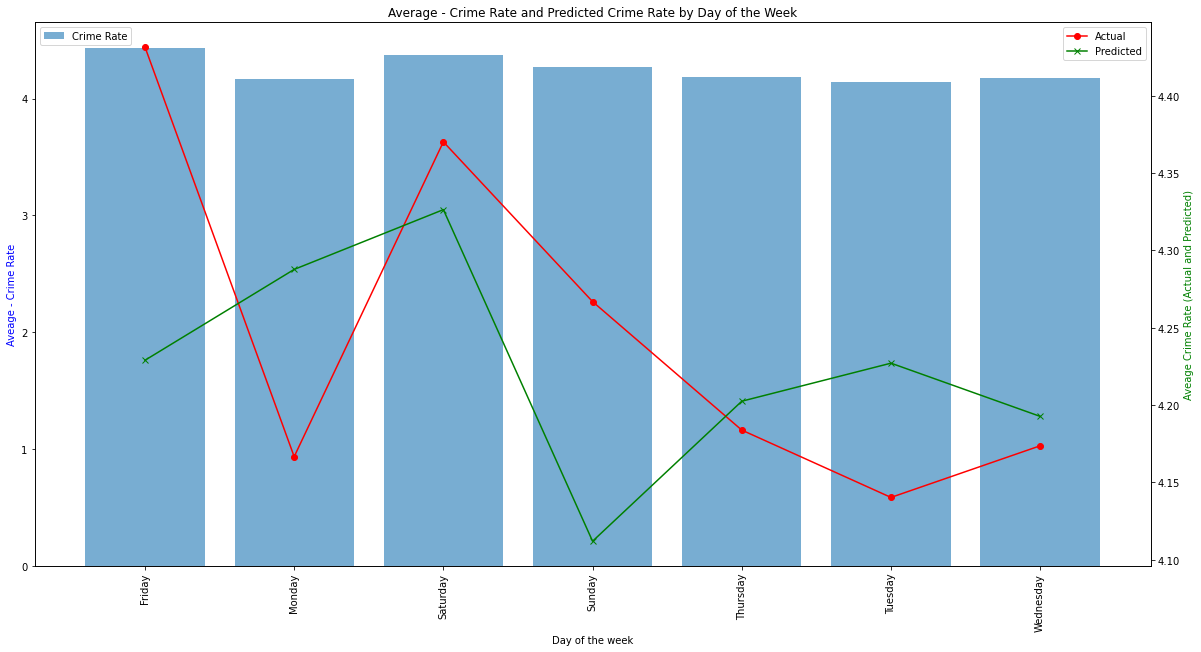

In [168]:
# Plotting
fig, ax1 = plt.subplots(figsize=(20, 10))

# Bar plot for victim_age
ax1.bar(df_wd['WEEKDAY_OCC'], df_wd['CRIME_Total'],  alpha=0.6, label='Crime Rate')

# Line plot for crime_count and predicted_crimecount
ax2 = ax1.twinx()
ax2.plot(df_wd['WEEKDAY_OCC'], df_wd['CRIME_Total'], color='r', marker='o', label='Actual')
ax2.plot(df_wd['WEEKDAY_OCC'], df_wd['CRIME_Predicted'], color='g', marker='x', label='Predicted')

# Labels and titles
ax1.set_xlabel('Day of the week')
ax1.set_ylabel('Aveage - Crime Rate', color='b')
ax1.set_xticklabels(df_wd['WEEKDAY_OCC'], rotation=90)
ax2.set_ylabel('Aveage Crime Rate (Actual and Predicted)', color='g')
plt.title('Average - Crime Rate and Predicted Crime Rate by Day of the Week')


# Legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.show()

<b> The predictions is relatively close in its forecasts, with most differences being within a few percentage points. <br/>
Friday: The actual crime rate is approximately 4.57% higher than predicted.<br/>
Monday: The predicted crime rate is approximately 2.90% higher than actual.<br/>
Saturday: The actual crime rate is approximately 1.00% higher than predicted.<br/>
Sunday: The actual crime rate is approximately 3.63% higher than predicted.<br/>
Thursday: The predicted crime rate is approximately 0.45% higher than actual.<br/>
Tuesday: The predicted crime rate is approximately 2.10% higher than actual.<br/>
Wednesday: The predicted crime rate is approximately 0.46% higher than actual.<br/>

These differences also indicate some days showing predicted values that are higher than the actual crime rates and other days showing the opposite. </b>

In [170]:
df_cw =df_pred.groupby(['CRM_CD_DESC','WEEKDAY_OCC']).agg({'CRIME_Total': 'mean', 'CRIME_Predicted': 'mean'}).reset_index()
df_cw

CRM_CD_DESC WEEKDAY_OCC  CRIME_Total  \
0             BATTERY - SIMPLE ASSAULT      Friday     3.667345   
1             BATTERY - SIMPLE ASSAULT      Monday     3.560893   
2             BATTERY - SIMPLE ASSAULT    Saturday     3.889068   
3             BATTERY - SIMPLE ASSAULT      Sunday     4.066942   
4             BATTERY - SIMPLE ASSAULT    Thursday     3.494862   
5             BATTERY - SIMPLE ASSAULT     Tuesday     3.468668   
6             BATTERY - SIMPLE ASSAULT   Wednesday     3.525250   
7                             BURGLARY      Friday     3.560685   
8                             BURGLARY      Monday     3.147235   
9                             BURGLARY    Saturday     3.037188   
10                            BURGLARY      Sunday     2.779168   
11                            BURGLARY    Thursday     3.243300   
12                            BURGLARY     Tuesday     3.181393   
13                            BURGLARY   Wednesday     3.236299   
14               BURGLARY FROM VEHICLE      Friday     3.589973   
15               BURGLARY FROM VEHICLE      Monday     3.383803   
16               BURGLARY FROM VEHICLE    Saturday     3.608949   
17               BURGLARY FROM VEHICLE      Sunday     3.494086   
18               BURGLARY FROM VEHICLE    Thursday     3.434288   
19               BURGLARY FROM VEHICLE     Tuesday     3.440775   
20               BURGLARY FROM VEHICLE   Wednesday     3.455495   
21  THEFT PLAIN - PETTY ($950 & UNDER)      Friday     3.165290   
22  THEFT PLAIN - PETTY ($950 & UNDER)      Monday     2.962216   
23  THEFT PLAIN - PETTY ($950 & UNDER)    Saturday     3.020863   
24  THEFT PLAIN - PETTY ($950 & UNDER)      Sunday     2.793416   
25  THEFT PLAIN - PETTY ($950 & UNDER)    Thursday     2.995430   
26  THEFT PLAIN - PETTY ($950 & UNDER)     Tuesday     2.962794   
27  THEFT PLAIN - PETTY ($950 & UNDER)   Wednesday     2.916360   
28                    VEHICLE - STOLEN      Friday   230.979730   
29                    VEHICLE - STOLEN      Monday   222.435714   
30                    VEHICLE - STOLEN    Saturday   202.878788   
31                    VEHICLE - STOLEN      Sunday   192.807453   
32                    VEHICLE - STOLEN    Thursday   193.558282   
33                    VEHICLE - STOLEN     Tuesday   195.745223   
34                    VEHICLE - STOLEN   Wednesday   209.079470   

    CRIME_Predicted  
0          3.622688  
1          3.662910  
2          3.762311  
3          3.891457  
4          3.641499  
5          3.616946  
6          3.628491  
7          3.195621  
8          3.427128  
9          3.238176  
10         3.239717  
11         3.210553  
12         3.272871  
13         3.240810  
14         3.432557  
15         3.509984  
16         3.387396  
17         3.432552  
18         3.409409  
19         3.438245  
20         3.400502  
21         2.978891  
22         2.961027  
23         2.995101  
24         3.109815  
25         3.027284  
26         3.024365  
27         2.988480  
28       227.157010  
29       221.726147  
30       204.030350  
31       138.700379  
32       190.563426  
33       197.990199  
34       205.604837

/var/folders/pk/m2_8c77j2zx4w04mcryfb0z00000gn/T/ipykernel_4277/2891146562.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_cw['WEEKDAY_OCC'], rotation=90)


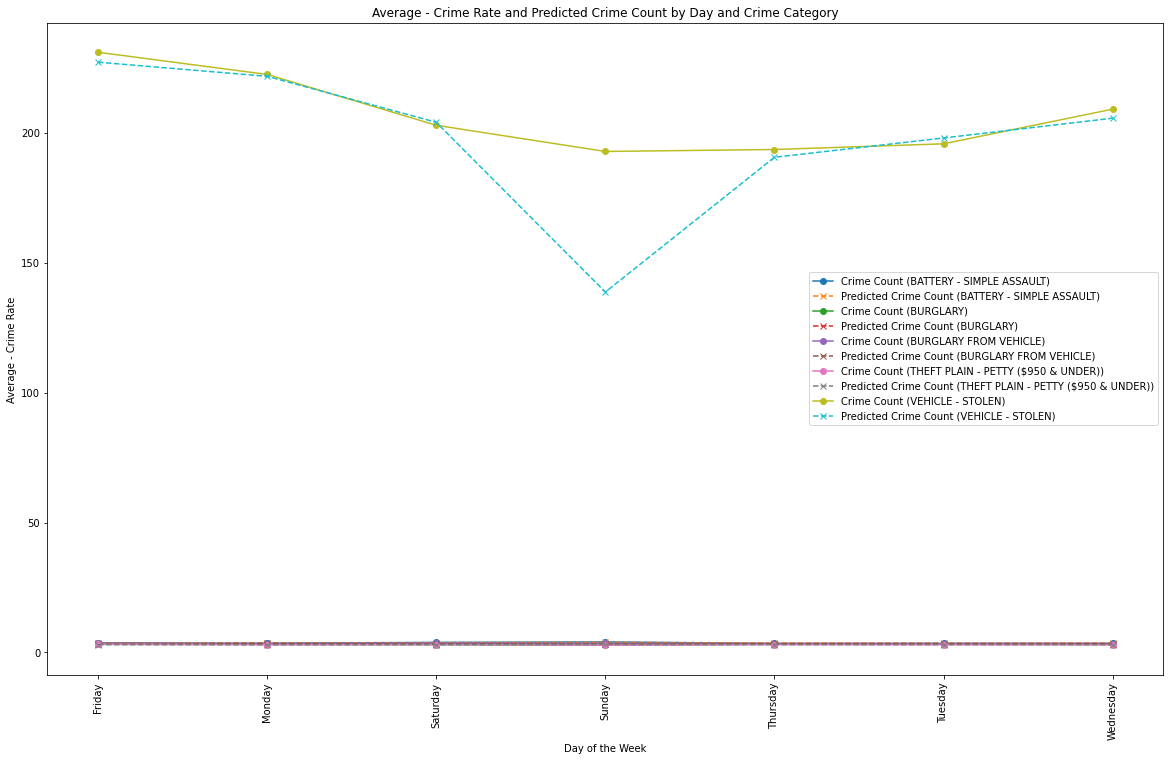

In [173]:
# Pivot the dataframe for better visualization
pivot_df = df_cw.pivot(index='WEEKDAY_OCC', columns='CRM_CD_DESC', values=['CRIME_Total', 'CRIME_Predicted'])

# Plotting
fig, ax = plt.subplots(figsize=(20, 12))

# Line plots for crime_count and predicted_crimecount in different crime areas
for area in pivot_df.columns.levels[1]:
    ax.plot(pivot_df['CRIME_Total'][area], marker='o', label=f'Crime Count ({area})')
    ax.plot(pivot_df['CRIME_Predicted'][area], marker='x', linestyle='--', label=f'Predicted Crime Count ({area})')

# Labels and titles
ax.set_xlabel('Day of the Week')
ax.set_xticklabels(df_cw['WEEKDAY_OCC'], rotation=90)
ax.set_ylabel('Average - Crime Rate')
plt.title('Average - Crime Rate and Predicted Crime Count by Day and Crime Category')

# Legends
ax.legend()

# Show plot
plt.show()

<b >The predicated data suggests that there is some variation in crime occurrence throughout the week, with weekends typically showing different patterns from weekdays for some types of crimes. The predictive model seems to follow the trends of actual counts closely for some crimes, but there are notable discrepancies, especially for "VEHICLE - STOLEN" on Sundays. the predicted value is substantially lower than the actual average crime count.</b>

In [176]:
#data_filepath = "../data/processed/df_cde_2.csv"
#df_cde.to_csv(data_filepath, index=False) 